In [362]:
import pandas as pd
import numpy as np
import seaborn as sns
import yfinance as yf
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE 
import missingno as msno 
from sklearn.decomposition import PCA # Helps reduce dimensions and also solves problem of multicollinearity.
from sklearn.preprocessing import StandardScaler  # Helps us in Standardizing the data
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from datetime import datetime
from collections import Counter
import time
from statsmodels.tsa.stattools import coint, adfuller
import scipy

In [48]:
##create the dataset 
###[colums are the names of the stocks and dates
## rows are the value of the closing price of the stock]
payload=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
first_table = payload[0]
df = first_table[['Symbol','Security','GICS Sector']]
df

Symbol             Security             GICS Sector
0      MMM           3M Company             Industrials
1      ABT  Abbott Laboratories             Health Care
2     ABBV          AbbVie Inc.             Health Care
3     ABMD              Abiomed             Health Care
4      ACN            Accenture  Information Technology
..     ...                  ...                     ...
500    YUM      Yum! Brands Inc  Consumer Discretionary
501   ZBRA   Zebra Technologies  Information Technology
502    ZBH        Zimmer Biomet             Health Care
503   ZION        Zions Bancorp              Financials
504    ZTS               Zoetis             Health Care

[505 rows x 3 columns]

In [202]:
dfPairs = pd.DataFrame()
for index, row in df.iterrows():
    dfPairs[row['Symbol']] = 0

In [203]:
dfPairs['Date'] = np.nan
dfPairs

Empty DataFrame
Columns: [MMM, ABT, ABBV, ABMD, ACN, ATVI, ADBE, AMD, AAP, AES, AFL, A, APD, AKAM, ALK, ALB, ARE, ALXN, ALGN, ALLE, LNT, ALL, GOOGL, GOOG, MO, AMZN, AMCR, AEE, AAL, AEP, AXP, AIG, AMT, AWK, AMP, ABC, AME, AMGN, APH, ADI, ANSS, ANTM, AON, AOS, APA, AAPL, AMAT, APTV, ADM, ANET, AJG, AIZ, T, ATO, ADSK, ADP, AZO, AVB, AVY, BKR, BLL, BAC, BK, BAX, BDX, BRK.B, BBY, BIO, BIIB, BLK, BA, BKNG, BWA, BXP, BSX, BMY, AVGO, BR, BF.B, CHRW, COG, CDNS, CZR, CPB, COF, CAH, KMX, CCL, CARR, CTLT, CAT, CBOE, CBRE, CDW, CE, CNC, CNP, CERN, CF, SCHW, ...]
Index: []

[0 rows x 507 columns]

In [204]:
i = 0
for index, row in df.iterrows():
    stock = yf.Ticker(row['Symbol'])
    stockHistory = stock.history(period = '2y')
    i = 0
    for date, row_history in stockHistory.iterrows():
        print("i:",i,row['Symbol'])
        dfPairs.loc[i, row['Symbol']] = row_history['Close']
        dfPairs.loc[i, 'Date'] = date
        i += 1

i: 0 MMM
i: 1 MMM
i: 2 MMM
i: 3 MMM
i: 4 MMM
i: 5 MMM
i: 6 MMM
i: 7 MMM
i: 8 MMM
i: 9 MMM
i: 10 MMM
i: 11 MMM
i: 12 MMM
i: 13 MMM
i: 14 MMM
i: 15 MMM
i: 16 MMM
i: 17 MMM
i: 18 MMM
i: 19 MMM
i: 20 MMM
i: 21 MMM
i: 22 MMM
i: 23 MMM
i: 24 MMM
i: 25 MMM
i: 26 MMM
i: 27 MMM
i: 28 MMM
i: 29 MMM
i: 30 MMM
i: 31 MMM
i: 32 MMM
i: 33 MMM
i: 34 MMM
i: 35 MMM
i: 36 MMM
i: 37 MMM
i: 38 MMM
i: 39 MMM
i: 40 MMM
i: 41 MMM
i: 42 MMM
i: 43 MMM
i: 44 MMM
i: 45 MMM
i: 46 MMM
i: 47 MMM
i: 48 MMM
i: 49 MMM
i: 50 MMM
i: 51 MMM
i: 52 MMM
i: 53 MMM
i: 54 MMM
i: 55 MMM
i: 56 MMM
i: 57 MMM
i: 58 MMM
i: 59 MMM
i: 60 MMM
i: 61 MMM
i: 62 MMM
i: 63 MMM
i: 64 MMM
i: 65 MMM
i: 66 MMM
i: 67 MMM
i: 68 MMM
i: 69 MMM
i: 70 MMM
i: 71 MMM
i: 72 MMM
i: 73 MMM
i: 74 MMM
i: 75 MMM
i: 76 MMM
i: 77 MMM
i: 78 MMM
i: 79 MMM
i: 80 MMM
i: 81 MMM
i: 82 MMM
i: 83 MMM
i: 84 MMM
i: 85 MMM
i: 86 MMM
i: 87 MMM
i: 88 MMM
i: 89 MMM
i: 90 MMM
i: 91 MMM
i: 92 MMM
i: 93 MMM
i: 94 MMM
i: 95 MMM
i: 96 MMM
i: 97 MMM
i: 98 MMM
i: 99 MMM
i: 100 MMM

i: 283 ABT
i: 284 ABT
i: 285 ABT
i: 286 ABT
i: 287 ABT
i: 288 ABT
i: 289 ABT
i: 290 ABT
i: 291 ABT
i: 292 ABT
i: 293 ABT
i: 294 ABT
i: 295 ABT
i: 296 ABT
i: 297 ABT
i: 298 ABT
i: 299 ABT
i: 300 ABT
i: 301 ABT
i: 302 ABT
i: 303 ABT
i: 304 ABT
i: 305 ABT
i: 306 ABT
i: 307 ABT
i: 308 ABT
i: 309 ABT
i: 310 ABT
i: 311 ABT
i: 312 ABT
i: 313 ABT
i: 314 ABT
i: 315 ABT
i: 316 ABT
i: 317 ABT
i: 318 ABT
i: 319 ABT
i: 320 ABT
i: 321 ABT
i: 322 ABT
i: 323 ABT
i: 324 ABT
i: 325 ABT
i: 326 ABT
i: 327 ABT
i: 328 ABT
i: 329 ABT
i: 330 ABT
i: 331 ABT
i: 332 ABT
i: 333 ABT
i: 334 ABT
i: 335 ABT
i: 336 ABT
i: 337 ABT
i: 338 ABT
i: 339 ABT
i: 340 ABT
i: 341 ABT
i: 342 ABT
i: 343 ABT
i: 344 ABT
i: 345 ABT
i: 346 ABT
i: 347 ABT
i: 348 ABT
i: 349 ABT
i: 350 ABT
i: 351 ABT
i: 352 ABT
i: 353 ABT
i: 354 ABT
i: 355 ABT
i: 356 ABT
i: 357 ABT
i: 358 ABT
i: 359 ABT
i: 360 ABT
i: 361 ABT
i: 362 ABT
i: 363 ABT
i: 364 ABT
i: 365 ABT
i: 366 ABT
i: 367 ABT
i: 368 ABT
i: 369 ABT
i: 370 ABT
i: 371 ABT
i: 372 ABT
i: 373 ABT

i: 0 ABMD
i: 1 ABMD
i: 2 ABMD
i: 3 ABMD
i: 4 ABMD
i: 5 ABMD
i: 6 ABMD
i: 7 ABMD
i: 8 ABMD
i: 9 ABMD
i: 10 ABMD
i: 11 ABMD
i: 12 ABMD
i: 13 ABMD
i: 14 ABMD
i: 15 ABMD
i: 16 ABMD
i: 17 ABMD
i: 18 ABMD
i: 19 ABMD
i: 20 ABMD
i: 21 ABMD
i: 22 ABMD
i: 23 ABMD
i: 24 ABMD
i: 25 ABMD
i: 26 ABMD
i: 27 ABMD
i: 28 ABMD
i: 29 ABMD
i: 30 ABMD
i: 31 ABMD
i: 32 ABMD
i: 33 ABMD
i: 34 ABMD
i: 35 ABMD
i: 36 ABMD
i: 37 ABMD
i: 38 ABMD
i: 39 ABMD
i: 40 ABMD
i: 41 ABMD
i: 42 ABMD
i: 43 ABMD
i: 44 ABMD
i: 45 ABMD
i: 46 ABMD
i: 47 ABMD
i: 48 ABMD
i: 49 ABMD
i: 50 ABMD
i: 51 ABMD
i: 52 ABMD
i: 53 ABMD
i: 54 ABMD
i: 55 ABMD
i: 56 ABMD
i: 57 ABMD
i: 58 ABMD
i: 59 ABMD
i: 60 ABMD
i: 61 ABMD
i: 62 ABMD
i: 63 ABMD
i: 64 ABMD
i: 65 ABMD
i: 66 ABMD
i: 67 ABMD
i: 68 ABMD
i: 69 ABMD
i: 70 ABMD
i: 71 ABMD
i: 72 ABMD
i: 73 ABMD
i: 74 ABMD
i: 75 ABMD
i: 76 ABMD
i: 77 ABMD
i: 78 ABMD
i: 79 ABMD
i: 80 ABMD
i: 81 ABMD
i: 82 ABMD
i: 83 ABMD
i: 84 ABMD
i: 85 ABMD
i: 86 ABMD
i: 87 ABMD
i: 88 ABMD
i: 89 ABMD
i: 90 ABMD
i: 91 ABM

i: 300 ACN
i: 301 ACN
i: 302 ACN
i: 303 ACN
i: 304 ACN
i: 305 ACN
i: 306 ACN
i: 307 ACN
i: 308 ACN
i: 309 ACN
i: 310 ACN
i: 311 ACN
i: 312 ACN
i: 313 ACN
i: 314 ACN
i: 315 ACN
i: 316 ACN
i: 317 ACN
i: 318 ACN
i: 319 ACN
i: 320 ACN
i: 321 ACN
i: 322 ACN
i: 323 ACN
i: 324 ACN
i: 325 ACN
i: 326 ACN
i: 327 ACN
i: 328 ACN
i: 329 ACN
i: 330 ACN
i: 331 ACN
i: 332 ACN
i: 333 ACN
i: 334 ACN
i: 335 ACN
i: 336 ACN
i: 337 ACN
i: 338 ACN
i: 339 ACN
i: 340 ACN
i: 341 ACN
i: 342 ACN
i: 343 ACN
i: 344 ACN
i: 345 ACN
i: 346 ACN
i: 347 ACN
i: 348 ACN
i: 349 ACN
i: 350 ACN
i: 351 ACN
i: 352 ACN
i: 353 ACN
i: 354 ACN
i: 355 ACN
i: 356 ACN
i: 357 ACN
i: 358 ACN
i: 359 ACN
i: 360 ACN
i: 361 ACN
i: 362 ACN
i: 363 ACN
i: 364 ACN
i: 365 ACN
i: 366 ACN
i: 367 ACN
i: 368 ACN
i: 369 ACN
i: 370 ACN
i: 371 ACN
i: 372 ACN
i: 373 ACN
i: 374 ACN
i: 375 ACN
i: 376 ACN
i: 377 ACN
i: 378 ACN
i: 379 ACN
i: 380 ACN
i: 381 ACN
i: 382 ACN
i: 383 ACN
i: 384 ACN
i: 385 ACN
i: 386 ACN
i: 387 ACN
i: 388 ACN
i: 389 ACN
i: 390 ACN

i: 0 ADBE
i: 1 ADBE
i: 2 ADBE
i: 3 ADBE
i: 4 ADBE
i: 5 ADBE
i: 6 ADBE
i: 7 ADBE
i: 8 ADBE
i: 9 ADBE
i: 10 ADBE
i: 11 ADBE
i: 12 ADBE
i: 13 ADBE
i: 14 ADBE
i: 15 ADBE
i: 16 ADBE
i: 17 ADBE
i: 18 ADBE
i: 19 ADBE
i: 20 ADBE
i: 21 ADBE
i: 22 ADBE
i: 23 ADBE
i: 24 ADBE
i: 25 ADBE
i: 26 ADBE
i: 27 ADBE
i: 28 ADBE
i: 29 ADBE
i: 30 ADBE
i: 31 ADBE
i: 32 ADBE
i: 33 ADBE
i: 34 ADBE
i: 35 ADBE
i: 36 ADBE
i: 37 ADBE
i: 38 ADBE
i: 39 ADBE
i: 40 ADBE
i: 41 ADBE
i: 42 ADBE
i: 43 ADBE
i: 44 ADBE
i: 45 ADBE
i: 46 ADBE
i: 47 ADBE
i: 48 ADBE
i: 49 ADBE
i: 50 ADBE
i: 51 ADBE
i: 52 ADBE
i: 53 ADBE
i: 54 ADBE
i: 55 ADBE
i: 56 ADBE
i: 57 ADBE
i: 58 ADBE
i: 59 ADBE
i: 60 ADBE
i: 61 ADBE
i: 62 ADBE
i: 63 ADBE
i: 64 ADBE
i: 65 ADBE
i: 66 ADBE
i: 67 ADBE
i: 68 ADBE
i: 69 ADBE
i: 70 ADBE
i: 71 ADBE
i: 72 ADBE
i: 73 ADBE
i: 74 ADBE
i: 75 ADBE
i: 76 ADBE
i: 77 ADBE
i: 78 ADBE
i: 79 ADBE
i: 80 ADBE
i: 81 ADBE
i: 82 ADBE
i: 83 ADBE
i: 84 ADBE
i: 85 ADBE
i: 86 ADBE
i: 87 ADBE
i: 88 ADBE
i: 89 ADBE
i: 90 ADBE
i: 91 ADB

i: 305 AMD
i: 306 AMD
i: 307 AMD
i: 308 AMD
i: 309 AMD
i: 310 AMD
i: 311 AMD
i: 312 AMD
i: 313 AMD
i: 314 AMD
i: 315 AMD
i: 316 AMD
i: 317 AMD
i: 318 AMD
i: 319 AMD
i: 320 AMD
i: 321 AMD
i: 322 AMD
i: 323 AMD
i: 324 AMD
i: 325 AMD
i: 326 AMD
i: 327 AMD
i: 328 AMD
i: 329 AMD
i: 330 AMD
i: 331 AMD
i: 332 AMD
i: 333 AMD
i: 334 AMD
i: 335 AMD
i: 336 AMD
i: 337 AMD
i: 338 AMD
i: 339 AMD
i: 340 AMD
i: 341 AMD
i: 342 AMD
i: 343 AMD
i: 344 AMD
i: 345 AMD
i: 346 AMD
i: 347 AMD
i: 348 AMD
i: 349 AMD
i: 350 AMD
i: 351 AMD
i: 352 AMD
i: 353 AMD
i: 354 AMD
i: 355 AMD
i: 356 AMD
i: 357 AMD
i: 358 AMD
i: 359 AMD
i: 360 AMD
i: 361 AMD
i: 362 AMD
i: 363 AMD
i: 364 AMD
i: 365 AMD
i: 366 AMD
i: 367 AMD
i: 368 AMD
i: 369 AMD
i: 370 AMD
i: 371 AMD
i: 372 AMD
i: 373 AMD
i: 374 AMD
i: 375 AMD
i: 376 AMD
i: 377 AMD
i: 378 AMD
i: 379 AMD
i: 380 AMD
i: 381 AMD
i: 382 AMD
i: 383 AMD
i: 384 AMD
i: 385 AMD
i: 386 AMD
i: 387 AMD
i: 388 AMD
i: 389 AMD
i: 390 AMD
i: 391 AMD
i: 392 AMD
i: 393 AMD
i: 394 AMD
i: 395 AMD

i: 296 AES
i: 297 AES
i: 298 AES
i: 299 AES
i: 300 AES
i: 301 AES
i: 302 AES
i: 303 AES
i: 304 AES
i: 305 AES
i: 306 AES
i: 307 AES
i: 308 AES
i: 309 AES
i: 310 AES
i: 311 AES
i: 312 AES
i: 313 AES
i: 314 AES
i: 315 AES
i: 316 AES
i: 317 AES
i: 318 AES
i: 319 AES
i: 320 AES
i: 321 AES
i: 322 AES
i: 323 AES
i: 324 AES
i: 325 AES
i: 326 AES
i: 327 AES
i: 328 AES
i: 329 AES
i: 330 AES
i: 331 AES
i: 332 AES
i: 333 AES
i: 334 AES
i: 335 AES
i: 336 AES
i: 337 AES
i: 338 AES
i: 339 AES
i: 340 AES
i: 341 AES
i: 342 AES
i: 343 AES
i: 344 AES
i: 345 AES
i: 346 AES
i: 347 AES
i: 348 AES
i: 349 AES
i: 350 AES
i: 351 AES
i: 352 AES
i: 353 AES
i: 354 AES
i: 355 AES
i: 356 AES
i: 357 AES
i: 358 AES
i: 359 AES
i: 360 AES
i: 361 AES
i: 362 AES
i: 363 AES
i: 364 AES
i: 365 AES
i: 366 AES
i: 367 AES
i: 368 AES
i: 369 AES
i: 370 AES
i: 371 AES
i: 372 AES
i: 373 AES
i: 374 AES
i: 375 AES
i: 376 AES
i: 377 AES
i: 378 AES
i: 379 AES
i: 380 AES
i: 381 AES
i: 382 AES
i: 383 AES
i: 384 AES
i: 385 AES
i: 386 AES

i: 289 A
i: 290 A
i: 291 A
i: 292 A
i: 293 A
i: 294 A
i: 295 A
i: 296 A
i: 297 A
i: 298 A
i: 299 A
i: 300 A
i: 301 A
i: 302 A
i: 303 A
i: 304 A
i: 305 A
i: 306 A
i: 307 A
i: 308 A
i: 309 A
i: 310 A
i: 311 A
i: 312 A
i: 313 A
i: 314 A
i: 315 A
i: 316 A
i: 317 A
i: 318 A
i: 319 A
i: 320 A
i: 321 A
i: 322 A
i: 323 A
i: 324 A
i: 325 A
i: 326 A
i: 327 A
i: 328 A
i: 329 A
i: 330 A
i: 331 A
i: 332 A
i: 333 A
i: 334 A
i: 335 A
i: 336 A
i: 337 A
i: 338 A
i: 339 A
i: 340 A
i: 341 A
i: 342 A
i: 343 A
i: 344 A
i: 345 A
i: 346 A
i: 347 A
i: 348 A
i: 349 A
i: 350 A
i: 351 A
i: 352 A
i: 353 A
i: 354 A
i: 355 A
i: 356 A
i: 357 A
i: 358 A
i: 359 A
i: 360 A
i: 361 A
i: 362 A
i: 363 A
i: 364 A
i: 365 A
i: 366 A
i: 367 A
i: 368 A
i: 369 A
i: 370 A
i: 371 A
i: 372 A
i: 373 A
i: 374 A
i: 375 A
i: 376 A
i: 377 A
i: 378 A
i: 379 A
i: 380 A
i: 381 A
i: 382 A
i: 383 A
i: 384 A
i: 385 A
i: 386 A
i: 387 A
i: 388 A
i: 389 A
i: 390 A
i: 391 A
i: 392 A
i: 393 A
i: 394 A
i: 395 A
i: 396 A
i: 397 A
i: 398 A
i: 399 A
i

i: 282 AKAM
i: 283 AKAM
i: 284 AKAM
i: 285 AKAM
i: 286 AKAM
i: 287 AKAM
i: 288 AKAM
i: 289 AKAM
i: 290 AKAM
i: 291 AKAM
i: 292 AKAM
i: 293 AKAM
i: 294 AKAM
i: 295 AKAM
i: 296 AKAM
i: 297 AKAM
i: 298 AKAM
i: 299 AKAM
i: 300 AKAM
i: 301 AKAM
i: 302 AKAM
i: 303 AKAM
i: 304 AKAM
i: 305 AKAM
i: 306 AKAM
i: 307 AKAM
i: 308 AKAM
i: 309 AKAM
i: 310 AKAM
i: 311 AKAM
i: 312 AKAM
i: 313 AKAM
i: 314 AKAM
i: 315 AKAM
i: 316 AKAM
i: 317 AKAM
i: 318 AKAM
i: 319 AKAM
i: 320 AKAM
i: 321 AKAM
i: 322 AKAM
i: 323 AKAM
i: 324 AKAM
i: 325 AKAM
i: 326 AKAM
i: 327 AKAM
i: 328 AKAM
i: 329 AKAM
i: 330 AKAM
i: 331 AKAM
i: 332 AKAM
i: 333 AKAM
i: 334 AKAM
i: 335 AKAM
i: 336 AKAM
i: 337 AKAM
i: 338 AKAM
i: 339 AKAM
i: 340 AKAM
i: 341 AKAM
i: 342 AKAM
i: 343 AKAM
i: 344 AKAM
i: 345 AKAM
i: 346 AKAM
i: 347 AKAM
i: 348 AKAM
i: 349 AKAM
i: 350 AKAM
i: 351 AKAM
i: 352 AKAM
i: 353 AKAM
i: 354 AKAM
i: 355 AKAM
i: 356 AKAM
i: 357 AKAM
i: 358 AKAM
i: 359 AKAM
i: 360 AKAM
i: 361 AKAM
i: 362 AKAM
i: 363 AKAM
i: 364 AKAM
i: 3

i: 278 ALB
i: 279 ALB
i: 280 ALB
i: 281 ALB
i: 282 ALB
i: 283 ALB
i: 284 ALB
i: 285 ALB
i: 286 ALB
i: 287 ALB
i: 288 ALB
i: 289 ALB
i: 290 ALB
i: 291 ALB
i: 292 ALB
i: 293 ALB
i: 294 ALB
i: 295 ALB
i: 296 ALB
i: 297 ALB
i: 298 ALB
i: 299 ALB
i: 300 ALB
i: 301 ALB
i: 302 ALB
i: 303 ALB
i: 304 ALB
i: 305 ALB
i: 306 ALB
i: 307 ALB
i: 308 ALB
i: 309 ALB
i: 310 ALB
i: 311 ALB
i: 312 ALB
i: 313 ALB
i: 314 ALB
i: 315 ALB
i: 316 ALB
i: 317 ALB
i: 318 ALB
i: 319 ALB
i: 320 ALB
i: 321 ALB
i: 322 ALB
i: 323 ALB
i: 324 ALB
i: 325 ALB
i: 326 ALB
i: 327 ALB
i: 328 ALB
i: 329 ALB
i: 330 ALB
i: 331 ALB
i: 332 ALB
i: 333 ALB
i: 334 ALB
i: 335 ALB
i: 336 ALB
i: 337 ALB
i: 338 ALB
i: 339 ALB
i: 340 ALB
i: 341 ALB
i: 342 ALB
i: 343 ALB
i: 344 ALB
i: 345 ALB
i: 346 ALB
i: 347 ALB
i: 348 ALB
i: 349 ALB
i: 350 ALB
i: 351 ALB
i: 352 ALB
i: 353 ALB
i: 354 ALB
i: 355 ALB
i: 356 ALB
i: 357 ALB
i: 358 ALB
i: 359 ALB
i: 360 ALB
i: 361 ALB
i: 362 ALB
i: 363 ALB
i: 364 ALB
i: 365 ALB
i: 366 ALB
i: 367 ALB
i: 368 ALB

i: 291 ALXN
i: 292 ALXN
i: 293 ALXN
i: 294 ALXN
i: 295 ALXN
i: 296 ALXN
i: 297 ALXN
i: 298 ALXN
i: 299 ALXN
i: 300 ALXN
i: 301 ALXN
i: 302 ALXN
i: 303 ALXN
i: 304 ALXN
i: 305 ALXN
i: 306 ALXN
i: 307 ALXN
i: 308 ALXN
i: 309 ALXN
i: 310 ALXN
i: 311 ALXN
i: 312 ALXN
i: 313 ALXN
i: 314 ALXN
i: 315 ALXN
i: 316 ALXN
i: 317 ALXN
i: 318 ALXN
i: 319 ALXN
i: 320 ALXN
i: 321 ALXN
i: 322 ALXN
i: 323 ALXN
i: 324 ALXN
i: 325 ALXN
i: 326 ALXN
i: 327 ALXN
i: 328 ALXN
i: 329 ALXN
i: 330 ALXN
i: 331 ALXN
i: 332 ALXN
i: 333 ALXN
i: 334 ALXN
i: 335 ALXN
i: 336 ALXN
i: 337 ALXN
i: 338 ALXN
i: 339 ALXN
i: 340 ALXN
i: 341 ALXN
i: 342 ALXN
i: 343 ALXN
i: 344 ALXN
i: 345 ALXN
i: 346 ALXN
i: 347 ALXN
i: 348 ALXN
i: 349 ALXN
i: 350 ALXN
i: 351 ALXN
i: 352 ALXN
i: 353 ALXN
i: 354 ALXN
i: 355 ALXN
i: 356 ALXN
i: 357 ALXN
i: 358 ALXN
i: 359 ALXN
i: 360 ALXN
i: 361 ALXN
i: 362 ALXN
i: 363 ALXN
i: 364 ALXN
i: 365 ALXN
i: 366 ALXN
i: 367 ALXN
i: 368 ALXN
i: 369 ALXN
i: 370 ALXN
i: 371 ALXN
i: 372 ALXN
i: 373 ALXN
i: 3

i: 0 ALLE
i: 1 ALLE
i: 2 ALLE
i: 3 ALLE
i: 4 ALLE
i: 5 ALLE
i: 6 ALLE
i: 7 ALLE
i: 8 ALLE
i: 9 ALLE
i: 10 ALLE
i: 11 ALLE
i: 12 ALLE
i: 13 ALLE
i: 14 ALLE
i: 15 ALLE
i: 16 ALLE
i: 17 ALLE
i: 18 ALLE
i: 19 ALLE
i: 20 ALLE
i: 21 ALLE
i: 22 ALLE
i: 23 ALLE
i: 24 ALLE
i: 25 ALLE
i: 26 ALLE
i: 27 ALLE
i: 28 ALLE
i: 29 ALLE
i: 30 ALLE
i: 31 ALLE
i: 32 ALLE
i: 33 ALLE
i: 34 ALLE
i: 35 ALLE
i: 36 ALLE
i: 37 ALLE
i: 38 ALLE
i: 39 ALLE
i: 40 ALLE
i: 41 ALLE
i: 42 ALLE
i: 43 ALLE
i: 44 ALLE
i: 45 ALLE
i: 46 ALLE
i: 47 ALLE
i: 48 ALLE
i: 49 ALLE
i: 50 ALLE
i: 51 ALLE
i: 52 ALLE
i: 53 ALLE
i: 54 ALLE
i: 55 ALLE
i: 56 ALLE
i: 57 ALLE
i: 58 ALLE
i: 59 ALLE
i: 60 ALLE
i: 61 ALLE
i: 62 ALLE
i: 63 ALLE
i: 64 ALLE
i: 65 ALLE
i: 66 ALLE
i: 67 ALLE
i: 68 ALLE
i: 69 ALLE
i: 70 ALLE
i: 71 ALLE
i: 72 ALLE
i: 73 ALLE
i: 74 ALLE
i: 75 ALLE
i: 76 ALLE
i: 77 ALLE
i: 78 ALLE
i: 79 ALLE
i: 80 ALLE
i: 81 ALLE
i: 82 ALLE
i: 83 ALLE
i: 84 ALLE
i: 85 ALLE
i: 86 ALLE
i: 87 ALLE
i: 88 ALLE
i: 89 ALLE
i: 90 ALLE
i: 91 ALL

i: 287 LNT
i: 288 LNT
i: 289 LNT
i: 290 LNT
i: 291 LNT
i: 292 LNT
i: 293 LNT
i: 294 LNT
i: 295 LNT
i: 296 LNT
i: 297 LNT
i: 298 LNT
i: 299 LNT
i: 300 LNT
i: 301 LNT
i: 302 LNT
i: 303 LNT
i: 304 LNT
i: 305 LNT
i: 306 LNT
i: 307 LNT
i: 308 LNT
i: 309 LNT
i: 310 LNT
i: 311 LNT
i: 312 LNT
i: 313 LNT
i: 314 LNT
i: 315 LNT
i: 316 LNT
i: 317 LNT
i: 318 LNT
i: 319 LNT
i: 320 LNT
i: 321 LNT
i: 322 LNT
i: 323 LNT
i: 324 LNT
i: 325 LNT
i: 326 LNT
i: 327 LNT
i: 328 LNT
i: 329 LNT
i: 330 LNT
i: 331 LNT
i: 332 LNT
i: 333 LNT
i: 334 LNT
i: 335 LNT
i: 336 LNT
i: 337 LNT
i: 338 LNT
i: 339 LNT
i: 340 LNT
i: 341 LNT
i: 342 LNT
i: 343 LNT
i: 344 LNT
i: 345 LNT
i: 346 LNT
i: 347 LNT
i: 348 LNT
i: 349 LNT
i: 350 LNT
i: 351 LNT
i: 352 LNT
i: 353 LNT
i: 354 LNT
i: 355 LNT
i: 356 LNT
i: 357 LNT
i: 358 LNT
i: 359 LNT
i: 360 LNT
i: 361 LNT
i: 362 LNT
i: 363 LNT
i: 364 LNT
i: 365 LNT
i: 366 LNT
i: 367 LNT
i: 368 LNT
i: 369 LNT
i: 370 LNT
i: 371 LNT
i: 372 LNT
i: 373 LNT
i: 374 LNT
i: 375 LNT
i: 376 LNT
i: 377 LNT

i: 272 GOOGL
i: 273 GOOGL
i: 274 GOOGL
i: 275 GOOGL
i: 276 GOOGL
i: 277 GOOGL
i: 278 GOOGL
i: 279 GOOGL
i: 280 GOOGL
i: 281 GOOGL
i: 282 GOOGL
i: 283 GOOGL
i: 284 GOOGL
i: 285 GOOGL
i: 286 GOOGL
i: 287 GOOGL
i: 288 GOOGL
i: 289 GOOGL
i: 290 GOOGL
i: 291 GOOGL
i: 292 GOOGL
i: 293 GOOGL
i: 294 GOOGL
i: 295 GOOGL
i: 296 GOOGL
i: 297 GOOGL
i: 298 GOOGL
i: 299 GOOGL
i: 300 GOOGL
i: 301 GOOGL
i: 302 GOOGL
i: 303 GOOGL
i: 304 GOOGL
i: 305 GOOGL
i: 306 GOOGL
i: 307 GOOGL
i: 308 GOOGL
i: 309 GOOGL
i: 310 GOOGL
i: 311 GOOGL
i: 312 GOOGL
i: 313 GOOGL
i: 314 GOOGL
i: 315 GOOGL
i: 316 GOOGL
i: 317 GOOGL
i: 318 GOOGL
i: 319 GOOGL
i: 320 GOOGL
i: 321 GOOGL
i: 322 GOOGL
i: 323 GOOGL
i: 324 GOOGL
i: 325 GOOGL
i: 326 GOOGL
i: 327 GOOGL
i: 328 GOOGL
i: 329 GOOGL
i: 330 GOOGL
i: 331 GOOGL
i: 332 GOOGL
i: 333 GOOGL
i: 334 GOOGL
i: 335 GOOGL
i: 336 GOOGL
i: 337 GOOGL
i: 338 GOOGL
i: 339 GOOGL
i: 340 GOOGL
i: 341 GOOGL
i: 342 GOOGL
i: 343 GOOGL
i: 344 GOOGL
i: 345 GOOGL
i: 346 GOOGL
i: 347 GOOGL
i: 348 GOOGL

i: 0 MO
i: 1 MO
i: 2 MO
i: 3 MO
i: 4 MO
i: 5 MO
i: 6 MO
i: 7 MO
i: 8 MO
i: 9 MO
i: 10 MO
i: 11 MO
i: 12 MO
i: 13 MO
i: 14 MO
i: 15 MO
i: 16 MO
i: 17 MO
i: 18 MO
i: 19 MO
i: 20 MO
i: 21 MO
i: 22 MO
i: 23 MO
i: 24 MO
i: 25 MO
i: 26 MO
i: 27 MO
i: 28 MO
i: 29 MO
i: 30 MO
i: 31 MO
i: 32 MO
i: 33 MO
i: 34 MO
i: 35 MO
i: 36 MO
i: 37 MO
i: 38 MO
i: 39 MO
i: 40 MO
i: 41 MO
i: 42 MO
i: 43 MO
i: 44 MO
i: 45 MO
i: 46 MO
i: 47 MO
i: 48 MO
i: 49 MO
i: 50 MO
i: 51 MO
i: 52 MO
i: 53 MO
i: 54 MO
i: 55 MO
i: 56 MO
i: 57 MO
i: 58 MO
i: 59 MO
i: 60 MO
i: 61 MO
i: 62 MO
i: 63 MO
i: 64 MO
i: 65 MO
i: 66 MO
i: 67 MO
i: 68 MO
i: 69 MO
i: 70 MO
i: 71 MO
i: 72 MO
i: 73 MO
i: 74 MO
i: 75 MO
i: 76 MO
i: 77 MO
i: 78 MO
i: 79 MO
i: 80 MO
i: 81 MO
i: 82 MO
i: 83 MO
i: 84 MO
i: 85 MO
i: 86 MO
i: 87 MO
i: 88 MO
i: 89 MO
i: 90 MO
i: 91 MO
i: 92 MO
i: 93 MO
i: 94 MO
i: 95 MO
i: 96 MO
i: 97 MO
i: 98 MO
i: 99 MO
i: 100 MO
i: 101 MO
i: 102 MO
i: 103 MO
i: 104 MO
i: 105 MO
i: 106 MO
i: 107 MO
i: 108 MO
i: 109 MO
i: 110 MO


i: 354 AMZN
i: 355 AMZN
i: 356 AMZN
i: 357 AMZN
i: 358 AMZN
i: 359 AMZN
i: 360 AMZN
i: 361 AMZN
i: 362 AMZN
i: 363 AMZN
i: 364 AMZN
i: 365 AMZN
i: 366 AMZN
i: 367 AMZN
i: 368 AMZN
i: 369 AMZN
i: 370 AMZN
i: 371 AMZN
i: 372 AMZN
i: 373 AMZN
i: 374 AMZN
i: 375 AMZN
i: 376 AMZN
i: 377 AMZN
i: 378 AMZN
i: 379 AMZN
i: 380 AMZN
i: 381 AMZN
i: 382 AMZN
i: 383 AMZN
i: 384 AMZN
i: 385 AMZN
i: 386 AMZN
i: 387 AMZN
i: 388 AMZN
i: 389 AMZN
i: 390 AMZN
i: 391 AMZN
i: 392 AMZN
i: 393 AMZN
i: 394 AMZN
i: 395 AMZN
i: 396 AMZN
i: 397 AMZN
i: 398 AMZN
i: 399 AMZN
i: 400 AMZN
i: 401 AMZN
i: 402 AMZN
i: 403 AMZN
i: 404 AMZN
i: 405 AMZN
i: 406 AMZN
i: 407 AMZN
i: 408 AMZN
i: 409 AMZN
i: 410 AMZN
i: 411 AMZN
i: 412 AMZN
i: 413 AMZN
i: 414 AMZN
i: 415 AMZN
i: 416 AMZN
i: 417 AMZN
i: 418 AMZN
i: 419 AMZN
i: 420 AMZN
i: 421 AMZN
i: 422 AMZN
i: 423 AMZN
i: 424 AMZN
i: 425 AMZN
i: 426 AMZN
i: 427 AMZN
i: 428 AMZN
i: 429 AMZN
i: 430 AMZN
i: 431 AMZN
i: 432 AMZN
i: 433 AMZN
i: 434 AMZN
i: 435 AMZN
i: 436 AMZN
i: 4

i: 281 AEE
i: 282 AEE
i: 283 AEE
i: 284 AEE
i: 285 AEE
i: 286 AEE
i: 287 AEE
i: 288 AEE
i: 289 AEE
i: 290 AEE
i: 291 AEE
i: 292 AEE
i: 293 AEE
i: 294 AEE
i: 295 AEE
i: 296 AEE
i: 297 AEE
i: 298 AEE
i: 299 AEE
i: 300 AEE
i: 301 AEE
i: 302 AEE
i: 303 AEE
i: 304 AEE
i: 305 AEE
i: 306 AEE
i: 307 AEE
i: 308 AEE
i: 309 AEE
i: 310 AEE
i: 311 AEE
i: 312 AEE
i: 313 AEE
i: 314 AEE
i: 315 AEE
i: 316 AEE
i: 317 AEE
i: 318 AEE
i: 319 AEE
i: 320 AEE
i: 321 AEE
i: 322 AEE
i: 323 AEE
i: 324 AEE
i: 325 AEE
i: 326 AEE
i: 327 AEE
i: 328 AEE
i: 329 AEE
i: 330 AEE
i: 331 AEE
i: 332 AEE
i: 333 AEE
i: 334 AEE
i: 335 AEE
i: 336 AEE
i: 337 AEE
i: 338 AEE
i: 339 AEE
i: 340 AEE
i: 341 AEE
i: 342 AEE
i: 343 AEE
i: 344 AEE
i: 345 AEE
i: 346 AEE
i: 347 AEE
i: 348 AEE
i: 349 AEE
i: 350 AEE
i: 351 AEE
i: 352 AEE
i: 353 AEE
i: 354 AEE
i: 355 AEE
i: 356 AEE
i: 357 AEE
i: 358 AEE
i: 359 AEE
i: 360 AEE
i: 361 AEE
i: 362 AEE
i: 363 AEE
i: 364 AEE
i: 365 AEE
i: 366 AEE
i: 367 AEE
i: 368 AEE
i: 369 AEE
i: 370 AEE
i: 371 AEE

i: 260 AEP
i: 261 AEP
i: 262 AEP
i: 263 AEP
i: 264 AEP
i: 265 AEP
i: 266 AEP
i: 267 AEP
i: 268 AEP
i: 269 AEP
i: 270 AEP
i: 271 AEP
i: 272 AEP
i: 273 AEP
i: 274 AEP
i: 275 AEP
i: 276 AEP
i: 277 AEP
i: 278 AEP
i: 279 AEP
i: 280 AEP
i: 281 AEP
i: 282 AEP
i: 283 AEP
i: 284 AEP
i: 285 AEP
i: 286 AEP
i: 287 AEP
i: 288 AEP
i: 289 AEP
i: 290 AEP
i: 291 AEP
i: 292 AEP
i: 293 AEP
i: 294 AEP
i: 295 AEP
i: 296 AEP
i: 297 AEP
i: 298 AEP
i: 299 AEP
i: 300 AEP
i: 301 AEP
i: 302 AEP
i: 303 AEP
i: 304 AEP
i: 305 AEP
i: 306 AEP
i: 307 AEP
i: 308 AEP
i: 309 AEP
i: 310 AEP
i: 311 AEP
i: 312 AEP
i: 313 AEP
i: 314 AEP
i: 315 AEP
i: 316 AEP
i: 317 AEP
i: 318 AEP
i: 319 AEP
i: 320 AEP
i: 321 AEP
i: 322 AEP
i: 323 AEP
i: 324 AEP
i: 325 AEP
i: 326 AEP
i: 327 AEP
i: 328 AEP
i: 329 AEP
i: 330 AEP
i: 331 AEP
i: 332 AEP
i: 333 AEP
i: 334 AEP
i: 335 AEP
i: 336 AEP
i: 337 AEP
i: 338 AEP
i: 339 AEP
i: 340 AEP
i: 341 AEP
i: 342 AEP
i: 343 AEP
i: 344 AEP
i: 345 AEP
i: 346 AEP
i: 347 AEP
i: 348 AEP
i: 349 AEP
i: 350 AEP

i: 282 AIG
i: 283 AIG
i: 284 AIG
i: 285 AIG
i: 286 AIG
i: 287 AIG
i: 288 AIG
i: 289 AIG
i: 290 AIG
i: 291 AIG
i: 292 AIG
i: 293 AIG
i: 294 AIG
i: 295 AIG
i: 296 AIG
i: 297 AIG
i: 298 AIG
i: 299 AIG
i: 300 AIG
i: 301 AIG
i: 302 AIG
i: 303 AIG
i: 304 AIG
i: 305 AIG
i: 306 AIG
i: 307 AIG
i: 308 AIG
i: 309 AIG
i: 310 AIG
i: 311 AIG
i: 312 AIG
i: 313 AIG
i: 314 AIG
i: 315 AIG
i: 316 AIG
i: 317 AIG
i: 318 AIG
i: 319 AIG
i: 320 AIG
i: 321 AIG
i: 322 AIG
i: 323 AIG
i: 324 AIG
i: 325 AIG
i: 326 AIG
i: 327 AIG
i: 328 AIG
i: 329 AIG
i: 330 AIG
i: 331 AIG
i: 332 AIG
i: 333 AIG
i: 334 AIG
i: 335 AIG
i: 336 AIG
i: 337 AIG
i: 338 AIG
i: 339 AIG
i: 340 AIG
i: 341 AIG
i: 342 AIG
i: 343 AIG
i: 344 AIG
i: 345 AIG
i: 346 AIG
i: 347 AIG
i: 348 AIG
i: 349 AIG
i: 350 AIG
i: 351 AIG
i: 352 AIG
i: 353 AIG
i: 354 AIG
i: 355 AIG
i: 356 AIG
i: 357 AIG
i: 358 AIG
i: 359 AIG
i: 360 AIG
i: 361 AIG
i: 362 AIG
i: 363 AIG
i: 364 AIG
i: 365 AIG
i: 366 AIG
i: 367 AIG
i: 368 AIG
i: 369 AIG
i: 370 AIG
i: 371 AIG
i: 372 AIG

i: 267 AWK
i: 268 AWK
i: 269 AWK
i: 270 AWK
i: 271 AWK
i: 272 AWK
i: 273 AWK
i: 274 AWK
i: 275 AWK
i: 276 AWK
i: 277 AWK
i: 278 AWK
i: 279 AWK
i: 280 AWK
i: 281 AWK
i: 282 AWK
i: 283 AWK
i: 284 AWK
i: 285 AWK
i: 286 AWK
i: 287 AWK
i: 288 AWK
i: 289 AWK
i: 290 AWK
i: 291 AWK
i: 292 AWK
i: 293 AWK
i: 294 AWK
i: 295 AWK
i: 296 AWK
i: 297 AWK
i: 298 AWK
i: 299 AWK
i: 300 AWK
i: 301 AWK
i: 302 AWK
i: 303 AWK
i: 304 AWK
i: 305 AWK
i: 306 AWK
i: 307 AWK
i: 308 AWK
i: 309 AWK
i: 310 AWK
i: 311 AWK
i: 312 AWK
i: 313 AWK
i: 314 AWK
i: 315 AWK
i: 316 AWK
i: 317 AWK
i: 318 AWK
i: 319 AWK
i: 320 AWK
i: 321 AWK
i: 322 AWK
i: 323 AWK
i: 324 AWK
i: 325 AWK
i: 326 AWK
i: 327 AWK
i: 328 AWK
i: 329 AWK
i: 330 AWK
i: 331 AWK
i: 332 AWK
i: 333 AWK
i: 334 AWK
i: 335 AWK
i: 336 AWK
i: 337 AWK
i: 338 AWK
i: 339 AWK
i: 340 AWK
i: 341 AWK
i: 342 AWK
i: 343 AWK
i: 344 AWK
i: 345 AWK
i: 346 AWK
i: 347 AWK
i: 348 AWK
i: 349 AWK
i: 350 AWK
i: 351 AWK
i: 352 AWK
i: 353 AWK
i: 354 AWK
i: 355 AWK
i: 356 AWK
i: 357 AWK

i: 288 ABC
i: 289 ABC
i: 290 ABC
i: 291 ABC
i: 292 ABC
i: 293 ABC
i: 294 ABC
i: 295 ABC
i: 296 ABC
i: 297 ABC
i: 298 ABC
i: 299 ABC
i: 300 ABC
i: 301 ABC
i: 302 ABC
i: 303 ABC
i: 304 ABC
i: 305 ABC
i: 306 ABC
i: 307 ABC
i: 308 ABC
i: 309 ABC
i: 310 ABC
i: 311 ABC
i: 312 ABC
i: 313 ABC
i: 314 ABC
i: 315 ABC
i: 316 ABC
i: 317 ABC
i: 318 ABC
i: 319 ABC
i: 320 ABC
i: 321 ABC
i: 322 ABC
i: 323 ABC
i: 324 ABC
i: 325 ABC
i: 326 ABC
i: 327 ABC
i: 328 ABC
i: 329 ABC
i: 330 ABC
i: 331 ABC
i: 332 ABC
i: 333 ABC
i: 334 ABC
i: 335 ABC
i: 336 ABC
i: 337 ABC
i: 338 ABC
i: 339 ABC
i: 340 ABC
i: 341 ABC
i: 342 ABC
i: 343 ABC
i: 344 ABC
i: 345 ABC
i: 346 ABC
i: 347 ABC
i: 348 ABC
i: 349 ABC
i: 350 ABC
i: 351 ABC
i: 352 ABC
i: 353 ABC
i: 354 ABC
i: 355 ABC
i: 356 ABC
i: 357 ABC
i: 358 ABC
i: 359 ABC
i: 360 ABC
i: 361 ABC
i: 362 ABC
i: 363 ABC
i: 364 ABC
i: 365 ABC
i: 366 ABC
i: 367 ABC
i: 368 ABC
i: 369 ABC
i: 370 ABC
i: 371 ABC
i: 372 ABC
i: 373 ABC
i: 374 ABC
i: 375 ABC
i: 376 ABC
i: 377 ABC
i: 378 ABC

i: 298 AMGN
i: 299 AMGN
i: 300 AMGN
i: 301 AMGN
i: 302 AMGN
i: 303 AMGN
i: 304 AMGN
i: 305 AMGN
i: 306 AMGN
i: 307 AMGN
i: 308 AMGN
i: 309 AMGN
i: 310 AMGN
i: 311 AMGN
i: 312 AMGN
i: 313 AMGN
i: 314 AMGN
i: 315 AMGN
i: 316 AMGN
i: 317 AMGN
i: 318 AMGN
i: 319 AMGN
i: 320 AMGN
i: 321 AMGN
i: 322 AMGN
i: 323 AMGN
i: 324 AMGN
i: 325 AMGN
i: 326 AMGN
i: 327 AMGN
i: 328 AMGN
i: 329 AMGN
i: 330 AMGN
i: 331 AMGN
i: 332 AMGN
i: 333 AMGN
i: 334 AMGN
i: 335 AMGN
i: 336 AMGN
i: 337 AMGN
i: 338 AMGN
i: 339 AMGN
i: 340 AMGN
i: 341 AMGN
i: 342 AMGN
i: 343 AMGN
i: 344 AMGN
i: 345 AMGN
i: 346 AMGN
i: 347 AMGN
i: 348 AMGN
i: 349 AMGN
i: 350 AMGN
i: 351 AMGN
i: 352 AMGN
i: 353 AMGN
i: 354 AMGN
i: 355 AMGN
i: 356 AMGN
i: 357 AMGN
i: 358 AMGN
i: 359 AMGN
i: 360 AMGN
i: 361 AMGN
i: 362 AMGN
i: 363 AMGN
i: 364 AMGN
i: 365 AMGN
i: 366 AMGN
i: 367 AMGN
i: 368 AMGN
i: 369 AMGN
i: 370 AMGN
i: 371 AMGN
i: 372 AMGN
i: 373 AMGN
i: 374 AMGN
i: 375 AMGN
i: 376 AMGN
i: 377 AMGN
i: 378 AMGN
i: 379 AMGN
i: 380 AMGN
i: 3

i: 292 ADI
i: 293 ADI
i: 294 ADI
i: 295 ADI
i: 296 ADI
i: 297 ADI
i: 298 ADI
i: 299 ADI
i: 300 ADI
i: 301 ADI
i: 302 ADI
i: 303 ADI
i: 304 ADI
i: 305 ADI
i: 306 ADI
i: 307 ADI
i: 308 ADI
i: 309 ADI
i: 310 ADI
i: 311 ADI
i: 312 ADI
i: 313 ADI
i: 314 ADI
i: 315 ADI
i: 316 ADI
i: 317 ADI
i: 318 ADI
i: 319 ADI
i: 320 ADI
i: 321 ADI
i: 322 ADI
i: 323 ADI
i: 324 ADI
i: 325 ADI
i: 326 ADI
i: 327 ADI
i: 328 ADI
i: 329 ADI
i: 330 ADI
i: 331 ADI
i: 332 ADI
i: 333 ADI
i: 334 ADI
i: 335 ADI
i: 336 ADI
i: 337 ADI
i: 338 ADI
i: 339 ADI
i: 340 ADI
i: 341 ADI
i: 342 ADI
i: 343 ADI
i: 344 ADI
i: 345 ADI
i: 346 ADI
i: 347 ADI
i: 348 ADI
i: 349 ADI
i: 350 ADI
i: 351 ADI
i: 352 ADI
i: 353 ADI
i: 354 ADI
i: 355 ADI
i: 356 ADI
i: 357 ADI
i: 358 ADI
i: 359 ADI
i: 360 ADI
i: 361 ADI
i: 362 ADI
i: 363 ADI
i: 364 ADI
i: 365 ADI
i: 366 ADI
i: 367 ADI
i: 368 ADI
i: 369 ADI
i: 370 ADI
i: 371 ADI
i: 372 ADI
i: 373 ADI
i: 374 ADI
i: 375 ADI
i: 376 ADI
i: 377 ADI
i: 378 ADI
i: 379 ADI
i: 380 ADI
i: 381 ADI
i: 382 ADI

i: 0 ANTM
i: 1 ANTM
i: 2 ANTM
i: 3 ANTM
i: 4 ANTM
i: 5 ANTM
i: 6 ANTM
i: 7 ANTM
i: 8 ANTM
i: 9 ANTM
i: 10 ANTM
i: 11 ANTM
i: 12 ANTM
i: 13 ANTM
i: 14 ANTM
i: 15 ANTM
i: 16 ANTM
i: 17 ANTM
i: 18 ANTM
i: 19 ANTM
i: 20 ANTM
i: 21 ANTM
i: 22 ANTM
i: 23 ANTM
i: 24 ANTM
i: 25 ANTM
i: 26 ANTM
i: 27 ANTM
i: 28 ANTM
i: 29 ANTM
i: 30 ANTM
i: 31 ANTM
i: 32 ANTM
i: 33 ANTM
i: 34 ANTM
i: 35 ANTM
i: 36 ANTM
i: 37 ANTM
i: 38 ANTM
i: 39 ANTM
i: 40 ANTM
i: 41 ANTM
i: 42 ANTM
i: 43 ANTM
i: 44 ANTM
i: 45 ANTM
i: 46 ANTM
i: 47 ANTM
i: 48 ANTM
i: 49 ANTM
i: 50 ANTM
i: 51 ANTM
i: 52 ANTM
i: 53 ANTM
i: 54 ANTM
i: 55 ANTM
i: 56 ANTM
i: 57 ANTM
i: 58 ANTM
i: 59 ANTM
i: 60 ANTM
i: 61 ANTM
i: 62 ANTM
i: 63 ANTM
i: 64 ANTM
i: 65 ANTM
i: 66 ANTM
i: 67 ANTM
i: 68 ANTM
i: 69 ANTM
i: 70 ANTM
i: 71 ANTM
i: 72 ANTM
i: 73 ANTM
i: 74 ANTM
i: 75 ANTM
i: 76 ANTM
i: 77 ANTM
i: 78 ANTM
i: 79 ANTM
i: 80 ANTM
i: 81 ANTM
i: 82 ANTM
i: 83 ANTM
i: 84 ANTM
i: 85 ANTM
i: 86 ANTM
i: 87 ANTM
i: 88 ANTM
i: 89 ANTM
i: 90 ANTM
i: 91 ANT

i: 263 AON
i: 264 AON
i: 265 AON
i: 266 AON
i: 267 AON
i: 268 AON
i: 269 AON
i: 270 AON
i: 271 AON
i: 272 AON
i: 273 AON
i: 274 AON
i: 275 AON
i: 276 AON
i: 277 AON
i: 278 AON
i: 279 AON
i: 280 AON
i: 281 AON
i: 282 AON
i: 283 AON
i: 284 AON
i: 285 AON
i: 286 AON
i: 287 AON
i: 288 AON
i: 289 AON
i: 290 AON
i: 291 AON
i: 292 AON
i: 293 AON
i: 294 AON
i: 295 AON
i: 296 AON
i: 297 AON
i: 298 AON
i: 299 AON
i: 300 AON
i: 301 AON
i: 302 AON
i: 303 AON
i: 304 AON
i: 305 AON
i: 306 AON
i: 307 AON
i: 308 AON
i: 309 AON
i: 310 AON
i: 311 AON
i: 312 AON
i: 313 AON
i: 314 AON
i: 315 AON
i: 316 AON
i: 317 AON
i: 318 AON
i: 319 AON
i: 320 AON
i: 321 AON
i: 322 AON
i: 323 AON
i: 324 AON
i: 325 AON
i: 326 AON
i: 327 AON
i: 328 AON
i: 329 AON
i: 330 AON
i: 331 AON
i: 332 AON
i: 333 AON
i: 334 AON
i: 335 AON
i: 336 AON
i: 337 AON
i: 338 AON
i: 339 AON
i: 340 AON
i: 341 AON
i: 342 AON
i: 343 AON
i: 344 AON
i: 345 AON
i: 346 AON
i: 347 AON
i: 348 AON
i: 349 AON
i: 350 AON
i: 351 AON
i: 352 AON
i: 353 AON

i: 287 APA
i: 288 APA
i: 289 APA
i: 290 APA
i: 291 APA
i: 292 APA
i: 293 APA
i: 294 APA
i: 295 APA
i: 296 APA
i: 297 APA
i: 298 APA
i: 299 APA
i: 300 APA
i: 301 APA
i: 302 APA
i: 303 APA
i: 304 APA
i: 305 APA
i: 306 APA
i: 307 APA
i: 308 APA
i: 309 APA
i: 310 APA
i: 311 APA
i: 312 APA
i: 313 APA
i: 314 APA
i: 315 APA
i: 316 APA
i: 317 APA
i: 318 APA
i: 319 APA
i: 320 APA
i: 321 APA
i: 322 APA
i: 323 APA
i: 324 APA
i: 325 APA
i: 326 APA
i: 327 APA
i: 328 APA
i: 329 APA
i: 330 APA
i: 331 APA
i: 332 APA
i: 333 APA
i: 334 APA
i: 335 APA
i: 336 APA
i: 337 APA
i: 338 APA
i: 339 APA
i: 340 APA
i: 341 APA
i: 342 APA
i: 343 APA
i: 344 APA
i: 345 APA
i: 346 APA
i: 347 APA
i: 348 APA
i: 349 APA
i: 350 APA
i: 351 APA
i: 352 APA
i: 353 APA
i: 354 APA
i: 355 APA
i: 356 APA
i: 357 APA
i: 358 APA
i: 359 APA
i: 360 APA
i: 361 APA
i: 362 APA
i: 363 APA
i: 364 APA
i: 365 APA
i: 366 APA
i: 367 APA
i: 368 APA
i: 369 APA
i: 370 APA
i: 371 APA
i: 372 APA
i: 373 APA
i: 374 APA
i: 375 APA
i: 376 APA
i: 377 APA

i: 0 AMAT
i: 1 AMAT
i: 2 AMAT
i: 3 AMAT
i: 4 AMAT
i: 5 AMAT
i: 6 AMAT
i: 7 AMAT
i: 8 AMAT
i: 9 AMAT
i: 10 AMAT
i: 11 AMAT
i: 12 AMAT
i: 13 AMAT
i: 14 AMAT
i: 15 AMAT
i: 16 AMAT
i: 17 AMAT
i: 18 AMAT
i: 19 AMAT
i: 20 AMAT
i: 21 AMAT
i: 22 AMAT
i: 23 AMAT
i: 24 AMAT
i: 25 AMAT
i: 26 AMAT
i: 27 AMAT
i: 28 AMAT
i: 29 AMAT
i: 30 AMAT
i: 31 AMAT
i: 32 AMAT
i: 33 AMAT
i: 34 AMAT
i: 35 AMAT
i: 36 AMAT
i: 37 AMAT
i: 38 AMAT
i: 39 AMAT
i: 40 AMAT
i: 41 AMAT
i: 42 AMAT
i: 43 AMAT
i: 44 AMAT
i: 45 AMAT
i: 46 AMAT
i: 47 AMAT
i: 48 AMAT
i: 49 AMAT
i: 50 AMAT
i: 51 AMAT
i: 52 AMAT
i: 53 AMAT
i: 54 AMAT
i: 55 AMAT
i: 56 AMAT
i: 57 AMAT
i: 58 AMAT
i: 59 AMAT
i: 60 AMAT
i: 61 AMAT
i: 62 AMAT
i: 63 AMAT
i: 64 AMAT
i: 65 AMAT
i: 66 AMAT
i: 67 AMAT
i: 68 AMAT
i: 69 AMAT
i: 70 AMAT
i: 71 AMAT
i: 72 AMAT
i: 73 AMAT
i: 74 AMAT
i: 75 AMAT
i: 76 AMAT
i: 77 AMAT
i: 78 AMAT
i: 79 AMAT
i: 80 AMAT
i: 81 AMAT
i: 82 AMAT
i: 83 AMAT
i: 84 AMAT
i: 85 AMAT
i: 86 AMAT
i: 87 AMAT
i: 88 AMAT
i: 89 AMAT
i: 90 AMAT
i: 91 AMA

i: 275 APTV
i: 276 APTV
i: 277 APTV
i: 278 APTV
i: 279 APTV
i: 280 APTV
i: 281 APTV
i: 282 APTV
i: 283 APTV
i: 284 APTV
i: 285 APTV
i: 286 APTV
i: 287 APTV
i: 288 APTV
i: 289 APTV
i: 290 APTV
i: 291 APTV
i: 292 APTV
i: 293 APTV
i: 294 APTV
i: 295 APTV
i: 296 APTV
i: 297 APTV
i: 298 APTV
i: 299 APTV
i: 300 APTV
i: 301 APTV
i: 302 APTV
i: 303 APTV
i: 304 APTV
i: 305 APTV
i: 306 APTV
i: 307 APTV
i: 308 APTV
i: 309 APTV
i: 310 APTV
i: 311 APTV
i: 312 APTV
i: 313 APTV
i: 314 APTV
i: 315 APTV
i: 316 APTV
i: 317 APTV
i: 318 APTV
i: 319 APTV
i: 320 APTV
i: 321 APTV
i: 322 APTV
i: 323 APTV
i: 324 APTV
i: 325 APTV
i: 326 APTV
i: 327 APTV
i: 328 APTV
i: 329 APTV
i: 330 APTV
i: 331 APTV
i: 332 APTV
i: 333 APTV
i: 334 APTV
i: 335 APTV
i: 336 APTV
i: 337 APTV
i: 338 APTV
i: 339 APTV
i: 340 APTV
i: 341 APTV
i: 342 APTV
i: 343 APTV
i: 344 APTV
i: 345 APTV
i: 346 APTV
i: 347 APTV
i: 348 APTV
i: 349 APTV
i: 350 APTV
i: 351 APTV
i: 352 APTV
i: 353 APTV
i: 354 APTV
i: 355 APTV
i: 356 APTV
i: 357 APTV
i: 3

i: 0 ANET
i: 1 ANET
i: 2 ANET
i: 3 ANET
i: 4 ANET
i: 5 ANET
i: 6 ANET
i: 7 ANET
i: 8 ANET
i: 9 ANET
i: 10 ANET
i: 11 ANET
i: 12 ANET
i: 13 ANET
i: 14 ANET
i: 15 ANET
i: 16 ANET
i: 17 ANET
i: 18 ANET
i: 19 ANET
i: 20 ANET
i: 21 ANET
i: 22 ANET
i: 23 ANET
i: 24 ANET
i: 25 ANET
i: 26 ANET
i: 27 ANET
i: 28 ANET
i: 29 ANET
i: 30 ANET
i: 31 ANET
i: 32 ANET
i: 33 ANET
i: 34 ANET
i: 35 ANET
i: 36 ANET
i: 37 ANET
i: 38 ANET
i: 39 ANET
i: 40 ANET
i: 41 ANET
i: 42 ANET
i: 43 ANET
i: 44 ANET
i: 45 ANET
i: 46 ANET
i: 47 ANET
i: 48 ANET
i: 49 ANET
i: 50 ANET
i: 51 ANET
i: 52 ANET
i: 53 ANET
i: 54 ANET
i: 55 ANET
i: 56 ANET
i: 57 ANET
i: 58 ANET
i: 59 ANET
i: 60 ANET
i: 61 ANET
i: 62 ANET
i: 63 ANET
i: 64 ANET
i: 65 ANET
i: 66 ANET
i: 67 ANET
i: 68 ANET
i: 69 ANET
i: 70 ANET
i: 71 ANET
i: 72 ANET
i: 73 ANET
i: 74 ANET
i: 75 ANET
i: 76 ANET
i: 77 ANET
i: 78 ANET
i: 79 ANET
i: 80 ANET
i: 81 ANET
i: 82 ANET
i: 83 ANET
i: 84 ANET
i: 85 ANET
i: 86 ANET
i: 87 ANET
i: 88 ANET
i: 89 ANET
i: 90 ANET
i: 91 ANE

i: 281 AJG
i: 282 AJG
i: 283 AJG
i: 284 AJG
i: 285 AJG
i: 286 AJG
i: 287 AJG
i: 288 AJG
i: 289 AJG
i: 290 AJG
i: 291 AJG
i: 292 AJG
i: 293 AJG
i: 294 AJG
i: 295 AJG
i: 296 AJG
i: 297 AJG
i: 298 AJG
i: 299 AJG
i: 300 AJG
i: 301 AJG
i: 302 AJG
i: 303 AJG
i: 304 AJG
i: 305 AJG
i: 306 AJG
i: 307 AJG
i: 308 AJG
i: 309 AJG
i: 310 AJG
i: 311 AJG
i: 312 AJG
i: 313 AJG
i: 314 AJG
i: 315 AJG
i: 316 AJG
i: 317 AJG
i: 318 AJG
i: 319 AJG
i: 320 AJG
i: 321 AJG
i: 322 AJG
i: 323 AJG
i: 324 AJG
i: 325 AJG
i: 326 AJG
i: 327 AJG
i: 328 AJG
i: 329 AJG
i: 330 AJG
i: 331 AJG
i: 332 AJG
i: 333 AJG
i: 334 AJG
i: 335 AJG
i: 336 AJG
i: 337 AJG
i: 338 AJG
i: 339 AJG
i: 340 AJG
i: 341 AJG
i: 342 AJG
i: 343 AJG
i: 344 AJG
i: 345 AJG
i: 346 AJG
i: 347 AJG
i: 348 AJG
i: 349 AJG
i: 350 AJG
i: 351 AJG
i: 352 AJG
i: 353 AJG
i: 354 AJG
i: 355 AJG
i: 356 AJG
i: 357 AJG
i: 358 AJG
i: 359 AJG
i: 360 AJG
i: 361 AJG
i: 362 AJG
i: 363 AJG
i: 364 AJG
i: 365 AJG
i: 366 AJG
i: 367 AJG
i: 368 AJG
i: 369 AJG
i: 370 AJG
i: 371 AJG

i: 265 T
i: 266 T
i: 267 T
i: 268 T
i: 269 T
i: 270 T
i: 271 T
i: 272 T
i: 273 T
i: 274 T
i: 275 T
i: 276 T
i: 277 T
i: 278 T
i: 279 T
i: 280 T
i: 281 T
i: 282 T
i: 283 T
i: 284 T
i: 285 T
i: 286 T
i: 287 T
i: 288 T
i: 289 T
i: 290 T
i: 291 T
i: 292 T
i: 293 T
i: 294 T
i: 295 T
i: 296 T
i: 297 T
i: 298 T
i: 299 T
i: 300 T
i: 301 T
i: 302 T
i: 303 T
i: 304 T
i: 305 T
i: 306 T
i: 307 T
i: 308 T
i: 309 T
i: 310 T
i: 311 T
i: 312 T
i: 313 T
i: 314 T
i: 315 T
i: 316 T
i: 317 T
i: 318 T
i: 319 T
i: 320 T
i: 321 T
i: 322 T
i: 323 T
i: 324 T
i: 325 T
i: 326 T
i: 327 T
i: 328 T
i: 329 T
i: 330 T
i: 331 T
i: 332 T
i: 333 T
i: 334 T
i: 335 T
i: 336 T
i: 337 T
i: 338 T
i: 339 T
i: 340 T
i: 341 T
i: 342 T
i: 343 T
i: 344 T
i: 345 T
i: 346 T
i: 347 T
i: 348 T
i: 349 T
i: 350 T
i: 351 T
i: 352 T
i: 353 T
i: 354 T
i: 355 T
i: 356 T
i: 357 T
i: 358 T
i: 359 T
i: 360 T
i: 361 T
i: 362 T
i: 363 T
i: 364 T
i: 365 T
i: 366 T
i: 367 T
i: 368 T
i: 369 T
i: 370 T
i: 371 T
i: 372 T
i: 373 T
i: 374 T
i: 375 T
i

i: 264 ADSK
i: 265 ADSK
i: 266 ADSK
i: 267 ADSK
i: 268 ADSK
i: 269 ADSK
i: 270 ADSK
i: 271 ADSK
i: 272 ADSK
i: 273 ADSK
i: 274 ADSK
i: 275 ADSK
i: 276 ADSK
i: 277 ADSK
i: 278 ADSK
i: 279 ADSK
i: 280 ADSK
i: 281 ADSK
i: 282 ADSK
i: 283 ADSK
i: 284 ADSK
i: 285 ADSK
i: 286 ADSK
i: 287 ADSK
i: 288 ADSK
i: 289 ADSK
i: 290 ADSK
i: 291 ADSK
i: 292 ADSK
i: 293 ADSK
i: 294 ADSK
i: 295 ADSK
i: 296 ADSK
i: 297 ADSK
i: 298 ADSK
i: 299 ADSK
i: 300 ADSK
i: 301 ADSK
i: 302 ADSK
i: 303 ADSK
i: 304 ADSK
i: 305 ADSK
i: 306 ADSK
i: 307 ADSK
i: 308 ADSK
i: 309 ADSK
i: 310 ADSK
i: 311 ADSK
i: 312 ADSK
i: 313 ADSK
i: 314 ADSK
i: 315 ADSK
i: 316 ADSK
i: 317 ADSK
i: 318 ADSK
i: 319 ADSK
i: 320 ADSK
i: 321 ADSK
i: 322 ADSK
i: 323 ADSK
i: 324 ADSK
i: 325 ADSK
i: 326 ADSK
i: 327 ADSK
i: 328 ADSK
i: 329 ADSK
i: 330 ADSK
i: 331 ADSK
i: 332 ADSK
i: 333 ADSK
i: 334 ADSK
i: 335 ADSK
i: 336 ADSK
i: 337 ADSK
i: 338 ADSK
i: 339 ADSK
i: 340 ADSK
i: 341 ADSK
i: 342 ADSK
i: 343 ADSK
i: 344 ADSK
i: 345 ADSK
i: 346 ADSK
i: 3

i: 10 AZO
i: 11 AZO
i: 12 AZO
i: 13 AZO
i: 14 AZO
i: 15 AZO
i: 16 AZO
i: 17 AZO
i: 18 AZO
i: 19 AZO
i: 20 AZO
i: 21 AZO
i: 22 AZO
i: 23 AZO
i: 24 AZO
i: 25 AZO
i: 26 AZO
i: 27 AZO
i: 28 AZO
i: 29 AZO
i: 30 AZO
i: 31 AZO
i: 32 AZO
i: 33 AZO
i: 34 AZO
i: 35 AZO
i: 36 AZO
i: 37 AZO
i: 38 AZO
i: 39 AZO
i: 40 AZO
i: 41 AZO
i: 42 AZO
i: 43 AZO
i: 44 AZO
i: 45 AZO
i: 46 AZO
i: 47 AZO
i: 48 AZO
i: 49 AZO
i: 50 AZO
i: 51 AZO
i: 52 AZO
i: 53 AZO
i: 54 AZO
i: 55 AZO
i: 56 AZO
i: 57 AZO
i: 58 AZO
i: 59 AZO
i: 60 AZO
i: 61 AZO
i: 62 AZO
i: 63 AZO
i: 64 AZO
i: 65 AZO
i: 66 AZO
i: 67 AZO
i: 68 AZO
i: 69 AZO
i: 70 AZO
i: 71 AZO
i: 72 AZO
i: 73 AZO
i: 74 AZO
i: 75 AZO
i: 76 AZO
i: 77 AZO
i: 78 AZO
i: 79 AZO
i: 80 AZO
i: 81 AZO
i: 82 AZO
i: 83 AZO
i: 84 AZO
i: 85 AZO
i: 86 AZO
i: 87 AZO
i: 88 AZO
i: 89 AZO
i: 90 AZO
i: 91 AZO
i: 92 AZO
i: 93 AZO
i: 94 AZO
i: 95 AZO
i: 96 AZO
i: 97 AZO
i: 98 AZO
i: 99 AZO
i: 100 AZO
i: 101 AZO
i: 102 AZO
i: 103 AZO
i: 104 AZO
i: 105 AZO
i: 106 AZO
i: 107 AZO
i: 108 AZO
i

i: 485 AVB
i: 486 AVB
i: 487 AVB
i: 488 AVB
i: 489 AVB
i: 490 AVB
i: 491 AVB
i: 492 AVB
i: 493 AVB
i: 494 AVB
i: 495 AVB
i: 496 AVB
i: 497 AVB
i: 498 AVB
i: 499 AVB
i: 500 AVB
i: 501 AVB
i: 502 AVB
i: 503 AVB
i: 504 AVB
i: 0 AVY
i: 1 AVY
i: 2 AVY
i: 3 AVY
i: 4 AVY
i: 5 AVY
i: 6 AVY
i: 7 AVY
i: 8 AVY
i: 9 AVY
i: 10 AVY
i: 11 AVY
i: 12 AVY
i: 13 AVY
i: 14 AVY
i: 15 AVY
i: 16 AVY
i: 17 AVY
i: 18 AVY
i: 19 AVY
i: 20 AVY
i: 21 AVY
i: 22 AVY
i: 23 AVY
i: 24 AVY
i: 25 AVY
i: 26 AVY
i: 27 AVY
i: 28 AVY
i: 29 AVY
i: 30 AVY
i: 31 AVY
i: 32 AVY
i: 33 AVY
i: 34 AVY
i: 35 AVY
i: 36 AVY
i: 37 AVY
i: 38 AVY
i: 39 AVY
i: 40 AVY
i: 41 AVY
i: 42 AVY
i: 43 AVY
i: 44 AVY
i: 45 AVY
i: 46 AVY
i: 47 AVY
i: 48 AVY
i: 49 AVY
i: 50 AVY
i: 51 AVY
i: 52 AVY
i: 53 AVY
i: 54 AVY
i: 55 AVY
i: 56 AVY
i: 57 AVY
i: 58 AVY
i: 59 AVY
i: 60 AVY
i: 61 AVY
i: 62 AVY
i: 63 AVY
i: 64 AVY
i: 65 AVY
i: 66 AVY
i: 67 AVY
i: 68 AVY
i: 69 AVY
i: 70 AVY
i: 71 AVY
i: 72 AVY
i: 73 AVY
i: 74 AVY
i: 75 AVY
i: 76 AVY
i: 77 AVY
i: 78 AVY


i: 264 BKR
i: 265 BKR
i: 266 BKR
i: 267 BKR
i: 268 BKR
i: 269 BKR
i: 270 BKR
i: 271 BKR
i: 272 BKR
i: 273 BKR
i: 274 BKR
i: 275 BKR
i: 276 BKR
i: 277 BKR
i: 278 BKR
i: 279 BKR
i: 280 BKR
i: 281 BKR
i: 282 BKR
i: 283 BKR
i: 284 BKR
i: 285 BKR
i: 286 BKR
i: 287 BKR
i: 288 BKR
i: 289 BKR
i: 290 BKR
i: 291 BKR
i: 292 BKR
i: 293 BKR
i: 294 BKR
i: 295 BKR
i: 296 BKR
i: 297 BKR
i: 298 BKR
i: 299 BKR
i: 300 BKR
i: 301 BKR
i: 302 BKR
i: 303 BKR
i: 304 BKR
i: 305 BKR
i: 306 BKR
i: 307 BKR
i: 308 BKR
i: 309 BKR
i: 310 BKR
i: 311 BKR
i: 312 BKR
i: 313 BKR
i: 314 BKR
i: 315 BKR
i: 316 BKR
i: 317 BKR
i: 318 BKR
i: 319 BKR
i: 320 BKR
i: 321 BKR
i: 322 BKR
i: 323 BKR
i: 324 BKR
i: 325 BKR
i: 326 BKR
i: 327 BKR
i: 328 BKR
i: 329 BKR
i: 330 BKR
i: 331 BKR
i: 332 BKR
i: 333 BKR
i: 334 BKR
i: 335 BKR
i: 336 BKR
i: 337 BKR
i: 338 BKR
i: 339 BKR
i: 340 BKR
i: 341 BKR
i: 342 BKR
i: 343 BKR
i: 344 BKR
i: 345 BKR
i: 346 BKR
i: 347 BKR
i: 348 BKR
i: 349 BKR
i: 350 BKR
i: 351 BKR
i: 352 BKR
i: 353 BKR
i: 354 BKR

i: 268 BAC
i: 269 BAC
i: 270 BAC
i: 271 BAC
i: 272 BAC
i: 273 BAC
i: 274 BAC
i: 275 BAC
i: 276 BAC
i: 277 BAC
i: 278 BAC
i: 279 BAC
i: 280 BAC
i: 281 BAC
i: 282 BAC
i: 283 BAC
i: 284 BAC
i: 285 BAC
i: 286 BAC
i: 287 BAC
i: 288 BAC
i: 289 BAC
i: 290 BAC
i: 291 BAC
i: 292 BAC
i: 293 BAC
i: 294 BAC
i: 295 BAC
i: 296 BAC
i: 297 BAC
i: 298 BAC
i: 299 BAC
i: 300 BAC
i: 301 BAC
i: 302 BAC
i: 303 BAC
i: 304 BAC
i: 305 BAC
i: 306 BAC
i: 307 BAC
i: 308 BAC
i: 309 BAC
i: 310 BAC
i: 311 BAC
i: 312 BAC
i: 313 BAC
i: 314 BAC
i: 315 BAC
i: 316 BAC
i: 317 BAC
i: 318 BAC
i: 319 BAC
i: 320 BAC
i: 321 BAC
i: 322 BAC
i: 323 BAC
i: 324 BAC
i: 325 BAC
i: 326 BAC
i: 327 BAC
i: 328 BAC
i: 329 BAC
i: 330 BAC
i: 331 BAC
i: 332 BAC
i: 333 BAC
i: 334 BAC
i: 335 BAC
i: 336 BAC
i: 337 BAC
i: 338 BAC
i: 339 BAC
i: 340 BAC
i: 341 BAC
i: 342 BAC
i: 343 BAC
i: 344 BAC
i: 345 BAC
i: 346 BAC
i: 347 BAC
i: 348 BAC
i: 349 BAC
i: 350 BAC
i: 351 BAC
i: 352 BAC
i: 353 BAC
i: 354 BAC
i: 355 BAC
i: 356 BAC
i: 357 BAC
i: 358 BAC

i: 272 BAX
i: 273 BAX
i: 274 BAX
i: 275 BAX
i: 276 BAX
i: 277 BAX
i: 278 BAX
i: 279 BAX
i: 280 BAX
i: 281 BAX
i: 282 BAX
i: 283 BAX
i: 284 BAX
i: 285 BAX
i: 286 BAX
i: 287 BAX
i: 288 BAX
i: 289 BAX
i: 290 BAX
i: 291 BAX
i: 292 BAX
i: 293 BAX
i: 294 BAX
i: 295 BAX
i: 296 BAX
i: 297 BAX
i: 298 BAX
i: 299 BAX
i: 300 BAX
i: 301 BAX
i: 302 BAX
i: 303 BAX
i: 304 BAX
i: 305 BAX
i: 306 BAX
i: 307 BAX
i: 308 BAX
i: 309 BAX
i: 310 BAX
i: 311 BAX
i: 312 BAX
i: 313 BAX
i: 314 BAX
i: 315 BAX
i: 316 BAX
i: 317 BAX
i: 318 BAX
i: 319 BAX
i: 320 BAX
i: 321 BAX
i: 322 BAX
i: 323 BAX
i: 324 BAX
i: 325 BAX
i: 326 BAX
i: 327 BAX
i: 328 BAX
i: 329 BAX
i: 330 BAX
i: 331 BAX
i: 332 BAX
i: 333 BAX
i: 334 BAX
i: 335 BAX
i: 336 BAX
i: 337 BAX
i: 338 BAX
i: 339 BAX
i: 340 BAX
i: 341 BAX
i: 342 BAX
i: 343 BAX
i: 344 BAX
i: 345 BAX
i: 346 BAX
i: 347 BAX
i: 348 BAX
i: 349 BAX
i: 350 BAX
i: 351 BAX
i: 352 BAX
i: 353 BAX
i: 354 BAX
i: 355 BAX
i: 356 BAX
i: 357 BAX
i: 358 BAX
i: 359 BAX
i: 360 BAX
i: 361 BAX
i: 362 BAX

i: 56 BBY
i: 57 BBY
i: 58 BBY
i: 59 BBY
i: 60 BBY
i: 61 BBY
i: 62 BBY
i: 63 BBY
i: 64 BBY
i: 65 BBY
i: 66 BBY
i: 67 BBY
i: 68 BBY
i: 69 BBY
i: 70 BBY
i: 71 BBY
i: 72 BBY
i: 73 BBY
i: 74 BBY
i: 75 BBY
i: 76 BBY
i: 77 BBY
i: 78 BBY
i: 79 BBY
i: 80 BBY
i: 81 BBY
i: 82 BBY
i: 83 BBY
i: 84 BBY
i: 85 BBY
i: 86 BBY
i: 87 BBY
i: 88 BBY
i: 89 BBY
i: 90 BBY
i: 91 BBY
i: 92 BBY
i: 93 BBY
i: 94 BBY
i: 95 BBY
i: 96 BBY
i: 97 BBY
i: 98 BBY
i: 99 BBY
i: 100 BBY
i: 101 BBY
i: 102 BBY
i: 103 BBY
i: 104 BBY
i: 105 BBY
i: 106 BBY
i: 107 BBY
i: 108 BBY
i: 109 BBY
i: 110 BBY
i: 111 BBY
i: 112 BBY
i: 113 BBY
i: 114 BBY
i: 115 BBY
i: 116 BBY
i: 117 BBY
i: 118 BBY
i: 119 BBY
i: 120 BBY
i: 121 BBY
i: 122 BBY
i: 123 BBY
i: 124 BBY
i: 125 BBY
i: 126 BBY
i: 127 BBY
i: 128 BBY
i: 129 BBY
i: 130 BBY
i: 131 BBY
i: 132 BBY
i: 133 BBY
i: 134 BBY
i: 135 BBY
i: 136 BBY
i: 137 BBY
i: 138 BBY
i: 139 BBY
i: 140 BBY
i: 141 BBY
i: 142 BBY
i: 143 BBY
i: 144 BBY
i: 145 BBY
i: 146 BBY
i: 147 BBY
i: 148 BBY
i: 149 BBY
i: 150 BBY

i: 0 BIIB
i: 1 BIIB
i: 2 BIIB
i: 3 BIIB
i: 4 BIIB
i: 5 BIIB
i: 6 BIIB
i: 7 BIIB
i: 8 BIIB
i: 9 BIIB
i: 10 BIIB
i: 11 BIIB
i: 12 BIIB
i: 13 BIIB
i: 14 BIIB
i: 15 BIIB
i: 16 BIIB
i: 17 BIIB
i: 18 BIIB
i: 19 BIIB
i: 20 BIIB
i: 21 BIIB
i: 22 BIIB
i: 23 BIIB
i: 24 BIIB
i: 25 BIIB
i: 26 BIIB
i: 27 BIIB
i: 28 BIIB
i: 29 BIIB
i: 30 BIIB
i: 31 BIIB
i: 32 BIIB
i: 33 BIIB
i: 34 BIIB
i: 35 BIIB
i: 36 BIIB
i: 37 BIIB
i: 38 BIIB
i: 39 BIIB
i: 40 BIIB
i: 41 BIIB
i: 42 BIIB
i: 43 BIIB
i: 44 BIIB
i: 45 BIIB
i: 46 BIIB
i: 47 BIIB
i: 48 BIIB
i: 49 BIIB
i: 50 BIIB
i: 51 BIIB
i: 52 BIIB
i: 53 BIIB
i: 54 BIIB
i: 55 BIIB
i: 56 BIIB
i: 57 BIIB
i: 58 BIIB
i: 59 BIIB
i: 60 BIIB
i: 61 BIIB
i: 62 BIIB
i: 63 BIIB
i: 64 BIIB
i: 65 BIIB
i: 66 BIIB
i: 67 BIIB
i: 68 BIIB
i: 69 BIIB
i: 70 BIIB
i: 71 BIIB
i: 72 BIIB
i: 73 BIIB
i: 74 BIIB
i: 75 BIIB
i: 76 BIIB
i: 77 BIIB
i: 78 BIIB
i: 79 BIIB
i: 80 BIIB
i: 81 BIIB
i: 82 BIIB
i: 83 BIIB
i: 84 BIIB
i: 85 BIIB
i: 86 BIIB
i: 87 BIIB
i: 88 BIIB
i: 89 BIIB
i: 90 BIIB
i: 91 BII

i: 283 BLK
i: 284 BLK
i: 285 BLK
i: 286 BLK
i: 287 BLK
i: 288 BLK
i: 289 BLK
i: 290 BLK
i: 291 BLK
i: 292 BLK
i: 293 BLK
i: 294 BLK
i: 295 BLK
i: 296 BLK
i: 297 BLK
i: 298 BLK
i: 299 BLK
i: 300 BLK
i: 301 BLK
i: 302 BLK
i: 303 BLK
i: 304 BLK
i: 305 BLK
i: 306 BLK
i: 307 BLK
i: 308 BLK
i: 309 BLK
i: 310 BLK
i: 311 BLK
i: 312 BLK
i: 313 BLK
i: 314 BLK
i: 315 BLK
i: 316 BLK
i: 317 BLK
i: 318 BLK
i: 319 BLK
i: 320 BLK
i: 321 BLK
i: 322 BLK
i: 323 BLK
i: 324 BLK
i: 325 BLK
i: 326 BLK
i: 327 BLK
i: 328 BLK
i: 329 BLK
i: 330 BLK
i: 331 BLK
i: 332 BLK
i: 333 BLK
i: 334 BLK
i: 335 BLK
i: 336 BLK
i: 337 BLK
i: 338 BLK
i: 339 BLK
i: 340 BLK
i: 341 BLK
i: 342 BLK
i: 343 BLK
i: 344 BLK
i: 345 BLK
i: 346 BLK
i: 347 BLK
i: 348 BLK
i: 349 BLK
i: 350 BLK
i: 351 BLK
i: 352 BLK
i: 353 BLK
i: 354 BLK
i: 355 BLK
i: 356 BLK
i: 357 BLK
i: 358 BLK
i: 359 BLK
i: 360 BLK
i: 361 BLK
i: 362 BLK
i: 363 BLK
i: 364 BLK
i: 365 BLK
i: 366 BLK
i: 367 BLK
i: 368 BLK
i: 369 BLK
i: 370 BLK
i: 371 BLK
i: 372 BLK
i: 373 BLK

i: 292 BKNG
i: 293 BKNG
i: 294 BKNG
i: 295 BKNG
i: 296 BKNG
i: 297 BKNG
i: 298 BKNG
i: 299 BKNG
i: 300 BKNG
i: 301 BKNG
i: 302 BKNG
i: 303 BKNG
i: 304 BKNG
i: 305 BKNG
i: 306 BKNG
i: 307 BKNG
i: 308 BKNG
i: 309 BKNG
i: 310 BKNG
i: 311 BKNG
i: 312 BKNG
i: 313 BKNG
i: 314 BKNG
i: 315 BKNG
i: 316 BKNG
i: 317 BKNG
i: 318 BKNG
i: 319 BKNG
i: 320 BKNG
i: 321 BKNG
i: 322 BKNG
i: 323 BKNG
i: 324 BKNG
i: 325 BKNG
i: 326 BKNG
i: 327 BKNG
i: 328 BKNG
i: 329 BKNG
i: 330 BKNG
i: 331 BKNG
i: 332 BKNG
i: 333 BKNG
i: 334 BKNG
i: 335 BKNG
i: 336 BKNG
i: 337 BKNG
i: 338 BKNG
i: 339 BKNG
i: 340 BKNG
i: 341 BKNG
i: 342 BKNG
i: 343 BKNG
i: 344 BKNG
i: 345 BKNG
i: 346 BKNG
i: 347 BKNG
i: 348 BKNG
i: 349 BKNG
i: 350 BKNG
i: 351 BKNG
i: 352 BKNG
i: 353 BKNG
i: 354 BKNG
i: 355 BKNG
i: 356 BKNG
i: 357 BKNG
i: 358 BKNG
i: 359 BKNG
i: 360 BKNG
i: 361 BKNG
i: 362 BKNG
i: 363 BKNG
i: 364 BKNG
i: 365 BKNG
i: 366 BKNG
i: 367 BKNG
i: 368 BKNG
i: 369 BKNG
i: 370 BKNG
i: 371 BKNG
i: 372 BKNG
i: 373 BKNG
i: 374 BKNG
i: 3

i: 297 BXP
i: 298 BXP
i: 299 BXP
i: 300 BXP
i: 301 BXP
i: 302 BXP
i: 303 BXP
i: 304 BXP
i: 305 BXP
i: 306 BXP
i: 307 BXP
i: 308 BXP
i: 309 BXP
i: 310 BXP
i: 311 BXP
i: 312 BXP
i: 313 BXP
i: 314 BXP
i: 315 BXP
i: 316 BXP
i: 317 BXP
i: 318 BXP
i: 319 BXP
i: 320 BXP
i: 321 BXP
i: 322 BXP
i: 323 BXP
i: 324 BXP
i: 325 BXP
i: 326 BXP
i: 327 BXP
i: 328 BXP
i: 329 BXP
i: 330 BXP
i: 331 BXP
i: 332 BXP
i: 333 BXP
i: 334 BXP
i: 335 BXP
i: 336 BXP
i: 337 BXP
i: 338 BXP
i: 339 BXP
i: 340 BXP
i: 341 BXP
i: 342 BXP
i: 343 BXP
i: 344 BXP
i: 345 BXP
i: 346 BXP
i: 347 BXP
i: 348 BXP
i: 349 BXP
i: 350 BXP
i: 351 BXP
i: 352 BXP
i: 353 BXP
i: 354 BXP
i: 355 BXP
i: 356 BXP
i: 357 BXP
i: 358 BXP
i: 359 BXP
i: 360 BXP
i: 361 BXP
i: 362 BXP
i: 363 BXP
i: 364 BXP
i: 365 BXP
i: 366 BXP
i: 367 BXP
i: 368 BXP
i: 369 BXP
i: 370 BXP
i: 371 BXP
i: 372 BXP
i: 373 BXP
i: 374 BXP
i: 375 BXP
i: 376 BXP
i: 377 BXP
i: 378 BXP
i: 379 BXP
i: 380 BXP
i: 381 BXP
i: 382 BXP
i: 383 BXP
i: 384 BXP
i: 385 BXP
i: 386 BXP
i: 387 BXP

i: 296 BMY
i: 297 BMY
i: 298 BMY
i: 299 BMY
i: 300 BMY
i: 301 BMY
i: 302 BMY
i: 303 BMY
i: 304 BMY
i: 305 BMY
i: 306 BMY
i: 307 BMY
i: 308 BMY
i: 309 BMY
i: 310 BMY
i: 311 BMY
i: 312 BMY
i: 313 BMY
i: 314 BMY
i: 315 BMY
i: 316 BMY
i: 317 BMY
i: 318 BMY
i: 319 BMY
i: 320 BMY
i: 321 BMY
i: 322 BMY
i: 323 BMY
i: 324 BMY
i: 325 BMY
i: 326 BMY
i: 327 BMY
i: 328 BMY
i: 329 BMY
i: 330 BMY
i: 331 BMY
i: 332 BMY
i: 333 BMY
i: 334 BMY
i: 335 BMY
i: 336 BMY
i: 337 BMY
i: 338 BMY
i: 339 BMY
i: 340 BMY
i: 341 BMY
i: 342 BMY
i: 343 BMY
i: 344 BMY
i: 345 BMY
i: 346 BMY
i: 347 BMY
i: 348 BMY
i: 349 BMY
i: 350 BMY
i: 351 BMY
i: 352 BMY
i: 353 BMY
i: 354 BMY
i: 355 BMY
i: 356 BMY
i: 357 BMY
i: 358 BMY
i: 359 BMY
i: 360 BMY
i: 361 BMY
i: 362 BMY
i: 363 BMY
i: 364 BMY
i: 365 BMY
i: 366 BMY
i: 367 BMY
i: 368 BMY
i: 369 BMY
i: 370 BMY
i: 371 BMY
i: 372 BMY
i: 373 BMY
i: 374 BMY
i: 375 BMY
i: 376 BMY
i: 377 BMY
i: 378 BMY
i: 379 BMY
i: 380 BMY
i: 381 BMY
i: 382 BMY
i: 383 BMY
i: 384 BMY
i: 385 BMY
i: 386 BMY

i: 0 BR
i: 1 BR
i: 2 BR
i: 3 BR
i: 4 BR
i: 5 BR
i: 6 BR
i: 7 BR
i: 8 BR
i: 9 BR
i: 10 BR
i: 11 BR
i: 12 BR
i: 13 BR
i: 14 BR
i: 15 BR
i: 16 BR
i: 17 BR
i: 18 BR
i: 19 BR
i: 20 BR
i: 21 BR
i: 22 BR
i: 23 BR
i: 24 BR
i: 25 BR
i: 26 BR
i: 27 BR
i: 28 BR
i: 29 BR
i: 30 BR
i: 31 BR
i: 32 BR
i: 33 BR
i: 34 BR
i: 35 BR
i: 36 BR
i: 37 BR
i: 38 BR
i: 39 BR
i: 40 BR
i: 41 BR
i: 42 BR
i: 43 BR
i: 44 BR
i: 45 BR
i: 46 BR
i: 47 BR
i: 48 BR
i: 49 BR
i: 50 BR
i: 51 BR
i: 52 BR
i: 53 BR
i: 54 BR
i: 55 BR
i: 56 BR
i: 57 BR
i: 58 BR
i: 59 BR
i: 60 BR
i: 61 BR
i: 62 BR
i: 63 BR
i: 64 BR
i: 65 BR
i: 66 BR
i: 67 BR
i: 68 BR
i: 69 BR
i: 70 BR
i: 71 BR
i: 72 BR
i: 73 BR
i: 74 BR
i: 75 BR
i: 76 BR
i: 77 BR
i: 78 BR
i: 79 BR
i: 80 BR
i: 81 BR
i: 82 BR
i: 83 BR
i: 84 BR
i: 85 BR
i: 86 BR
i: 87 BR
i: 88 BR
i: 89 BR
i: 90 BR
i: 91 BR
i: 92 BR
i: 93 BR
i: 94 BR
i: 95 BR
i: 96 BR
i: 97 BR
i: 98 BR
i: 99 BR
i: 100 BR
i: 101 BR
i: 102 BR
i: 103 BR
i: 104 BR
i: 105 BR
i: 106 BR
i: 107 BR
i: 108 BR
i: 109 BR
i: 110 BR


i: 294 CHRW
i: 295 CHRW
i: 296 CHRW
i: 297 CHRW
i: 298 CHRW
i: 299 CHRW
i: 300 CHRW
i: 301 CHRW
i: 302 CHRW
i: 303 CHRW
i: 304 CHRW
i: 305 CHRW
i: 306 CHRW
i: 307 CHRW
i: 308 CHRW
i: 309 CHRW
i: 310 CHRW
i: 311 CHRW
i: 312 CHRW
i: 313 CHRW
i: 314 CHRW
i: 315 CHRW
i: 316 CHRW
i: 317 CHRW
i: 318 CHRW
i: 319 CHRW
i: 320 CHRW
i: 321 CHRW
i: 322 CHRW
i: 323 CHRW
i: 324 CHRW
i: 325 CHRW
i: 326 CHRW
i: 327 CHRW
i: 328 CHRW
i: 329 CHRW
i: 330 CHRW
i: 331 CHRW
i: 332 CHRW
i: 333 CHRW
i: 334 CHRW
i: 335 CHRW
i: 336 CHRW
i: 337 CHRW
i: 338 CHRW
i: 339 CHRW
i: 340 CHRW
i: 341 CHRW
i: 342 CHRW
i: 343 CHRW
i: 344 CHRW
i: 345 CHRW
i: 346 CHRW
i: 347 CHRW
i: 348 CHRW
i: 349 CHRW
i: 350 CHRW
i: 351 CHRW
i: 352 CHRW
i: 353 CHRW
i: 354 CHRW
i: 355 CHRW
i: 356 CHRW
i: 357 CHRW
i: 358 CHRW
i: 359 CHRW
i: 360 CHRW
i: 361 CHRW
i: 362 CHRW
i: 363 CHRW
i: 364 CHRW
i: 365 CHRW
i: 366 CHRW
i: 367 CHRW
i: 368 CHRW
i: 369 CHRW
i: 370 CHRW
i: 371 CHRW
i: 372 CHRW
i: 373 CHRW
i: 374 CHRW
i: 375 CHRW
i: 376 CHRW
i: 3

i: 288 CDNS
i: 289 CDNS
i: 290 CDNS
i: 291 CDNS
i: 292 CDNS
i: 293 CDNS
i: 294 CDNS
i: 295 CDNS
i: 296 CDNS
i: 297 CDNS
i: 298 CDNS
i: 299 CDNS
i: 300 CDNS
i: 301 CDNS
i: 302 CDNS
i: 303 CDNS
i: 304 CDNS
i: 305 CDNS
i: 306 CDNS
i: 307 CDNS
i: 308 CDNS
i: 309 CDNS
i: 310 CDNS
i: 311 CDNS
i: 312 CDNS
i: 313 CDNS
i: 314 CDNS
i: 315 CDNS
i: 316 CDNS
i: 317 CDNS
i: 318 CDNS
i: 319 CDNS
i: 320 CDNS
i: 321 CDNS
i: 322 CDNS
i: 323 CDNS
i: 324 CDNS
i: 325 CDNS
i: 326 CDNS
i: 327 CDNS
i: 328 CDNS
i: 329 CDNS
i: 330 CDNS
i: 331 CDNS
i: 332 CDNS
i: 333 CDNS
i: 334 CDNS
i: 335 CDNS
i: 336 CDNS
i: 337 CDNS
i: 338 CDNS
i: 339 CDNS
i: 340 CDNS
i: 341 CDNS
i: 342 CDNS
i: 343 CDNS
i: 344 CDNS
i: 345 CDNS
i: 346 CDNS
i: 347 CDNS
i: 348 CDNS
i: 349 CDNS
i: 350 CDNS
i: 351 CDNS
i: 352 CDNS
i: 353 CDNS
i: 354 CDNS
i: 355 CDNS
i: 356 CDNS
i: 357 CDNS
i: 358 CDNS
i: 359 CDNS
i: 360 CDNS
i: 361 CDNS
i: 362 CDNS
i: 363 CDNS
i: 364 CDNS
i: 365 CDNS
i: 366 CDNS
i: 367 CDNS
i: 368 CDNS
i: 369 CDNS
i: 370 CDNS
i: 3

i: 296 CPB
i: 297 CPB
i: 298 CPB
i: 299 CPB
i: 300 CPB
i: 301 CPB
i: 302 CPB
i: 303 CPB
i: 304 CPB
i: 305 CPB
i: 306 CPB
i: 307 CPB
i: 308 CPB
i: 309 CPB
i: 310 CPB
i: 311 CPB
i: 312 CPB
i: 313 CPB
i: 314 CPB
i: 315 CPB
i: 316 CPB
i: 317 CPB
i: 318 CPB
i: 319 CPB
i: 320 CPB
i: 321 CPB
i: 322 CPB
i: 323 CPB
i: 324 CPB
i: 325 CPB
i: 326 CPB
i: 327 CPB
i: 328 CPB
i: 329 CPB
i: 330 CPB
i: 331 CPB
i: 332 CPB
i: 333 CPB
i: 334 CPB
i: 335 CPB
i: 336 CPB
i: 337 CPB
i: 338 CPB
i: 339 CPB
i: 340 CPB
i: 341 CPB
i: 342 CPB
i: 343 CPB
i: 344 CPB
i: 345 CPB
i: 346 CPB
i: 347 CPB
i: 348 CPB
i: 349 CPB
i: 350 CPB
i: 351 CPB
i: 352 CPB
i: 353 CPB
i: 354 CPB
i: 355 CPB
i: 356 CPB
i: 357 CPB
i: 358 CPB
i: 359 CPB
i: 360 CPB
i: 361 CPB
i: 362 CPB
i: 363 CPB
i: 364 CPB
i: 365 CPB
i: 366 CPB
i: 367 CPB
i: 368 CPB
i: 369 CPB
i: 370 CPB
i: 371 CPB
i: 372 CPB
i: 373 CPB
i: 374 CPB
i: 375 CPB
i: 376 CPB
i: 377 CPB
i: 378 CPB
i: 379 CPB
i: 380 CPB
i: 381 CPB
i: 382 CPB
i: 383 CPB
i: 384 CPB
i: 385 CPB
i: 386 CPB

i: 290 CAH
i: 291 CAH
i: 292 CAH
i: 293 CAH
i: 294 CAH
i: 295 CAH
i: 296 CAH
i: 297 CAH
i: 298 CAH
i: 299 CAH
i: 300 CAH
i: 301 CAH
i: 302 CAH
i: 303 CAH
i: 304 CAH
i: 305 CAH
i: 306 CAH
i: 307 CAH
i: 308 CAH
i: 309 CAH
i: 310 CAH
i: 311 CAH
i: 312 CAH
i: 313 CAH
i: 314 CAH
i: 315 CAH
i: 316 CAH
i: 317 CAH
i: 318 CAH
i: 319 CAH
i: 320 CAH
i: 321 CAH
i: 322 CAH
i: 323 CAH
i: 324 CAH
i: 325 CAH
i: 326 CAH
i: 327 CAH
i: 328 CAH
i: 329 CAH
i: 330 CAH
i: 331 CAH
i: 332 CAH
i: 333 CAH
i: 334 CAH
i: 335 CAH
i: 336 CAH
i: 337 CAH
i: 338 CAH
i: 339 CAH
i: 340 CAH
i: 341 CAH
i: 342 CAH
i: 343 CAH
i: 344 CAH
i: 345 CAH
i: 346 CAH
i: 347 CAH
i: 348 CAH
i: 349 CAH
i: 350 CAH
i: 351 CAH
i: 352 CAH
i: 353 CAH
i: 354 CAH
i: 355 CAH
i: 356 CAH
i: 357 CAH
i: 358 CAH
i: 359 CAH
i: 360 CAH
i: 361 CAH
i: 362 CAH
i: 363 CAH
i: 364 CAH
i: 365 CAH
i: 366 CAH
i: 367 CAH
i: 368 CAH
i: 369 CAH
i: 370 CAH
i: 371 CAH
i: 372 CAH
i: 373 CAH
i: 374 CAH
i: 375 CAH
i: 376 CAH
i: 377 CAH
i: 378 CAH
i: 379 CAH
i: 380 CAH

i: 273 CCL
i: 274 CCL
i: 275 CCL
i: 276 CCL
i: 277 CCL
i: 278 CCL
i: 279 CCL
i: 280 CCL
i: 281 CCL
i: 282 CCL
i: 283 CCL
i: 284 CCL
i: 285 CCL
i: 286 CCL
i: 287 CCL
i: 288 CCL
i: 289 CCL
i: 290 CCL
i: 291 CCL
i: 292 CCL
i: 293 CCL
i: 294 CCL
i: 295 CCL
i: 296 CCL
i: 297 CCL
i: 298 CCL
i: 299 CCL
i: 300 CCL
i: 301 CCL
i: 302 CCL
i: 303 CCL
i: 304 CCL
i: 305 CCL
i: 306 CCL
i: 307 CCL
i: 308 CCL
i: 309 CCL
i: 310 CCL
i: 311 CCL
i: 312 CCL
i: 313 CCL
i: 314 CCL
i: 315 CCL
i: 316 CCL
i: 317 CCL
i: 318 CCL
i: 319 CCL
i: 320 CCL
i: 321 CCL
i: 322 CCL
i: 323 CCL
i: 324 CCL
i: 325 CCL
i: 326 CCL
i: 327 CCL
i: 328 CCL
i: 329 CCL
i: 330 CCL
i: 331 CCL
i: 332 CCL
i: 333 CCL
i: 334 CCL
i: 335 CCL
i: 336 CCL
i: 337 CCL
i: 338 CCL
i: 339 CCL
i: 340 CCL
i: 341 CCL
i: 342 CCL
i: 343 CCL
i: 344 CCL
i: 345 CCL
i: 346 CCL
i: 347 CCL
i: 348 CCL
i: 349 CCL
i: 350 CCL
i: 351 CCL
i: 352 CCL
i: 353 CCL
i: 354 CCL
i: 355 CCL
i: 356 CCL
i: 357 CCL
i: 358 CCL
i: 359 CCL
i: 360 CCL
i: 361 CCL
i: 362 CCL
i: 363 CCL

i: 303 CTLT
i: 304 CTLT
i: 305 CTLT
i: 306 CTLT
i: 307 CTLT
i: 308 CTLT
i: 309 CTLT
i: 310 CTLT
i: 311 CTLT
i: 312 CTLT
i: 313 CTLT
i: 314 CTLT
i: 315 CTLT
i: 316 CTLT
i: 317 CTLT
i: 318 CTLT
i: 319 CTLT
i: 320 CTLT
i: 321 CTLT
i: 322 CTLT
i: 323 CTLT
i: 324 CTLT
i: 325 CTLT
i: 326 CTLT
i: 327 CTLT
i: 328 CTLT
i: 329 CTLT
i: 330 CTLT
i: 331 CTLT
i: 332 CTLT
i: 333 CTLT
i: 334 CTLT
i: 335 CTLT
i: 336 CTLT
i: 337 CTLT
i: 338 CTLT
i: 339 CTLT
i: 340 CTLT
i: 341 CTLT
i: 342 CTLT
i: 343 CTLT
i: 344 CTLT
i: 345 CTLT
i: 346 CTLT
i: 347 CTLT
i: 348 CTLT
i: 349 CTLT
i: 350 CTLT
i: 351 CTLT
i: 352 CTLT
i: 353 CTLT
i: 354 CTLT
i: 355 CTLT
i: 356 CTLT
i: 357 CTLT
i: 358 CTLT
i: 359 CTLT
i: 360 CTLT
i: 361 CTLT
i: 362 CTLT
i: 363 CTLT
i: 364 CTLT
i: 365 CTLT
i: 366 CTLT
i: 367 CTLT
i: 368 CTLT
i: 369 CTLT
i: 370 CTLT
i: 371 CTLT
i: 372 CTLT
i: 373 CTLT
i: 374 CTLT
i: 375 CTLT
i: 376 CTLT
i: 377 CTLT
i: 378 CTLT
i: 379 CTLT
i: 380 CTLT
i: 381 CTLT
i: 382 CTLT
i: 383 CTLT
i: 384 CTLT
i: 385 CTLT
i: 3

i: 292 CBOE
i: 293 CBOE
i: 294 CBOE
i: 295 CBOE
i: 296 CBOE
i: 297 CBOE
i: 298 CBOE
i: 299 CBOE
i: 300 CBOE
i: 301 CBOE
i: 302 CBOE
i: 303 CBOE
i: 304 CBOE
i: 305 CBOE
i: 306 CBOE
i: 307 CBOE
i: 308 CBOE
i: 309 CBOE
i: 310 CBOE
i: 311 CBOE
i: 312 CBOE
i: 313 CBOE
i: 314 CBOE
i: 315 CBOE
i: 316 CBOE
i: 317 CBOE
i: 318 CBOE
i: 319 CBOE
i: 320 CBOE
i: 321 CBOE
i: 322 CBOE
i: 323 CBOE
i: 324 CBOE
i: 325 CBOE
i: 326 CBOE
i: 327 CBOE
i: 328 CBOE
i: 329 CBOE
i: 330 CBOE
i: 331 CBOE
i: 332 CBOE
i: 333 CBOE
i: 334 CBOE
i: 335 CBOE
i: 336 CBOE
i: 337 CBOE
i: 338 CBOE
i: 339 CBOE
i: 340 CBOE
i: 341 CBOE
i: 342 CBOE
i: 343 CBOE
i: 344 CBOE
i: 345 CBOE
i: 346 CBOE
i: 347 CBOE
i: 348 CBOE
i: 349 CBOE
i: 350 CBOE
i: 351 CBOE
i: 352 CBOE
i: 353 CBOE
i: 354 CBOE
i: 355 CBOE
i: 356 CBOE
i: 357 CBOE
i: 358 CBOE
i: 359 CBOE
i: 360 CBOE
i: 361 CBOE
i: 362 CBOE
i: 363 CBOE
i: 364 CBOE
i: 365 CBOE
i: 366 CBOE
i: 367 CBOE
i: 368 CBOE
i: 369 CBOE
i: 370 CBOE
i: 371 CBOE
i: 372 CBOE
i: 373 CBOE
i: 374 CBOE
i: 3

i: 0 CDW
i: 1 CDW
i: 2 CDW
i: 3 CDW
i: 4 CDW
i: 5 CDW
i: 6 CDW
i: 7 CDW
i: 8 CDW
i: 9 CDW
i: 10 CDW
i: 11 CDW
i: 12 CDW
i: 13 CDW
i: 14 CDW
i: 15 CDW
i: 16 CDW
i: 17 CDW
i: 18 CDW
i: 19 CDW
i: 20 CDW
i: 21 CDW
i: 22 CDW
i: 23 CDW
i: 24 CDW
i: 25 CDW
i: 26 CDW
i: 27 CDW
i: 28 CDW
i: 29 CDW
i: 30 CDW
i: 31 CDW
i: 32 CDW
i: 33 CDW
i: 34 CDW
i: 35 CDW
i: 36 CDW
i: 37 CDW
i: 38 CDW
i: 39 CDW
i: 40 CDW
i: 41 CDW
i: 42 CDW
i: 43 CDW
i: 44 CDW
i: 45 CDW
i: 46 CDW
i: 47 CDW
i: 48 CDW
i: 49 CDW
i: 50 CDW
i: 51 CDW
i: 52 CDW
i: 53 CDW
i: 54 CDW
i: 55 CDW
i: 56 CDW
i: 57 CDW
i: 58 CDW
i: 59 CDW
i: 60 CDW
i: 61 CDW
i: 62 CDW
i: 63 CDW
i: 64 CDW
i: 65 CDW
i: 66 CDW
i: 67 CDW
i: 68 CDW
i: 69 CDW
i: 70 CDW
i: 71 CDW
i: 72 CDW
i: 73 CDW
i: 74 CDW
i: 75 CDW
i: 76 CDW
i: 77 CDW
i: 78 CDW
i: 79 CDW
i: 80 CDW
i: 81 CDW
i: 82 CDW
i: 83 CDW
i: 84 CDW
i: 85 CDW
i: 86 CDW
i: 87 CDW
i: 88 CDW
i: 89 CDW
i: 90 CDW
i: 91 CDW
i: 92 CDW
i: 93 CDW
i: 94 CDW
i: 95 CDW
i: 96 CDW
i: 97 CDW
i: 98 CDW
i: 99 CDW
i: 100 CDW

i: 503 CE
i: 504 CE
i: 0 CNC
i: 1 CNC
i: 2 CNC
i: 3 CNC
i: 4 CNC
i: 5 CNC
i: 6 CNC
i: 7 CNC
i: 8 CNC
i: 9 CNC
i: 10 CNC
i: 11 CNC
i: 12 CNC
i: 13 CNC
i: 14 CNC
i: 15 CNC
i: 16 CNC
i: 17 CNC
i: 18 CNC
i: 19 CNC
i: 20 CNC
i: 21 CNC
i: 22 CNC
i: 23 CNC
i: 24 CNC
i: 25 CNC
i: 26 CNC
i: 27 CNC
i: 28 CNC
i: 29 CNC
i: 30 CNC
i: 31 CNC
i: 32 CNC
i: 33 CNC
i: 34 CNC
i: 35 CNC
i: 36 CNC
i: 37 CNC
i: 38 CNC
i: 39 CNC
i: 40 CNC
i: 41 CNC
i: 42 CNC
i: 43 CNC
i: 44 CNC
i: 45 CNC
i: 46 CNC
i: 47 CNC
i: 48 CNC
i: 49 CNC
i: 50 CNC
i: 51 CNC
i: 52 CNC
i: 53 CNC
i: 54 CNC
i: 55 CNC
i: 56 CNC
i: 57 CNC
i: 58 CNC
i: 59 CNC
i: 60 CNC
i: 61 CNC
i: 62 CNC
i: 63 CNC
i: 64 CNC
i: 65 CNC
i: 66 CNC
i: 67 CNC
i: 68 CNC
i: 69 CNC
i: 70 CNC
i: 71 CNC
i: 72 CNC
i: 73 CNC
i: 74 CNC
i: 75 CNC
i: 76 CNC
i: 77 CNC
i: 78 CNC
i: 79 CNC
i: 80 CNC
i: 81 CNC
i: 82 CNC
i: 83 CNC
i: 84 CNC
i: 85 CNC
i: 86 CNC
i: 87 CNC
i: 88 CNC
i: 89 CNC
i: 90 CNC
i: 91 CNC
i: 92 CNC
i: 93 CNC
i: 94 CNC
i: 95 CNC
i: 96 CNC
i: 97 CNC
i: 98 CNC


i: 288 CNP
i: 289 CNP
i: 290 CNP
i: 291 CNP
i: 292 CNP
i: 293 CNP
i: 294 CNP
i: 295 CNP
i: 296 CNP
i: 297 CNP
i: 298 CNP
i: 299 CNP
i: 300 CNP
i: 301 CNP
i: 302 CNP
i: 303 CNP
i: 304 CNP
i: 305 CNP
i: 306 CNP
i: 307 CNP
i: 308 CNP
i: 309 CNP
i: 310 CNP
i: 311 CNP
i: 312 CNP
i: 313 CNP
i: 314 CNP
i: 315 CNP
i: 316 CNP
i: 317 CNP
i: 318 CNP
i: 319 CNP
i: 320 CNP
i: 321 CNP
i: 322 CNP
i: 323 CNP
i: 324 CNP
i: 325 CNP
i: 326 CNP
i: 327 CNP
i: 328 CNP
i: 329 CNP
i: 330 CNP
i: 331 CNP
i: 332 CNP
i: 333 CNP
i: 334 CNP
i: 335 CNP
i: 336 CNP
i: 337 CNP
i: 338 CNP
i: 339 CNP
i: 340 CNP
i: 341 CNP
i: 342 CNP
i: 343 CNP
i: 344 CNP
i: 345 CNP
i: 346 CNP
i: 347 CNP
i: 348 CNP
i: 349 CNP
i: 350 CNP
i: 351 CNP
i: 352 CNP
i: 353 CNP
i: 354 CNP
i: 355 CNP
i: 356 CNP
i: 357 CNP
i: 358 CNP
i: 359 CNP
i: 360 CNP
i: 361 CNP
i: 362 CNP
i: 363 CNP
i: 364 CNP
i: 365 CNP
i: 366 CNP
i: 367 CNP
i: 368 CNP
i: 369 CNP
i: 370 CNP
i: 371 CNP
i: 372 CNP
i: 373 CNP
i: 374 CNP
i: 375 CNP
i: 376 CNP
i: 377 CNP
i: 378 CNP

i: 499 CERN
i: 500 CERN
i: 501 CERN
i: 502 CERN
i: 503 CERN
i: 504 CERN
i: 0 CF
i: 1 CF
i: 2 CF
i: 3 CF
i: 4 CF
i: 5 CF
i: 6 CF
i: 7 CF
i: 8 CF
i: 9 CF
i: 10 CF
i: 11 CF
i: 12 CF
i: 13 CF
i: 14 CF
i: 15 CF
i: 16 CF
i: 17 CF
i: 18 CF
i: 19 CF
i: 20 CF
i: 21 CF
i: 22 CF
i: 23 CF
i: 24 CF
i: 25 CF
i: 26 CF
i: 27 CF
i: 28 CF
i: 29 CF
i: 30 CF
i: 31 CF
i: 32 CF
i: 33 CF
i: 34 CF
i: 35 CF
i: 36 CF
i: 37 CF
i: 38 CF
i: 39 CF
i: 40 CF
i: 41 CF
i: 42 CF
i: 43 CF
i: 44 CF
i: 45 CF
i: 46 CF
i: 47 CF
i: 48 CF
i: 49 CF
i: 50 CF
i: 51 CF
i: 52 CF
i: 53 CF
i: 54 CF
i: 55 CF
i: 56 CF
i: 57 CF
i: 58 CF
i: 59 CF
i: 60 CF
i: 61 CF
i: 62 CF
i: 63 CF
i: 64 CF
i: 65 CF
i: 66 CF
i: 67 CF
i: 68 CF
i: 69 CF
i: 70 CF
i: 71 CF
i: 72 CF
i: 73 CF
i: 74 CF
i: 75 CF
i: 76 CF
i: 77 CF
i: 78 CF
i: 79 CF
i: 80 CF
i: 81 CF
i: 82 CF
i: 83 CF
i: 84 CF
i: 85 CF
i: 86 CF
i: 87 CF
i: 88 CF
i: 89 CF
i: 90 CF
i: 91 CF
i: 92 CF
i: 93 CF
i: 94 CF
i: 95 CF
i: 96 CF
i: 97 CF
i: 98 CF
i: 99 CF
i: 100 CF
i: 101 CF
i: 102 CF
i: 103 C

i: 285 SCHW
i: 286 SCHW
i: 287 SCHW
i: 288 SCHW
i: 289 SCHW
i: 290 SCHW
i: 291 SCHW
i: 292 SCHW
i: 293 SCHW
i: 294 SCHW
i: 295 SCHW
i: 296 SCHW
i: 297 SCHW
i: 298 SCHW
i: 299 SCHW
i: 300 SCHW
i: 301 SCHW
i: 302 SCHW
i: 303 SCHW
i: 304 SCHW
i: 305 SCHW
i: 306 SCHW
i: 307 SCHW
i: 308 SCHW
i: 309 SCHW
i: 310 SCHW
i: 311 SCHW
i: 312 SCHW
i: 313 SCHW
i: 314 SCHW
i: 315 SCHW
i: 316 SCHW
i: 317 SCHW
i: 318 SCHW
i: 319 SCHW
i: 320 SCHW
i: 321 SCHW
i: 322 SCHW
i: 323 SCHW
i: 324 SCHW
i: 325 SCHW
i: 326 SCHW
i: 327 SCHW
i: 328 SCHW
i: 329 SCHW
i: 330 SCHW
i: 331 SCHW
i: 332 SCHW
i: 333 SCHW
i: 334 SCHW
i: 335 SCHW
i: 336 SCHW
i: 337 SCHW
i: 338 SCHW
i: 339 SCHW
i: 340 SCHW
i: 341 SCHW
i: 342 SCHW
i: 343 SCHW
i: 344 SCHW
i: 345 SCHW
i: 346 SCHW
i: 347 SCHW
i: 348 SCHW
i: 349 SCHW
i: 350 SCHW
i: 351 SCHW
i: 352 SCHW
i: 353 SCHW
i: 354 SCHW
i: 355 SCHW
i: 356 SCHW
i: 357 SCHW
i: 358 SCHW
i: 359 SCHW
i: 360 SCHW
i: 361 SCHW
i: 362 SCHW
i: 363 SCHW
i: 364 SCHW
i: 365 SCHW
i: 366 SCHW
i: 367 SCHW
i: 3

i: 0 CVX
i: 1 CVX
i: 2 CVX
i: 3 CVX
i: 4 CVX
i: 5 CVX
i: 6 CVX
i: 7 CVX
i: 8 CVX
i: 9 CVX
i: 10 CVX
i: 11 CVX
i: 12 CVX
i: 13 CVX
i: 14 CVX
i: 15 CVX
i: 16 CVX
i: 17 CVX
i: 18 CVX
i: 19 CVX
i: 20 CVX
i: 21 CVX
i: 22 CVX
i: 23 CVX
i: 24 CVX
i: 25 CVX
i: 26 CVX
i: 27 CVX
i: 28 CVX
i: 29 CVX
i: 30 CVX
i: 31 CVX
i: 32 CVX
i: 33 CVX
i: 34 CVX
i: 35 CVX
i: 36 CVX
i: 37 CVX
i: 38 CVX
i: 39 CVX
i: 40 CVX
i: 41 CVX
i: 42 CVX
i: 43 CVX
i: 44 CVX
i: 45 CVX
i: 46 CVX
i: 47 CVX
i: 48 CVX
i: 49 CVX
i: 50 CVX
i: 51 CVX
i: 52 CVX
i: 53 CVX
i: 54 CVX
i: 55 CVX
i: 56 CVX
i: 57 CVX
i: 58 CVX
i: 59 CVX
i: 60 CVX
i: 61 CVX
i: 62 CVX
i: 63 CVX
i: 64 CVX
i: 65 CVX
i: 66 CVX
i: 67 CVX
i: 68 CVX
i: 69 CVX
i: 70 CVX
i: 71 CVX
i: 72 CVX
i: 73 CVX
i: 74 CVX
i: 75 CVX
i: 76 CVX
i: 77 CVX
i: 78 CVX
i: 79 CVX
i: 80 CVX
i: 81 CVX
i: 82 CVX
i: 83 CVX
i: 84 CVX
i: 85 CVX
i: 86 CVX
i: 87 CVX
i: 88 CVX
i: 89 CVX
i: 90 CVX
i: 91 CVX
i: 92 CVX
i: 93 CVX
i: 94 CVX
i: 95 CVX
i: 96 CVX
i: 97 CVX
i: 98 CVX
i: 99 CVX
i: 100 CVX

i: 277 CMG
i: 278 CMG
i: 279 CMG
i: 280 CMG
i: 281 CMG
i: 282 CMG
i: 283 CMG
i: 284 CMG
i: 285 CMG
i: 286 CMG
i: 287 CMG
i: 288 CMG
i: 289 CMG
i: 290 CMG
i: 291 CMG
i: 292 CMG
i: 293 CMG
i: 294 CMG
i: 295 CMG
i: 296 CMG
i: 297 CMG
i: 298 CMG
i: 299 CMG
i: 300 CMG
i: 301 CMG
i: 302 CMG
i: 303 CMG
i: 304 CMG
i: 305 CMG
i: 306 CMG
i: 307 CMG
i: 308 CMG
i: 309 CMG
i: 310 CMG
i: 311 CMG
i: 312 CMG
i: 313 CMG
i: 314 CMG
i: 315 CMG
i: 316 CMG
i: 317 CMG
i: 318 CMG
i: 319 CMG
i: 320 CMG
i: 321 CMG
i: 322 CMG
i: 323 CMG
i: 324 CMG
i: 325 CMG
i: 326 CMG
i: 327 CMG
i: 328 CMG
i: 329 CMG
i: 330 CMG
i: 331 CMG
i: 332 CMG
i: 333 CMG
i: 334 CMG
i: 335 CMG
i: 336 CMG
i: 337 CMG
i: 338 CMG
i: 339 CMG
i: 340 CMG
i: 341 CMG
i: 342 CMG
i: 343 CMG
i: 344 CMG
i: 345 CMG
i: 346 CMG
i: 347 CMG
i: 348 CMG
i: 349 CMG
i: 350 CMG
i: 351 CMG
i: 352 CMG
i: 353 CMG
i: 354 CMG
i: 355 CMG
i: 356 CMG
i: 357 CMG
i: 358 CMG
i: 359 CMG
i: 360 CMG
i: 361 CMG
i: 362 CMG
i: 363 CMG
i: 364 CMG
i: 365 CMG
i: 366 CMG
i: 367 CMG

i: 260 CHD
i: 261 CHD
i: 262 CHD
i: 263 CHD
i: 264 CHD
i: 265 CHD
i: 266 CHD
i: 267 CHD
i: 268 CHD
i: 269 CHD
i: 270 CHD
i: 271 CHD
i: 272 CHD
i: 273 CHD
i: 274 CHD
i: 275 CHD
i: 276 CHD
i: 277 CHD
i: 278 CHD
i: 279 CHD
i: 280 CHD
i: 281 CHD
i: 282 CHD
i: 283 CHD
i: 284 CHD
i: 285 CHD
i: 286 CHD
i: 287 CHD
i: 288 CHD
i: 289 CHD
i: 290 CHD
i: 291 CHD
i: 292 CHD
i: 293 CHD
i: 294 CHD
i: 295 CHD
i: 296 CHD
i: 297 CHD
i: 298 CHD
i: 299 CHD
i: 300 CHD
i: 301 CHD
i: 302 CHD
i: 303 CHD
i: 304 CHD
i: 305 CHD
i: 306 CHD
i: 307 CHD
i: 308 CHD
i: 309 CHD
i: 310 CHD
i: 311 CHD
i: 312 CHD
i: 313 CHD
i: 314 CHD
i: 315 CHD
i: 316 CHD
i: 317 CHD
i: 318 CHD
i: 319 CHD
i: 320 CHD
i: 321 CHD
i: 322 CHD
i: 323 CHD
i: 324 CHD
i: 325 CHD
i: 326 CHD
i: 327 CHD
i: 328 CHD
i: 329 CHD
i: 330 CHD
i: 331 CHD
i: 332 CHD
i: 333 CHD
i: 334 CHD
i: 335 CHD
i: 336 CHD
i: 337 CHD
i: 338 CHD
i: 339 CHD
i: 340 CHD
i: 341 CHD
i: 342 CHD
i: 343 CHD
i: 344 CHD
i: 345 CHD
i: 346 CHD
i: 347 CHD
i: 348 CHD
i: 349 CHD
i: 350 CHD

i: 283 CINF
i: 284 CINF
i: 285 CINF
i: 286 CINF
i: 287 CINF
i: 288 CINF
i: 289 CINF
i: 290 CINF
i: 291 CINF
i: 292 CINF
i: 293 CINF
i: 294 CINF
i: 295 CINF
i: 296 CINF
i: 297 CINF
i: 298 CINF
i: 299 CINF
i: 300 CINF
i: 301 CINF
i: 302 CINF
i: 303 CINF
i: 304 CINF
i: 305 CINF
i: 306 CINF
i: 307 CINF
i: 308 CINF
i: 309 CINF
i: 310 CINF
i: 311 CINF
i: 312 CINF
i: 313 CINF
i: 314 CINF
i: 315 CINF
i: 316 CINF
i: 317 CINF
i: 318 CINF
i: 319 CINF
i: 320 CINF
i: 321 CINF
i: 322 CINF
i: 323 CINF
i: 324 CINF
i: 325 CINF
i: 326 CINF
i: 327 CINF
i: 328 CINF
i: 329 CINF
i: 330 CINF
i: 331 CINF
i: 332 CINF
i: 333 CINF
i: 334 CINF
i: 335 CINF
i: 336 CINF
i: 337 CINF
i: 338 CINF
i: 339 CINF
i: 340 CINF
i: 341 CINF
i: 342 CINF
i: 343 CINF
i: 344 CINF
i: 345 CINF
i: 346 CINF
i: 347 CINF
i: 348 CINF
i: 349 CINF
i: 350 CINF
i: 351 CINF
i: 352 CINF
i: 353 CINF
i: 354 CINF
i: 355 CINF
i: 356 CINF
i: 357 CINF
i: 358 CINF
i: 359 CINF
i: 360 CINF
i: 361 CINF
i: 362 CINF
i: 363 CINF
i: 364 CINF
i: 365 CINF
i: 3

i: 0 CSCO
i: 1 CSCO
i: 2 CSCO
i: 3 CSCO
i: 4 CSCO
i: 5 CSCO
i: 6 CSCO
i: 7 CSCO
i: 8 CSCO
i: 9 CSCO
i: 10 CSCO
i: 11 CSCO
i: 12 CSCO
i: 13 CSCO
i: 14 CSCO
i: 15 CSCO
i: 16 CSCO
i: 17 CSCO
i: 18 CSCO
i: 19 CSCO
i: 20 CSCO
i: 21 CSCO
i: 22 CSCO
i: 23 CSCO
i: 24 CSCO
i: 25 CSCO
i: 26 CSCO
i: 27 CSCO
i: 28 CSCO
i: 29 CSCO
i: 30 CSCO
i: 31 CSCO
i: 32 CSCO
i: 33 CSCO
i: 34 CSCO
i: 35 CSCO
i: 36 CSCO
i: 37 CSCO
i: 38 CSCO
i: 39 CSCO
i: 40 CSCO
i: 41 CSCO
i: 42 CSCO
i: 43 CSCO
i: 44 CSCO
i: 45 CSCO
i: 46 CSCO
i: 47 CSCO
i: 48 CSCO
i: 49 CSCO
i: 50 CSCO
i: 51 CSCO
i: 52 CSCO
i: 53 CSCO
i: 54 CSCO
i: 55 CSCO
i: 56 CSCO
i: 57 CSCO
i: 58 CSCO
i: 59 CSCO
i: 60 CSCO
i: 61 CSCO
i: 62 CSCO
i: 63 CSCO
i: 64 CSCO
i: 65 CSCO
i: 66 CSCO
i: 67 CSCO
i: 68 CSCO
i: 69 CSCO
i: 70 CSCO
i: 71 CSCO
i: 72 CSCO
i: 73 CSCO
i: 74 CSCO
i: 75 CSCO
i: 76 CSCO
i: 77 CSCO
i: 78 CSCO
i: 79 CSCO
i: 80 CSCO
i: 81 CSCO
i: 82 CSCO
i: 83 CSCO
i: 84 CSCO
i: 85 CSCO
i: 86 CSCO
i: 87 CSCO
i: 88 CSCO
i: 89 CSCO
i: 90 CSCO
i: 91 CSC

i: 290 C
i: 291 C
i: 292 C
i: 293 C
i: 294 C
i: 295 C
i: 296 C
i: 297 C
i: 298 C
i: 299 C
i: 300 C
i: 301 C
i: 302 C
i: 303 C
i: 304 C
i: 305 C
i: 306 C
i: 307 C
i: 308 C
i: 309 C
i: 310 C
i: 311 C
i: 312 C
i: 313 C
i: 314 C
i: 315 C
i: 316 C
i: 317 C
i: 318 C
i: 319 C
i: 320 C
i: 321 C
i: 322 C
i: 323 C
i: 324 C
i: 325 C
i: 326 C
i: 327 C
i: 328 C
i: 329 C
i: 330 C
i: 331 C
i: 332 C
i: 333 C
i: 334 C
i: 335 C
i: 336 C
i: 337 C
i: 338 C
i: 339 C
i: 340 C
i: 341 C
i: 342 C
i: 343 C
i: 344 C
i: 345 C
i: 346 C
i: 347 C
i: 348 C
i: 349 C
i: 350 C
i: 351 C
i: 352 C
i: 353 C
i: 354 C
i: 355 C
i: 356 C
i: 357 C
i: 358 C
i: 359 C
i: 360 C
i: 361 C
i: 362 C
i: 363 C
i: 364 C
i: 365 C
i: 366 C
i: 367 C
i: 368 C
i: 369 C
i: 370 C
i: 371 C
i: 372 C
i: 373 C
i: 374 C
i: 375 C
i: 376 C
i: 377 C
i: 378 C
i: 379 C
i: 380 C
i: 381 C
i: 382 C
i: 383 C
i: 384 C
i: 385 C
i: 386 C
i: 387 C
i: 388 C
i: 389 C
i: 390 C
i: 391 C
i: 392 C
i: 393 C
i: 394 C
i: 395 C
i: 396 C
i: 397 C
i: 398 C
i: 399 C
i: 400 C
i

i: 265 CTXS
i: 266 CTXS
i: 267 CTXS
i: 268 CTXS
i: 269 CTXS
i: 270 CTXS
i: 271 CTXS
i: 272 CTXS
i: 273 CTXS
i: 274 CTXS
i: 275 CTXS
i: 276 CTXS
i: 277 CTXS
i: 278 CTXS
i: 279 CTXS
i: 280 CTXS
i: 281 CTXS
i: 282 CTXS
i: 283 CTXS
i: 284 CTXS
i: 285 CTXS
i: 286 CTXS
i: 287 CTXS
i: 288 CTXS
i: 289 CTXS
i: 290 CTXS
i: 291 CTXS
i: 292 CTXS
i: 293 CTXS
i: 294 CTXS
i: 295 CTXS
i: 296 CTXS
i: 297 CTXS
i: 298 CTXS
i: 299 CTXS
i: 300 CTXS
i: 301 CTXS
i: 302 CTXS
i: 303 CTXS
i: 304 CTXS
i: 305 CTXS
i: 306 CTXS
i: 307 CTXS
i: 308 CTXS
i: 309 CTXS
i: 310 CTXS
i: 311 CTXS
i: 312 CTXS
i: 313 CTXS
i: 314 CTXS
i: 315 CTXS
i: 316 CTXS
i: 317 CTXS
i: 318 CTXS
i: 319 CTXS
i: 320 CTXS
i: 321 CTXS
i: 322 CTXS
i: 323 CTXS
i: 324 CTXS
i: 325 CTXS
i: 326 CTXS
i: 327 CTXS
i: 328 CTXS
i: 329 CTXS
i: 330 CTXS
i: 331 CTXS
i: 332 CTXS
i: 333 CTXS
i: 334 CTXS
i: 335 CTXS
i: 336 CTXS
i: 337 CTXS
i: 338 CTXS
i: 339 CTXS
i: 340 CTXS
i: 341 CTXS
i: 342 CTXS
i: 343 CTXS
i: 344 CTXS
i: 345 CTXS
i: 346 CTXS
i: 347 CTXS
i: 3

i: 0 CME
i: 1 CME
i: 2 CME
i: 3 CME
i: 4 CME
i: 5 CME
i: 6 CME
i: 7 CME
i: 8 CME
i: 9 CME
i: 10 CME
i: 11 CME
i: 12 CME
i: 13 CME
i: 14 CME
i: 15 CME
i: 16 CME
i: 17 CME
i: 18 CME
i: 19 CME
i: 20 CME
i: 21 CME
i: 22 CME
i: 23 CME
i: 24 CME
i: 25 CME
i: 26 CME
i: 27 CME
i: 28 CME
i: 29 CME
i: 30 CME
i: 31 CME
i: 32 CME
i: 33 CME
i: 34 CME
i: 35 CME
i: 36 CME
i: 37 CME
i: 38 CME
i: 39 CME
i: 40 CME
i: 41 CME
i: 42 CME
i: 43 CME
i: 44 CME
i: 45 CME
i: 46 CME
i: 47 CME
i: 48 CME
i: 49 CME
i: 50 CME
i: 51 CME
i: 52 CME
i: 53 CME
i: 54 CME
i: 55 CME
i: 56 CME
i: 57 CME
i: 58 CME
i: 59 CME
i: 60 CME
i: 61 CME
i: 62 CME
i: 63 CME
i: 64 CME
i: 65 CME
i: 66 CME
i: 67 CME
i: 68 CME
i: 69 CME
i: 70 CME
i: 71 CME
i: 72 CME
i: 73 CME
i: 74 CME
i: 75 CME
i: 76 CME
i: 77 CME
i: 78 CME
i: 79 CME
i: 80 CME
i: 81 CME
i: 82 CME
i: 83 CME
i: 84 CME
i: 85 CME
i: 86 CME
i: 87 CME
i: 88 CME
i: 89 CME
i: 90 CME
i: 91 CME
i: 92 CME
i: 93 CME
i: 94 CME
i: 95 CME
i: 96 CME
i: 97 CME
i: 98 CME
i: 99 CME
i: 100 CME

i: 289 CMS
i: 290 CMS
i: 291 CMS
i: 292 CMS
i: 293 CMS
i: 294 CMS
i: 295 CMS
i: 296 CMS
i: 297 CMS
i: 298 CMS
i: 299 CMS
i: 300 CMS
i: 301 CMS
i: 302 CMS
i: 303 CMS
i: 304 CMS
i: 305 CMS
i: 306 CMS
i: 307 CMS
i: 308 CMS
i: 309 CMS
i: 310 CMS
i: 311 CMS
i: 312 CMS
i: 313 CMS
i: 314 CMS
i: 315 CMS
i: 316 CMS
i: 317 CMS
i: 318 CMS
i: 319 CMS
i: 320 CMS
i: 321 CMS
i: 322 CMS
i: 323 CMS
i: 324 CMS
i: 325 CMS
i: 326 CMS
i: 327 CMS
i: 328 CMS
i: 329 CMS
i: 330 CMS
i: 331 CMS
i: 332 CMS
i: 333 CMS
i: 334 CMS
i: 335 CMS
i: 336 CMS
i: 337 CMS
i: 338 CMS
i: 339 CMS
i: 340 CMS
i: 341 CMS
i: 342 CMS
i: 343 CMS
i: 344 CMS
i: 345 CMS
i: 346 CMS
i: 347 CMS
i: 348 CMS
i: 349 CMS
i: 350 CMS
i: 351 CMS
i: 352 CMS
i: 353 CMS
i: 354 CMS
i: 355 CMS
i: 356 CMS
i: 357 CMS
i: 358 CMS
i: 359 CMS
i: 360 CMS
i: 361 CMS
i: 362 CMS
i: 363 CMS
i: 364 CMS
i: 365 CMS
i: 366 CMS
i: 367 CMS
i: 368 CMS
i: 369 CMS
i: 370 CMS
i: 371 CMS
i: 372 CMS
i: 373 CMS
i: 374 CMS
i: 375 CMS
i: 376 CMS
i: 377 CMS
i: 378 CMS
i: 379 CMS

i: 283 CTSH
i: 284 CTSH
i: 285 CTSH
i: 286 CTSH
i: 287 CTSH
i: 288 CTSH
i: 289 CTSH
i: 290 CTSH
i: 291 CTSH
i: 292 CTSH
i: 293 CTSH
i: 294 CTSH
i: 295 CTSH
i: 296 CTSH
i: 297 CTSH
i: 298 CTSH
i: 299 CTSH
i: 300 CTSH
i: 301 CTSH
i: 302 CTSH
i: 303 CTSH
i: 304 CTSH
i: 305 CTSH
i: 306 CTSH
i: 307 CTSH
i: 308 CTSH
i: 309 CTSH
i: 310 CTSH
i: 311 CTSH
i: 312 CTSH
i: 313 CTSH
i: 314 CTSH
i: 315 CTSH
i: 316 CTSH
i: 317 CTSH
i: 318 CTSH
i: 319 CTSH
i: 320 CTSH
i: 321 CTSH
i: 322 CTSH
i: 323 CTSH
i: 324 CTSH
i: 325 CTSH
i: 326 CTSH
i: 327 CTSH
i: 328 CTSH
i: 329 CTSH
i: 330 CTSH
i: 331 CTSH
i: 332 CTSH
i: 333 CTSH
i: 334 CTSH
i: 335 CTSH
i: 336 CTSH
i: 337 CTSH
i: 338 CTSH
i: 339 CTSH
i: 340 CTSH
i: 341 CTSH
i: 342 CTSH
i: 343 CTSH
i: 344 CTSH
i: 345 CTSH
i: 346 CTSH
i: 347 CTSH
i: 348 CTSH
i: 349 CTSH
i: 350 CTSH
i: 351 CTSH
i: 352 CTSH
i: 353 CTSH
i: 354 CTSH
i: 355 CTSH
i: 356 CTSH
i: 357 CTSH
i: 358 CTSH
i: 359 CTSH
i: 360 CTSH
i: 361 CTSH
i: 362 CTSH
i: 363 CTSH
i: 364 CTSH
i: 365 CTSH
i: 3

i: 273 CMCSA
i: 274 CMCSA
i: 275 CMCSA
i: 276 CMCSA
i: 277 CMCSA
i: 278 CMCSA
i: 279 CMCSA
i: 280 CMCSA
i: 281 CMCSA
i: 282 CMCSA
i: 283 CMCSA
i: 284 CMCSA
i: 285 CMCSA
i: 286 CMCSA
i: 287 CMCSA
i: 288 CMCSA
i: 289 CMCSA
i: 290 CMCSA
i: 291 CMCSA
i: 292 CMCSA
i: 293 CMCSA
i: 294 CMCSA
i: 295 CMCSA
i: 296 CMCSA
i: 297 CMCSA
i: 298 CMCSA
i: 299 CMCSA
i: 300 CMCSA
i: 301 CMCSA
i: 302 CMCSA
i: 303 CMCSA
i: 304 CMCSA
i: 305 CMCSA
i: 306 CMCSA
i: 307 CMCSA
i: 308 CMCSA
i: 309 CMCSA
i: 310 CMCSA
i: 311 CMCSA
i: 312 CMCSA
i: 313 CMCSA
i: 314 CMCSA
i: 315 CMCSA
i: 316 CMCSA
i: 317 CMCSA
i: 318 CMCSA
i: 319 CMCSA
i: 320 CMCSA
i: 321 CMCSA
i: 322 CMCSA
i: 323 CMCSA
i: 324 CMCSA
i: 325 CMCSA
i: 326 CMCSA
i: 327 CMCSA
i: 328 CMCSA
i: 329 CMCSA
i: 330 CMCSA
i: 331 CMCSA
i: 332 CMCSA
i: 333 CMCSA
i: 334 CMCSA
i: 335 CMCSA
i: 336 CMCSA
i: 337 CMCSA
i: 338 CMCSA
i: 339 CMCSA
i: 340 CMCSA
i: 341 CMCSA
i: 342 CMCSA
i: 343 CMCSA
i: 344 CMCSA
i: 345 CMCSA
i: 346 CMCSA
i: 347 CMCSA
i: 348 CMCSA
i: 349 CMCSA

i: 0 CAG
i: 1 CAG
i: 2 CAG
i: 3 CAG
i: 4 CAG
i: 5 CAG
i: 6 CAG
i: 7 CAG
i: 8 CAG
i: 9 CAG
i: 10 CAG
i: 11 CAG
i: 12 CAG
i: 13 CAG
i: 14 CAG
i: 15 CAG
i: 16 CAG
i: 17 CAG
i: 18 CAG
i: 19 CAG
i: 20 CAG
i: 21 CAG
i: 22 CAG
i: 23 CAG
i: 24 CAG
i: 25 CAG
i: 26 CAG
i: 27 CAG
i: 28 CAG
i: 29 CAG
i: 30 CAG
i: 31 CAG
i: 32 CAG
i: 33 CAG
i: 34 CAG
i: 35 CAG
i: 36 CAG
i: 37 CAG
i: 38 CAG
i: 39 CAG
i: 40 CAG
i: 41 CAG
i: 42 CAG
i: 43 CAG
i: 44 CAG
i: 45 CAG
i: 46 CAG
i: 47 CAG
i: 48 CAG
i: 49 CAG
i: 50 CAG
i: 51 CAG
i: 52 CAG
i: 53 CAG
i: 54 CAG
i: 55 CAG
i: 56 CAG
i: 57 CAG
i: 58 CAG
i: 59 CAG
i: 60 CAG
i: 61 CAG
i: 62 CAG
i: 63 CAG
i: 64 CAG
i: 65 CAG
i: 66 CAG
i: 67 CAG
i: 68 CAG
i: 69 CAG
i: 70 CAG
i: 71 CAG
i: 72 CAG
i: 73 CAG
i: 74 CAG
i: 75 CAG
i: 76 CAG
i: 77 CAG
i: 78 CAG
i: 79 CAG
i: 80 CAG
i: 81 CAG
i: 82 CAG
i: 83 CAG
i: 84 CAG
i: 85 CAG
i: 86 CAG
i: 87 CAG
i: 88 CAG
i: 89 CAG
i: 90 CAG
i: 91 CAG
i: 92 CAG
i: 93 CAG
i: 94 CAG
i: 95 CAG
i: 96 CAG
i: 97 CAG
i: 98 CAG
i: 99 CAG
i: 100 CAG

i: 278 COP
i: 279 COP
i: 280 COP
i: 281 COP
i: 282 COP
i: 283 COP
i: 284 COP
i: 285 COP
i: 286 COP
i: 287 COP
i: 288 COP
i: 289 COP
i: 290 COP
i: 291 COP
i: 292 COP
i: 293 COP
i: 294 COP
i: 295 COP
i: 296 COP
i: 297 COP
i: 298 COP
i: 299 COP
i: 300 COP
i: 301 COP
i: 302 COP
i: 303 COP
i: 304 COP
i: 305 COP
i: 306 COP
i: 307 COP
i: 308 COP
i: 309 COP
i: 310 COP
i: 311 COP
i: 312 COP
i: 313 COP
i: 314 COP
i: 315 COP
i: 316 COP
i: 317 COP
i: 318 COP
i: 319 COP
i: 320 COP
i: 321 COP
i: 322 COP
i: 323 COP
i: 324 COP
i: 325 COP
i: 326 COP
i: 327 COP
i: 328 COP
i: 329 COP
i: 330 COP
i: 331 COP
i: 332 COP
i: 333 COP
i: 334 COP
i: 335 COP
i: 336 COP
i: 337 COP
i: 338 COP
i: 339 COP
i: 340 COP
i: 341 COP
i: 342 COP
i: 343 COP
i: 344 COP
i: 345 COP
i: 346 COP
i: 347 COP
i: 348 COP
i: 349 COP
i: 350 COP
i: 351 COP
i: 352 COP
i: 353 COP
i: 354 COP
i: 355 COP
i: 356 COP
i: 357 COP
i: 358 COP
i: 359 COP
i: 360 COP
i: 361 COP
i: 362 COP
i: 363 COP
i: 364 COP
i: 365 COP
i: 366 COP
i: 367 COP
i: 368 COP

i: 294 STZ
i: 295 STZ
i: 296 STZ
i: 297 STZ
i: 298 STZ
i: 299 STZ
i: 300 STZ
i: 301 STZ
i: 302 STZ
i: 303 STZ
i: 304 STZ
i: 305 STZ
i: 306 STZ
i: 307 STZ
i: 308 STZ
i: 309 STZ
i: 310 STZ
i: 311 STZ
i: 312 STZ
i: 313 STZ
i: 314 STZ
i: 315 STZ
i: 316 STZ
i: 317 STZ
i: 318 STZ
i: 319 STZ
i: 320 STZ
i: 321 STZ
i: 322 STZ
i: 323 STZ
i: 324 STZ
i: 325 STZ
i: 326 STZ
i: 327 STZ
i: 328 STZ
i: 329 STZ
i: 330 STZ
i: 331 STZ
i: 332 STZ
i: 333 STZ
i: 334 STZ
i: 335 STZ
i: 336 STZ
i: 337 STZ
i: 338 STZ
i: 339 STZ
i: 340 STZ
i: 341 STZ
i: 342 STZ
i: 343 STZ
i: 344 STZ
i: 345 STZ
i: 346 STZ
i: 347 STZ
i: 348 STZ
i: 349 STZ
i: 350 STZ
i: 351 STZ
i: 352 STZ
i: 353 STZ
i: 354 STZ
i: 355 STZ
i: 356 STZ
i: 357 STZ
i: 358 STZ
i: 359 STZ
i: 360 STZ
i: 361 STZ
i: 362 STZ
i: 363 STZ
i: 364 STZ
i: 365 STZ
i: 366 STZ
i: 367 STZ
i: 368 STZ
i: 369 STZ
i: 370 STZ
i: 371 STZ
i: 372 STZ
i: 373 STZ
i: 374 STZ
i: 375 STZ
i: 376 STZ
i: 377 STZ
i: 378 STZ
i: 379 STZ
i: 380 STZ
i: 381 STZ
i: 382 STZ
i: 383 STZ
i: 384 STZ

i: 298 CPRT
i: 299 CPRT
i: 300 CPRT
i: 301 CPRT
i: 302 CPRT
i: 303 CPRT
i: 304 CPRT
i: 305 CPRT
i: 306 CPRT
i: 307 CPRT
i: 308 CPRT
i: 309 CPRT
i: 310 CPRT
i: 311 CPRT
i: 312 CPRT
i: 313 CPRT
i: 314 CPRT
i: 315 CPRT
i: 316 CPRT
i: 317 CPRT
i: 318 CPRT
i: 319 CPRT
i: 320 CPRT
i: 321 CPRT
i: 322 CPRT
i: 323 CPRT
i: 324 CPRT
i: 325 CPRT
i: 326 CPRT
i: 327 CPRT
i: 328 CPRT
i: 329 CPRT
i: 330 CPRT
i: 331 CPRT
i: 332 CPRT
i: 333 CPRT
i: 334 CPRT
i: 335 CPRT
i: 336 CPRT
i: 337 CPRT
i: 338 CPRT
i: 339 CPRT
i: 340 CPRT
i: 341 CPRT
i: 342 CPRT
i: 343 CPRT
i: 344 CPRT
i: 345 CPRT
i: 346 CPRT
i: 347 CPRT
i: 348 CPRT
i: 349 CPRT
i: 350 CPRT
i: 351 CPRT
i: 352 CPRT
i: 353 CPRT
i: 354 CPRT
i: 355 CPRT
i: 356 CPRT
i: 357 CPRT
i: 358 CPRT
i: 359 CPRT
i: 360 CPRT
i: 361 CPRT
i: 362 CPRT
i: 363 CPRT
i: 364 CPRT
i: 365 CPRT
i: 366 CPRT
i: 367 CPRT
i: 368 CPRT
i: 369 CPRT
i: 370 CPRT
i: 371 CPRT
i: 372 CPRT
i: 373 CPRT
i: 374 CPRT
i: 375 CPRT
i: 376 CPRT
i: 377 CPRT
i: 378 CPRT
i: 379 CPRT
i: 380 CPRT
i: 3

i: 298 CTVA
i: 299 CTVA
i: 300 CTVA
i: 301 CTVA
i: 302 CTVA
i: 303 CTVA
i: 304 CTVA
i: 305 CTVA
i: 306 CTVA
i: 307 CTVA
i: 308 CTVA
i: 309 CTVA
i: 310 CTVA
i: 311 CTVA
i: 312 CTVA
i: 313 CTVA
i: 314 CTVA
i: 315 CTVA
i: 316 CTVA
i: 317 CTVA
i: 318 CTVA
i: 319 CTVA
i: 320 CTVA
i: 321 CTVA
i: 322 CTVA
i: 323 CTVA
i: 324 CTVA
i: 325 CTVA
i: 326 CTVA
i: 327 CTVA
i: 328 CTVA
i: 329 CTVA
i: 330 CTVA
i: 331 CTVA
i: 332 CTVA
i: 333 CTVA
i: 334 CTVA
i: 335 CTVA
i: 336 CTVA
i: 337 CTVA
i: 338 CTVA
i: 339 CTVA
i: 340 CTVA
i: 341 CTVA
i: 342 CTVA
i: 343 CTVA
i: 344 CTVA
i: 345 CTVA
i: 346 CTVA
i: 347 CTVA
i: 348 CTVA
i: 349 CTVA
i: 350 CTVA
i: 351 CTVA
i: 352 CTVA
i: 353 CTVA
i: 354 CTVA
i: 355 CTVA
i: 356 CTVA
i: 357 CTVA
i: 358 CTVA
i: 359 CTVA
i: 360 CTVA
i: 361 CTVA
i: 362 CTVA
i: 363 CTVA
i: 364 CTVA
i: 365 CTVA
i: 366 CTVA
i: 367 CTVA
i: 368 CTVA
i: 369 CTVA
i: 370 CTVA
i: 371 CTVA
i: 372 CTVA
i: 373 CTVA
i: 374 CTVA
i: 375 CTVA
i: 376 CTVA
i: 377 CTVA
i: 378 CTVA
i: 379 CTVA
i: 380 CTVA
i: 3

i: 0 CCI
i: 1 CCI
i: 2 CCI
i: 3 CCI
i: 4 CCI
i: 5 CCI
i: 6 CCI
i: 7 CCI
i: 8 CCI
i: 9 CCI
i: 10 CCI
i: 11 CCI
i: 12 CCI
i: 13 CCI
i: 14 CCI
i: 15 CCI
i: 16 CCI
i: 17 CCI
i: 18 CCI
i: 19 CCI
i: 20 CCI
i: 21 CCI
i: 22 CCI
i: 23 CCI
i: 24 CCI
i: 25 CCI
i: 26 CCI
i: 27 CCI
i: 28 CCI
i: 29 CCI
i: 30 CCI
i: 31 CCI
i: 32 CCI
i: 33 CCI
i: 34 CCI
i: 35 CCI
i: 36 CCI
i: 37 CCI
i: 38 CCI
i: 39 CCI
i: 40 CCI
i: 41 CCI
i: 42 CCI
i: 43 CCI
i: 44 CCI
i: 45 CCI
i: 46 CCI
i: 47 CCI
i: 48 CCI
i: 49 CCI
i: 50 CCI
i: 51 CCI
i: 52 CCI
i: 53 CCI
i: 54 CCI
i: 55 CCI
i: 56 CCI
i: 57 CCI
i: 58 CCI
i: 59 CCI
i: 60 CCI
i: 61 CCI
i: 62 CCI
i: 63 CCI
i: 64 CCI
i: 65 CCI
i: 66 CCI
i: 67 CCI
i: 68 CCI
i: 69 CCI
i: 70 CCI
i: 71 CCI
i: 72 CCI
i: 73 CCI
i: 74 CCI
i: 75 CCI
i: 76 CCI
i: 77 CCI
i: 78 CCI
i: 79 CCI
i: 80 CCI
i: 81 CCI
i: 82 CCI
i: 83 CCI
i: 84 CCI
i: 85 CCI
i: 86 CCI
i: 87 CCI
i: 88 CCI
i: 89 CCI
i: 90 CCI
i: 91 CCI
i: 92 CCI
i: 93 CCI
i: 94 CCI
i: 95 CCI
i: 96 CCI
i: 97 CCI
i: 98 CCI
i: 99 CCI
i: 100 CCI

i: 294 CSX
i: 295 CSX
i: 296 CSX
i: 297 CSX
i: 298 CSX
i: 299 CSX
i: 300 CSX
i: 301 CSX
i: 302 CSX
i: 303 CSX
i: 304 CSX
i: 305 CSX
i: 306 CSX
i: 307 CSX
i: 308 CSX
i: 309 CSX
i: 310 CSX
i: 311 CSX
i: 312 CSX
i: 313 CSX
i: 314 CSX
i: 315 CSX
i: 316 CSX
i: 317 CSX
i: 318 CSX
i: 319 CSX
i: 320 CSX
i: 321 CSX
i: 322 CSX
i: 323 CSX
i: 324 CSX
i: 325 CSX
i: 326 CSX
i: 327 CSX
i: 328 CSX
i: 329 CSX
i: 330 CSX
i: 331 CSX
i: 332 CSX
i: 333 CSX
i: 334 CSX
i: 335 CSX
i: 336 CSX
i: 337 CSX
i: 338 CSX
i: 339 CSX
i: 340 CSX
i: 341 CSX
i: 342 CSX
i: 343 CSX
i: 344 CSX
i: 345 CSX
i: 346 CSX
i: 347 CSX
i: 348 CSX
i: 349 CSX
i: 350 CSX
i: 351 CSX
i: 352 CSX
i: 353 CSX
i: 354 CSX
i: 355 CSX
i: 356 CSX
i: 357 CSX
i: 358 CSX
i: 359 CSX
i: 360 CSX
i: 361 CSX
i: 362 CSX
i: 363 CSX
i: 364 CSX
i: 365 CSX
i: 366 CSX
i: 367 CSX
i: 368 CSX
i: 369 CSX
i: 370 CSX
i: 371 CSX
i: 372 CSX
i: 373 CSX
i: 374 CSX
i: 375 CSX
i: 376 CSX
i: 377 CSX
i: 378 CSX
i: 379 CSX
i: 380 CSX
i: 381 CSX
i: 382 CSX
i: 383 CSX
i: 384 CSX

i: 297 CVS
i: 298 CVS
i: 299 CVS
i: 300 CVS
i: 301 CVS
i: 302 CVS
i: 303 CVS
i: 304 CVS
i: 305 CVS
i: 306 CVS
i: 307 CVS
i: 308 CVS
i: 309 CVS
i: 310 CVS
i: 311 CVS
i: 312 CVS
i: 313 CVS
i: 314 CVS
i: 315 CVS
i: 316 CVS
i: 317 CVS
i: 318 CVS
i: 319 CVS
i: 320 CVS
i: 321 CVS
i: 322 CVS
i: 323 CVS
i: 324 CVS
i: 325 CVS
i: 326 CVS
i: 327 CVS
i: 328 CVS
i: 329 CVS
i: 330 CVS
i: 331 CVS
i: 332 CVS
i: 333 CVS
i: 334 CVS
i: 335 CVS
i: 336 CVS
i: 337 CVS
i: 338 CVS
i: 339 CVS
i: 340 CVS
i: 341 CVS
i: 342 CVS
i: 343 CVS
i: 344 CVS
i: 345 CVS
i: 346 CVS
i: 347 CVS
i: 348 CVS
i: 349 CVS
i: 350 CVS
i: 351 CVS
i: 352 CVS
i: 353 CVS
i: 354 CVS
i: 355 CVS
i: 356 CVS
i: 357 CVS
i: 358 CVS
i: 359 CVS
i: 360 CVS
i: 361 CVS
i: 362 CVS
i: 363 CVS
i: 364 CVS
i: 365 CVS
i: 366 CVS
i: 367 CVS
i: 368 CVS
i: 369 CVS
i: 370 CVS
i: 371 CVS
i: 372 CVS
i: 373 CVS
i: 374 CVS
i: 375 CVS
i: 376 CVS
i: 377 CVS
i: 378 CVS
i: 379 CVS
i: 380 CVS
i: 381 CVS
i: 382 CVS
i: 383 CVS
i: 384 CVS
i: 385 CVS
i: 386 CVS
i: 387 CVS

i: 282 DHR
i: 283 DHR
i: 284 DHR
i: 285 DHR
i: 286 DHR
i: 287 DHR
i: 288 DHR
i: 289 DHR
i: 290 DHR
i: 291 DHR
i: 292 DHR
i: 293 DHR
i: 294 DHR
i: 295 DHR
i: 296 DHR
i: 297 DHR
i: 298 DHR
i: 299 DHR
i: 300 DHR
i: 301 DHR
i: 302 DHR
i: 303 DHR
i: 304 DHR
i: 305 DHR
i: 306 DHR
i: 307 DHR
i: 308 DHR
i: 309 DHR
i: 310 DHR
i: 311 DHR
i: 312 DHR
i: 313 DHR
i: 314 DHR
i: 315 DHR
i: 316 DHR
i: 317 DHR
i: 318 DHR
i: 319 DHR
i: 320 DHR
i: 321 DHR
i: 322 DHR
i: 323 DHR
i: 324 DHR
i: 325 DHR
i: 326 DHR
i: 327 DHR
i: 328 DHR
i: 329 DHR
i: 330 DHR
i: 331 DHR
i: 332 DHR
i: 333 DHR
i: 334 DHR
i: 335 DHR
i: 336 DHR
i: 337 DHR
i: 338 DHR
i: 339 DHR
i: 340 DHR
i: 341 DHR
i: 342 DHR
i: 343 DHR
i: 344 DHR
i: 345 DHR
i: 346 DHR
i: 347 DHR
i: 348 DHR
i: 349 DHR
i: 350 DHR
i: 351 DHR
i: 352 DHR
i: 353 DHR
i: 354 DHR
i: 355 DHR
i: 356 DHR
i: 357 DHR
i: 358 DHR
i: 359 DHR
i: 360 DHR
i: 361 DHR
i: 362 DHR
i: 363 DHR
i: 364 DHR
i: 365 DHR
i: 366 DHR
i: 367 DHR
i: 368 DHR
i: 369 DHR
i: 370 DHR
i: 371 DHR
i: 372 DHR

i: 235 DVA
i: 236 DVA
i: 237 DVA
i: 238 DVA
i: 239 DVA
i: 240 DVA
i: 241 DVA
i: 242 DVA
i: 243 DVA
i: 244 DVA
i: 245 DVA
i: 246 DVA
i: 247 DVA
i: 248 DVA
i: 249 DVA
i: 250 DVA
i: 251 DVA
i: 252 DVA
i: 253 DVA
i: 254 DVA
i: 255 DVA
i: 256 DVA
i: 257 DVA
i: 258 DVA
i: 259 DVA
i: 260 DVA
i: 261 DVA
i: 262 DVA
i: 263 DVA
i: 264 DVA
i: 265 DVA
i: 266 DVA
i: 267 DVA
i: 268 DVA
i: 269 DVA
i: 270 DVA
i: 271 DVA
i: 272 DVA
i: 273 DVA
i: 274 DVA
i: 275 DVA
i: 276 DVA
i: 277 DVA
i: 278 DVA
i: 279 DVA
i: 280 DVA
i: 281 DVA
i: 282 DVA
i: 283 DVA
i: 284 DVA
i: 285 DVA
i: 286 DVA
i: 287 DVA
i: 288 DVA
i: 289 DVA
i: 290 DVA
i: 291 DVA
i: 292 DVA
i: 293 DVA
i: 294 DVA
i: 295 DVA
i: 296 DVA
i: 297 DVA
i: 298 DVA
i: 299 DVA
i: 300 DVA
i: 301 DVA
i: 302 DVA
i: 303 DVA
i: 304 DVA
i: 305 DVA
i: 306 DVA
i: 307 DVA
i: 308 DVA
i: 309 DVA
i: 310 DVA
i: 311 DVA
i: 312 DVA
i: 313 DVA
i: 314 DVA
i: 315 DVA
i: 316 DVA
i: 317 DVA
i: 318 DVA
i: 319 DVA
i: 320 DVA
i: 321 DVA
i: 322 DVA
i: 323 DVA
i: 324 DVA
i: 325 DVA

i: 299 DAL
i: 300 DAL
i: 301 DAL
i: 302 DAL
i: 303 DAL
i: 304 DAL
i: 305 DAL
i: 306 DAL
i: 307 DAL
i: 308 DAL
i: 309 DAL
i: 310 DAL
i: 311 DAL
i: 312 DAL
i: 313 DAL
i: 314 DAL
i: 315 DAL
i: 316 DAL
i: 317 DAL
i: 318 DAL
i: 319 DAL
i: 320 DAL
i: 321 DAL
i: 322 DAL
i: 323 DAL
i: 324 DAL
i: 325 DAL
i: 326 DAL
i: 327 DAL
i: 328 DAL
i: 329 DAL
i: 330 DAL
i: 331 DAL
i: 332 DAL
i: 333 DAL
i: 334 DAL
i: 335 DAL
i: 336 DAL
i: 337 DAL
i: 338 DAL
i: 339 DAL
i: 340 DAL
i: 341 DAL
i: 342 DAL
i: 343 DAL
i: 344 DAL
i: 345 DAL
i: 346 DAL
i: 347 DAL
i: 348 DAL
i: 349 DAL
i: 350 DAL
i: 351 DAL
i: 352 DAL
i: 353 DAL
i: 354 DAL
i: 355 DAL
i: 356 DAL
i: 357 DAL
i: 358 DAL
i: 359 DAL
i: 360 DAL
i: 361 DAL
i: 362 DAL
i: 363 DAL
i: 364 DAL
i: 365 DAL
i: 366 DAL
i: 367 DAL
i: 368 DAL
i: 369 DAL
i: 370 DAL
i: 371 DAL
i: 372 DAL
i: 373 DAL
i: 374 DAL
i: 375 DAL
i: 376 DAL
i: 377 DAL
i: 378 DAL
i: 379 DAL
i: 380 DAL
i: 381 DAL
i: 382 DAL
i: 383 DAL
i: 384 DAL
i: 385 DAL
i: 386 DAL
i: 387 DAL
i: 388 DAL
i: 389 DAL

i: 6 DVN
i: 7 DVN
i: 8 DVN
i: 9 DVN
i: 10 DVN
i: 11 DVN
i: 12 DVN
i: 13 DVN
i: 14 DVN
i: 15 DVN
i: 16 DVN
i: 17 DVN
i: 18 DVN
i: 19 DVN
i: 20 DVN
i: 21 DVN
i: 22 DVN
i: 23 DVN
i: 24 DVN
i: 25 DVN
i: 26 DVN
i: 27 DVN
i: 28 DVN
i: 29 DVN
i: 30 DVN
i: 31 DVN
i: 32 DVN
i: 33 DVN
i: 34 DVN
i: 35 DVN
i: 36 DVN
i: 37 DVN
i: 38 DVN
i: 39 DVN
i: 40 DVN
i: 41 DVN
i: 42 DVN
i: 43 DVN
i: 44 DVN
i: 45 DVN
i: 46 DVN
i: 47 DVN
i: 48 DVN
i: 49 DVN
i: 50 DVN
i: 51 DVN
i: 52 DVN
i: 53 DVN
i: 54 DVN
i: 55 DVN
i: 56 DVN
i: 57 DVN
i: 58 DVN
i: 59 DVN
i: 60 DVN
i: 61 DVN
i: 62 DVN
i: 63 DVN
i: 64 DVN
i: 65 DVN
i: 66 DVN
i: 67 DVN
i: 68 DVN
i: 69 DVN
i: 70 DVN
i: 71 DVN
i: 72 DVN
i: 73 DVN
i: 74 DVN
i: 75 DVN
i: 76 DVN
i: 77 DVN
i: 78 DVN
i: 79 DVN
i: 80 DVN
i: 81 DVN
i: 82 DVN
i: 83 DVN
i: 84 DVN
i: 85 DVN
i: 86 DVN
i: 87 DVN
i: 88 DVN
i: 89 DVN
i: 90 DVN
i: 91 DVN
i: 92 DVN
i: 93 DVN
i: 94 DVN
i: 95 DVN
i: 96 DVN
i: 97 DVN
i: 98 DVN
i: 99 DVN
i: 100 DVN
i: 101 DVN
i: 102 DVN
i: 103 DVN
i: 104 DVN
i: 105 DV

i: 273 DXCM
i: 274 DXCM
i: 275 DXCM
i: 276 DXCM
i: 277 DXCM
i: 278 DXCM
i: 279 DXCM
i: 280 DXCM
i: 281 DXCM
i: 282 DXCM
i: 283 DXCM
i: 284 DXCM
i: 285 DXCM
i: 286 DXCM
i: 287 DXCM
i: 288 DXCM
i: 289 DXCM
i: 290 DXCM
i: 291 DXCM
i: 292 DXCM
i: 293 DXCM
i: 294 DXCM
i: 295 DXCM
i: 296 DXCM
i: 297 DXCM
i: 298 DXCM
i: 299 DXCM
i: 300 DXCM
i: 301 DXCM
i: 302 DXCM
i: 303 DXCM
i: 304 DXCM
i: 305 DXCM
i: 306 DXCM
i: 307 DXCM
i: 308 DXCM
i: 309 DXCM
i: 310 DXCM
i: 311 DXCM
i: 312 DXCM
i: 313 DXCM
i: 314 DXCM
i: 315 DXCM
i: 316 DXCM
i: 317 DXCM
i: 318 DXCM
i: 319 DXCM
i: 320 DXCM
i: 321 DXCM
i: 322 DXCM
i: 323 DXCM
i: 324 DXCM
i: 325 DXCM
i: 326 DXCM
i: 327 DXCM
i: 328 DXCM
i: 329 DXCM
i: 330 DXCM
i: 331 DXCM
i: 332 DXCM
i: 333 DXCM
i: 334 DXCM
i: 335 DXCM
i: 336 DXCM
i: 337 DXCM
i: 338 DXCM
i: 339 DXCM
i: 340 DXCM
i: 341 DXCM
i: 342 DXCM
i: 343 DXCM
i: 344 DXCM
i: 345 DXCM
i: 346 DXCM
i: 347 DXCM
i: 348 DXCM
i: 349 DXCM
i: 350 DXCM
i: 351 DXCM
i: 352 DXCM
i: 353 DXCM
i: 354 DXCM
i: 355 DXCM
i: 3

i: 0 DLR
i: 1 DLR
i: 2 DLR
i: 3 DLR
i: 4 DLR
i: 5 DLR
i: 6 DLR
i: 7 DLR
i: 8 DLR
i: 9 DLR
i: 10 DLR
i: 11 DLR
i: 12 DLR
i: 13 DLR
i: 14 DLR
i: 15 DLR
i: 16 DLR
i: 17 DLR
i: 18 DLR
i: 19 DLR
i: 20 DLR
i: 21 DLR
i: 22 DLR
i: 23 DLR
i: 24 DLR
i: 25 DLR
i: 26 DLR
i: 27 DLR
i: 28 DLR
i: 29 DLR
i: 30 DLR
i: 31 DLR
i: 32 DLR
i: 33 DLR
i: 34 DLR
i: 35 DLR
i: 36 DLR
i: 37 DLR
i: 38 DLR
i: 39 DLR
i: 40 DLR
i: 41 DLR
i: 42 DLR
i: 43 DLR
i: 44 DLR
i: 45 DLR
i: 46 DLR
i: 47 DLR
i: 48 DLR
i: 49 DLR
i: 50 DLR
i: 51 DLR
i: 52 DLR
i: 53 DLR
i: 54 DLR
i: 55 DLR
i: 56 DLR
i: 57 DLR
i: 58 DLR
i: 59 DLR
i: 60 DLR
i: 61 DLR
i: 62 DLR
i: 63 DLR
i: 64 DLR
i: 65 DLR
i: 66 DLR
i: 67 DLR
i: 68 DLR
i: 69 DLR
i: 70 DLR
i: 71 DLR
i: 72 DLR
i: 73 DLR
i: 74 DLR
i: 75 DLR
i: 76 DLR
i: 77 DLR
i: 78 DLR
i: 79 DLR
i: 80 DLR
i: 81 DLR
i: 82 DLR
i: 83 DLR
i: 84 DLR
i: 85 DLR
i: 86 DLR
i: 87 DLR
i: 88 DLR
i: 89 DLR
i: 90 DLR
i: 91 DLR
i: 92 DLR
i: 93 DLR
i: 94 DLR
i: 95 DLR
i: 96 DLR
i: 97 DLR
i: 98 DLR
i: 99 DLR
i: 100 DLR

i: 283 DFS
i: 284 DFS
i: 285 DFS
i: 286 DFS
i: 287 DFS
i: 288 DFS
i: 289 DFS
i: 290 DFS
i: 291 DFS
i: 292 DFS
i: 293 DFS
i: 294 DFS
i: 295 DFS
i: 296 DFS
i: 297 DFS
i: 298 DFS
i: 299 DFS
i: 300 DFS
i: 301 DFS
i: 302 DFS
i: 303 DFS
i: 304 DFS
i: 305 DFS
i: 306 DFS
i: 307 DFS
i: 308 DFS
i: 309 DFS
i: 310 DFS
i: 311 DFS
i: 312 DFS
i: 313 DFS
i: 314 DFS
i: 315 DFS
i: 316 DFS
i: 317 DFS
i: 318 DFS
i: 319 DFS
i: 320 DFS
i: 321 DFS
i: 322 DFS
i: 323 DFS
i: 324 DFS
i: 325 DFS
i: 326 DFS
i: 327 DFS
i: 328 DFS
i: 329 DFS
i: 330 DFS
i: 331 DFS
i: 332 DFS
i: 333 DFS
i: 334 DFS
i: 335 DFS
i: 336 DFS
i: 337 DFS
i: 338 DFS
i: 339 DFS
i: 340 DFS
i: 341 DFS
i: 342 DFS
i: 343 DFS
i: 344 DFS
i: 345 DFS
i: 346 DFS
i: 347 DFS
i: 348 DFS
i: 349 DFS
i: 350 DFS
i: 351 DFS
i: 352 DFS
i: 353 DFS
i: 354 DFS
i: 355 DFS
i: 356 DFS
i: 357 DFS
i: 358 DFS
i: 359 DFS
i: 360 DFS
i: 361 DFS
i: 362 DFS
i: 363 DFS
i: 364 DFS
i: 365 DFS
i: 366 DFS
i: 367 DFS
i: 368 DFS
i: 369 DFS
i: 370 DFS
i: 371 DFS
i: 372 DFS
i: 373 DFS

i: 0 DISCK
i: 1 DISCK
i: 2 DISCK
i: 3 DISCK
i: 4 DISCK
i: 5 DISCK
i: 6 DISCK
i: 7 DISCK
i: 8 DISCK
i: 9 DISCK
i: 10 DISCK
i: 11 DISCK
i: 12 DISCK
i: 13 DISCK
i: 14 DISCK
i: 15 DISCK
i: 16 DISCK
i: 17 DISCK
i: 18 DISCK
i: 19 DISCK
i: 20 DISCK
i: 21 DISCK
i: 22 DISCK
i: 23 DISCK
i: 24 DISCK
i: 25 DISCK
i: 26 DISCK
i: 27 DISCK
i: 28 DISCK
i: 29 DISCK
i: 30 DISCK
i: 31 DISCK
i: 32 DISCK
i: 33 DISCK
i: 34 DISCK
i: 35 DISCK
i: 36 DISCK
i: 37 DISCK
i: 38 DISCK
i: 39 DISCK
i: 40 DISCK
i: 41 DISCK
i: 42 DISCK
i: 43 DISCK
i: 44 DISCK
i: 45 DISCK
i: 46 DISCK
i: 47 DISCK
i: 48 DISCK
i: 49 DISCK
i: 50 DISCK
i: 51 DISCK
i: 52 DISCK
i: 53 DISCK
i: 54 DISCK
i: 55 DISCK
i: 56 DISCK
i: 57 DISCK
i: 58 DISCK
i: 59 DISCK
i: 60 DISCK
i: 61 DISCK
i: 62 DISCK
i: 63 DISCK
i: 64 DISCK
i: 65 DISCK
i: 66 DISCK
i: 67 DISCK
i: 68 DISCK
i: 69 DISCK
i: 70 DISCK
i: 71 DISCK
i: 72 DISCK
i: 73 DISCK
i: 74 DISCK
i: 75 DISCK
i: 76 DISCK
i: 77 DISCK
i: 78 DISCK
i: 79 DISCK
i: 80 DISCK
i: 81 DISCK
i: 82 DISCK
i: 83 DISCK
i:

i: 283 DISH
i: 284 DISH
i: 285 DISH
i: 286 DISH
i: 287 DISH
i: 288 DISH
i: 289 DISH
i: 290 DISH
i: 291 DISH
i: 292 DISH
i: 293 DISH
i: 294 DISH
i: 295 DISH
i: 296 DISH
i: 297 DISH
i: 298 DISH
i: 299 DISH
i: 300 DISH
i: 301 DISH
i: 302 DISH
i: 303 DISH
i: 304 DISH
i: 305 DISH
i: 306 DISH
i: 307 DISH
i: 308 DISH
i: 309 DISH
i: 310 DISH
i: 311 DISH
i: 312 DISH
i: 313 DISH
i: 314 DISH
i: 315 DISH
i: 316 DISH
i: 317 DISH
i: 318 DISH
i: 319 DISH
i: 320 DISH
i: 321 DISH
i: 322 DISH
i: 323 DISH
i: 324 DISH
i: 325 DISH
i: 326 DISH
i: 327 DISH
i: 328 DISH
i: 329 DISH
i: 330 DISH
i: 331 DISH
i: 332 DISH
i: 333 DISH
i: 334 DISH
i: 335 DISH
i: 336 DISH
i: 337 DISH
i: 338 DISH
i: 339 DISH
i: 340 DISH
i: 341 DISH
i: 342 DISH
i: 343 DISH
i: 344 DISH
i: 345 DISH
i: 346 DISH
i: 347 DISH
i: 348 DISH
i: 349 DISH
i: 350 DISH
i: 351 DISH
i: 352 DISH
i: 353 DISH
i: 354 DISH
i: 355 DISH
i: 356 DISH
i: 357 DISH
i: 358 DISH
i: 359 DISH
i: 360 DISH
i: 361 DISH
i: 362 DISH
i: 363 DISH
i: 364 DISH
i: 365 DISH
i: 3

i: 298 DLTR
i: 299 DLTR
i: 300 DLTR
i: 301 DLTR
i: 302 DLTR
i: 303 DLTR
i: 304 DLTR
i: 305 DLTR
i: 306 DLTR
i: 307 DLTR
i: 308 DLTR
i: 309 DLTR
i: 310 DLTR
i: 311 DLTR
i: 312 DLTR
i: 313 DLTR
i: 314 DLTR
i: 315 DLTR
i: 316 DLTR
i: 317 DLTR
i: 318 DLTR
i: 319 DLTR
i: 320 DLTR
i: 321 DLTR
i: 322 DLTR
i: 323 DLTR
i: 324 DLTR
i: 325 DLTR
i: 326 DLTR
i: 327 DLTR
i: 328 DLTR
i: 329 DLTR
i: 330 DLTR
i: 331 DLTR
i: 332 DLTR
i: 333 DLTR
i: 334 DLTR
i: 335 DLTR
i: 336 DLTR
i: 337 DLTR
i: 338 DLTR
i: 339 DLTR
i: 340 DLTR
i: 341 DLTR
i: 342 DLTR
i: 343 DLTR
i: 344 DLTR
i: 345 DLTR
i: 346 DLTR
i: 347 DLTR
i: 348 DLTR
i: 349 DLTR
i: 350 DLTR
i: 351 DLTR
i: 352 DLTR
i: 353 DLTR
i: 354 DLTR
i: 355 DLTR
i: 356 DLTR
i: 357 DLTR
i: 358 DLTR
i: 359 DLTR
i: 360 DLTR
i: 361 DLTR
i: 362 DLTR
i: 363 DLTR
i: 364 DLTR
i: 365 DLTR
i: 366 DLTR
i: 367 DLTR
i: 368 DLTR
i: 369 DLTR
i: 370 DLTR
i: 371 DLTR
i: 372 DLTR
i: 373 DLTR
i: 374 DLTR
i: 375 DLTR
i: 376 DLTR
i: 377 DLTR
i: 378 DLTR
i: 379 DLTR
i: 380 DLTR
i: 3

i: 300 DPZ
i: 301 DPZ
i: 302 DPZ
i: 303 DPZ
i: 304 DPZ
i: 305 DPZ
i: 306 DPZ
i: 307 DPZ
i: 308 DPZ
i: 309 DPZ
i: 310 DPZ
i: 311 DPZ
i: 312 DPZ
i: 313 DPZ
i: 314 DPZ
i: 315 DPZ
i: 316 DPZ
i: 317 DPZ
i: 318 DPZ
i: 319 DPZ
i: 320 DPZ
i: 321 DPZ
i: 322 DPZ
i: 323 DPZ
i: 324 DPZ
i: 325 DPZ
i: 326 DPZ
i: 327 DPZ
i: 328 DPZ
i: 329 DPZ
i: 330 DPZ
i: 331 DPZ
i: 332 DPZ
i: 333 DPZ
i: 334 DPZ
i: 335 DPZ
i: 336 DPZ
i: 337 DPZ
i: 338 DPZ
i: 339 DPZ
i: 340 DPZ
i: 341 DPZ
i: 342 DPZ
i: 343 DPZ
i: 344 DPZ
i: 345 DPZ
i: 346 DPZ
i: 347 DPZ
i: 348 DPZ
i: 349 DPZ
i: 350 DPZ
i: 351 DPZ
i: 352 DPZ
i: 353 DPZ
i: 354 DPZ
i: 355 DPZ
i: 356 DPZ
i: 357 DPZ
i: 358 DPZ
i: 359 DPZ
i: 360 DPZ
i: 361 DPZ
i: 362 DPZ
i: 363 DPZ
i: 364 DPZ
i: 365 DPZ
i: 366 DPZ
i: 367 DPZ
i: 368 DPZ
i: 369 DPZ
i: 370 DPZ
i: 371 DPZ
i: 372 DPZ
i: 373 DPZ
i: 374 DPZ
i: 375 DPZ
i: 376 DPZ
i: 377 DPZ
i: 378 DPZ
i: 379 DPZ
i: 380 DPZ
i: 381 DPZ
i: 382 DPZ
i: 383 DPZ
i: 384 DPZ
i: 385 DPZ
i: 386 DPZ
i: 387 DPZ
i: 388 DPZ
i: 389 DPZ
i: 390 DPZ

i: 277 DOW
i: 278 DOW
i: 279 DOW
i: 280 DOW
i: 281 DOW
i: 282 DOW
i: 283 DOW
i: 284 DOW
i: 285 DOW
i: 286 DOW
i: 287 DOW
i: 288 DOW
i: 289 DOW
i: 290 DOW
i: 291 DOW
i: 292 DOW
i: 293 DOW
i: 294 DOW
i: 295 DOW
i: 296 DOW
i: 297 DOW
i: 298 DOW
i: 299 DOW
i: 300 DOW
i: 301 DOW
i: 302 DOW
i: 303 DOW
i: 304 DOW
i: 305 DOW
i: 306 DOW
i: 307 DOW
i: 308 DOW
i: 309 DOW
i: 310 DOW
i: 311 DOW
i: 312 DOW
i: 313 DOW
i: 314 DOW
i: 315 DOW
i: 316 DOW
i: 317 DOW
i: 318 DOW
i: 319 DOW
i: 320 DOW
i: 321 DOW
i: 322 DOW
i: 323 DOW
i: 324 DOW
i: 325 DOW
i: 326 DOW
i: 327 DOW
i: 328 DOW
i: 329 DOW
i: 330 DOW
i: 331 DOW
i: 332 DOW
i: 333 DOW
i: 334 DOW
i: 335 DOW
i: 336 DOW
i: 337 DOW
i: 338 DOW
i: 339 DOW
i: 340 DOW
i: 341 DOW
i: 342 DOW
i: 343 DOW
i: 344 DOW
i: 345 DOW
i: 346 DOW
i: 347 DOW
i: 348 DOW
i: 349 DOW
i: 350 DOW
i: 351 DOW
i: 352 DOW
i: 353 DOW
i: 354 DOW
i: 355 DOW
i: 356 DOW
i: 357 DOW
i: 358 DOW
i: 359 DOW
i: 360 DOW
i: 361 DOW
i: 362 DOW
i: 363 DOW
i: 364 DOW
i: 365 DOW
i: 366 DOW
i: 367 DOW

i: 292 DUK
i: 293 DUK
i: 294 DUK
i: 295 DUK
i: 296 DUK
i: 297 DUK
i: 298 DUK
i: 299 DUK
i: 300 DUK
i: 301 DUK
i: 302 DUK
i: 303 DUK
i: 304 DUK
i: 305 DUK
i: 306 DUK
i: 307 DUK
i: 308 DUK
i: 309 DUK
i: 310 DUK
i: 311 DUK
i: 312 DUK
i: 313 DUK
i: 314 DUK
i: 315 DUK
i: 316 DUK
i: 317 DUK
i: 318 DUK
i: 319 DUK
i: 320 DUK
i: 321 DUK
i: 322 DUK
i: 323 DUK
i: 324 DUK
i: 325 DUK
i: 326 DUK
i: 327 DUK
i: 328 DUK
i: 329 DUK
i: 330 DUK
i: 331 DUK
i: 332 DUK
i: 333 DUK
i: 334 DUK
i: 335 DUK
i: 336 DUK
i: 337 DUK
i: 338 DUK
i: 339 DUK
i: 340 DUK
i: 341 DUK
i: 342 DUK
i: 343 DUK
i: 344 DUK
i: 345 DUK
i: 346 DUK
i: 347 DUK
i: 348 DUK
i: 349 DUK
i: 350 DUK
i: 351 DUK
i: 352 DUK
i: 353 DUK
i: 354 DUK
i: 355 DUK
i: 356 DUK
i: 357 DUK
i: 358 DUK
i: 359 DUK
i: 360 DUK
i: 361 DUK
i: 362 DUK
i: 363 DUK
i: 364 DUK
i: 365 DUK
i: 366 DUK
i: 367 DUK
i: 368 DUK
i: 369 DUK
i: 370 DUK
i: 371 DUK
i: 372 DUK
i: 373 DUK
i: 374 DUK
i: 375 DUK
i: 376 DUK
i: 377 DUK
i: 378 DUK
i: 379 DUK
i: 380 DUK
i: 381 DUK
i: 382 DUK

i: 299 DD
i: 300 DD
i: 301 DD
i: 302 DD
i: 303 DD
i: 304 DD
i: 305 DD
i: 306 DD
i: 307 DD
i: 308 DD
i: 309 DD
i: 310 DD
i: 311 DD
i: 312 DD
i: 313 DD
i: 314 DD
i: 315 DD
i: 316 DD
i: 317 DD
i: 318 DD
i: 319 DD
i: 320 DD
i: 321 DD
i: 322 DD
i: 323 DD
i: 324 DD
i: 325 DD
i: 326 DD
i: 327 DD
i: 328 DD
i: 329 DD
i: 330 DD
i: 331 DD
i: 332 DD
i: 333 DD
i: 334 DD
i: 335 DD
i: 336 DD
i: 337 DD
i: 338 DD
i: 339 DD
i: 340 DD
i: 341 DD
i: 342 DD
i: 343 DD
i: 344 DD
i: 345 DD
i: 346 DD
i: 347 DD
i: 348 DD
i: 349 DD
i: 350 DD
i: 351 DD
i: 352 DD
i: 353 DD
i: 354 DD
i: 355 DD
i: 356 DD
i: 357 DD
i: 358 DD
i: 359 DD
i: 360 DD
i: 361 DD
i: 362 DD
i: 363 DD
i: 364 DD
i: 365 DD
i: 366 DD
i: 367 DD
i: 368 DD
i: 369 DD
i: 370 DD
i: 371 DD
i: 372 DD
i: 373 DD
i: 374 DD
i: 375 DD
i: 376 DD
i: 377 DD
i: 378 DD
i: 379 DD
i: 380 DD
i: 381 DD
i: 382 DD
i: 383 DD
i: 384 DD
i: 385 DD
i: 386 DD
i: 387 DD
i: 388 DD
i: 389 DD
i: 390 DD
i: 391 DD
i: 392 DD
i: 393 DD
i: 394 DD
i: 395 DD
i: 396 DD
i: 397 DD
i: 398 DD


i: 279 EMN
i: 280 EMN
i: 281 EMN
i: 282 EMN
i: 283 EMN
i: 284 EMN
i: 285 EMN
i: 286 EMN
i: 287 EMN
i: 288 EMN
i: 289 EMN
i: 290 EMN
i: 291 EMN
i: 292 EMN
i: 293 EMN
i: 294 EMN
i: 295 EMN
i: 296 EMN
i: 297 EMN
i: 298 EMN
i: 299 EMN
i: 300 EMN
i: 301 EMN
i: 302 EMN
i: 303 EMN
i: 304 EMN
i: 305 EMN
i: 306 EMN
i: 307 EMN
i: 308 EMN
i: 309 EMN
i: 310 EMN
i: 311 EMN
i: 312 EMN
i: 313 EMN
i: 314 EMN
i: 315 EMN
i: 316 EMN
i: 317 EMN
i: 318 EMN
i: 319 EMN
i: 320 EMN
i: 321 EMN
i: 322 EMN
i: 323 EMN
i: 324 EMN
i: 325 EMN
i: 326 EMN
i: 327 EMN
i: 328 EMN
i: 329 EMN
i: 330 EMN
i: 331 EMN
i: 332 EMN
i: 333 EMN
i: 334 EMN
i: 335 EMN
i: 336 EMN
i: 337 EMN
i: 338 EMN
i: 339 EMN
i: 340 EMN
i: 341 EMN
i: 342 EMN
i: 343 EMN
i: 344 EMN
i: 345 EMN
i: 346 EMN
i: 347 EMN
i: 348 EMN
i: 349 EMN
i: 350 EMN
i: 351 EMN
i: 352 EMN
i: 353 EMN
i: 354 EMN
i: 355 EMN
i: 356 EMN
i: 357 EMN
i: 358 EMN
i: 359 EMN
i: 360 EMN
i: 361 EMN
i: 362 EMN
i: 363 EMN
i: 364 EMN
i: 365 EMN
i: 366 EMN
i: 367 EMN
i: 368 EMN
i: 369 EMN

i: 34 EBAY
i: 35 EBAY
i: 36 EBAY
i: 37 EBAY
i: 38 EBAY
i: 39 EBAY
i: 40 EBAY
i: 41 EBAY
i: 42 EBAY
i: 43 EBAY
i: 44 EBAY
i: 45 EBAY
i: 46 EBAY
i: 47 EBAY
i: 48 EBAY
i: 49 EBAY
i: 50 EBAY
i: 51 EBAY
i: 52 EBAY
i: 53 EBAY
i: 54 EBAY
i: 55 EBAY
i: 56 EBAY
i: 57 EBAY
i: 58 EBAY
i: 59 EBAY
i: 60 EBAY
i: 61 EBAY
i: 62 EBAY
i: 63 EBAY
i: 64 EBAY
i: 65 EBAY
i: 66 EBAY
i: 67 EBAY
i: 68 EBAY
i: 69 EBAY
i: 70 EBAY
i: 71 EBAY
i: 72 EBAY
i: 73 EBAY
i: 74 EBAY
i: 75 EBAY
i: 76 EBAY
i: 77 EBAY
i: 78 EBAY
i: 79 EBAY
i: 80 EBAY
i: 81 EBAY
i: 82 EBAY
i: 83 EBAY
i: 84 EBAY
i: 85 EBAY
i: 86 EBAY
i: 87 EBAY
i: 88 EBAY
i: 89 EBAY
i: 90 EBAY
i: 91 EBAY
i: 92 EBAY
i: 93 EBAY
i: 94 EBAY
i: 95 EBAY
i: 96 EBAY
i: 97 EBAY
i: 98 EBAY
i: 99 EBAY
i: 100 EBAY
i: 101 EBAY
i: 102 EBAY
i: 103 EBAY
i: 104 EBAY
i: 105 EBAY
i: 106 EBAY
i: 107 EBAY
i: 108 EBAY
i: 109 EBAY
i: 110 EBAY
i: 111 EBAY
i: 112 EBAY
i: 113 EBAY
i: 114 EBAY
i: 115 EBAY
i: 116 EBAY
i: 117 EBAY
i: 118 EBAY
i: 119 EBAY
i: 120 EBAY
i: 121 EBAY
i: 122 EBA

i: 282 ECL
i: 283 ECL
i: 284 ECL
i: 285 ECL
i: 286 ECL
i: 287 ECL
i: 288 ECL
i: 289 ECL
i: 290 ECL
i: 291 ECL
i: 292 ECL
i: 293 ECL
i: 294 ECL
i: 295 ECL
i: 296 ECL
i: 297 ECL
i: 298 ECL
i: 299 ECL
i: 300 ECL
i: 301 ECL
i: 302 ECL
i: 303 ECL
i: 304 ECL
i: 305 ECL
i: 306 ECL
i: 307 ECL
i: 308 ECL
i: 309 ECL
i: 310 ECL
i: 311 ECL
i: 312 ECL
i: 313 ECL
i: 314 ECL
i: 315 ECL
i: 316 ECL
i: 317 ECL
i: 318 ECL
i: 319 ECL
i: 320 ECL
i: 321 ECL
i: 322 ECL
i: 323 ECL
i: 324 ECL
i: 325 ECL
i: 326 ECL
i: 327 ECL
i: 328 ECL
i: 329 ECL
i: 330 ECL
i: 331 ECL
i: 332 ECL
i: 333 ECL
i: 334 ECL
i: 335 ECL
i: 336 ECL
i: 337 ECL
i: 338 ECL
i: 339 ECL
i: 340 ECL
i: 341 ECL
i: 342 ECL
i: 343 ECL
i: 344 ECL
i: 345 ECL
i: 346 ECL
i: 347 ECL
i: 348 ECL
i: 349 ECL
i: 350 ECL
i: 351 ECL
i: 352 ECL
i: 353 ECL
i: 354 ECL
i: 355 ECL
i: 356 ECL
i: 357 ECL
i: 358 ECL
i: 359 ECL
i: 360 ECL
i: 361 ECL
i: 362 ECL
i: 363 ECL
i: 364 ECL
i: 365 ECL
i: 366 ECL
i: 367 ECL
i: 368 ECL
i: 369 ECL
i: 370 ECL
i: 371 ECL
i: 372 ECL

i: 259 EW
i: 260 EW
i: 261 EW
i: 262 EW
i: 263 EW
i: 264 EW
i: 265 EW
i: 266 EW
i: 267 EW
i: 268 EW
i: 269 EW
i: 270 EW
i: 271 EW
i: 272 EW
i: 273 EW
i: 274 EW
i: 275 EW
i: 276 EW
i: 277 EW
i: 278 EW
i: 279 EW
i: 280 EW
i: 281 EW
i: 282 EW
i: 283 EW
i: 284 EW
i: 285 EW
i: 286 EW
i: 287 EW
i: 288 EW
i: 289 EW
i: 290 EW
i: 291 EW
i: 292 EW
i: 293 EW
i: 294 EW
i: 295 EW
i: 296 EW
i: 297 EW
i: 298 EW
i: 299 EW
i: 300 EW
i: 301 EW
i: 302 EW
i: 303 EW
i: 304 EW
i: 305 EW
i: 306 EW
i: 307 EW
i: 308 EW
i: 309 EW
i: 310 EW
i: 311 EW
i: 312 EW
i: 313 EW
i: 314 EW
i: 315 EW
i: 316 EW
i: 317 EW
i: 318 EW
i: 319 EW
i: 320 EW
i: 321 EW
i: 322 EW
i: 323 EW
i: 324 EW
i: 325 EW
i: 326 EW
i: 327 EW
i: 328 EW
i: 329 EW
i: 330 EW
i: 331 EW
i: 332 EW
i: 333 EW
i: 334 EW
i: 335 EW
i: 336 EW
i: 337 EW
i: 338 EW
i: 339 EW
i: 340 EW
i: 341 EW
i: 342 EW
i: 343 EW
i: 344 EW
i: 345 EW
i: 346 EW
i: 347 EW
i: 348 EW
i: 349 EW
i: 350 EW
i: 351 EW
i: 352 EW
i: 353 EW
i: 354 EW
i: 355 EW
i: 356 EW
i: 357 EW
i: 358 EW


i: 273 EMR
i: 274 EMR
i: 275 EMR
i: 276 EMR
i: 277 EMR
i: 278 EMR
i: 279 EMR
i: 280 EMR
i: 281 EMR
i: 282 EMR
i: 283 EMR
i: 284 EMR
i: 285 EMR
i: 286 EMR
i: 287 EMR
i: 288 EMR
i: 289 EMR
i: 290 EMR
i: 291 EMR
i: 292 EMR
i: 293 EMR
i: 294 EMR
i: 295 EMR
i: 296 EMR
i: 297 EMR
i: 298 EMR
i: 299 EMR
i: 300 EMR
i: 301 EMR
i: 302 EMR
i: 303 EMR
i: 304 EMR
i: 305 EMR
i: 306 EMR
i: 307 EMR
i: 308 EMR
i: 309 EMR
i: 310 EMR
i: 311 EMR
i: 312 EMR
i: 313 EMR
i: 314 EMR
i: 315 EMR
i: 316 EMR
i: 317 EMR
i: 318 EMR
i: 319 EMR
i: 320 EMR
i: 321 EMR
i: 322 EMR
i: 323 EMR
i: 324 EMR
i: 325 EMR
i: 326 EMR
i: 327 EMR
i: 328 EMR
i: 329 EMR
i: 330 EMR
i: 331 EMR
i: 332 EMR
i: 333 EMR
i: 334 EMR
i: 335 EMR
i: 336 EMR
i: 337 EMR
i: 338 EMR
i: 339 EMR
i: 340 EMR
i: 341 EMR
i: 342 EMR
i: 343 EMR
i: 344 EMR
i: 345 EMR
i: 346 EMR
i: 347 EMR
i: 348 EMR
i: 349 EMR
i: 350 EMR
i: 351 EMR
i: 352 EMR
i: 353 EMR
i: 354 EMR
i: 355 EMR
i: 356 EMR
i: 357 EMR
i: 358 EMR
i: 359 EMR
i: 360 EMR
i: 361 EMR
i: 362 EMR
i: 363 EMR

i: 0 ETR
i: 1 ETR
i: 2 ETR
i: 3 ETR
i: 4 ETR
i: 5 ETR
i: 6 ETR
i: 7 ETR
i: 8 ETR
i: 9 ETR
i: 10 ETR
i: 11 ETR
i: 12 ETR
i: 13 ETR
i: 14 ETR
i: 15 ETR
i: 16 ETR
i: 17 ETR
i: 18 ETR
i: 19 ETR
i: 20 ETR
i: 21 ETR
i: 22 ETR
i: 23 ETR
i: 24 ETR
i: 25 ETR
i: 26 ETR
i: 27 ETR
i: 28 ETR
i: 29 ETR
i: 30 ETR
i: 31 ETR
i: 32 ETR
i: 33 ETR
i: 34 ETR
i: 35 ETR
i: 36 ETR
i: 37 ETR
i: 38 ETR
i: 39 ETR
i: 40 ETR
i: 41 ETR
i: 42 ETR
i: 43 ETR
i: 44 ETR
i: 45 ETR
i: 46 ETR
i: 47 ETR
i: 48 ETR
i: 49 ETR
i: 50 ETR
i: 51 ETR
i: 52 ETR
i: 53 ETR
i: 54 ETR
i: 55 ETR
i: 56 ETR
i: 57 ETR
i: 58 ETR
i: 59 ETR
i: 60 ETR
i: 61 ETR
i: 62 ETR
i: 63 ETR
i: 64 ETR
i: 65 ETR
i: 66 ETR
i: 67 ETR
i: 68 ETR
i: 69 ETR
i: 70 ETR
i: 71 ETR
i: 72 ETR
i: 73 ETR
i: 74 ETR
i: 75 ETR
i: 76 ETR
i: 77 ETR
i: 78 ETR
i: 79 ETR
i: 80 ETR
i: 81 ETR
i: 82 ETR
i: 83 ETR
i: 84 ETR
i: 85 ETR
i: 86 ETR
i: 87 ETR
i: 88 ETR
i: 89 ETR
i: 90 ETR
i: 91 ETR
i: 92 ETR
i: 93 ETR
i: 94 ETR
i: 95 ETR
i: 96 ETR
i: 97 ETR
i: 98 ETR
i: 99 ETR
i: 100 ETR

i: 292 EOG
i: 293 EOG
i: 294 EOG
i: 295 EOG
i: 296 EOG
i: 297 EOG
i: 298 EOG
i: 299 EOG
i: 300 EOG
i: 301 EOG
i: 302 EOG
i: 303 EOG
i: 304 EOG
i: 305 EOG
i: 306 EOG
i: 307 EOG
i: 308 EOG
i: 309 EOG
i: 310 EOG
i: 311 EOG
i: 312 EOG
i: 313 EOG
i: 314 EOG
i: 315 EOG
i: 316 EOG
i: 317 EOG
i: 318 EOG
i: 319 EOG
i: 320 EOG
i: 321 EOG
i: 322 EOG
i: 323 EOG
i: 324 EOG
i: 325 EOG
i: 326 EOG
i: 327 EOG
i: 328 EOG
i: 329 EOG
i: 330 EOG
i: 331 EOG
i: 332 EOG
i: 333 EOG
i: 334 EOG
i: 335 EOG
i: 336 EOG
i: 337 EOG
i: 338 EOG
i: 339 EOG
i: 340 EOG
i: 341 EOG
i: 342 EOG
i: 343 EOG
i: 344 EOG
i: 345 EOG
i: 346 EOG
i: 347 EOG
i: 348 EOG
i: 349 EOG
i: 350 EOG
i: 351 EOG
i: 352 EOG
i: 353 EOG
i: 354 EOG
i: 355 EOG
i: 356 EOG
i: 357 EOG
i: 358 EOG
i: 359 EOG
i: 360 EOG
i: 361 EOG
i: 362 EOG
i: 363 EOG
i: 364 EOG
i: 365 EOG
i: 366 EOG
i: 367 EOG
i: 368 EOG
i: 369 EOG
i: 370 EOG
i: 371 EOG
i: 372 EOG
i: 373 EOG
i: 374 EOG
i: 375 EOG
i: 376 EOG
i: 377 EOG
i: 378 EOG
i: 379 EOG
i: 380 EOG
i: 381 EOG
i: 382 EOG

i: 270 EQIX
i: 271 EQIX
i: 272 EQIX
i: 273 EQIX
i: 274 EQIX
i: 275 EQIX
i: 276 EQIX
i: 277 EQIX
i: 278 EQIX
i: 279 EQIX
i: 280 EQIX
i: 281 EQIX
i: 282 EQIX
i: 283 EQIX
i: 284 EQIX
i: 285 EQIX
i: 286 EQIX
i: 287 EQIX
i: 288 EQIX
i: 289 EQIX
i: 290 EQIX
i: 291 EQIX
i: 292 EQIX
i: 293 EQIX
i: 294 EQIX
i: 295 EQIX
i: 296 EQIX
i: 297 EQIX
i: 298 EQIX
i: 299 EQIX
i: 300 EQIX
i: 301 EQIX
i: 302 EQIX
i: 303 EQIX
i: 304 EQIX
i: 305 EQIX
i: 306 EQIX
i: 307 EQIX
i: 308 EQIX
i: 309 EQIX
i: 310 EQIX
i: 311 EQIX
i: 312 EQIX
i: 313 EQIX
i: 314 EQIX
i: 315 EQIX
i: 316 EQIX
i: 317 EQIX
i: 318 EQIX
i: 319 EQIX
i: 320 EQIX
i: 321 EQIX
i: 322 EQIX
i: 323 EQIX
i: 324 EQIX
i: 325 EQIX
i: 326 EQIX
i: 327 EQIX
i: 328 EQIX
i: 329 EQIX
i: 330 EQIX
i: 331 EQIX
i: 332 EQIX
i: 333 EQIX
i: 334 EQIX
i: 335 EQIX
i: 336 EQIX
i: 337 EQIX
i: 338 EQIX
i: 339 EQIX
i: 340 EQIX
i: 341 EQIX
i: 342 EQIX
i: 343 EQIX
i: 344 EQIX
i: 345 EQIX
i: 346 EQIX
i: 347 EQIX
i: 348 EQIX
i: 349 EQIX
i: 350 EQIX
i: 351 EQIX
i: 352 EQIX
i: 3

i: 1 ESS
i: 2 ESS
i: 3 ESS
i: 4 ESS
i: 5 ESS
i: 6 ESS
i: 7 ESS
i: 8 ESS
i: 9 ESS
i: 10 ESS
i: 11 ESS
i: 12 ESS
i: 13 ESS
i: 14 ESS
i: 15 ESS
i: 16 ESS
i: 17 ESS
i: 18 ESS
i: 19 ESS
i: 20 ESS
i: 21 ESS
i: 22 ESS
i: 23 ESS
i: 24 ESS
i: 25 ESS
i: 26 ESS
i: 27 ESS
i: 28 ESS
i: 29 ESS
i: 30 ESS
i: 31 ESS
i: 32 ESS
i: 33 ESS
i: 34 ESS
i: 35 ESS
i: 36 ESS
i: 37 ESS
i: 38 ESS
i: 39 ESS
i: 40 ESS
i: 41 ESS
i: 42 ESS
i: 43 ESS
i: 44 ESS
i: 45 ESS
i: 46 ESS
i: 47 ESS
i: 48 ESS
i: 49 ESS
i: 50 ESS
i: 51 ESS
i: 52 ESS
i: 53 ESS
i: 54 ESS
i: 55 ESS
i: 56 ESS
i: 57 ESS
i: 58 ESS
i: 59 ESS
i: 60 ESS
i: 61 ESS
i: 62 ESS
i: 63 ESS
i: 64 ESS
i: 65 ESS
i: 66 ESS
i: 67 ESS
i: 68 ESS
i: 69 ESS
i: 70 ESS
i: 71 ESS
i: 72 ESS
i: 73 ESS
i: 74 ESS
i: 75 ESS
i: 76 ESS
i: 77 ESS
i: 78 ESS
i: 79 ESS
i: 80 ESS
i: 81 ESS
i: 82 ESS
i: 83 ESS
i: 84 ESS
i: 85 ESS
i: 86 ESS
i: 87 ESS
i: 88 ESS
i: 89 ESS
i: 90 ESS
i: 91 ESS
i: 92 ESS
i: 93 ESS
i: 94 ESS
i: 95 ESS
i: 96 ESS
i: 97 ESS
i: 98 ESS
i: 99 ESS
i: 100 ESS
i: 101 E

i: 484 EL
i: 485 EL
i: 486 EL
i: 487 EL
i: 488 EL
i: 489 EL
i: 490 EL
i: 491 EL
i: 492 EL
i: 493 EL
i: 494 EL
i: 495 EL
i: 496 EL
i: 497 EL
i: 498 EL
i: 499 EL
i: 500 EL
i: 501 EL
i: 502 EL
i: 503 EL
i: 504 EL
i: 0 ETSY
i: 1 ETSY
i: 2 ETSY
i: 3 ETSY
i: 4 ETSY
i: 5 ETSY
i: 6 ETSY
i: 7 ETSY
i: 8 ETSY
i: 9 ETSY
i: 10 ETSY
i: 11 ETSY
i: 12 ETSY
i: 13 ETSY
i: 14 ETSY
i: 15 ETSY
i: 16 ETSY
i: 17 ETSY
i: 18 ETSY
i: 19 ETSY
i: 20 ETSY
i: 21 ETSY
i: 22 ETSY
i: 23 ETSY
i: 24 ETSY
i: 25 ETSY
i: 26 ETSY
i: 27 ETSY
i: 28 ETSY
i: 29 ETSY
i: 30 ETSY
i: 31 ETSY
i: 32 ETSY
i: 33 ETSY
i: 34 ETSY
i: 35 ETSY
i: 36 ETSY
i: 37 ETSY
i: 38 ETSY
i: 39 ETSY
i: 40 ETSY
i: 41 ETSY
i: 42 ETSY
i: 43 ETSY
i: 44 ETSY
i: 45 ETSY
i: 46 ETSY
i: 47 ETSY
i: 48 ETSY
i: 49 ETSY
i: 50 ETSY
i: 51 ETSY
i: 52 ETSY
i: 53 ETSY
i: 54 ETSY
i: 55 ETSY
i: 56 ETSY
i: 57 ETSY
i: 58 ETSY
i: 59 ETSY
i: 60 ETSY
i: 61 ETSY
i: 62 ETSY
i: 63 ETSY
i: 64 ETSY
i: 65 ETSY
i: 66 ETSY
i: 67 ETSY
i: 68 ETSY
i: 69 ETSY
i: 70 ETSY
i: 71 ETSY
i: 72 ET

i: 270 EVRG
i: 271 EVRG
i: 272 EVRG
i: 273 EVRG
i: 274 EVRG
i: 275 EVRG
i: 276 EVRG
i: 277 EVRG
i: 278 EVRG
i: 279 EVRG
i: 280 EVRG
i: 281 EVRG
i: 282 EVRG
i: 283 EVRG
i: 284 EVRG
i: 285 EVRG
i: 286 EVRG
i: 287 EVRG
i: 288 EVRG
i: 289 EVRG
i: 290 EVRG
i: 291 EVRG
i: 292 EVRG
i: 293 EVRG
i: 294 EVRG
i: 295 EVRG
i: 296 EVRG
i: 297 EVRG
i: 298 EVRG
i: 299 EVRG
i: 300 EVRG
i: 301 EVRG
i: 302 EVRG
i: 303 EVRG
i: 304 EVRG
i: 305 EVRG
i: 306 EVRG
i: 307 EVRG
i: 308 EVRG
i: 309 EVRG
i: 310 EVRG
i: 311 EVRG
i: 312 EVRG
i: 313 EVRG
i: 314 EVRG
i: 315 EVRG
i: 316 EVRG
i: 317 EVRG
i: 318 EVRG
i: 319 EVRG
i: 320 EVRG
i: 321 EVRG
i: 322 EVRG
i: 323 EVRG
i: 324 EVRG
i: 325 EVRG
i: 326 EVRG
i: 327 EVRG
i: 328 EVRG
i: 329 EVRG
i: 330 EVRG
i: 331 EVRG
i: 332 EVRG
i: 333 EVRG
i: 334 EVRG
i: 335 EVRG
i: 336 EVRG
i: 337 EVRG
i: 338 EVRG
i: 339 EVRG
i: 340 EVRG
i: 341 EVRG
i: 342 EVRG
i: 343 EVRG
i: 344 EVRG
i: 345 EVRG
i: 346 EVRG
i: 347 EVRG
i: 348 EVRG
i: 349 EVRG
i: 350 EVRG
i: 351 EVRG
i: 352 EVRG
i: 3

i: 256 RE
i: 257 RE
i: 258 RE
i: 259 RE
i: 260 RE
i: 261 RE
i: 262 RE
i: 263 RE
i: 264 RE
i: 265 RE
i: 266 RE
i: 267 RE
i: 268 RE
i: 269 RE
i: 270 RE
i: 271 RE
i: 272 RE
i: 273 RE
i: 274 RE
i: 275 RE
i: 276 RE
i: 277 RE
i: 278 RE
i: 279 RE
i: 280 RE
i: 281 RE
i: 282 RE
i: 283 RE
i: 284 RE
i: 285 RE
i: 286 RE
i: 287 RE
i: 288 RE
i: 289 RE
i: 290 RE
i: 291 RE
i: 292 RE
i: 293 RE
i: 294 RE
i: 295 RE
i: 296 RE
i: 297 RE
i: 298 RE
i: 299 RE
i: 300 RE
i: 301 RE
i: 302 RE
i: 303 RE
i: 304 RE
i: 305 RE
i: 306 RE
i: 307 RE
i: 308 RE
i: 309 RE
i: 310 RE
i: 311 RE
i: 312 RE
i: 313 RE
i: 314 RE
i: 315 RE
i: 316 RE
i: 317 RE
i: 318 RE
i: 319 RE
i: 320 RE
i: 321 RE
i: 322 RE
i: 323 RE
i: 324 RE
i: 325 RE
i: 326 RE
i: 327 RE
i: 328 RE
i: 329 RE
i: 330 RE
i: 331 RE
i: 332 RE
i: 333 RE
i: 334 RE
i: 335 RE
i: 336 RE
i: 337 RE
i: 338 RE
i: 339 RE
i: 340 RE
i: 341 RE
i: 342 RE
i: 343 RE
i: 344 RE
i: 345 RE
i: 346 RE
i: 347 RE
i: 348 RE
i: 349 RE
i: 350 RE
i: 351 RE
i: 352 RE
i: 353 RE
i: 354 RE
i: 355 RE


i: 268 EXPE
i: 269 EXPE
i: 270 EXPE
i: 271 EXPE
i: 272 EXPE
i: 273 EXPE
i: 274 EXPE
i: 275 EXPE
i: 276 EXPE
i: 277 EXPE
i: 278 EXPE
i: 279 EXPE
i: 280 EXPE
i: 281 EXPE
i: 282 EXPE
i: 283 EXPE
i: 284 EXPE
i: 285 EXPE
i: 286 EXPE
i: 287 EXPE
i: 288 EXPE
i: 289 EXPE
i: 290 EXPE
i: 291 EXPE
i: 292 EXPE
i: 293 EXPE
i: 294 EXPE
i: 295 EXPE
i: 296 EXPE
i: 297 EXPE
i: 298 EXPE
i: 299 EXPE
i: 300 EXPE
i: 301 EXPE
i: 302 EXPE
i: 303 EXPE
i: 304 EXPE
i: 305 EXPE
i: 306 EXPE
i: 307 EXPE
i: 308 EXPE
i: 309 EXPE
i: 310 EXPE
i: 311 EXPE
i: 312 EXPE
i: 313 EXPE
i: 314 EXPE
i: 315 EXPE
i: 316 EXPE
i: 317 EXPE
i: 318 EXPE
i: 319 EXPE
i: 320 EXPE
i: 321 EXPE
i: 322 EXPE
i: 323 EXPE
i: 324 EXPE
i: 325 EXPE
i: 326 EXPE
i: 327 EXPE
i: 328 EXPE
i: 329 EXPE
i: 330 EXPE
i: 331 EXPE
i: 332 EXPE
i: 333 EXPE
i: 334 EXPE
i: 335 EXPE
i: 336 EXPE
i: 337 EXPE
i: 338 EXPE
i: 339 EXPE
i: 340 EXPE
i: 341 EXPE
i: 342 EXPE
i: 343 EXPE
i: 344 EXPE
i: 345 EXPE
i: 346 EXPE
i: 347 EXPE
i: 348 EXPE
i: 349 EXPE
i: 350 EXPE
i: 3

i: 501 EXPD
i: 502 EXPD
i: 503 EXPD
i: 504 EXPD
i: 0 EXR
i: 1 EXR
i: 2 EXR
i: 3 EXR
i: 4 EXR
i: 5 EXR
i: 6 EXR
i: 7 EXR
i: 8 EXR
i: 9 EXR
i: 10 EXR
i: 11 EXR
i: 12 EXR
i: 13 EXR
i: 14 EXR
i: 15 EXR
i: 16 EXR
i: 17 EXR
i: 18 EXR
i: 19 EXR
i: 20 EXR
i: 21 EXR
i: 22 EXR
i: 23 EXR
i: 24 EXR
i: 25 EXR
i: 26 EXR
i: 27 EXR
i: 28 EXR
i: 29 EXR
i: 30 EXR
i: 31 EXR
i: 32 EXR
i: 33 EXR
i: 34 EXR
i: 35 EXR
i: 36 EXR
i: 37 EXR
i: 38 EXR
i: 39 EXR
i: 40 EXR
i: 41 EXR
i: 42 EXR
i: 43 EXR
i: 44 EXR
i: 45 EXR
i: 46 EXR
i: 47 EXR
i: 48 EXR
i: 49 EXR
i: 50 EXR
i: 51 EXR
i: 52 EXR
i: 53 EXR
i: 54 EXR
i: 55 EXR
i: 56 EXR
i: 57 EXR
i: 58 EXR
i: 59 EXR
i: 60 EXR
i: 61 EXR
i: 62 EXR
i: 63 EXR
i: 64 EXR
i: 65 EXR
i: 66 EXR
i: 67 EXR
i: 68 EXR
i: 69 EXR
i: 70 EXR
i: 71 EXR
i: 72 EXR
i: 73 EXR
i: 74 EXR
i: 75 EXR
i: 76 EXR
i: 77 EXR
i: 78 EXR
i: 79 EXR
i: 80 EXR
i: 81 EXR
i: 82 EXR
i: 83 EXR
i: 84 EXR
i: 85 EXR
i: 86 EXR
i: 87 EXR
i: 88 EXR
i: 89 EXR
i: 90 EXR
i: 91 EXR
i: 92 EXR
i: 93 EXR
i: 94 EXR
i: 95 EXR
i:

i: 287 XOM
i: 288 XOM
i: 289 XOM
i: 290 XOM
i: 291 XOM
i: 292 XOM
i: 293 XOM
i: 294 XOM
i: 295 XOM
i: 296 XOM
i: 297 XOM
i: 298 XOM
i: 299 XOM
i: 300 XOM
i: 301 XOM
i: 302 XOM
i: 303 XOM
i: 304 XOM
i: 305 XOM
i: 306 XOM
i: 307 XOM
i: 308 XOM
i: 309 XOM
i: 310 XOM
i: 311 XOM
i: 312 XOM
i: 313 XOM
i: 314 XOM
i: 315 XOM
i: 316 XOM
i: 317 XOM
i: 318 XOM
i: 319 XOM
i: 320 XOM
i: 321 XOM
i: 322 XOM
i: 323 XOM
i: 324 XOM
i: 325 XOM
i: 326 XOM
i: 327 XOM
i: 328 XOM
i: 329 XOM
i: 330 XOM
i: 331 XOM
i: 332 XOM
i: 333 XOM
i: 334 XOM
i: 335 XOM
i: 336 XOM
i: 337 XOM
i: 338 XOM
i: 339 XOM
i: 340 XOM
i: 341 XOM
i: 342 XOM
i: 343 XOM
i: 344 XOM
i: 345 XOM
i: 346 XOM
i: 347 XOM
i: 348 XOM
i: 349 XOM
i: 350 XOM
i: 351 XOM
i: 352 XOM
i: 353 XOM
i: 354 XOM
i: 355 XOM
i: 356 XOM
i: 357 XOM
i: 358 XOM
i: 359 XOM
i: 360 XOM
i: 361 XOM
i: 362 XOM
i: 363 XOM
i: 364 XOM
i: 365 XOM
i: 366 XOM
i: 367 XOM
i: 368 XOM
i: 369 XOM
i: 370 XOM
i: 371 XOM
i: 372 XOM
i: 373 XOM
i: 374 XOM
i: 375 XOM
i: 376 XOM
i: 377 XOM

i: 0 FB
i: 1 FB
i: 2 FB
i: 3 FB
i: 4 FB
i: 5 FB
i: 6 FB
i: 7 FB
i: 8 FB
i: 9 FB
i: 10 FB
i: 11 FB
i: 12 FB
i: 13 FB
i: 14 FB
i: 15 FB
i: 16 FB
i: 17 FB
i: 18 FB
i: 19 FB
i: 20 FB
i: 21 FB
i: 22 FB
i: 23 FB
i: 24 FB
i: 25 FB
i: 26 FB
i: 27 FB
i: 28 FB
i: 29 FB
i: 30 FB
i: 31 FB
i: 32 FB
i: 33 FB
i: 34 FB
i: 35 FB
i: 36 FB
i: 37 FB
i: 38 FB
i: 39 FB
i: 40 FB
i: 41 FB
i: 42 FB
i: 43 FB
i: 44 FB
i: 45 FB
i: 46 FB
i: 47 FB
i: 48 FB
i: 49 FB
i: 50 FB
i: 51 FB
i: 52 FB
i: 53 FB
i: 54 FB
i: 55 FB
i: 56 FB
i: 57 FB
i: 58 FB
i: 59 FB
i: 60 FB
i: 61 FB
i: 62 FB
i: 63 FB
i: 64 FB
i: 65 FB
i: 66 FB
i: 67 FB
i: 68 FB
i: 69 FB
i: 70 FB
i: 71 FB
i: 72 FB
i: 73 FB
i: 74 FB
i: 75 FB
i: 76 FB
i: 77 FB
i: 78 FB
i: 79 FB
i: 80 FB
i: 81 FB
i: 82 FB
i: 83 FB
i: 84 FB
i: 85 FB
i: 86 FB
i: 87 FB
i: 88 FB
i: 89 FB
i: 90 FB
i: 91 FB
i: 92 FB
i: 93 FB
i: 94 FB
i: 95 FB
i: 96 FB
i: 97 FB
i: 98 FB
i: 99 FB
i: 100 FB
i: 101 FB
i: 102 FB
i: 103 FB
i: 104 FB
i: 105 FB
i: 106 FB
i: 107 FB
i: 108 FB
i: 109 FB
i: 110 FB


i: 291 FAST
i: 292 FAST
i: 293 FAST
i: 294 FAST
i: 295 FAST
i: 296 FAST
i: 297 FAST
i: 298 FAST
i: 299 FAST
i: 300 FAST
i: 301 FAST
i: 302 FAST
i: 303 FAST
i: 304 FAST
i: 305 FAST
i: 306 FAST
i: 307 FAST
i: 308 FAST
i: 309 FAST
i: 310 FAST
i: 311 FAST
i: 312 FAST
i: 313 FAST
i: 314 FAST
i: 315 FAST
i: 316 FAST
i: 317 FAST
i: 318 FAST
i: 319 FAST
i: 320 FAST
i: 321 FAST
i: 322 FAST
i: 323 FAST
i: 324 FAST
i: 325 FAST
i: 326 FAST
i: 327 FAST
i: 328 FAST
i: 329 FAST
i: 330 FAST
i: 331 FAST
i: 332 FAST
i: 333 FAST
i: 334 FAST
i: 335 FAST
i: 336 FAST
i: 337 FAST
i: 338 FAST
i: 339 FAST
i: 340 FAST
i: 341 FAST
i: 342 FAST
i: 343 FAST
i: 344 FAST
i: 345 FAST
i: 346 FAST
i: 347 FAST
i: 348 FAST
i: 349 FAST
i: 350 FAST
i: 351 FAST
i: 352 FAST
i: 353 FAST
i: 354 FAST
i: 355 FAST
i: 356 FAST
i: 357 FAST
i: 358 FAST
i: 359 FAST
i: 360 FAST
i: 361 FAST
i: 362 FAST
i: 363 FAST
i: 364 FAST
i: 365 FAST
i: 366 FAST
i: 367 FAST
i: 368 FAST
i: 369 FAST
i: 370 FAST
i: 371 FAST
i: 372 FAST
i: 373 FAST
i: 3

i: 276 FDX
i: 277 FDX
i: 278 FDX
i: 279 FDX
i: 280 FDX
i: 281 FDX
i: 282 FDX
i: 283 FDX
i: 284 FDX
i: 285 FDX
i: 286 FDX
i: 287 FDX
i: 288 FDX
i: 289 FDX
i: 290 FDX
i: 291 FDX
i: 292 FDX
i: 293 FDX
i: 294 FDX
i: 295 FDX
i: 296 FDX
i: 297 FDX
i: 298 FDX
i: 299 FDX
i: 300 FDX
i: 301 FDX
i: 302 FDX
i: 303 FDX
i: 304 FDX
i: 305 FDX
i: 306 FDX
i: 307 FDX
i: 308 FDX
i: 309 FDX
i: 310 FDX
i: 311 FDX
i: 312 FDX
i: 313 FDX
i: 314 FDX
i: 315 FDX
i: 316 FDX
i: 317 FDX
i: 318 FDX
i: 319 FDX
i: 320 FDX
i: 321 FDX
i: 322 FDX
i: 323 FDX
i: 324 FDX
i: 325 FDX
i: 326 FDX
i: 327 FDX
i: 328 FDX
i: 329 FDX
i: 330 FDX
i: 331 FDX
i: 332 FDX
i: 333 FDX
i: 334 FDX
i: 335 FDX
i: 336 FDX
i: 337 FDX
i: 338 FDX
i: 339 FDX
i: 340 FDX
i: 341 FDX
i: 342 FDX
i: 343 FDX
i: 344 FDX
i: 345 FDX
i: 346 FDX
i: 347 FDX
i: 348 FDX
i: 349 FDX
i: 350 FDX
i: 351 FDX
i: 352 FDX
i: 353 FDX
i: 354 FDX
i: 355 FDX
i: 356 FDX
i: 357 FDX
i: 358 FDX
i: 359 FDX
i: 360 FDX
i: 361 FDX
i: 362 FDX
i: 363 FDX
i: 364 FDX
i: 365 FDX
i: 366 FDX

i: 282 FITB
i: 283 FITB
i: 284 FITB
i: 285 FITB
i: 286 FITB
i: 287 FITB
i: 288 FITB
i: 289 FITB
i: 290 FITB
i: 291 FITB
i: 292 FITB
i: 293 FITB
i: 294 FITB
i: 295 FITB
i: 296 FITB
i: 297 FITB
i: 298 FITB
i: 299 FITB
i: 300 FITB
i: 301 FITB
i: 302 FITB
i: 303 FITB
i: 304 FITB
i: 305 FITB
i: 306 FITB
i: 307 FITB
i: 308 FITB
i: 309 FITB
i: 310 FITB
i: 311 FITB
i: 312 FITB
i: 313 FITB
i: 314 FITB
i: 315 FITB
i: 316 FITB
i: 317 FITB
i: 318 FITB
i: 319 FITB
i: 320 FITB
i: 321 FITB
i: 322 FITB
i: 323 FITB
i: 324 FITB
i: 325 FITB
i: 326 FITB
i: 327 FITB
i: 328 FITB
i: 329 FITB
i: 330 FITB
i: 331 FITB
i: 332 FITB
i: 333 FITB
i: 334 FITB
i: 335 FITB
i: 336 FITB
i: 337 FITB
i: 338 FITB
i: 339 FITB
i: 340 FITB
i: 341 FITB
i: 342 FITB
i: 343 FITB
i: 344 FITB
i: 345 FITB
i: 346 FITB
i: 347 FITB
i: 348 FITB
i: 349 FITB
i: 350 FITB
i: 351 FITB
i: 352 FITB
i: 353 FITB
i: 354 FITB
i: 355 FITB
i: 356 FITB
i: 357 FITB
i: 358 FITB
i: 359 FITB
i: 360 FITB
i: 361 FITB
i: 362 FITB
i: 363 FITB
i: 364 FITB
i: 3

i: 215 FRC
i: 216 FRC
i: 217 FRC
i: 218 FRC
i: 219 FRC
i: 220 FRC
i: 221 FRC
i: 222 FRC
i: 223 FRC
i: 224 FRC
i: 225 FRC
i: 226 FRC
i: 227 FRC
i: 228 FRC
i: 229 FRC
i: 230 FRC
i: 231 FRC
i: 232 FRC
i: 233 FRC
i: 234 FRC
i: 235 FRC
i: 236 FRC
i: 237 FRC
i: 238 FRC
i: 239 FRC
i: 240 FRC
i: 241 FRC
i: 242 FRC
i: 243 FRC
i: 244 FRC
i: 245 FRC
i: 246 FRC
i: 247 FRC
i: 248 FRC
i: 249 FRC
i: 250 FRC
i: 251 FRC
i: 252 FRC
i: 253 FRC
i: 254 FRC
i: 255 FRC
i: 256 FRC
i: 257 FRC
i: 258 FRC
i: 259 FRC
i: 260 FRC
i: 261 FRC
i: 262 FRC
i: 263 FRC
i: 264 FRC
i: 265 FRC
i: 266 FRC
i: 267 FRC
i: 268 FRC
i: 269 FRC
i: 270 FRC
i: 271 FRC
i: 272 FRC
i: 273 FRC
i: 274 FRC
i: 275 FRC
i: 276 FRC
i: 277 FRC
i: 278 FRC
i: 279 FRC
i: 280 FRC
i: 281 FRC
i: 282 FRC
i: 283 FRC
i: 284 FRC
i: 285 FRC
i: 286 FRC
i: 287 FRC
i: 288 FRC
i: 289 FRC
i: 290 FRC
i: 291 FRC
i: 292 FRC
i: 293 FRC
i: 294 FRC
i: 295 FRC
i: 296 FRC
i: 297 FRC
i: 298 FRC
i: 299 FRC
i: 300 FRC
i: 301 FRC
i: 302 FRC
i: 303 FRC
i: 304 FRC
i: 305 FRC

i: 495 FISV
i: 496 FISV
i: 497 FISV
i: 498 FISV
i: 499 FISV
i: 500 FISV
i: 501 FISV
i: 502 FISV
i: 503 FISV
i: 504 FISV
i: 0 FLT
i: 1 FLT
i: 2 FLT
i: 3 FLT
i: 4 FLT
i: 5 FLT
i: 6 FLT
i: 7 FLT
i: 8 FLT
i: 9 FLT
i: 10 FLT
i: 11 FLT
i: 12 FLT
i: 13 FLT
i: 14 FLT
i: 15 FLT
i: 16 FLT
i: 17 FLT
i: 18 FLT
i: 19 FLT
i: 20 FLT
i: 21 FLT
i: 22 FLT
i: 23 FLT
i: 24 FLT
i: 25 FLT
i: 26 FLT
i: 27 FLT
i: 28 FLT
i: 29 FLT
i: 30 FLT
i: 31 FLT
i: 32 FLT
i: 33 FLT
i: 34 FLT
i: 35 FLT
i: 36 FLT
i: 37 FLT
i: 38 FLT
i: 39 FLT
i: 40 FLT
i: 41 FLT
i: 42 FLT
i: 43 FLT
i: 44 FLT
i: 45 FLT
i: 46 FLT
i: 47 FLT
i: 48 FLT
i: 49 FLT
i: 50 FLT
i: 51 FLT
i: 52 FLT
i: 53 FLT
i: 54 FLT
i: 55 FLT
i: 56 FLT
i: 57 FLT
i: 58 FLT
i: 59 FLT
i: 60 FLT
i: 61 FLT
i: 62 FLT
i: 63 FLT
i: 64 FLT
i: 65 FLT
i: 66 FLT
i: 67 FLT
i: 68 FLT
i: 69 FLT
i: 70 FLT
i: 71 FLT
i: 72 FLT
i: 73 FLT
i: 74 FLT
i: 75 FLT
i: 76 FLT
i: 77 FLT
i: 78 FLT
i: 79 FLT
i: 80 FLT
i: 81 FLT
i: 82 FLT
i: 83 FLT
i: 84 FLT
i: 85 FLT
i: 86 FLT
i: 87 FLT
i: 88 FLT


i: 289 FLIR
i: 290 FLIR
i: 291 FLIR
i: 292 FLIR
i: 293 FLIR
i: 294 FLIR
i: 295 FLIR
i: 296 FLIR
i: 297 FLIR
i: 298 FLIR
i: 299 FLIR
i: 300 FLIR
i: 301 FLIR
i: 302 FLIR
i: 303 FLIR
i: 304 FLIR
i: 305 FLIR
i: 306 FLIR
i: 307 FLIR
i: 308 FLIR
i: 309 FLIR
i: 310 FLIR
i: 311 FLIR
i: 312 FLIR
i: 313 FLIR
i: 314 FLIR
i: 315 FLIR
i: 316 FLIR
i: 317 FLIR
i: 318 FLIR
i: 319 FLIR
i: 320 FLIR
i: 321 FLIR
i: 322 FLIR
i: 323 FLIR
i: 324 FLIR
i: 325 FLIR
i: 326 FLIR
i: 327 FLIR
i: 328 FLIR
i: 329 FLIR
i: 330 FLIR
i: 331 FLIR
i: 332 FLIR
i: 333 FLIR
i: 334 FLIR
i: 335 FLIR
i: 336 FLIR
i: 337 FLIR
i: 338 FLIR
i: 339 FLIR
i: 340 FLIR
i: 341 FLIR
i: 342 FLIR
i: 343 FLIR
i: 344 FLIR
i: 345 FLIR
i: 346 FLIR
i: 347 FLIR
i: 348 FLIR
i: 349 FLIR
i: 350 FLIR
i: 351 FLIR
i: 352 FLIR
i: 353 FLIR
i: 354 FLIR
i: 355 FLIR
i: 356 FLIR
i: 357 FLIR
i: 358 FLIR
i: 359 FLIR
i: 360 FLIR
i: 361 FLIR
i: 362 FLIR
i: 363 FLIR
i: 364 FLIR
i: 365 FLIR
i: 366 FLIR
i: 367 FLIR
i: 368 FLIR
i: 369 FLIR
i: 370 FLIR
i: 371 FLIR
i: 3

i: 272 F
i: 273 F
i: 274 F
i: 275 F
i: 276 F
i: 277 F
i: 278 F
i: 279 F
i: 280 F
i: 281 F
i: 282 F
i: 283 F
i: 284 F
i: 285 F
i: 286 F
i: 287 F
i: 288 F
i: 289 F
i: 290 F
i: 291 F
i: 292 F
i: 293 F
i: 294 F
i: 295 F
i: 296 F
i: 297 F
i: 298 F
i: 299 F
i: 300 F
i: 301 F
i: 302 F
i: 303 F
i: 304 F
i: 305 F
i: 306 F
i: 307 F
i: 308 F
i: 309 F
i: 310 F
i: 311 F
i: 312 F
i: 313 F
i: 314 F
i: 315 F
i: 316 F
i: 317 F
i: 318 F
i: 319 F
i: 320 F
i: 321 F
i: 322 F
i: 323 F
i: 324 F
i: 325 F
i: 326 F
i: 327 F
i: 328 F
i: 329 F
i: 330 F
i: 331 F
i: 332 F
i: 333 F
i: 334 F
i: 335 F
i: 336 F
i: 337 F
i: 338 F
i: 339 F
i: 340 F
i: 341 F
i: 342 F
i: 343 F
i: 344 F
i: 345 F
i: 346 F
i: 347 F
i: 348 F
i: 349 F
i: 350 F
i: 351 F
i: 352 F
i: 353 F
i: 354 F
i: 355 F
i: 356 F
i: 357 F
i: 358 F
i: 359 F
i: 360 F
i: 361 F
i: 362 F
i: 363 F
i: 364 F
i: 365 F
i: 366 F
i: 367 F
i: 368 F
i: 369 F
i: 370 F
i: 371 F
i: 372 F
i: 373 F
i: 374 F
i: 375 F
i: 376 F
i: 377 F
i: 378 F
i: 379 F
i: 380 F
i: 381 F
i: 382 F
i

i: 279 FTV
i: 280 FTV
i: 281 FTV
i: 282 FTV
i: 283 FTV
i: 284 FTV
i: 285 FTV
i: 286 FTV
i: 287 FTV
i: 288 FTV
i: 289 FTV
i: 290 FTV
i: 291 FTV
i: 292 FTV
i: 293 FTV
i: 294 FTV
i: 295 FTV
i: 296 FTV
i: 297 FTV
i: 298 FTV
i: 299 FTV
i: 300 FTV
i: 301 FTV
i: 302 FTV
i: 303 FTV
i: 304 FTV
i: 305 FTV
i: 306 FTV
i: 307 FTV
i: 308 FTV
i: 309 FTV
i: 310 FTV
i: 311 FTV
i: 312 FTV
i: 313 FTV
i: 314 FTV
i: 315 FTV
i: 316 FTV
i: 317 FTV
i: 318 FTV
i: 319 FTV
i: 320 FTV
i: 321 FTV
i: 322 FTV
i: 323 FTV
i: 324 FTV
i: 325 FTV
i: 326 FTV
i: 327 FTV
i: 328 FTV
i: 329 FTV
i: 330 FTV
i: 331 FTV
i: 332 FTV
i: 333 FTV
i: 334 FTV
i: 335 FTV
i: 336 FTV
i: 337 FTV
i: 338 FTV
i: 339 FTV
i: 340 FTV
i: 341 FTV
i: 342 FTV
i: 343 FTV
i: 344 FTV
i: 345 FTV
i: 346 FTV
i: 347 FTV
i: 348 FTV
i: 349 FTV
i: 350 FTV
i: 351 FTV
i: 352 FTV
i: 353 FTV
i: 354 FTV
i: 355 FTV
i: 356 FTV
i: 357 FTV
i: 358 FTV
i: 359 FTV
i: 360 FTV
i: 361 FTV
i: 362 FTV
i: 363 FTV
i: 364 FTV
i: 365 FTV
i: 366 FTV
i: 367 FTV
i: 368 FTV
i: 369 FTV

i: 36 FOXA
i: 37 FOXA
i: 38 FOXA
i: 39 FOXA
i: 40 FOXA
i: 41 FOXA
i: 42 FOXA
i: 43 FOXA
i: 44 FOXA
i: 45 FOXA
i: 46 FOXA
i: 47 FOXA
i: 48 FOXA
i: 49 FOXA
i: 50 FOXA
i: 51 FOXA
i: 52 FOXA
i: 53 FOXA
i: 54 FOXA
i: 55 FOXA
i: 56 FOXA
i: 57 FOXA
i: 58 FOXA
i: 59 FOXA
i: 60 FOXA
i: 61 FOXA
i: 62 FOXA
i: 63 FOXA
i: 64 FOXA
i: 65 FOXA
i: 66 FOXA
i: 67 FOXA
i: 68 FOXA
i: 69 FOXA
i: 70 FOXA
i: 71 FOXA
i: 72 FOXA
i: 73 FOXA
i: 74 FOXA
i: 75 FOXA
i: 76 FOXA
i: 77 FOXA
i: 78 FOXA
i: 79 FOXA
i: 80 FOXA
i: 81 FOXA
i: 82 FOXA
i: 83 FOXA
i: 84 FOXA
i: 85 FOXA
i: 86 FOXA
i: 87 FOXA
i: 88 FOXA
i: 89 FOXA
i: 90 FOXA
i: 91 FOXA
i: 92 FOXA
i: 93 FOXA
i: 94 FOXA
i: 95 FOXA
i: 96 FOXA
i: 97 FOXA
i: 98 FOXA
i: 99 FOXA
i: 100 FOXA
i: 101 FOXA
i: 102 FOXA
i: 103 FOXA
i: 104 FOXA
i: 105 FOXA
i: 106 FOXA
i: 107 FOXA
i: 108 FOXA
i: 109 FOXA
i: 110 FOXA
i: 111 FOXA
i: 112 FOXA
i: 113 FOXA
i: 114 FOXA
i: 115 FOXA
i: 116 FOXA
i: 117 FOXA
i: 118 FOXA
i: 119 FOXA
i: 120 FOXA
i: 121 FOXA
i: 122 FOXA
i: 123 FOXA
i: 124 F

i: 250 FOX
i: 251 FOX
i: 252 FOX
i: 253 FOX
i: 254 FOX
i: 255 FOX
i: 256 FOX
i: 257 FOX
i: 258 FOX
i: 259 FOX
i: 260 FOX
i: 261 FOX
i: 262 FOX
i: 263 FOX
i: 264 FOX
i: 265 FOX
i: 266 FOX
i: 267 FOX
i: 268 FOX
i: 269 FOX
i: 270 FOX
i: 271 FOX
i: 272 FOX
i: 273 FOX
i: 274 FOX
i: 275 FOX
i: 276 FOX
i: 277 FOX
i: 278 FOX
i: 279 FOX
i: 280 FOX
i: 281 FOX
i: 282 FOX
i: 283 FOX
i: 284 FOX
i: 285 FOX
i: 286 FOX
i: 287 FOX
i: 288 FOX
i: 289 FOX
i: 290 FOX
i: 291 FOX
i: 292 FOX
i: 293 FOX
i: 294 FOX
i: 295 FOX
i: 296 FOX
i: 297 FOX
i: 298 FOX
i: 299 FOX
i: 300 FOX
i: 301 FOX
i: 302 FOX
i: 303 FOX
i: 304 FOX
i: 305 FOX
i: 306 FOX
i: 307 FOX
i: 308 FOX
i: 309 FOX
i: 310 FOX
i: 311 FOX
i: 312 FOX
i: 313 FOX
i: 314 FOX
i: 315 FOX
i: 316 FOX
i: 317 FOX
i: 318 FOX
i: 319 FOX
i: 320 FOX
i: 321 FOX
i: 322 FOX
i: 323 FOX
i: 324 FOX
i: 325 FOX
i: 326 FOX
i: 327 FOX
i: 328 FOX
i: 329 FOX
i: 330 FOX
i: 331 FOX
i: 332 FOX
i: 333 FOX
i: 334 FOX
i: 335 FOX
i: 336 FOX
i: 337 FOX
i: 338 FOX
i: 339 FOX
i: 340 FOX

i: 0 FCX
i: 1 FCX
i: 2 FCX
i: 3 FCX
i: 4 FCX
i: 5 FCX
i: 6 FCX
i: 7 FCX
i: 8 FCX
i: 9 FCX
i: 10 FCX
i: 11 FCX
i: 12 FCX
i: 13 FCX
i: 14 FCX
i: 15 FCX
i: 16 FCX
i: 17 FCX
i: 18 FCX
i: 19 FCX
i: 20 FCX
i: 21 FCX
i: 22 FCX
i: 23 FCX
i: 24 FCX
i: 25 FCX
i: 26 FCX
i: 27 FCX
i: 28 FCX
i: 29 FCX
i: 30 FCX
i: 31 FCX
i: 32 FCX
i: 33 FCX
i: 34 FCX
i: 35 FCX
i: 36 FCX
i: 37 FCX
i: 38 FCX
i: 39 FCX
i: 40 FCX
i: 41 FCX
i: 42 FCX
i: 43 FCX
i: 44 FCX
i: 45 FCX
i: 46 FCX
i: 47 FCX
i: 48 FCX
i: 49 FCX
i: 50 FCX
i: 51 FCX
i: 52 FCX
i: 53 FCX
i: 54 FCX
i: 55 FCX
i: 56 FCX
i: 57 FCX
i: 58 FCX
i: 59 FCX
i: 60 FCX
i: 61 FCX
i: 62 FCX
i: 63 FCX
i: 64 FCX
i: 65 FCX
i: 66 FCX
i: 67 FCX
i: 68 FCX
i: 69 FCX
i: 70 FCX
i: 71 FCX
i: 72 FCX
i: 73 FCX
i: 74 FCX
i: 75 FCX
i: 76 FCX
i: 77 FCX
i: 78 FCX
i: 79 FCX
i: 80 FCX
i: 81 FCX
i: 82 FCX
i: 83 FCX
i: 84 FCX
i: 85 FCX
i: 86 FCX
i: 87 FCX
i: 88 FCX
i: 89 FCX
i: 90 FCX
i: 91 FCX
i: 92 FCX
i: 93 FCX
i: 94 FCX
i: 95 FCX
i: 96 FCX
i: 97 FCX
i: 98 FCX
i: 99 FCX
i: 100 FCX

i: 280 GPS
i: 281 GPS
i: 282 GPS
i: 283 GPS
i: 284 GPS
i: 285 GPS
i: 286 GPS
i: 287 GPS
i: 288 GPS
i: 289 GPS
i: 290 GPS
i: 291 GPS
i: 292 GPS
i: 293 GPS
i: 294 GPS
i: 295 GPS
i: 296 GPS
i: 297 GPS
i: 298 GPS
i: 299 GPS
i: 300 GPS
i: 301 GPS
i: 302 GPS
i: 303 GPS
i: 304 GPS
i: 305 GPS
i: 306 GPS
i: 307 GPS
i: 308 GPS
i: 309 GPS
i: 310 GPS
i: 311 GPS
i: 312 GPS
i: 313 GPS
i: 314 GPS
i: 315 GPS
i: 316 GPS
i: 317 GPS
i: 318 GPS
i: 319 GPS
i: 320 GPS
i: 321 GPS
i: 322 GPS
i: 323 GPS
i: 324 GPS
i: 325 GPS
i: 326 GPS
i: 327 GPS
i: 328 GPS
i: 329 GPS
i: 330 GPS
i: 331 GPS
i: 332 GPS
i: 333 GPS
i: 334 GPS
i: 335 GPS
i: 336 GPS
i: 337 GPS
i: 338 GPS
i: 339 GPS
i: 340 GPS
i: 341 GPS
i: 342 GPS
i: 343 GPS
i: 344 GPS
i: 345 GPS
i: 346 GPS
i: 347 GPS
i: 348 GPS
i: 349 GPS
i: 350 GPS
i: 351 GPS
i: 352 GPS
i: 353 GPS
i: 354 GPS
i: 355 GPS
i: 356 GPS
i: 357 GPS
i: 358 GPS
i: 359 GPS
i: 360 GPS
i: 361 GPS
i: 362 GPS
i: 363 GPS
i: 364 GPS
i: 365 GPS
i: 366 GPS
i: 367 GPS
i: 368 GPS
i: 369 GPS
i: 370 GPS

i: 60 IT
i: 61 IT
i: 62 IT
i: 63 IT
i: 64 IT
i: 65 IT
i: 66 IT
i: 67 IT
i: 68 IT
i: 69 IT
i: 70 IT
i: 71 IT
i: 72 IT
i: 73 IT
i: 74 IT
i: 75 IT
i: 76 IT
i: 77 IT
i: 78 IT
i: 79 IT
i: 80 IT
i: 81 IT
i: 82 IT
i: 83 IT
i: 84 IT
i: 85 IT
i: 86 IT
i: 87 IT
i: 88 IT
i: 89 IT
i: 90 IT
i: 91 IT
i: 92 IT
i: 93 IT
i: 94 IT
i: 95 IT
i: 96 IT
i: 97 IT
i: 98 IT
i: 99 IT
i: 100 IT
i: 101 IT
i: 102 IT
i: 103 IT
i: 104 IT
i: 105 IT
i: 106 IT
i: 107 IT
i: 108 IT
i: 109 IT
i: 110 IT
i: 111 IT
i: 112 IT
i: 113 IT
i: 114 IT
i: 115 IT
i: 116 IT
i: 117 IT
i: 118 IT
i: 119 IT
i: 120 IT
i: 121 IT
i: 122 IT
i: 123 IT
i: 124 IT
i: 125 IT
i: 126 IT
i: 127 IT
i: 128 IT
i: 129 IT
i: 130 IT
i: 131 IT
i: 132 IT
i: 133 IT
i: 134 IT
i: 135 IT
i: 136 IT
i: 137 IT
i: 138 IT
i: 139 IT
i: 140 IT
i: 141 IT
i: 142 IT
i: 143 IT
i: 144 IT
i: 145 IT
i: 146 IT
i: 147 IT
i: 148 IT
i: 149 IT
i: 150 IT
i: 151 IT
i: 152 IT
i: 153 IT
i: 154 IT
i: 155 IT
i: 156 IT
i: 157 IT
i: 158 IT
i: 159 IT
i: 160 IT
i: 161 IT
i: 162 IT
i: 163 IT


i: 0 GD
i: 1 GD
i: 2 GD
i: 3 GD
i: 4 GD
i: 5 GD
i: 6 GD
i: 7 GD
i: 8 GD
i: 9 GD
i: 10 GD
i: 11 GD
i: 12 GD
i: 13 GD
i: 14 GD
i: 15 GD
i: 16 GD
i: 17 GD
i: 18 GD
i: 19 GD
i: 20 GD
i: 21 GD
i: 22 GD
i: 23 GD
i: 24 GD
i: 25 GD
i: 26 GD
i: 27 GD
i: 28 GD
i: 29 GD
i: 30 GD
i: 31 GD
i: 32 GD
i: 33 GD
i: 34 GD
i: 35 GD
i: 36 GD
i: 37 GD
i: 38 GD
i: 39 GD
i: 40 GD
i: 41 GD
i: 42 GD
i: 43 GD
i: 44 GD
i: 45 GD
i: 46 GD
i: 47 GD
i: 48 GD
i: 49 GD
i: 50 GD
i: 51 GD
i: 52 GD
i: 53 GD
i: 54 GD
i: 55 GD
i: 56 GD
i: 57 GD
i: 58 GD
i: 59 GD
i: 60 GD
i: 61 GD
i: 62 GD
i: 63 GD
i: 64 GD
i: 65 GD
i: 66 GD
i: 67 GD
i: 68 GD
i: 69 GD
i: 70 GD
i: 71 GD
i: 72 GD
i: 73 GD
i: 74 GD
i: 75 GD
i: 76 GD
i: 77 GD
i: 78 GD
i: 79 GD
i: 80 GD
i: 81 GD
i: 82 GD
i: 83 GD
i: 84 GD
i: 85 GD
i: 86 GD
i: 87 GD
i: 88 GD
i: 89 GD
i: 90 GD
i: 91 GD
i: 92 GD
i: 93 GD
i: 94 GD
i: 95 GD
i: 96 GD
i: 97 GD
i: 98 GD
i: 99 GD
i: 100 GD
i: 101 GD
i: 102 GD
i: 103 GD
i: 104 GD
i: 105 GD
i: 106 GD
i: 107 GD
i: 108 GD
i: 109 GD
i: 110 GD


i: 500 GE
i: 501 GE
i: 502 GE
i: 503 GE
i: 504 GE
i: 0 GIS
i: 1 GIS
i: 2 GIS
i: 3 GIS
i: 4 GIS
i: 5 GIS
i: 6 GIS
i: 7 GIS
i: 8 GIS
i: 9 GIS
i: 10 GIS
i: 11 GIS
i: 12 GIS
i: 13 GIS
i: 14 GIS
i: 15 GIS
i: 16 GIS
i: 17 GIS
i: 18 GIS
i: 19 GIS
i: 20 GIS
i: 21 GIS
i: 22 GIS
i: 23 GIS
i: 24 GIS
i: 25 GIS
i: 26 GIS
i: 27 GIS
i: 28 GIS
i: 29 GIS
i: 30 GIS
i: 31 GIS
i: 32 GIS
i: 33 GIS
i: 34 GIS
i: 35 GIS
i: 36 GIS
i: 37 GIS
i: 38 GIS
i: 39 GIS
i: 40 GIS
i: 41 GIS
i: 42 GIS
i: 43 GIS
i: 44 GIS
i: 45 GIS
i: 46 GIS
i: 47 GIS
i: 48 GIS
i: 49 GIS
i: 50 GIS
i: 51 GIS
i: 52 GIS
i: 53 GIS
i: 54 GIS
i: 55 GIS
i: 56 GIS
i: 57 GIS
i: 58 GIS
i: 59 GIS
i: 60 GIS
i: 61 GIS
i: 62 GIS
i: 63 GIS
i: 64 GIS
i: 65 GIS
i: 66 GIS
i: 67 GIS
i: 68 GIS
i: 69 GIS
i: 70 GIS
i: 71 GIS
i: 72 GIS
i: 73 GIS
i: 74 GIS
i: 75 GIS
i: 76 GIS
i: 77 GIS
i: 78 GIS
i: 79 GIS
i: 80 GIS
i: 81 GIS
i: 82 GIS
i: 83 GIS
i: 84 GIS
i: 85 GIS
i: 86 GIS
i: 87 GIS
i: 88 GIS
i: 89 GIS
i: 90 GIS
i: 91 GIS
i: 92 GIS
i: 93 GIS
i: 94 GIS
i: 95 GIS


i: 304 GM
i: 305 GM
i: 306 GM
i: 307 GM
i: 308 GM
i: 309 GM
i: 310 GM
i: 311 GM
i: 312 GM
i: 313 GM
i: 314 GM
i: 315 GM
i: 316 GM
i: 317 GM
i: 318 GM
i: 319 GM
i: 320 GM
i: 321 GM
i: 322 GM
i: 323 GM
i: 324 GM
i: 325 GM
i: 326 GM
i: 327 GM
i: 328 GM
i: 329 GM
i: 330 GM
i: 331 GM
i: 332 GM
i: 333 GM
i: 334 GM
i: 335 GM
i: 336 GM
i: 337 GM
i: 338 GM
i: 339 GM
i: 340 GM
i: 341 GM
i: 342 GM
i: 343 GM
i: 344 GM
i: 345 GM
i: 346 GM
i: 347 GM
i: 348 GM
i: 349 GM
i: 350 GM
i: 351 GM
i: 352 GM
i: 353 GM
i: 354 GM
i: 355 GM
i: 356 GM
i: 357 GM
i: 358 GM
i: 359 GM
i: 360 GM
i: 361 GM
i: 362 GM
i: 363 GM
i: 364 GM
i: 365 GM
i: 366 GM
i: 367 GM
i: 368 GM
i: 369 GM
i: 370 GM
i: 371 GM
i: 372 GM
i: 373 GM
i: 374 GM
i: 375 GM
i: 376 GM
i: 377 GM
i: 378 GM
i: 379 GM
i: 380 GM
i: 381 GM
i: 382 GM
i: 383 GM
i: 384 GM
i: 385 GM
i: 386 GM
i: 387 GM
i: 388 GM
i: 389 GM
i: 390 GM
i: 391 GM
i: 392 GM
i: 393 GM
i: 394 GM
i: 395 GM
i: 396 GM
i: 397 GM
i: 398 GM
i: 399 GM
i: 400 GM
i: 401 GM
i: 402 GM
i: 403 GM


i: 288 GILD
i: 289 GILD
i: 290 GILD
i: 291 GILD
i: 292 GILD
i: 293 GILD
i: 294 GILD
i: 295 GILD
i: 296 GILD
i: 297 GILD
i: 298 GILD
i: 299 GILD
i: 300 GILD
i: 301 GILD
i: 302 GILD
i: 303 GILD
i: 304 GILD
i: 305 GILD
i: 306 GILD
i: 307 GILD
i: 308 GILD
i: 309 GILD
i: 310 GILD
i: 311 GILD
i: 312 GILD
i: 313 GILD
i: 314 GILD
i: 315 GILD
i: 316 GILD
i: 317 GILD
i: 318 GILD
i: 319 GILD
i: 320 GILD
i: 321 GILD
i: 322 GILD
i: 323 GILD
i: 324 GILD
i: 325 GILD
i: 326 GILD
i: 327 GILD
i: 328 GILD
i: 329 GILD
i: 330 GILD
i: 331 GILD
i: 332 GILD
i: 333 GILD
i: 334 GILD
i: 335 GILD
i: 336 GILD
i: 337 GILD
i: 338 GILD
i: 339 GILD
i: 340 GILD
i: 341 GILD
i: 342 GILD
i: 343 GILD
i: 344 GILD
i: 345 GILD
i: 346 GILD
i: 347 GILD
i: 348 GILD
i: 349 GILD
i: 350 GILD
i: 351 GILD
i: 352 GILD
i: 353 GILD
i: 354 GILD
i: 355 GILD
i: 356 GILD
i: 357 GILD
i: 358 GILD
i: 359 GILD
i: 360 GILD
i: 361 GILD
i: 362 GILD
i: 363 GILD
i: 364 GILD
i: 365 GILD
i: 366 GILD
i: 367 GILD
i: 368 GILD
i: 369 GILD
i: 370 GILD
i: 3

i: 284 GPN
i: 285 GPN
i: 286 GPN
i: 287 GPN
i: 288 GPN
i: 289 GPN
i: 290 GPN
i: 291 GPN
i: 292 GPN
i: 293 GPN
i: 294 GPN
i: 295 GPN
i: 296 GPN
i: 297 GPN
i: 298 GPN
i: 299 GPN
i: 300 GPN
i: 301 GPN
i: 302 GPN
i: 303 GPN
i: 304 GPN
i: 305 GPN
i: 306 GPN
i: 307 GPN
i: 308 GPN
i: 309 GPN
i: 310 GPN
i: 311 GPN
i: 312 GPN
i: 313 GPN
i: 314 GPN
i: 315 GPN
i: 316 GPN
i: 317 GPN
i: 318 GPN
i: 319 GPN
i: 320 GPN
i: 321 GPN
i: 322 GPN
i: 323 GPN
i: 324 GPN
i: 325 GPN
i: 326 GPN
i: 327 GPN
i: 328 GPN
i: 329 GPN
i: 330 GPN
i: 331 GPN
i: 332 GPN
i: 333 GPN
i: 334 GPN
i: 335 GPN
i: 336 GPN
i: 337 GPN
i: 338 GPN
i: 339 GPN
i: 340 GPN
i: 341 GPN
i: 342 GPN
i: 343 GPN
i: 344 GPN
i: 345 GPN
i: 346 GPN
i: 347 GPN
i: 348 GPN
i: 349 GPN
i: 350 GPN
i: 351 GPN
i: 352 GPN
i: 353 GPN
i: 354 GPN
i: 355 GPN
i: 356 GPN
i: 357 GPN
i: 358 GPN
i: 359 GPN
i: 360 GPN
i: 361 GPN
i: 362 GPN
i: 363 GPN
i: 364 GPN
i: 365 GPN
i: 366 GPN
i: 367 GPN
i: 368 GPN
i: 369 GPN
i: 370 GPN
i: 371 GPN
i: 372 GPN
i: 373 GPN
i: 374 GPN

i: 271 GWW
i: 272 GWW
i: 273 GWW
i: 274 GWW
i: 275 GWW
i: 276 GWW
i: 277 GWW
i: 278 GWW
i: 279 GWW
i: 280 GWW
i: 281 GWW
i: 282 GWW
i: 283 GWW
i: 284 GWW
i: 285 GWW
i: 286 GWW
i: 287 GWW
i: 288 GWW
i: 289 GWW
i: 290 GWW
i: 291 GWW
i: 292 GWW
i: 293 GWW
i: 294 GWW
i: 295 GWW
i: 296 GWW
i: 297 GWW
i: 298 GWW
i: 299 GWW
i: 300 GWW
i: 301 GWW
i: 302 GWW
i: 303 GWW
i: 304 GWW
i: 305 GWW
i: 306 GWW
i: 307 GWW
i: 308 GWW
i: 309 GWW
i: 310 GWW
i: 311 GWW
i: 312 GWW
i: 313 GWW
i: 314 GWW
i: 315 GWW
i: 316 GWW
i: 317 GWW
i: 318 GWW
i: 319 GWW
i: 320 GWW
i: 321 GWW
i: 322 GWW
i: 323 GWW
i: 324 GWW
i: 325 GWW
i: 326 GWW
i: 327 GWW
i: 328 GWW
i: 329 GWW
i: 330 GWW
i: 331 GWW
i: 332 GWW
i: 333 GWW
i: 334 GWW
i: 335 GWW
i: 336 GWW
i: 337 GWW
i: 338 GWW
i: 339 GWW
i: 340 GWW
i: 341 GWW
i: 342 GWW
i: 343 GWW
i: 344 GWW
i: 345 GWW
i: 346 GWW
i: 347 GWW
i: 348 GWW
i: 349 GWW
i: 350 GWW
i: 351 GWW
i: 352 GWW
i: 353 GWW
i: 354 GWW
i: 355 GWW
i: 356 GWW
i: 357 GWW
i: 358 GWW
i: 359 GWW
i: 360 GWW
i: 361 GWW

i: 295 HBI
i: 296 HBI
i: 297 HBI
i: 298 HBI
i: 299 HBI
i: 300 HBI
i: 301 HBI
i: 302 HBI
i: 303 HBI
i: 304 HBI
i: 305 HBI
i: 306 HBI
i: 307 HBI
i: 308 HBI
i: 309 HBI
i: 310 HBI
i: 311 HBI
i: 312 HBI
i: 313 HBI
i: 314 HBI
i: 315 HBI
i: 316 HBI
i: 317 HBI
i: 318 HBI
i: 319 HBI
i: 320 HBI
i: 321 HBI
i: 322 HBI
i: 323 HBI
i: 324 HBI
i: 325 HBI
i: 326 HBI
i: 327 HBI
i: 328 HBI
i: 329 HBI
i: 330 HBI
i: 331 HBI
i: 332 HBI
i: 333 HBI
i: 334 HBI
i: 335 HBI
i: 336 HBI
i: 337 HBI
i: 338 HBI
i: 339 HBI
i: 340 HBI
i: 341 HBI
i: 342 HBI
i: 343 HBI
i: 344 HBI
i: 345 HBI
i: 346 HBI
i: 347 HBI
i: 348 HBI
i: 349 HBI
i: 350 HBI
i: 351 HBI
i: 352 HBI
i: 353 HBI
i: 354 HBI
i: 355 HBI
i: 356 HBI
i: 357 HBI
i: 358 HBI
i: 359 HBI
i: 360 HBI
i: 361 HBI
i: 362 HBI
i: 363 HBI
i: 364 HBI
i: 365 HBI
i: 366 HBI
i: 367 HBI
i: 368 HBI
i: 369 HBI
i: 370 HBI
i: 371 HBI
i: 372 HBI
i: 373 HBI
i: 374 HBI
i: 375 HBI
i: 376 HBI
i: 377 HBI
i: 378 HBI
i: 379 HBI
i: 380 HBI
i: 381 HBI
i: 382 HBI
i: 383 HBI
i: 384 HBI
i: 385 HBI

i: 296 HAS
i: 297 HAS
i: 298 HAS
i: 299 HAS
i: 300 HAS
i: 301 HAS
i: 302 HAS
i: 303 HAS
i: 304 HAS
i: 305 HAS
i: 306 HAS
i: 307 HAS
i: 308 HAS
i: 309 HAS
i: 310 HAS
i: 311 HAS
i: 312 HAS
i: 313 HAS
i: 314 HAS
i: 315 HAS
i: 316 HAS
i: 317 HAS
i: 318 HAS
i: 319 HAS
i: 320 HAS
i: 321 HAS
i: 322 HAS
i: 323 HAS
i: 324 HAS
i: 325 HAS
i: 326 HAS
i: 327 HAS
i: 328 HAS
i: 329 HAS
i: 330 HAS
i: 331 HAS
i: 332 HAS
i: 333 HAS
i: 334 HAS
i: 335 HAS
i: 336 HAS
i: 337 HAS
i: 338 HAS
i: 339 HAS
i: 340 HAS
i: 341 HAS
i: 342 HAS
i: 343 HAS
i: 344 HAS
i: 345 HAS
i: 346 HAS
i: 347 HAS
i: 348 HAS
i: 349 HAS
i: 350 HAS
i: 351 HAS
i: 352 HAS
i: 353 HAS
i: 354 HAS
i: 355 HAS
i: 356 HAS
i: 357 HAS
i: 358 HAS
i: 359 HAS
i: 360 HAS
i: 361 HAS
i: 362 HAS
i: 363 HAS
i: 364 HAS
i: 365 HAS
i: 366 HAS
i: 367 HAS
i: 368 HAS
i: 369 HAS
i: 370 HAS
i: 371 HAS
i: 372 HAS
i: 373 HAS
i: 374 HAS
i: 375 HAS
i: 376 HAS
i: 377 HAS
i: 378 HAS
i: 379 HAS
i: 380 HAS
i: 381 HAS
i: 382 HAS
i: 383 HAS
i: 384 HAS
i: 385 HAS
i: 386 HAS

i: 271 PEAK
i: 272 PEAK
i: 273 PEAK
i: 274 PEAK
i: 275 PEAK
i: 276 PEAK
i: 277 PEAK
i: 278 PEAK
i: 279 PEAK
i: 280 PEAK
i: 281 PEAK
i: 282 PEAK
i: 283 PEAK
i: 284 PEAK
i: 285 PEAK
i: 286 PEAK
i: 287 PEAK
i: 288 PEAK
i: 289 PEAK
i: 290 PEAK
i: 291 PEAK
i: 292 PEAK
i: 293 PEAK
i: 294 PEAK
i: 295 PEAK
i: 296 PEAK
i: 297 PEAK
i: 298 PEAK
i: 299 PEAK
i: 300 PEAK
i: 301 PEAK
i: 302 PEAK
i: 303 PEAK
i: 304 PEAK
i: 305 PEAK
i: 306 PEAK
i: 307 PEAK
i: 308 PEAK
i: 309 PEAK
i: 310 PEAK
i: 311 PEAK
i: 312 PEAK
i: 313 PEAK
i: 314 PEAK
i: 315 PEAK
i: 316 PEAK
i: 317 PEAK
i: 318 PEAK
i: 319 PEAK
i: 320 PEAK
i: 321 PEAK
i: 322 PEAK
i: 323 PEAK
i: 324 PEAK
i: 325 PEAK
i: 326 PEAK
i: 327 PEAK
i: 328 PEAK
i: 329 PEAK
i: 330 PEAK
i: 331 PEAK
i: 332 PEAK
i: 333 PEAK
i: 334 PEAK
i: 335 PEAK
i: 336 PEAK
i: 337 PEAK
i: 338 PEAK
i: 339 PEAK
i: 340 PEAK
i: 341 PEAK
i: 342 PEAK
i: 343 PEAK
i: 344 PEAK
i: 345 PEAK
i: 346 PEAK
i: 347 PEAK
i: 348 PEAK
i: 349 PEAK
i: 350 PEAK
i: 351 PEAK
i: 352 PEAK
i: 353 PEAK
i: 3

i: 0 HSY
i: 1 HSY
i: 2 HSY
i: 3 HSY
i: 4 HSY
i: 5 HSY
i: 6 HSY
i: 7 HSY
i: 8 HSY
i: 9 HSY
i: 10 HSY
i: 11 HSY
i: 12 HSY
i: 13 HSY
i: 14 HSY
i: 15 HSY
i: 16 HSY
i: 17 HSY
i: 18 HSY
i: 19 HSY
i: 20 HSY
i: 21 HSY
i: 22 HSY
i: 23 HSY
i: 24 HSY
i: 25 HSY
i: 26 HSY
i: 27 HSY
i: 28 HSY
i: 29 HSY
i: 30 HSY
i: 31 HSY
i: 32 HSY
i: 33 HSY
i: 34 HSY
i: 35 HSY
i: 36 HSY
i: 37 HSY
i: 38 HSY
i: 39 HSY
i: 40 HSY
i: 41 HSY
i: 42 HSY
i: 43 HSY
i: 44 HSY
i: 45 HSY
i: 46 HSY
i: 47 HSY
i: 48 HSY
i: 49 HSY
i: 50 HSY
i: 51 HSY
i: 52 HSY
i: 53 HSY
i: 54 HSY
i: 55 HSY
i: 56 HSY
i: 57 HSY
i: 58 HSY
i: 59 HSY
i: 60 HSY
i: 61 HSY
i: 62 HSY
i: 63 HSY
i: 64 HSY
i: 65 HSY
i: 66 HSY
i: 67 HSY
i: 68 HSY
i: 69 HSY
i: 70 HSY
i: 71 HSY
i: 72 HSY
i: 73 HSY
i: 74 HSY
i: 75 HSY
i: 76 HSY
i: 77 HSY
i: 78 HSY
i: 79 HSY
i: 80 HSY
i: 81 HSY
i: 82 HSY
i: 83 HSY
i: 84 HSY
i: 85 HSY
i: 86 HSY
i: 87 HSY
i: 88 HSY
i: 89 HSY
i: 90 HSY
i: 91 HSY
i: 92 HSY
i: 93 HSY
i: 94 HSY
i: 95 HSY
i: 96 HSY
i: 97 HSY
i: 98 HSY
i: 99 HSY
i: 100 HSY

i: 302 HES
i: 303 HES
i: 304 HES
i: 305 HES
i: 306 HES
i: 307 HES
i: 308 HES
i: 309 HES
i: 310 HES
i: 311 HES
i: 312 HES
i: 313 HES
i: 314 HES
i: 315 HES
i: 316 HES
i: 317 HES
i: 318 HES
i: 319 HES
i: 320 HES
i: 321 HES
i: 322 HES
i: 323 HES
i: 324 HES
i: 325 HES
i: 326 HES
i: 327 HES
i: 328 HES
i: 329 HES
i: 330 HES
i: 331 HES
i: 332 HES
i: 333 HES
i: 334 HES
i: 335 HES
i: 336 HES
i: 337 HES
i: 338 HES
i: 339 HES
i: 340 HES
i: 341 HES
i: 342 HES
i: 343 HES
i: 344 HES
i: 345 HES
i: 346 HES
i: 347 HES
i: 348 HES
i: 349 HES
i: 350 HES
i: 351 HES
i: 352 HES
i: 353 HES
i: 354 HES
i: 355 HES
i: 356 HES
i: 357 HES
i: 358 HES
i: 359 HES
i: 360 HES
i: 361 HES
i: 362 HES
i: 363 HES
i: 364 HES
i: 365 HES
i: 366 HES
i: 367 HES
i: 368 HES
i: 369 HES
i: 370 HES
i: 371 HES
i: 372 HES
i: 373 HES
i: 374 HES
i: 375 HES
i: 376 HES
i: 377 HES
i: 378 HES
i: 379 HES
i: 380 HES
i: 381 HES
i: 382 HES
i: 383 HES
i: 384 HES
i: 385 HES
i: 386 HES
i: 387 HES
i: 388 HES
i: 389 HES
i: 390 HES
i: 391 HES
i: 392 HES

i: 300 HLT
i: 301 HLT
i: 302 HLT
i: 303 HLT
i: 304 HLT
i: 305 HLT
i: 306 HLT
i: 307 HLT
i: 308 HLT
i: 309 HLT
i: 310 HLT
i: 311 HLT
i: 312 HLT
i: 313 HLT
i: 314 HLT
i: 315 HLT
i: 316 HLT
i: 317 HLT
i: 318 HLT
i: 319 HLT
i: 320 HLT
i: 321 HLT
i: 322 HLT
i: 323 HLT
i: 324 HLT
i: 325 HLT
i: 326 HLT
i: 327 HLT
i: 328 HLT
i: 329 HLT
i: 330 HLT
i: 331 HLT
i: 332 HLT
i: 333 HLT
i: 334 HLT
i: 335 HLT
i: 336 HLT
i: 337 HLT
i: 338 HLT
i: 339 HLT
i: 340 HLT
i: 341 HLT
i: 342 HLT
i: 343 HLT
i: 344 HLT
i: 345 HLT
i: 346 HLT
i: 347 HLT
i: 348 HLT
i: 349 HLT
i: 350 HLT
i: 351 HLT
i: 352 HLT
i: 353 HLT
i: 354 HLT
i: 355 HLT
i: 356 HLT
i: 357 HLT
i: 358 HLT
i: 359 HLT
i: 360 HLT
i: 361 HLT
i: 362 HLT
i: 363 HLT
i: 364 HLT
i: 365 HLT
i: 366 HLT
i: 367 HLT
i: 368 HLT
i: 369 HLT
i: 370 HLT
i: 371 HLT
i: 372 HLT
i: 373 HLT
i: 374 HLT
i: 375 HLT
i: 376 HLT
i: 377 HLT
i: 378 HLT
i: 379 HLT
i: 380 HLT
i: 381 HLT
i: 382 HLT
i: 383 HLT
i: 384 HLT
i: 385 HLT
i: 386 HLT
i: 387 HLT
i: 388 HLT
i: 389 HLT
i: 390 HLT

i: 87 HOLX
i: 88 HOLX
i: 89 HOLX
i: 90 HOLX
i: 91 HOLX
i: 92 HOLX
i: 93 HOLX
i: 94 HOLX
i: 95 HOLX
i: 96 HOLX
i: 97 HOLX
i: 98 HOLX
i: 99 HOLX
i: 100 HOLX
i: 101 HOLX
i: 102 HOLX
i: 103 HOLX
i: 104 HOLX
i: 105 HOLX
i: 106 HOLX
i: 107 HOLX
i: 108 HOLX
i: 109 HOLX
i: 110 HOLX
i: 111 HOLX
i: 112 HOLX
i: 113 HOLX
i: 114 HOLX
i: 115 HOLX
i: 116 HOLX
i: 117 HOLX
i: 118 HOLX
i: 119 HOLX
i: 120 HOLX
i: 121 HOLX
i: 122 HOLX
i: 123 HOLX
i: 124 HOLX
i: 125 HOLX
i: 126 HOLX
i: 127 HOLX
i: 128 HOLX
i: 129 HOLX
i: 130 HOLX
i: 131 HOLX
i: 132 HOLX
i: 133 HOLX
i: 134 HOLX
i: 135 HOLX
i: 136 HOLX
i: 137 HOLX
i: 138 HOLX
i: 139 HOLX
i: 140 HOLX
i: 141 HOLX
i: 142 HOLX
i: 143 HOLX
i: 144 HOLX
i: 145 HOLX
i: 146 HOLX
i: 147 HOLX
i: 148 HOLX
i: 149 HOLX
i: 150 HOLX
i: 151 HOLX
i: 152 HOLX
i: 153 HOLX
i: 154 HOLX
i: 155 HOLX
i: 156 HOLX
i: 157 HOLX
i: 158 HOLX
i: 159 HOLX
i: 160 HOLX
i: 161 HOLX
i: 162 HOLX
i: 163 HOLX
i: 164 HOLX
i: 165 HOLX
i: 166 HOLX
i: 167 HOLX
i: 168 HOLX
i: 169 HOLX
i: 170 HOLX
i: 17

i: 0 HON
i: 1 HON
i: 2 HON
i: 3 HON
i: 4 HON
i: 5 HON
i: 6 HON
i: 7 HON
i: 8 HON
i: 9 HON
i: 10 HON
i: 11 HON
i: 12 HON
i: 13 HON
i: 14 HON
i: 15 HON
i: 16 HON
i: 17 HON
i: 18 HON
i: 19 HON
i: 20 HON
i: 21 HON
i: 22 HON
i: 23 HON
i: 24 HON
i: 25 HON
i: 26 HON
i: 27 HON
i: 28 HON
i: 29 HON
i: 30 HON
i: 31 HON
i: 32 HON
i: 33 HON
i: 34 HON
i: 35 HON
i: 36 HON
i: 37 HON
i: 38 HON
i: 39 HON
i: 40 HON
i: 41 HON
i: 42 HON
i: 43 HON
i: 44 HON
i: 45 HON
i: 46 HON
i: 47 HON
i: 48 HON
i: 49 HON
i: 50 HON
i: 51 HON
i: 52 HON
i: 53 HON
i: 54 HON
i: 55 HON
i: 56 HON
i: 57 HON
i: 58 HON
i: 59 HON
i: 60 HON
i: 61 HON
i: 62 HON
i: 63 HON
i: 64 HON
i: 65 HON
i: 66 HON
i: 67 HON
i: 68 HON
i: 69 HON
i: 70 HON
i: 71 HON
i: 72 HON
i: 73 HON
i: 74 HON
i: 75 HON
i: 76 HON
i: 77 HON
i: 78 HON
i: 79 HON
i: 80 HON
i: 81 HON
i: 82 HON
i: 83 HON
i: 84 HON
i: 85 HON
i: 86 HON
i: 87 HON
i: 88 HON
i: 89 HON
i: 90 HON
i: 91 HON
i: 92 HON
i: 93 HON
i: 94 HON
i: 95 HON
i: 96 HON
i: 97 HON
i: 98 HON
i: 99 HON
i: 100 HON

i: 357 HRL
i: 358 HRL
i: 359 HRL
i: 360 HRL
i: 361 HRL
i: 362 HRL
i: 363 HRL
i: 364 HRL
i: 365 HRL
i: 366 HRL
i: 367 HRL
i: 368 HRL
i: 369 HRL
i: 370 HRL
i: 371 HRL
i: 372 HRL
i: 373 HRL
i: 374 HRL
i: 375 HRL
i: 376 HRL
i: 377 HRL
i: 378 HRL
i: 379 HRL
i: 380 HRL
i: 381 HRL
i: 382 HRL
i: 383 HRL
i: 384 HRL
i: 385 HRL
i: 386 HRL
i: 387 HRL
i: 388 HRL
i: 389 HRL
i: 390 HRL
i: 391 HRL
i: 392 HRL
i: 393 HRL
i: 394 HRL
i: 395 HRL
i: 396 HRL
i: 397 HRL
i: 398 HRL
i: 399 HRL
i: 400 HRL
i: 401 HRL
i: 402 HRL
i: 403 HRL
i: 404 HRL
i: 405 HRL
i: 406 HRL
i: 407 HRL
i: 408 HRL
i: 409 HRL
i: 410 HRL
i: 411 HRL
i: 412 HRL
i: 413 HRL
i: 414 HRL
i: 415 HRL
i: 416 HRL
i: 417 HRL
i: 418 HRL
i: 419 HRL
i: 420 HRL
i: 421 HRL
i: 422 HRL
i: 423 HRL
i: 424 HRL
i: 425 HRL
i: 426 HRL
i: 427 HRL
i: 428 HRL
i: 429 HRL
i: 430 HRL
i: 431 HRL
i: 432 HRL
i: 433 HRL
i: 434 HRL
i: 435 HRL
i: 436 HRL
i: 437 HRL
i: 438 HRL
i: 439 HRL
i: 440 HRL
i: 441 HRL
i: 442 HRL
i: 443 HRL
i: 444 HRL
i: 445 HRL
i: 446 HRL
i: 447 HRL

i: 294 HWM
i: 295 HWM
i: 296 HWM
i: 297 HWM
i: 298 HWM
i: 299 HWM
i: 300 HWM
i: 301 HWM
i: 302 HWM
i: 303 HWM
i: 304 HWM
i: 305 HWM
i: 306 HWM
i: 307 HWM
i: 308 HWM
i: 309 HWM
i: 310 HWM
i: 311 HWM
i: 312 HWM
i: 313 HWM
i: 314 HWM
i: 315 HWM
i: 316 HWM
i: 317 HWM
i: 318 HWM
i: 319 HWM
i: 320 HWM
i: 321 HWM
i: 322 HWM
i: 323 HWM
i: 324 HWM
i: 325 HWM
i: 326 HWM
i: 327 HWM
i: 328 HWM
i: 329 HWM
i: 330 HWM
i: 331 HWM
i: 332 HWM
i: 333 HWM
i: 334 HWM
i: 335 HWM
i: 336 HWM
i: 337 HWM
i: 338 HWM
i: 339 HWM
i: 340 HWM
i: 341 HWM
i: 342 HWM
i: 343 HWM
i: 344 HWM
i: 345 HWM
i: 346 HWM
i: 347 HWM
i: 348 HWM
i: 349 HWM
i: 350 HWM
i: 351 HWM
i: 352 HWM
i: 353 HWM
i: 354 HWM
i: 355 HWM
i: 356 HWM
i: 357 HWM
i: 358 HWM
i: 359 HWM
i: 360 HWM
i: 361 HWM
i: 362 HWM
i: 363 HWM
i: 364 HWM
i: 365 HWM
i: 366 HWM
i: 367 HWM
i: 368 HWM
i: 369 HWM
i: 370 HWM
i: 371 HWM
i: 372 HWM
i: 373 HWM
i: 374 HWM
i: 375 HWM
i: 376 HWM
i: 377 HWM
i: 378 HWM
i: 379 HWM
i: 380 HWM
i: 381 HWM
i: 382 HWM
i: 383 HWM
i: 384 HWM

i: 286 HUM
i: 287 HUM
i: 288 HUM
i: 289 HUM
i: 290 HUM
i: 291 HUM
i: 292 HUM
i: 293 HUM
i: 294 HUM
i: 295 HUM
i: 296 HUM
i: 297 HUM
i: 298 HUM
i: 299 HUM
i: 300 HUM
i: 301 HUM
i: 302 HUM
i: 303 HUM
i: 304 HUM
i: 305 HUM
i: 306 HUM
i: 307 HUM
i: 308 HUM
i: 309 HUM
i: 310 HUM
i: 311 HUM
i: 312 HUM
i: 313 HUM
i: 314 HUM
i: 315 HUM
i: 316 HUM
i: 317 HUM
i: 318 HUM
i: 319 HUM
i: 320 HUM
i: 321 HUM
i: 322 HUM
i: 323 HUM
i: 324 HUM
i: 325 HUM
i: 326 HUM
i: 327 HUM
i: 328 HUM
i: 329 HUM
i: 330 HUM
i: 331 HUM
i: 332 HUM
i: 333 HUM
i: 334 HUM
i: 335 HUM
i: 336 HUM
i: 337 HUM
i: 338 HUM
i: 339 HUM
i: 340 HUM
i: 341 HUM
i: 342 HUM
i: 343 HUM
i: 344 HUM
i: 345 HUM
i: 346 HUM
i: 347 HUM
i: 348 HUM
i: 349 HUM
i: 350 HUM
i: 351 HUM
i: 352 HUM
i: 353 HUM
i: 354 HUM
i: 355 HUM
i: 356 HUM
i: 357 HUM
i: 358 HUM
i: 359 HUM
i: 360 HUM
i: 361 HUM
i: 362 HUM
i: 363 HUM
i: 364 HUM
i: 365 HUM
i: 366 HUM
i: 367 HUM
i: 368 HUM
i: 369 HUM
i: 370 HUM
i: 371 HUM
i: 372 HUM
i: 373 HUM
i: 374 HUM
i: 375 HUM
i: 376 HUM

i: 0 HII
i: 1 HII
i: 2 HII
i: 3 HII
i: 4 HII
i: 5 HII
i: 6 HII
i: 7 HII
i: 8 HII
i: 9 HII
i: 10 HII
i: 11 HII
i: 12 HII
i: 13 HII
i: 14 HII
i: 15 HII
i: 16 HII
i: 17 HII
i: 18 HII
i: 19 HII
i: 20 HII
i: 21 HII
i: 22 HII
i: 23 HII
i: 24 HII
i: 25 HII
i: 26 HII
i: 27 HII
i: 28 HII
i: 29 HII
i: 30 HII
i: 31 HII
i: 32 HII
i: 33 HII
i: 34 HII
i: 35 HII
i: 36 HII
i: 37 HII
i: 38 HII
i: 39 HII
i: 40 HII
i: 41 HII
i: 42 HII
i: 43 HII
i: 44 HII
i: 45 HII
i: 46 HII
i: 47 HII
i: 48 HII
i: 49 HII
i: 50 HII
i: 51 HII
i: 52 HII
i: 53 HII
i: 54 HII
i: 55 HII
i: 56 HII
i: 57 HII
i: 58 HII
i: 59 HII
i: 60 HII
i: 61 HII
i: 62 HII
i: 63 HII
i: 64 HII
i: 65 HII
i: 66 HII
i: 67 HII
i: 68 HII
i: 69 HII
i: 70 HII
i: 71 HII
i: 72 HII
i: 73 HII
i: 74 HII
i: 75 HII
i: 76 HII
i: 77 HII
i: 78 HII
i: 79 HII
i: 80 HII
i: 81 HII
i: 82 HII
i: 83 HII
i: 84 HII
i: 85 HII
i: 86 HII
i: 87 HII
i: 88 HII
i: 89 HII
i: 90 HII
i: 91 HII
i: 92 HII
i: 93 HII
i: 94 HII
i: 95 HII
i: 96 HII
i: 97 HII
i: 98 HII
i: 99 HII
i: 100 HII

i: 446 IEX
i: 447 IEX
i: 448 IEX
i: 449 IEX
i: 450 IEX
i: 451 IEX
i: 452 IEX
i: 453 IEX
i: 454 IEX
i: 455 IEX
i: 456 IEX
i: 457 IEX
i: 458 IEX
i: 459 IEX
i: 460 IEX
i: 461 IEX
i: 462 IEX
i: 463 IEX
i: 464 IEX
i: 465 IEX
i: 466 IEX
i: 467 IEX
i: 468 IEX
i: 469 IEX
i: 470 IEX
i: 471 IEX
i: 472 IEX
i: 473 IEX
i: 474 IEX
i: 475 IEX
i: 476 IEX
i: 477 IEX
i: 478 IEX
i: 479 IEX
i: 480 IEX
i: 481 IEX
i: 482 IEX
i: 483 IEX
i: 484 IEX
i: 485 IEX
i: 486 IEX
i: 487 IEX
i: 488 IEX
i: 489 IEX
i: 490 IEX
i: 491 IEX
i: 492 IEX
i: 493 IEX
i: 494 IEX
i: 495 IEX
i: 496 IEX
i: 497 IEX
i: 498 IEX
i: 499 IEX
i: 500 IEX
i: 501 IEX
i: 502 IEX
i: 503 IEX
i: 504 IEX
i: 0 IDXX
i: 1 IDXX
i: 2 IDXX
i: 3 IDXX
i: 4 IDXX
i: 5 IDXX
i: 6 IDXX
i: 7 IDXX
i: 8 IDXX
i: 9 IDXX
i: 10 IDXX
i: 11 IDXX
i: 12 IDXX
i: 13 IDXX
i: 14 IDXX
i: 15 IDXX
i: 16 IDXX
i: 17 IDXX
i: 18 IDXX
i: 19 IDXX
i: 20 IDXX
i: 21 IDXX
i: 22 IDXX
i: 23 IDXX
i: 24 IDXX
i: 25 IDXX
i: 26 IDXX
i: 27 IDXX
i: 28 IDXX
i: 29 IDXX
i: 30 IDXX
i: 31 IDXX
i: 32 IDX

i: 274 INFO
i: 275 INFO
i: 276 INFO
i: 277 INFO
i: 278 INFO
i: 279 INFO
i: 280 INFO
i: 281 INFO
i: 282 INFO
i: 283 INFO
i: 284 INFO
i: 285 INFO
i: 286 INFO
i: 287 INFO
i: 288 INFO
i: 289 INFO
i: 290 INFO
i: 291 INFO
i: 292 INFO
i: 293 INFO
i: 294 INFO
i: 295 INFO
i: 296 INFO
i: 297 INFO
i: 298 INFO
i: 299 INFO
i: 300 INFO
i: 301 INFO
i: 302 INFO
i: 303 INFO
i: 304 INFO
i: 305 INFO
i: 306 INFO
i: 307 INFO
i: 308 INFO
i: 309 INFO
i: 310 INFO
i: 311 INFO
i: 312 INFO
i: 313 INFO
i: 314 INFO
i: 315 INFO
i: 316 INFO
i: 317 INFO
i: 318 INFO
i: 319 INFO
i: 320 INFO
i: 321 INFO
i: 322 INFO
i: 323 INFO
i: 324 INFO
i: 325 INFO
i: 326 INFO
i: 327 INFO
i: 328 INFO
i: 329 INFO
i: 330 INFO
i: 331 INFO
i: 332 INFO
i: 333 INFO
i: 334 INFO
i: 335 INFO
i: 336 INFO
i: 337 INFO
i: 338 INFO
i: 339 INFO
i: 340 INFO
i: 341 INFO
i: 342 INFO
i: 343 INFO
i: 344 INFO
i: 345 INFO
i: 346 INFO
i: 347 INFO
i: 348 INFO
i: 349 INFO
i: 350 INFO
i: 351 INFO
i: 352 INFO
i: 353 INFO
i: 354 INFO
i: 355 INFO
i: 356 INFO
i: 3

i: 24 ILMN
i: 25 ILMN
i: 26 ILMN
i: 27 ILMN
i: 28 ILMN
i: 29 ILMN
i: 30 ILMN
i: 31 ILMN
i: 32 ILMN
i: 33 ILMN
i: 34 ILMN
i: 35 ILMN
i: 36 ILMN
i: 37 ILMN
i: 38 ILMN
i: 39 ILMN
i: 40 ILMN
i: 41 ILMN
i: 42 ILMN
i: 43 ILMN
i: 44 ILMN
i: 45 ILMN
i: 46 ILMN
i: 47 ILMN
i: 48 ILMN
i: 49 ILMN
i: 50 ILMN
i: 51 ILMN
i: 52 ILMN
i: 53 ILMN
i: 54 ILMN
i: 55 ILMN
i: 56 ILMN
i: 57 ILMN
i: 58 ILMN
i: 59 ILMN
i: 60 ILMN
i: 61 ILMN
i: 62 ILMN
i: 63 ILMN
i: 64 ILMN
i: 65 ILMN
i: 66 ILMN
i: 67 ILMN
i: 68 ILMN
i: 69 ILMN
i: 70 ILMN
i: 71 ILMN
i: 72 ILMN
i: 73 ILMN
i: 74 ILMN
i: 75 ILMN
i: 76 ILMN
i: 77 ILMN
i: 78 ILMN
i: 79 ILMN
i: 80 ILMN
i: 81 ILMN
i: 82 ILMN
i: 83 ILMN
i: 84 ILMN
i: 85 ILMN
i: 86 ILMN
i: 87 ILMN
i: 88 ILMN
i: 89 ILMN
i: 90 ILMN
i: 91 ILMN
i: 92 ILMN
i: 93 ILMN
i: 94 ILMN
i: 95 ILMN
i: 96 ILMN
i: 97 ILMN
i: 98 ILMN
i: 99 ILMN
i: 100 ILMN
i: 101 ILMN
i: 102 ILMN
i: 103 ILMN
i: 104 ILMN
i: 105 ILMN
i: 106 ILMN
i: 107 ILMN
i: 108 ILMN
i: 109 ILMN
i: 110 ILMN
i: 111 ILMN
i: 112 ILMN
i: 113 I

i: 302 INCY
i: 303 INCY
i: 304 INCY
i: 305 INCY
i: 306 INCY
i: 307 INCY
i: 308 INCY
i: 309 INCY
i: 310 INCY
i: 311 INCY
i: 312 INCY
i: 313 INCY
i: 314 INCY
i: 315 INCY
i: 316 INCY
i: 317 INCY
i: 318 INCY
i: 319 INCY
i: 320 INCY
i: 321 INCY
i: 322 INCY
i: 323 INCY
i: 324 INCY
i: 325 INCY
i: 326 INCY
i: 327 INCY
i: 328 INCY
i: 329 INCY
i: 330 INCY
i: 331 INCY
i: 332 INCY
i: 333 INCY
i: 334 INCY
i: 335 INCY
i: 336 INCY
i: 337 INCY
i: 338 INCY
i: 339 INCY
i: 340 INCY
i: 341 INCY
i: 342 INCY
i: 343 INCY
i: 344 INCY
i: 345 INCY
i: 346 INCY
i: 347 INCY
i: 348 INCY
i: 349 INCY
i: 350 INCY
i: 351 INCY
i: 352 INCY
i: 353 INCY
i: 354 INCY
i: 355 INCY
i: 356 INCY
i: 357 INCY
i: 358 INCY
i: 359 INCY
i: 360 INCY
i: 361 INCY
i: 362 INCY
i: 363 INCY
i: 364 INCY
i: 365 INCY
i: 366 INCY
i: 367 INCY
i: 368 INCY
i: 369 INCY
i: 370 INCY
i: 371 INCY
i: 372 INCY
i: 373 INCY
i: 374 INCY
i: 375 INCY
i: 376 INCY
i: 377 INCY
i: 378 INCY
i: 379 INCY
i: 380 INCY
i: 381 INCY
i: 382 INCY
i: 383 INCY
i: 384 INCY
i: 3

i: 296 INTC
i: 297 INTC
i: 298 INTC
i: 299 INTC
i: 300 INTC
i: 301 INTC
i: 302 INTC
i: 303 INTC
i: 304 INTC
i: 305 INTC
i: 306 INTC
i: 307 INTC
i: 308 INTC
i: 309 INTC
i: 310 INTC
i: 311 INTC
i: 312 INTC
i: 313 INTC
i: 314 INTC
i: 315 INTC
i: 316 INTC
i: 317 INTC
i: 318 INTC
i: 319 INTC
i: 320 INTC
i: 321 INTC
i: 322 INTC
i: 323 INTC
i: 324 INTC
i: 325 INTC
i: 326 INTC
i: 327 INTC
i: 328 INTC
i: 329 INTC
i: 330 INTC
i: 331 INTC
i: 332 INTC
i: 333 INTC
i: 334 INTC
i: 335 INTC
i: 336 INTC
i: 337 INTC
i: 338 INTC
i: 339 INTC
i: 340 INTC
i: 341 INTC
i: 342 INTC
i: 343 INTC
i: 344 INTC
i: 345 INTC
i: 346 INTC
i: 347 INTC
i: 348 INTC
i: 349 INTC
i: 350 INTC
i: 351 INTC
i: 352 INTC
i: 353 INTC
i: 354 INTC
i: 355 INTC
i: 356 INTC
i: 357 INTC
i: 358 INTC
i: 359 INTC
i: 360 INTC
i: 361 INTC
i: 362 INTC
i: 363 INTC
i: 364 INTC
i: 365 INTC
i: 366 INTC
i: 367 INTC
i: 368 INTC
i: 369 INTC
i: 370 INTC
i: 371 INTC
i: 372 INTC
i: 373 INTC
i: 374 INTC
i: 375 INTC
i: 376 INTC
i: 377 INTC
i: 378 INTC
i: 3

i: 291 IBM
i: 292 IBM
i: 293 IBM
i: 294 IBM
i: 295 IBM
i: 296 IBM
i: 297 IBM
i: 298 IBM
i: 299 IBM
i: 300 IBM
i: 301 IBM
i: 302 IBM
i: 303 IBM
i: 304 IBM
i: 305 IBM
i: 306 IBM
i: 307 IBM
i: 308 IBM
i: 309 IBM
i: 310 IBM
i: 311 IBM
i: 312 IBM
i: 313 IBM
i: 314 IBM
i: 315 IBM
i: 316 IBM
i: 317 IBM
i: 318 IBM
i: 319 IBM
i: 320 IBM
i: 321 IBM
i: 322 IBM
i: 323 IBM
i: 324 IBM
i: 325 IBM
i: 326 IBM
i: 327 IBM
i: 328 IBM
i: 329 IBM
i: 330 IBM
i: 331 IBM
i: 332 IBM
i: 333 IBM
i: 334 IBM
i: 335 IBM
i: 336 IBM
i: 337 IBM
i: 338 IBM
i: 339 IBM
i: 340 IBM
i: 341 IBM
i: 342 IBM
i: 343 IBM
i: 344 IBM
i: 345 IBM
i: 346 IBM
i: 347 IBM
i: 348 IBM
i: 349 IBM
i: 350 IBM
i: 351 IBM
i: 352 IBM
i: 353 IBM
i: 354 IBM
i: 355 IBM
i: 356 IBM
i: 357 IBM
i: 358 IBM
i: 359 IBM
i: 360 IBM
i: 361 IBM
i: 362 IBM
i: 363 IBM
i: 364 IBM
i: 365 IBM
i: 366 IBM
i: 367 IBM
i: 368 IBM
i: 369 IBM
i: 370 IBM
i: 371 IBM
i: 372 IBM
i: 373 IBM
i: 374 IBM
i: 375 IBM
i: 376 IBM
i: 377 IBM
i: 378 IBM
i: 379 IBM
i: 380 IBM
i: 381 IBM

i: 290 IPG
i: 291 IPG
i: 292 IPG
i: 293 IPG
i: 294 IPG
i: 295 IPG
i: 296 IPG
i: 297 IPG
i: 298 IPG
i: 299 IPG
i: 300 IPG
i: 301 IPG
i: 302 IPG
i: 303 IPG
i: 304 IPG
i: 305 IPG
i: 306 IPG
i: 307 IPG
i: 308 IPG
i: 309 IPG
i: 310 IPG
i: 311 IPG
i: 312 IPG
i: 313 IPG
i: 314 IPG
i: 315 IPG
i: 316 IPG
i: 317 IPG
i: 318 IPG
i: 319 IPG
i: 320 IPG
i: 321 IPG
i: 322 IPG
i: 323 IPG
i: 324 IPG
i: 325 IPG
i: 326 IPG
i: 327 IPG
i: 328 IPG
i: 329 IPG
i: 330 IPG
i: 331 IPG
i: 332 IPG
i: 333 IPG
i: 334 IPG
i: 335 IPG
i: 336 IPG
i: 337 IPG
i: 338 IPG
i: 339 IPG
i: 340 IPG
i: 341 IPG
i: 342 IPG
i: 343 IPG
i: 344 IPG
i: 345 IPG
i: 346 IPG
i: 347 IPG
i: 348 IPG
i: 349 IPG
i: 350 IPG
i: 351 IPG
i: 352 IPG
i: 353 IPG
i: 354 IPG
i: 355 IPG
i: 356 IPG
i: 357 IPG
i: 358 IPG
i: 359 IPG
i: 360 IPG
i: 361 IPG
i: 362 IPG
i: 363 IPG
i: 364 IPG
i: 365 IPG
i: 366 IPG
i: 367 IPG
i: 368 IPG
i: 369 IPG
i: 370 IPG
i: 371 IPG
i: 372 IPG
i: 373 IPG
i: 374 IPG
i: 375 IPG
i: 376 IPG
i: 377 IPG
i: 378 IPG
i: 379 IPG
i: 380 IPG

i: 254 INTU
i: 255 INTU
i: 256 INTU
i: 257 INTU
i: 258 INTU
i: 259 INTU
i: 260 INTU
i: 261 INTU
i: 262 INTU
i: 263 INTU
i: 264 INTU
i: 265 INTU
i: 266 INTU
i: 267 INTU
i: 268 INTU
i: 269 INTU
i: 270 INTU
i: 271 INTU
i: 272 INTU
i: 273 INTU
i: 274 INTU
i: 275 INTU
i: 276 INTU
i: 277 INTU
i: 278 INTU
i: 279 INTU
i: 280 INTU
i: 281 INTU
i: 282 INTU
i: 283 INTU
i: 284 INTU
i: 285 INTU
i: 286 INTU
i: 287 INTU
i: 288 INTU
i: 289 INTU
i: 290 INTU
i: 291 INTU
i: 292 INTU
i: 293 INTU
i: 294 INTU
i: 295 INTU
i: 296 INTU
i: 297 INTU
i: 298 INTU
i: 299 INTU
i: 300 INTU
i: 301 INTU
i: 302 INTU
i: 303 INTU
i: 304 INTU
i: 305 INTU
i: 306 INTU
i: 307 INTU
i: 308 INTU
i: 309 INTU
i: 310 INTU
i: 311 INTU
i: 312 INTU
i: 313 INTU
i: 314 INTU
i: 315 INTU
i: 316 INTU
i: 317 INTU
i: 318 INTU
i: 319 INTU
i: 320 INTU
i: 321 INTU
i: 322 INTU
i: 323 INTU
i: 324 INTU
i: 325 INTU
i: 326 INTU
i: 327 INTU
i: 328 INTU
i: 329 INTU
i: 330 INTU
i: 331 INTU
i: 332 INTU
i: 333 INTU
i: 334 INTU
i: 335 INTU
i: 336 INTU
i: 3

i: 0 IVZ
i: 1 IVZ
i: 2 IVZ
i: 3 IVZ
i: 4 IVZ
i: 5 IVZ
i: 6 IVZ
i: 7 IVZ
i: 8 IVZ
i: 9 IVZ
i: 10 IVZ
i: 11 IVZ
i: 12 IVZ
i: 13 IVZ
i: 14 IVZ
i: 15 IVZ
i: 16 IVZ
i: 17 IVZ
i: 18 IVZ
i: 19 IVZ
i: 20 IVZ
i: 21 IVZ
i: 22 IVZ
i: 23 IVZ
i: 24 IVZ
i: 25 IVZ
i: 26 IVZ
i: 27 IVZ
i: 28 IVZ
i: 29 IVZ
i: 30 IVZ
i: 31 IVZ
i: 32 IVZ
i: 33 IVZ
i: 34 IVZ
i: 35 IVZ
i: 36 IVZ
i: 37 IVZ
i: 38 IVZ
i: 39 IVZ
i: 40 IVZ
i: 41 IVZ
i: 42 IVZ
i: 43 IVZ
i: 44 IVZ
i: 45 IVZ
i: 46 IVZ
i: 47 IVZ
i: 48 IVZ
i: 49 IVZ
i: 50 IVZ
i: 51 IVZ
i: 52 IVZ
i: 53 IVZ
i: 54 IVZ
i: 55 IVZ
i: 56 IVZ
i: 57 IVZ
i: 58 IVZ
i: 59 IVZ
i: 60 IVZ
i: 61 IVZ
i: 62 IVZ
i: 63 IVZ
i: 64 IVZ
i: 65 IVZ
i: 66 IVZ
i: 67 IVZ
i: 68 IVZ
i: 69 IVZ
i: 70 IVZ
i: 71 IVZ
i: 72 IVZ
i: 73 IVZ
i: 74 IVZ
i: 75 IVZ
i: 76 IVZ
i: 77 IVZ
i: 78 IVZ
i: 79 IVZ
i: 80 IVZ
i: 81 IVZ
i: 82 IVZ
i: 83 IVZ
i: 84 IVZ
i: 85 IVZ
i: 86 IVZ
i: 87 IVZ
i: 88 IVZ
i: 89 IVZ
i: 90 IVZ
i: 91 IVZ
i: 92 IVZ
i: 93 IVZ
i: 94 IVZ
i: 95 IVZ
i: 96 IVZ
i: 97 IVZ
i: 98 IVZ
i: 99 IVZ
i: 100 IVZ

i: 291 IPGP
i: 292 IPGP
i: 293 IPGP
i: 294 IPGP
i: 295 IPGP
i: 296 IPGP
i: 297 IPGP
i: 298 IPGP
i: 299 IPGP
i: 300 IPGP
i: 301 IPGP
i: 302 IPGP
i: 303 IPGP
i: 304 IPGP
i: 305 IPGP
i: 306 IPGP
i: 307 IPGP
i: 308 IPGP
i: 309 IPGP
i: 310 IPGP
i: 311 IPGP
i: 312 IPGP
i: 313 IPGP
i: 314 IPGP
i: 315 IPGP
i: 316 IPGP
i: 317 IPGP
i: 318 IPGP
i: 319 IPGP
i: 320 IPGP
i: 321 IPGP
i: 322 IPGP
i: 323 IPGP
i: 324 IPGP
i: 325 IPGP
i: 326 IPGP
i: 327 IPGP
i: 328 IPGP
i: 329 IPGP
i: 330 IPGP
i: 331 IPGP
i: 332 IPGP
i: 333 IPGP
i: 334 IPGP
i: 335 IPGP
i: 336 IPGP
i: 337 IPGP
i: 338 IPGP
i: 339 IPGP
i: 340 IPGP
i: 341 IPGP
i: 342 IPGP
i: 343 IPGP
i: 344 IPGP
i: 345 IPGP
i: 346 IPGP
i: 347 IPGP
i: 348 IPGP
i: 349 IPGP
i: 350 IPGP
i: 351 IPGP
i: 352 IPGP
i: 353 IPGP
i: 354 IPGP
i: 355 IPGP
i: 356 IPGP
i: 357 IPGP
i: 358 IPGP
i: 359 IPGP
i: 360 IPGP
i: 361 IPGP
i: 362 IPGP
i: 363 IPGP
i: 364 IPGP
i: 365 IPGP
i: 366 IPGP
i: 367 IPGP
i: 368 IPGP
i: 369 IPGP
i: 370 IPGP
i: 371 IPGP
i: 372 IPGP
i: 373 IPGP
i: 3

i: 291 IRM
i: 292 IRM
i: 293 IRM
i: 294 IRM
i: 295 IRM
i: 296 IRM
i: 297 IRM
i: 298 IRM
i: 299 IRM
i: 300 IRM
i: 301 IRM
i: 302 IRM
i: 303 IRM
i: 304 IRM
i: 305 IRM
i: 306 IRM
i: 307 IRM
i: 308 IRM
i: 309 IRM
i: 310 IRM
i: 311 IRM
i: 312 IRM
i: 313 IRM
i: 314 IRM
i: 315 IRM
i: 316 IRM
i: 317 IRM
i: 318 IRM
i: 319 IRM
i: 320 IRM
i: 321 IRM
i: 322 IRM
i: 323 IRM
i: 324 IRM
i: 325 IRM
i: 326 IRM
i: 327 IRM
i: 328 IRM
i: 329 IRM
i: 330 IRM
i: 331 IRM
i: 332 IRM
i: 333 IRM
i: 334 IRM
i: 335 IRM
i: 336 IRM
i: 337 IRM
i: 338 IRM
i: 339 IRM
i: 340 IRM
i: 341 IRM
i: 342 IRM
i: 343 IRM
i: 344 IRM
i: 345 IRM
i: 346 IRM
i: 347 IRM
i: 348 IRM
i: 349 IRM
i: 350 IRM
i: 351 IRM
i: 352 IRM
i: 353 IRM
i: 354 IRM
i: 355 IRM
i: 356 IRM
i: 357 IRM
i: 358 IRM
i: 359 IRM
i: 360 IRM
i: 361 IRM
i: 362 IRM
i: 363 IRM
i: 364 IRM
i: 365 IRM
i: 366 IRM
i: 367 IRM
i: 368 IRM
i: 369 IRM
i: 370 IRM
i: 371 IRM
i: 372 IRM
i: 373 IRM
i: 374 IRM
i: 375 IRM
i: 376 IRM
i: 377 IRM
i: 378 IRM
i: 379 IRM
i: 380 IRM
i: 381 IRM

i: 0 J
i: 1 J
i: 2 J
i: 3 J
i: 4 J
i: 5 J
i: 6 J
i: 7 J
i: 8 J
i: 9 J
i: 10 J
i: 11 J
i: 12 J
i: 13 J
i: 14 J
i: 15 J
i: 16 J
i: 17 J
i: 18 J
i: 19 J
i: 20 J
i: 21 J
i: 22 J
i: 23 J
i: 24 J
i: 25 J
i: 26 J
i: 27 J
i: 28 J
i: 29 J
i: 30 J
i: 31 J
i: 32 J
i: 33 J
i: 34 J
i: 35 J
i: 36 J
i: 37 J
i: 38 J
i: 39 J
i: 40 J
i: 41 J
i: 42 J
i: 43 J
i: 44 J
i: 45 J
i: 46 J
i: 47 J
i: 48 J
i: 49 J
i: 50 J
i: 51 J
i: 52 J
i: 53 J
i: 54 J
i: 55 J
i: 56 J
i: 57 J
i: 58 J
i: 59 J
i: 60 J
i: 61 J
i: 62 J
i: 63 J
i: 64 J
i: 65 J
i: 66 J
i: 67 J
i: 68 J
i: 69 J
i: 70 J
i: 71 J
i: 72 J
i: 73 J
i: 74 J
i: 75 J
i: 76 J
i: 77 J
i: 78 J
i: 79 J
i: 80 J
i: 81 J
i: 82 J
i: 83 J
i: 84 J
i: 85 J
i: 86 J
i: 87 J
i: 88 J
i: 89 J
i: 90 J
i: 91 J
i: 92 J
i: 93 J
i: 94 J
i: 95 J
i: 96 J
i: 97 J
i: 98 J
i: 99 J
i: 100 J
i: 101 J
i: 102 J
i: 103 J
i: 104 J
i: 105 J
i: 106 J
i: 107 J
i: 108 J
i: 109 J
i: 110 J
i: 111 J
i: 112 J
i: 113 J
i: 114 J
i: 115 J
i: 116 J
i: 117 J
i: 118 J
i: 119 J
i: 120 J
i: 121 J
i: 122 J
i: 

i: 0 SJM
i: 1 SJM
i: 2 SJM
i: 3 SJM
i: 4 SJM
i: 5 SJM
i: 6 SJM
i: 7 SJM
i: 8 SJM
i: 9 SJM
i: 10 SJM
i: 11 SJM
i: 12 SJM
i: 13 SJM
i: 14 SJM
i: 15 SJM
i: 16 SJM
i: 17 SJM
i: 18 SJM
i: 19 SJM
i: 20 SJM
i: 21 SJM
i: 22 SJM
i: 23 SJM
i: 24 SJM
i: 25 SJM
i: 26 SJM
i: 27 SJM
i: 28 SJM
i: 29 SJM
i: 30 SJM
i: 31 SJM
i: 32 SJM
i: 33 SJM
i: 34 SJM
i: 35 SJM
i: 36 SJM
i: 37 SJM
i: 38 SJM
i: 39 SJM
i: 40 SJM
i: 41 SJM
i: 42 SJM
i: 43 SJM
i: 44 SJM
i: 45 SJM
i: 46 SJM
i: 47 SJM
i: 48 SJM
i: 49 SJM
i: 50 SJM
i: 51 SJM
i: 52 SJM
i: 53 SJM
i: 54 SJM
i: 55 SJM
i: 56 SJM
i: 57 SJM
i: 58 SJM
i: 59 SJM
i: 60 SJM
i: 61 SJM
i: 62 SJM
i: 63 SJM
i: 64 SJM
i: 65 SJM
i: 66 SJM
i: 67 SJM
i: 68 SJM
i: 69 SJM
i: 70 SJM
i: 71 SJM
i: 72 SJM
i: 73 SJM
i: 74 SJM
i: 75 SJM
i: 76 SJM
i: 77 SJM
i: 78 SJM
i: 79 SJM
i: 80 SJM
i: 81 SJM
i: 82 SJM
i: 83 SJM
i: 84 SJM
i: 85 SJM
i: 86 SJM
i: 87 SJM
i: 88 SJM
i: 89 SJM
i: 90 SJM
i: 91 SJM
i: 92 SJM
i: 93 SJM
i: 94 SJM
i: 95 SJM
i: 96 SJM
i: 97 SJM
i: 98 SJM
i: 99 SJM
i: 100 SJM

i: 286 JNJ
i: 287 JNJ
i: 288 JNJ
i: 289 JNJ
i: 290 JNJ
i: 291 JNJ
i: 292 JNJ
i: 293 JNJ
i: 294 JNJ
i: 295 JNJ
i: 296 JNJ
i: 297 JNJ
i: 298 JNJ
i: 299 JNJ
i: 300 JNJ
i: 301 JNJ
i: 302 JNJ
i: 303 JNJ
i: 304 JNJ
i: 305 JNJ
i: 306 JNJ
i: 307 JNJ
i: 308 JNJ
i: 309 JNJ
i: 310 JNJ
i: 311 JNJ
i: 312 JNJ
i: 313 JNJ
i: 314 JNJ
i: 315 JNJ
i: 316 JNJ
i: 317 JNJ
i: 318 JNJ
i: 319 JNJ
i: 320 JNJ
i: 321 JNJ
i: 322 JNJ
i: 323 JNJ
i: 324 JNJ
i: 325 JNJ
i: 326 JNJ
i: 327 JNJ
i: 328 JNJ
i: 329 JNJ
i: 330 JNJ
i: 331 JNJ
i: 332 JNJ
i: 333 JNJ
i: 334 JNJ
i: 335 JNJ
i: 336 JNJ
i: 337 JNJ
i: 338 JNJ
i: 339 JNJ
i: 340 JNJ
i: 341 JNJ
i: 342 JNJ
i: 343 JNJ
i: 344 JNJ
i: 345 JNJ
i: 346 JNJ
i: 347 JNJ
i: 348 JNJ
i: 349 JNJ
i: 350 JNJ
i: 351 JNJ
i: 352 JNJ
i: 353 JNJ
i: 354 JNJ
i: 355 JNJ
i: 356 JNJ
i: 357 JNJ
i: 358 JNJ
i: 359 JNJ
i: 360 JNJ
i: 361 JNJ
i: 362 JNJ
i: 363 JNJ
i: 364 JNJ
i: 365 JNJ
i: 366 JNJ
i: 367 JNJ
i: 368 JNJ
i: 369 JNJ
i: 370 JNJ
i: 371 JNJ
i: 372 JNJ
i: 373 JNJ
i: 374 JNJ
i: 375 JNJ
i: 376 JNJ

i: 288 JPM
i: 289 JPM
i: 290 JPM
i: 291 JPM
i: 292 JPM
i: 293 JPM
i: 294 JPM
i: 295 JPM
i: 296 JPM
i: 297 JPM
i: 298 JPM
i: 299 JPM
i: 300 JPM
i: 301 JPM
i: 302 JPM
i: 303 JPM
i: 304 JPM
i: 305 JPM
i: 306 JPM
i: 307 JPM
i: 308 JPM
i: 309 JPM
i: 310 JPM
i: 311 JPM
i: 312 JPM
i: 313 JPM
i: 314 JPM
i: 315 JPM
i: 316 JPM
i: 317 JPM
i: 318 JPM
i: 319 JPM
i: 320 JPM
i: 321 JPM
i: 322 JPM
i: 323 JPM
i: 324 JPM
i: 325 JPM
i: 326 JPM
i: 327 JPM
i: 328 JPM
i: 329 JPM
i: 330 JPM
i: 331 JPM
i: 332 JPM
i: 333 JPM
i: 334 JPM
i: 335 JPM
i: 336 JPM
i: 337 JPM
i: 338 JPM
i: 339 JPM
i: 340 JPM
i: 341 JPM
i: 342 JPM
i: 343 JPM
i: 344 JPM
i: 345 JPM
i: 346 JPM
i: 347 JPM
i: 348 JPM
i: 349 JPM
i: 350 JPM
i: 351 JPM
i: 352 JPM
i: 353 JPM
i: 354 JPM
i: 355 JPM
i: 356 JPM
i: 357 JPM
i: 358 JPM
i: 359 JPM
i: 360 JPM
i: 361 JPM
i: 362 JPM
i: 363 JPM
i: 364 JPM
i: 365 JPM
i: 366 JPM
i: 367 JPM
i: 368 JPM
i: 369 JPM
i: 370 JPM
i: 371 JPM
i: 372 JPM
i: 373 JPM
i: 374 JPM
i: 375 JPM
i: 376 JPM
i: 377 JPM
i: 378 JPM

i: 0 KSU
i: 1 KSU
i: 2 KSU
i: 3 KSU
i: 4 KSU
i: 5 KSU
i: 6 KSU
i: 7 KSU
i: 8 KSU
i: 9 KSU
i: 10 KSU
i: 11 KSU
i: 12 KSU
i: 13 KSU
i: 14 KSU
i: 15 KSU
i: 16 KSU
i: 17 KSU
i: 18 KSU
i: 19 KSU
i: 20 KSU
i: 21 KSU
i: 22 KSU
i: 23 KSU
i: 24 KSU
i: 25 KSU
i: 26 KSU
i: 27 KSU
i: 28 KSU
i: 29 KSU
i: 30 KSU
i: 31 KSU
i: 32 KSU
i: 33 KSU
i: 34 KSU
i: 35 KSU
i: 36 KSU
i: 37 KSU
i: 38 KSU
i: 39 KSU
i: 40 KSU
i: 41 KSU
i: 42 KSU
i: 43 KSU
i: 44 KSU
i: 45 KSU
i: 46 KSU
i: 47 KSU
i: 48 KSU
i: 49 KSU
i: 50 KSU
i: 51 KSU
i: 52 KSU
i: 53 KSU
i: 54 KSU
i: 55 KSU
i: 56 KSU
i: 57 KSU
i: 58 KSU
i: 59 KSU
i: 60 KSU
i: 61 KSU
i: 62 KSU
i: 63 KSU
i: 64 KSU
i: 65 KSU
i: 66 KSU
i: 67 KSU
i: 68 KSU
i: 69 KSU
i: 70 KSU
i: 71 KSU
i: 72 KSU
i: 73 KSU
i: 74 KSU
i: 75 KSU
i: 76 KSU
i: 77 KSU
i: 78 KSU
i: 79 KSU
i: 80 KSU
i: 81 KSU
i: 82 KSU
i: 83 KSU
i: 84 KSU
i: 85 KSU
i: 86 KSU
i: 87 KSU
i: 88 KSU
i: 89 KSU
i: 90 KSU
i: 91 KSU
i: 92 KSU
i: 93 KSU
i: 94 KSU
i: 95 KSU
i: 96 KSU
i: 97 KSU
i: 98 KSU
i: 99 KSU
i: 100 KSU

i: 0 KEY
i: 1 KEY
i: 2 KEY
i: 3 KEY
i: 4 KEY
i: 5 KEY
i: 6 KEY
i: 7 KEY
i: 8 KEY
i: 9 KEY
i: 10 KEY
i: 11 KEY
i: 12 KEY
i: 13 KEY
i: 14 KEY
i: 15 KEY
i: 16 KEY
i: 17 KEY
i: 18 KEY
i: 19 KEY
i: 20 KEY
i: 21 KEY
i: 22 KEY
i: 23 KEY
i: 24 KEY
i: 25 KEY
i: 26 KEY
i: 27 KEY
i: 28 KEY
i: 29 KEY
i: 30 KEY
i: 31 KEY
i: 32 KEY
i: 33 KEY
i: 34 KEY
i: 35 KEY
i: 36 KEY
i: 37 KEY
i: 38 KEY
i: 39 KEY
i: 40 KEY
i: 41 KEY
i: 42 KEY
i: 43 KEY
i: 44 KEY
i: 45 KEY
i: 46 KEY
i: 47 KEY
i: 48 KEY
i: 49 KEY
i: 50 KEY
i: 51 KEY
i: 52 KEY
i: 53 KEY
i: 54 KEY
i: 55 KEY
i: 56 KEY
i: 57 KEY
i: 58 KEY
i: 59 KEY
i: 60 KEY
i: 61 KEY
i: 62 KEY
i: 63 KEY
i: 64 KEY
i: 65 KEY
i: 66 KEY
i: 67 KEY
i: 68 KEY
i: 69 KEY
i: 70 KEY
i: 71 KEY
i: 72 KEY
i: 73 KEY
i: 74 KEY
i: 75 KEY
i: 76 KEY
i: 77 KEY
i: 78 KEY
i: 79 KEY
i: 80 KEY
i: 81 KEY
i: 82 KEY
i: 83 KEY
i: 84 KEY
i: 85 KEY
i: 86 KEY
i: 87 KEY
i: 88 KEY
i: 89 KEY
i: 90 KEY
i: 91 KEY
i: 92 KEY
i: 93 KEY
i: 94 KEY
i: 95 KEY
i: 96 KEY
i: 97 KEY
i: 98 KEY
i: 99 KEY
i: 100 KEY

i: 287 KEYS
i: 288 KEYS
i: 289 KEYS
i: 290 KEYS
i: 291 KEYS
i: 292 KEYS
i: 293 KEYS
i: 294 KEYS
i: 295 KEYS
i: 296 KEYS
i: 297 KEYS
i: 298 KEYS
i: 299 KEYS
i: 300 KEYS
i: 301 KEYS
i: 302 KEYS
i: 303 KEYS
i: 304 KEYS
i: 305 KEYS
i: 306 KEYS
i: 307 KEYS
i: 308 KEYS
i: 309 KEYS
i: 310 KEYS
i: 311 KEYS
i: 312 KEYS
i: 313 KEYS
i: 314 KEYS
i: 315 KEYS
i: 316 KEYS
i: 317 KEYS
i: 318 KEYS
i: 319 KEYS
i: 320 KEYS
i: 321 KEYS
i: 322 KEYS
i: 323 KEYS
i: 324 KEYS
i: 325 KEYS
i: 326 KEYS
i: 327 KEYS
i: 328 KEYS
i: 329 KEYS
i: 330 KEYS
i: 331 KEYS
i: 332 KEYS
i: 333 KEYS
i: 334 KEYS
i: 335 KEYS
i: 336 KEYS
i: 337 KEYS
i: 338 KEYS
i: 339 KEYS
i: 340 KEYS
i: 341 KEYS
i: 342 KEYS
i: 343 KEYS
i: 344 KEYS
i: 345 KEYS
i: 346 KEYS
i: 347 KEYS
i: 348 KEYS
i: 349 KEYS
i: 350 KEYS
i: 351 KEYS
i: 352 KEYS
i: 353 KEYS
i: 354 KEYS
i: 355 KEYS
i: 356 KEYS
i: 357 KEYS
i: 358 KEYS
i: 359 KEYS
i: 360 KEYS
i: 361 KEYS
i: 362 KEYS
i: 363 KEYS
i: 364 KEYS
i: 365 KEYS
i: 366 KEYS
i: 367 KEYS
i: 368 KEYS
i: 369 KEYS
i: 3

i: 299 KIM
i: 300 KIM
i: 301 KIM
i: 302 KIM
i: 303 KIM
i: 304 KIM
i: 305 KIM
i: 306 KIM
i: 307 KIM
i: 308 KIM
i: 309 KIM
i: 310 KIM
i: 311 KIM
i: 312 KIM
i: 313 KIM
i: 314 KIM
i: 315 KIM
i: 316 KIM
i: 317 KIM
i: 318 KIM
i: 319 KIM
i: 320 KIM
i: 321 KIM
i: 322 KIM
i: 323 KIM
i: 324 KIM
i: 325 KIM
i: 326 KIM
i: 327 KIM
i: 328 KIM
i: 329 KIM
i: 330 KIM
i: 331 KIM
i: 332 KIM
i: 333 KIM
i: 334 KIM
i: 335 KIM
i: 336 KIM
i: 337 KIM
i: 338 KIM
i: 339 KIM
i: 340 KIM
i: 341 KIM
i: 342 KIM
i: 343 KIM
i: 344 KIM
i: 345 KIM
i: 346 KIM
i: 347 KIM
i: 348 KIM
i: 349 KIM
i: 350 KIM
i: 351 KIM
i: 352 KIM
i: 353 KIM
i: 354 KIM
i: 355 KIM
i: 356 KIM
i: 357 KIM
i: 358 KIM
i: 359 KIM
i: 360 KIM
i: 361 KIM
i: 362 KIM
i: 363 KIM
i: 364 KIM
i: 365 KIM
i: 366 KIM
i: 367 KIM
i: 368 KIM
i: 369 KIM
i: 370 KIM
i: 371 KIM
i: 372 KIM
i: 373 KIM
i: 374 KIM
i: 375 KIM
i: 376 KIM
i: 377 KIM
i: 378 KIM
i: 379 KIM
i: 380 KIM
i: 381 KIM
i: 382 KIM
i: 383 KIM
i: 384 KIM
i: 385 KIM
i: 386 KIM
i: 387 KIM
i: 388 KIM
i: 389 KIM

i: 299 KLAC
i: 300 KLAC
i: 301 KLAC
i: 302 KLAC
i: 303 KLAC
i: 304 KLAC
i: 305 KLAC
i: 306 KLAC
i: 307 KLAC
i: 308 KLAC
i: 309 KLAC
i: 310 KLAC
i: 311 KLAC
i: 312 KLAC
i: 313 KLAC
i: 314 KLAC
i: 315 KLAC
i: 316 KLAC
i: 317 KLAC
i: 318 KLAC
i: 319 KLAC
i: 320 KLAC
i: 321 KLAC
i: 322 KLAC
i: 323 KLAC
i: 324 KLAC
i: 325 KLAC
i: 326 KLAC
i: 327 KLAC
i: 328 KLAC
i: 329 KLAC
i: 330 KLAC
i: 331 KLAC
i: 332 KLAC
i: 333 KLAC
i: 334 KLAC
i: 335 KLAC
i: 336 KLAC
i: 337 KLAC
i: 338 KLAC
i: 339 KLAC
i: 340 KLAC
i: 341 KLAC
i: 342 KLAC
i: 343 KLAC
i: 344 KLAC
i: 345 KLAC
i: 346 KLAC
i: 347 KLAC
i: 348 KLAC
i: 349 KLAC
i: 350 KLAC
i: 351 KLAC
i: 352 KLAC
i: 353 KLAC
i: 354 KLAC
i: 355 KLAC
i: 356 KLAC
i: 357 KLAC
i: 358 KLAC
i: 359 KLAC
i: 360 KLAC
i: 361 KLAC
i: 362 KLAC
i: 363 KLAC
i: 364 KLAC
i: 365 KLAC
i: 366 KLAC
i: 367 KLAC
i: 368 KLAC
i: 369 KLAC
i: 370 KLAC
i: 371 KLAC
i: 372 KLAC
i: 373 KLAC
i: 374 KLAC
i: 375 KLAC
i: 376 KLAC
i: 377 KLAC
i: 378 KLAC
i: 379 KLAC
i: 380 KLAC
i: 381 KLAC
i: 3

i: 286 KR
i: 287 KR
i: 288 KR
i: 289 KR
i: 290 KR
i: 291 KR
i: 292 KR
i: 293 KR
i: 294 KR
i: 295 KR
i: 296 KR
i: 297 KR
i: 298 KR
i: 299 KR
i: 300 KR
i: 301 KR
i: 302 KR
i: 303 KR
i: 304 KR
i: 305 KR
i: 306 KR
i: 307 KR
i: 308 KR
i: 309 KR
i: 310 KR
i: 311 KR
i: 312 KR
i: 313 KR
i: 314 KR
i: 315 KR
i: 316 KR
i: 317 KR
i: 318 KR
i: 319 KR
i: 320 KR
i: 321 KR
i: 322 KR
i: 323 KR
i: 324 KR
i: 325 KR
i: 326 KR
i: 327 KR
i: 328 KR
i: 329 KR
i: 330 KR
i: 331 KR
i: 332 KR
i: 333 KR
i: 334 KR
i: 335 KR
i: 336 KR
i: 337 KR
i: 338 KR
i: 339 KR
i: 340 KR
i: 341 KR
i: 342 KR
i: 343 KR
i: 344 KR
i: 345 KR
i: 346 KR
i: 347 KR
i: 348 KR
i: 349 KR
i: 350 KR
i: 351 KR
i: 352 KR
i: 353 KR
i: 354 KR
i: 355 KR
i: 356 KR
i: 357 KR
i: 358 KR
i: 359 KR
i: 360 KR
i: 361 KR
i: 362 KR
i: 363 KR
i: 364 KR
i: 365 KR
i: 366 KR
i: 367 KR
i: 368 KR
i: 369 KR
i: 370 KR
i: 371 KR
i: 372 KR
i: 373 KR
i: 374 KR
i: 375 KR
i: 376 KR
i: 377 KR
i: 378 KR
i: 379 KR
i: 380 KR
i: 381 KR
i: 382 KR
i: 383 KR
i: 384 KR
i: 385 KR


i: 294 LHX
i: 295 LHX
i: 296 LHX
i: 297 LHX
i: 298 LHX
i: 299 LHX
i: 300 LHX
i: 301 LHX
i: 302 LHX
i: 303 LHX
i: 304 LHX
i: 305 LHX
i: 306 LHX
i: 307 LHX
i: 308 LHX
i: 309 LHX
i: 310 LHX
i: 311 LHX
i: 312 LHX
i: 313 LHX
i: 314 LHX
i: 315 LHX
i: 316 LHX
i: 317 LHX
i: 318 LHX
i: 319 LHX
i: 320 LHX
i: 321 LHX
i: 322 LHX
i: 323 LHX
i: 324 LHX
i: 325 LHX
i: 326 LHX
i: 327 LHX
i: 328 LHX
i: 329 LHX
i: 330 LHX
i: 331 LHX
i: 332 LHX
i: 333 LHX
i: 334 LHX
i: 335 LHX
i: 336 LHX
i: 337 LHX
i: 338 LHX
i: 339 LHX
i: 340 LHX
i: 341 LHX
i: 342 LHX
i: 343 LHX
i: 344 LHX
i: 345 LHX
i: 346 LHX
i: 347 LHX
i: 348 LHX
i: 349 LHX
i: 350 LHX
i: 351 LHX
i: 352 LHX
i: 353 LHX
i: 354 LHX
i: 355 LHX
i: 356 LHX
i: 357 LHX
i: 358 LHX
i: 359 LHX
i: 360 LHX
i: 361 LHX
i: 362 LHX
i: 363 LHX
i: 364 LHX
i: 365 LHX
i: 366 LHX
i: 367 LHX
i: 368 LHX
i: 369 LHX
i: 370 LHX
i: 371 LHX
i: 372 LHX
i: 373 LHX
i: 374 LHX
i: 375 LHX
i: 376 LHX
i: 377 LHX
i: 378 LHX
i: 379 LHX
i: 380 LHX
i: 381 LHX
i: 382 LHX
i: 383 LHX
i: 384 LHX

i: 288 LRCX
i: 289 LRCX
i: 290 LRCX
i: 291 LRCX
i: 292 LRCX
i: 293 LRCX
i: 294 LRCX
i: 295 LRCX
i: 296 LRCX
i: 297 LRCX
i: 298 LRCX
i: 299 LRCX
i: 300 LRCX
i: 301 LRCX
i: 302 LRCX
i: 303 LRCX
i: 304 LRCX
i: 305 LRCX
i: 306 LRCX
i: 307 LRCX
i: 308 LRCX
i: 309 LRCX
i: 310 LRCX
i: 311 LRCX
i: 312 LRCX
i: 313 LRCX
i: 314 LRCX
i: 315 LRCX
i: 316 LRCX
i: 317 LRCX
i: 318 LRCX
i: 319 LRCX
i: 320 LRCX
i: 321 LRCX
i: 322 LRCX
i: 323 LRCX
i: 324 LRCX
i: 325 LRCX
i: 326 LRCX
i: 327 LRCX
i: 328 LRCX
i: 329 LRCX
i: 330 LRCX
i: 331 LRCX
i: 332 LRCX
i: 333 LRCX
i: 334 LRCX
i: 335 LRCX
i: 336 LRCX
i: 337 LRCX
i: 338 LRCX
i: 339 LRCX
i: 340 LRCX
i: 341 LRCX
i: 342 LRCX
i: 343 LRCX
i: 344 LRCX
i: 345 LRCX
i: 346 LRCX
i: 347 LRCX
i: 348 LRCX
i: 349 LRCX
i: 350 LRCX
i: 351 LRCX
i: 352 LRCX
i: 353 LRCX
i: 354 LRCX
i: 355 LRCX
i: 356 LRCX
i: 357 LRCX
i: 358 LRCX
i: 359 LRCX
i: 360 LRCX
i: 361 LRCX
i: 362 LRCX
i: 363 LRCX
i: 364 LRCX
i: 365 LRCX
i: 366 LRCX
i: 367 LRCX
i: 368 LRCX
i: 369 LRCX
i: 370 LRCX
i: 3

i: 294 LVS
i: 295 LVS
i: 296 LVS
i: 297 LVS
i: 298 LVS
i: 299 LVS
i: 300 LVS
i: 301 LVS
i: 302 LVS
i: 303 LVS
i: 304 LVS
i: 305 LVS
i: 306 LVS
i: 307 LVS
i: 308 LVS
i: 309 LVS
i: 310 LVS
i: 311 LVS
i: 312 LVS
i: 313 LVS
i: 314 LVS
i: 315 LVS
i: 316 LVS
i: 317 LVS
i: 318 LVS
i: 319 LVS
i: 320 LVS
i: 321 LVS
i: 322 LVS
i: 323 LVS
i: 324 LVS
i: 325 LVS
i: 326 LVS
i: 327 LVS
i: 328 LVS
i: 329 LVS
i: 330 LVS
i: 331 LVS
i: 332 LVS
i: 333 LVS
i: 334 LVS
i: 335 LVS
i: 336 LVS
i: 337 LVS
i: 338 LVS
i: 339 LVS
i: 340 LVS
i: 341 LVS
i: 342 LVS
i: 343 LVS
i: 344 LVS
i: 345 LVS
i: 346 LVS
i: 347 LVS
i: 348 LVS
i: 349 LVS
i: 350 LVS
i: 351 LVS
i: 352 LVS
i: 353 LVS
i: 354 LVS
i: 355 LVS
i: 356 LVS
i: 357 LVS
i: 358 LVS
i: 359 LVS
i: 360 LVS
i: 361 LVS
i: 362 LVS
i: 363 LVS
i: 364 LVS
i: 365 LVS
i: 366 LVS
i: 367 LVS
i: 368 LVS
i: 369 LVS
i: 370 LVS
i: 371 LVS
i: 372 LVS
i: 373 LVS
i: 374 LVS
i: 375 LVS
i: 376 LVS
i: 377 LVS
i: 378 LVS
i: 379 LVS
i: 380 LVS
i: 381 LVS
i: 382 LVS
i: 383 LVS
i: 384 LVS

i: 287 LDOS
i: 288 LDOS
i: 289 LDOS
i: 290 LDOS
i: 291 LDOS
i: 292 LDOS
i: 293 LDOS
i: 294 LDOS
i: 295 LDOS
i: 296 LDOS
i: 297 LDOS
i: 298 LDOS
i: 299 LDOS
i: 300 LDOS
i: 301 LDOS
i: 302 LDOS
i: 303 LDOS
i: 304 LDOS
i: 305 LDOS
i: 306 LDOS
i: 307 LDOS
i: 308 LDOS
i: 309 LDOS
i: 310 LDOS
i: 311 LDOS
i: 312 LDOS
i: 313 LDOS
i: 314 LDOS
i: 315 LDOS
i: 316 LDOS
i: 317 LDOS
i: 318 LDOS
i: 319 LDOS
i: 320 LDOS
i: 321 LDOS
i: 322 LDOS
i: 323 LDOS
i: 324 LDOS
i: 325 LDOS
i: 326 LDOS
i: 327 LDOS
i: 328 LDOS
i: 329 LDOS
i: 330 LDOS
i: 331 LDOS
i: 332 LDOS
i: 333 LDOS
i: 334 LDOS
i: 335 LDOS
i: 336 LDOS
i: 337 LDOS
i: 338 LDOS
i: 339 LDOS
i: 340 LDOS
i: 341 LDOS
i: 342 LDOS
i: 343 LDOS
i: 344 LDOS
i: 345 LDOS
i: 346 LDOS
i: 347 LDOS
i: 348 LDOS
i: 349 LDOS
i: 350 LDOS
i: 351 LDOS
i: 352 LDOS
i: 353 LDOS
i: 354 LDOS
i: 355 LDOS
i: 356 LDOS
i: 357 LDOS
i: 358 LDOS
i: 359 LDOS
i: 360 LDOS
i: 361 LDOS
i: 362 LDOS
i: 363 LDOS
i: 364 LDOS
i: 365 LDOS
i: 366 LDOS
i: 367 LDOS
i: 368 LDOS
i: 369 LDOS
i: 3

i: 288 LLY
i: 289 LLY
i: 290 LLY
i: 291 LLY
i: 292 LLY
i: 293 LLY
i: 294 LLY
i: 295 LLY
i: 296 LLY
i: 297 LLY
i: 298 LLY
i: 299 LLY
i: 300 LLY
i: 301 LLY
i: 302 LLY
i: 303 LLY
i: 304 LLY
i: 305 LLY
i: 306 LLY
i: 307 LLY
i: 308 LLY
i: 309 LLY
i: 310 LLY
i: 311 LLY
i: 312 LLY
i: 313 LLY
i: 314 LLY
i: 315 LLY
i: 316 LLY
i: 317 LLY
i: 318 LLY
i: 319 LLY
i: 320 LLY
i: 321 LLY
i: 322 LLY
i: 323 LLY
i: 324 LLY
i: 325 LLY
i: 326 LLY
i: 327 LLY
i: 328 LLY
i: 329 LLY
i: 330 LLY
i: 331 LLY
i: 332 LLY
i: 333 LLY
i: 334 LLY
i: 335 LLY
i: 336 LLY
i: 337 LLY
i: 338 LLY
i: 339 LLY
i: 340 LLY
i: 341 LLY
i: 342 LLY
i: 343 LLY
i: 344 LLY
i: 345 LLY
i: 346 LLY
i: 347 LLY
i: 348 LLY
i: 349 LLY
i: 350 LLY
i: 351 LLY
i: 352 LLY
i: 353 LLY
i: 354 LLY
i: 355 LLY
i: 356 LLY
i: 357 LLY
i: 358 LLY
i: 359 LLY
i: 360 LLY
i: 361 LLY
i: 362 LLY
i: 363 LLY
i: 364 LLY
i: 365 LLY
i: 366 LLY
i: 367 LLY
i: 368 LLY
i: 369 LLY
i: 370 LLY
i: 371 LLY
i: 372 LLY
i: 373 LLY
i: 374 LLY
i: 375 LLY
i: 376 LLY
i: 377 LLY
i: 378 LLY

i: 289 LIN
i: 290 LIN
i: 291 LIN
i: 292 LIN
i: 293 LIN
i: 294 LIN
i: 295 LIN
i: 296 LIN
i: 297 LIN
i: 298 LIN
i: 299 LIN
i: 300 LIN
i: 301 LIN
i: 302 LIN
i: 303 LIN
i: 304 LIN
i: 305 LIN
i: 306 LIN
i: 307 LIN
i: 308 LIN
i: 309 LIN
i: 310 LIN
i: 311 LIN
i: 312 LIN
i: 313 LIN
i: 314 LIN
i: 315 LIN
i: 316 LIN
i: 317 LIN
i: 318 LIN
i: 319 LIN
i: 320 LIN
i: 321 LIN
i: 322 LIN
i: 323 LIN
i: 324 LIN
i: 325 LIN
i: 326 LIN
i: 327 LIN
i: 328 LIN
i: 329 LIN
i: 330 LIN
i: 331 LIN
i: 332 LIN
i: 333 LIN
i: 334 LIN
i: 335 LIN
i: 336 LIN
i: 337 LIN
i: 338 LIN
i: 339 LIN
i: 340 LIN
i: 341 LIN
i: 342 LIN
i: 343 LIN
i: 344 LIN
i: 345 LIN
i: 346 LIN
i: 347 LIN
i: 348 LIN
i: 349 LIN
i: 350 LIN
i: 351 LIN
i: 352 LIN
i: 353 LIN
i: 354 LIN
i: 355 LIN
i: 356 LIN
i: 357 LIN
i: 358 LIN
i: 359 LIN
i: 360 LIN
i: 361 LIN
i: 362 LIN
i: 363 LIN
i: 364 LIN
i: 365 LIN
i: 366 LIN
i: 367 LIN
i: 368 LIN
i: 369 LIN
i: 370 LIN
i: 371 LIN
i: 372 LIN
i: 373 LIN
i: 374 LIN
i: 375 LIN
i: 376 LIN
i: 377 LIN
i: 378 LIN
i: 379 LIN

i: 299 LKQ
i: 300 LKQ
i: 301 LKQ
i: 302 LKQ
i: 303 LKQ
i: 304 LKQ
i: 305 LKQ
i: 306 LKQ
i: 307 LKQ
i: 308 LKQ
i: 309 LKQ
i: 310 LKQ
i: 311 LKQ
i: 312 LKQ
i: 313 LKQ
i: 314 LKQ
i: 315 LKQ
i: 316 LKQ
i: 317 LKQ
i: 318 LKQ
i: 319 LKQ
i: 320 LKQ
i: 321 LKQ
i: 322 LKQ
i: 323 LKQ
i: 324 LKQ
i: 325 LKQ
i: 326 LKQ
i: 327 LKQ
i: 328 LKQ
i: 329 LKQ
i: 330 LKQ
i: 331 LKQ
i: 332 LKQ
i: 333 LKQ
i: 334 LKQ
i: 335 LKQ
i: 336 LKQ
i: 337 LKQ
i: 338 LKQ
i: 339 LKQ
i: 340 LKQ
i: 341 LKQ
i: 342 LKQ
i: 343 LKQ
i: 344 LKQ
i: 345 LKQ
i: 346 LKQ
i: 347 LKQ
i: 348 LKQ
i: 349 LKQ
i: 350 LKQ
i: 351 LKQ
i: 352 LKQ
i: 353 LKQ
i: 354 LKQ
i: 355 LKQ
i: 356 LKQ
i: 357 LKQ
i: 358 LKQ
i: 359 LKQ
i: 360 LKQ
i: 361 LKQ
i: 362 LKQ
i: 363 LKQ
i: 364 LKQ
i: 365 LKQ
i: 366 LKQ
i: 367 LKQ
i: 368 LKQ
i: 369 LKQ
i: 370 LKQ
i: 371 LKQ
i: 372 LKQ
i: 373 LKQ
i: 374 LKQ
i: 375 LKQ
i: 376 LKQ
i: 377 LKQ
i: 378 LKQ
i: 379 LKQ
i: 380 LKQ
i: 381 LKQ
i: 382 LKQ
i: 383 LKQ
i: 384 LKQ
i: 385 LKQ
i: 386 LKQ
i: 387 LKQ
i: 388 LKQ
i: 389 LKQ

i: 294 L
i: 295 L
i: 296 L
i: 297 L
i: 298 L
i: 299 L
i: 300 L
i: 301 L
i: 302 L
i: 303 L
i: 304 L
i: 305 L
i: 306 L
i: 307 L
i: 308 L
i: 309 L
i: 310 L
i: 311 L
i: 312 L
i: 313 L
i: 314 L
i: 315 L
i: 316 L
i: 317 L
i: 318 L
i: 319 L
i: 320 L
i: 321 L
i: 322 L
i: 323 L
i: 324 L
i: 325 L
i: 326 L
i: 327 L
i: 328 L
i: 329 L
i: 330 L
i: 331 L
i: 332 L
i: 333 L
i: 334 L
i: 335 L
i: 336 L
i: 337 L
i: 338 L
i: 339 L
i: 340 L
i: 341 L
i: 342 L
i: 343 L
i: 344 L
i: 345 L
i: 346 L
i: 347 L
i: 348 L
i: 349 L
i: 350 L
i: 351 L
i: 352 L
i: 353 L
i: 354 L
i: 355 L
i: 356 L
i: 357 L
i: 358 L
i: 359 L
i: 360 L
i: 361 L
i: 362 L
i: 363 L
i: 364 L
i: 365 L
i: 366 L
i: 367 L
i: 368 L
i: 369 L
i: 370 L
i: 371 L
i: 372 L
i: 373 L
i: 374 L
i: 375 L
i: 376 L
i: 377 L
i: 378 L
i: 379 L
i: 380 L
i: 381 L
i: 382 L
i: 383 L
i: 384 L
i: 385 L
i: 386 L
i: 387 L
i: 388 L
i: 389 L
i: 390 L
i: 391 L
i: 392 L
i: 393 L
i: 394 L
i: 395 L
i: 396 L
i: 397 L
i: 398 L
i: 399 L
i: 400 L
i: 401 L
i: 402 L
i: 403 L
i: 404 L
i

i: 299 LUMN
i: 300 LUMN
i: 301 LUMN
i: 302 LUMN
i: 303 LUMN
i: 304 LUMN
i: 305 LUMN
i: 306 LUMN
i: 307 LUMN
i: 308 LUMN
i: 309 LUMN
i: 310 LUMN
i: 311 LUMN
i: 312 LUMN
i: 313 LUMN
i: 314 LUMN
i: 315 LUMN
i: 316 LUMN
i: 317 LUMN
i: 318 LUMN
i: 319 LUMN
i: 320 LUMN
i: 321 LUMN
i: 322 LUMN
i: 323 LUMN
i: 324 LUMN
i: 325 LUMN
i: 326 LUMN
i: 327 LUMN
i: 328 LUMN
i: 329 LUMN
i: 330 LUMN
i: 331 LUMN
i: 332 LUMN
i: 333 LUMN
i: 334 LUMN
i: 335 LUMN
i: 336 LUMN
i: 337 LUMN
i: 338 LUMN
i: 339 LUMN
i: 340 LUMN
i: 341 LUMN
i: 342 LUMN
i: 343 LUMN
i: 344 LUMN
i: 345 LUMN
i: 346 LUMN
i: 347 LUMN
i: 348 LUMN
i: 349 LUMN
i: 350 LUMN
i: 351 LUMN
i: 352 LUMN
i: 353 LUMN
i: 354 LUMN
i: 355 LUMN
i: 356 LUMN
i: 357 LUMN
i: 358 LUMN
i: 359 LUMN
i: 360 LUMN
i: 361 LUMN
i: 362 LUMN
i: 363 LUMN
i: 364 LUMN
i: 365 LUMN
i: 366 LUMN
i: 367 LUMN
i: 368 LUMN
i: 369 LUMN
i: 370 LUMN
i: 371 LUMN
i: 372 LUMN
i: 373 LUMN
i: 374 LUMN
i: 375 LUMN
i: 376 LUMN
i: 377 LUMN
i: 378 LUMN
i: 379 LUMN
i: 380 LUMN
i: 381 LUMN
i: 3

i: 295 MTB
i: 296 MTB
i: 297 MTB
i: 298 MTB
i: 299 MTB
i: 300 MTB
i: 301 MTB
i: 302 MTB
i: 303 MTB
i: 304 MTB
i: 305 MTB
i: 306 MTB
i: 307 MTB
i: 308 MTB
i: 309 MTB
i: 310 MTB
i: 311 MTB
i: 312 MTB
i: 313 MTB
i: 314 MTB
i: 315 MTB
i: 316 MTB
i: 317 MTB
i: 318 MTB
i: 319 MTB
i: 320 MTB
i: 321 MTB
i: 322 MTB
i: 323 MTB
i: 324 MTB
i: 325 MTB
i: 326 MTB
i: 327 MTB
i: 328 MTB
i: 329 MTB
i: 330 MTB
i: 331 MTB
i: 332 MTB
i: 333 MTB
i: 334 MTB
i: 335 MTB
i: 336 MTB
i: 337 MTB
i: 338 MTB
i: 339 MTB
i: 340 MTB
i: 341 MTB
i: 342 MTB
i: 343 MTB
i: 344 MTB
i: 345 MTB
i: 346 MTB
i: 347 MTB
i: 348 MTB
i: 349 MTB
i: 350 MTB
i: 351 MTB
i: 352 MTB
i: 353 MTB
i: 354 MTB
i: 355 MTB
i: 356 MTB
i: 357 MTB
i: 358 MTB
i: 359 MTB
i: 360 MTB
i: 361 MTB
i: 362 MTB
i: 363 MTB
i: 364 MTB
i: 365 MTB
i: 366 MTB
i: 367 MTB
i: 368 MTB
i: 369 MTB
i: 370 MTB
i: 371 MTB
i: 372 MTB
i: 373 MTB
i: 374 MTB
i: 375 MTB
i: 376 MTB
i: 377 MTB
i: 378 MTB
i: 379 MTB
i: 380 MTB
i: 381 MTB
i: 382 MTB
i: 383 MTB
i: 384 MTB
i: 385 MTB

i: 290 MPC
i: 291 MPC
i: 292 MPC
i: 293 MPC
i: 294 MPC
i: 295 MPC
i: 296 MPC
i: 297 MPC
i: 298 MPC
i: 299 MPC
i: 300 MPC
i: 301 MPC
i: 302 MPC
i: 303 MPC
i: 304 MPC
i: 305 MPC
i: 306 MPC
i: 307 MPC
i: 308 MPC
i: 309 MPC
i: 310 MPC
i: 311 MPC
i: 312 MPC
i: 313 MPC
i: 314 MPC
i: 315 MPC
i: 316 MPC
i: 317 MPC
i: 318 MPC
i: 319 MPC
i: 320 MPC
i: 321 MPC
i: 322 MPC
i: 323 MPC
i: 324 MPC
i: 325 MPC
i: 326 MPC
i: 327 MPC
i: 328 MPC
i: 329 MPC
i: 330 MPC
i: 331 MPC
i: 332 MPC
i: 333 MPC
i: 334 MPC
i: 335 MPC
i: 336 MPC
i: 337 MPC
i: 338 MPC
i: 339 MPC
i: 340 MPC
i: 341 MPC
i: 342 MPC
i: 343 MPC
i: 344 MPC
i: 345 MPC
i: 346 MPC
i: 347 MPC
i: 348 MPC
i: 349 MPC
i: 350 MPC
i: 351 MPC
i: 352 MPC
i: 353 MPC
i: 354 MPC
i: 355 MPC
i: 356 MPC
i: 357 MPC
i: 358 MPC
i: 359 MPC
i: 360 MPC
i: 361 MPC
i: 362 MPC
i: 363 MPC
i: 364 MPC
i: 365 MPC
i: 366 MPC
i: 367 MPC
i: 368 MPC
i: 369 MPC
i: 370 MPC
i: 371 MPC
i: 372 MPC
i: 373 MPC
i: 374 MPC
i: 375 MPC
i: 376 MPC
i: 377 MPC
i: 378 MPC
i: 379 MPC
i: 380 MPC

i: 0 MAR
i: 1 MAR
i: 2 MAR
i: 3 MAR
i: 4 MAR
i: 5 MAR
i: 6 MAR
i: 7 MAR
i: 8 MAR
i: 9 MAR
i: 10 MAR
i: 11 MAR
i: 12 MAR
i: 13 MAR
i: 14 MAR
i: 15 MAR
i: 16 MAR
i: 17 MAR
i: 18 MAR
i: 19 MAR
i: 20 MAR
i: 21 MAR
i: 22 MAR
i: 23 MAR
i: 24 MAR
i: 25 MAR
i: 26 MAR
i: 27 MAR
i: 28 MAR
i: 29 MAR
i: 30 MAR
i: 31 MAR
i: 32 MAR
i: 33 MAR
i: 34 MAR
i: 35 MAR
i: 36 MAR
i: 37 MAR
i: 38 MAR
i: 39 MAR
i: 40 MAR
i: 41 MAR
i: 42 MAR
i: 43 MAR
i: 44 MAR
i: 45 MAR
i: 46 MAR
i: 47 MAR
i: 48 MAR
i: 49 MAR
i: 50 MAR
i: 51 MAR
i: 52 MAR
i: 53 MAR
i: 54 MAR
i: 55 MAR
i: 56 MAR
i: 57 MAR
i: 58 MAR
i: 59 MAR
i: 60 MAR
i: 61 MAR
i: 62 MAR
i: 63 MAR
i: 64 MAR
i: 65 MAR
i: 66 MAR
i: 67 MAR
i: 68 MAR
i: 69 MAR
i: 70 MAR
i: 71 MAR
i: 72 MAR
i: 73 MAR
i: 74 MAR
i: 75 MAR
i: 76 MAR
i: 77 MAR
i: 78 MAR
i: 79 MAR
i: 80 MAR
i: 81 MAR
i: 82 MAR
i: 83 MAR
i: 84 MAR
i: 85 MAR
i: 86 MAR
i: 87 MAR
i: 88 MAR
i: 89 MAR
i: 90 MAR
i: 91 MAR
i: 92 MAR
i: 93 MAR
i: 94 MAR
i: 95 MAR
i: 96 MAR
i: 97 MAR
i: 98 MAR
i: 99 MAR
i: 100 MAR

i: 292 MMC
i: 293 MMC
i: 294 MMC
i: 295 MMC
i: 296 MMC
i: 297 MMC
i: 298 MMC
i: 299 MMC
i: 300 MMC
i: 301 MMC
i: 302 MMC
i: 303 MMC
i: 304 MMC
i: 305 MMC
i: 306 MMC
i: 307 MMC
i: 308 MMC
i: 309 MMC
i: 310 MMC
i: 311 MMC
i: 312 MMC
i: 313 MMC
i: 314 MMC
i: 315 MMC
i: 316 MMC
i: 317 MMC
i: 318 MMC
i: 319 MMC
i: 320 MMC
i: 321 MMC
i: 322 MMC
i: 323 MMC
i: 324 MMC
i: 325 MMC
i: 326 MMC
i: 327 MMC
i: 328 MMC
i: 329 MMC
i: 330 MMC
i: 331 MMC
i: 332 MMC
i: 333 MMC
i: 334 MMC
i: 335 MMC
i: 336 MMC
i: 337 MMC
i: 338 MMC
i: 339 MMC
i: 340 MMC
i: 341 MMC
i: 342 MMC
i: 343 MMC
i: 344 MMC
i: 345 MMC
i: 346 MMC
i: 347 MMC
i: 348 MMC
i: 349 MMC
i: 350 MMC
i: 351 MMC
i: 352 MMC
i: 353 MMC
i: 354 MMC
i: 355 MMC
i: 356 MMC
i: 357 MMC
i: 358 MMC
i: 359 MMC
i: 360 MMC
i: 361 MMC
i: 362 MMC
i: 363 MMC
i: 364 MMC
i: 365 MMC
i: 366 MMC
i: 367 MMC
i: 368 MMC
i: 369 MMC
i: 370 MMC
i: 371 MMC
i: 372 MMC
i: 373 MMC
i: 374 MMC
i: 375 MMC
i: 376 MMC
i: 377 MMC
i: 378 MMC
i: 379 MMC
i: 380 MMC
i: 381 MMC
i: 382 MMC

i: 290 MAS
i: 291 MAS
i: 292 MAS
i: 293 MAS
i: 294 MAS
i: 295 MAS
i: 296 MAS
i: 297 MAS
i: 298 MAS
i: 299 MAS
i: 300 MAS
i: 301 MAS
i: 302 MAS
i: 303 MAS
i: 304 MAS
i: 305 MAS
i: 306 MAS
i: 307 MAS
i: 308 MAS
i: 309 MAS
i: 310 MAS
i: 311 MAS
i: 312 MAS
i: 313 MAS
i: 314 MAS
i: 315 MAS
i: 316 MAS
i: 317 MAS
i: 318 MAS
i: 319 MAS
i: 320 MAS
i: 321 MAS
i: 322 MAS
i: 323 MAS
i: 324 MAS
i: 325 MAS
i: 326 MAS
i: 327 MAS
i: 328 MAS
i: 329 MAS
i: 330 MAS
i: 331 MAS
i: 332 MAS
i: 333 MAS
i: 334 MAS
i: 335 MAS
i: 336 MAS
i: 337 MAS
i: 338 MAS
i: 339 MAS
i: 340 MAS
i: 341 MAS
i: 342 MAS
i: 343 MAS
i: 344 MAS
i: 345 MAS
i: 346 MAS
i: 347 MAS
i: 348 MAS
i: 349 MAS
i: 350 MAS
i: 351 MAS
i: 352 MAS
i: 353 MAS
i: 354 MAS
i: 355 MAS
i: 356 MAS
i: 357 MAS
i: 358 MAS
i: 359 MAS
i: 360 MAS
i: 361 MAS
i: 362 MAS
i: 363 MAS
i: 364 MAS
i: 365 MAS
i: 366 MAS
i: 367 MAS
i: 368 MAS
i: 369 MAS
i: 370 MAS
i: 371 MAS
i: 372 MAS
i: 373 MAS
i: 374 MAS
i: 375 MAS
i: 376 MAS
i: 377 MAS
i: 378 MAS
i: 379 MAS
i: 380 MAS

i: 255 MKC
i: 256 MKC
i: 257 MKC
i: 258 MKC
i: 259 MKC
i: 260 MKC
i: 261 MKC
i: 262 MKC
i: 263 MKC
i: 264 MKC
i: 265 MKC
i: 266 MKC
i: 267 MKC
i: 268 MKC
i: 269 MKC
i: 270 MKC
i: 271 MKC
i: 272 MKC
i: 273 MKC
i: 274 MKC
i: 275 MKC
i: 276 MKC
i: 277 MKC
i: 278 MKC
i: 279 MKC
i: 280 MKC
i: 281 MKC
i: 282 MKC
i: 283 MKC
i: 284 MKC
i: 285 MKC
i: 286 MKC
i: 287 MKC
i: 288 MKC
i: 289 MKC
i: 290 MKC
i: 291 MKC
i: 292 MKC
i: 293 MKC
i: 294 MKC
i: 295 MKC
i: 296 MKC
i: 297 MKC
i: 298 MKC
i: 299 MKC
i: 300 MKC
i: 301 MKC
i: 302 MKC
i: 303 MKC
i: 304 MKC
i: 305 MKC
i: 306 MKC
i: 307 MKC
i: 308 MKC
i: 309 MKC
i: 310 MKC
i: 311 MKC
i: 312 MKC
i: 313 MKC
i: 314 MKC
i: 315 MKC
i: 316 MKC
i: 317 MKC
i: 318 MKC
i: 319 MKC
i: 320 MKC
i: 321 MKC
i: 322 MKC
i: 323 MKC
i: 324 MKC
i: 325 MKC
i: 326 MKC
i: 327 MKC
i: 328 MKC
i: 329 MKC
i: 330 MKC
i: 331 MKC
i: 332 MKC
i: 333 MKC
i: 334 MKC
i: 335 MKC
i: 336 MKC
i: 337 MKC
i: 338 MKC
i: 339 MKC
i: 340 MKC
i: 341 MKC
i: 342 MKC
i: 343 MKC
i: 344 MKC
i: 345 MKC

i: 0 MCD
i: 1 MCD
i: 2 MCD
i: 3 MCD
i: 4 MCD
i: 5 MCD
i: 6 MCD
i: 7 MCD
i: 8 MCD
i: 9 MCD
i: 10 MCD
i: 11 MCD
i: 12 MCD
i: 13 MCD
i: 14 MCD
i: 15 MCD
i: 16 MCD
i: 17 MCD
i: 18 MCD
i: 19 MCD
i: 20 MCD
i: 21 MCD
i: 22 MCD
i: 23 MCD
i: 24 MCD
i: 25 MCD
i: 26 MCD
i: 27 MCD
i: 28 MCD
i: 29 MCD
i: 30 MCD
i: 31 MCD
i: 32 MCD
i: 33 MCD
i: 34 MCD
i: 35 MCD
i: 36 MCD
i: 37 MCD
i: 38 MCD
i: 39 MCD
i: 40 MCD
i: 41 MCD
i: 42 MCD
i: 43 MCD
i: 44 MCD
i: 45 MCD
i: 46 MCD
i: 47 MCD
i: 48 MCD
i: 49 MCD
i: 50 MCD
i: 51 MCD
i: 52 MCD
i: 53 MCD
i: 54 MCD
i: 55 MCD
i: 56 MCD
i: 57 MCD
i: 58 MCD
i: 59 MCD
i: 60 MCD
i: 61 MCD
i: 62 MCD
i: 63 MCD
i: 64 MCD
i: 65 MCD
i: 66 MCD
i: 67 MCD
i: 68 MCD
i: 69 MCD
i: 70 MCD
i: 71 MCD
i: 72 MCD
i: 73 MCD
i: 74 MCD
i: 75 MCD
i: 76 MCD
i: 77 MCD
i: 78 MCD
i: 79 MCD
i: 80 MCD
i: 81 MCD
i: 82 MCD
i: 83 MCD
i: 84 MCD
i: 85 MCD
i: 86 MCD
i: 87 MCD
i: 88 MCD
i: 89 MCD
i: 90 MCD
i: 91 MCD
i: 92 MCD
i: 93 MCD
i: 94 MCD
i: 95 MCD
i: 96 MCD
i: 97 MCD
i: 98 MCD
i: 99 MCD
i: 100 MCD

i: 291 MCK
i: 292 MCK
i: 293 MCK
i: 294 MCK
i: 295 MCK
i: 296 MCK
i: 297 MCK
i: 298 MCK
i: 299 MCK
i: 300 MCK
i: 301 MCK
i: 302 MCK
i: 303 MCK
i: 304 MCK
i: 305 MCK
i: 306 MCK
i: 307 MCK
i: 308 MCK
i: 309 MCK
i: 310 MCK
i: 311 MCK
i: 312 MCK
i: 313 MCK
i: 314 MCK
i: 315 MCK
i: 316 MCK
i: 317 MCK
i: 318 MCK
i: 319 MCK
i: 320 MCK
i: 321 MCK
i: 322 MCK
i: 323 MCK
i: 324 MCK
i: 325 MCK
i: 326 MCK
i: 327 MCK
i: 328 MCK
i: 329 MCK
i: 330 MCK
i: 331 MCK
i: 332 MCK
i: 333 MCK
i: 334 MCK
i: 335 MCK
i: 336 MCK
i: 337 MCK
i: 338 MCK
i: 339 MCK
i: 340 MCK
i: 341 MCK
i: 342 MCK
i: 343 MCK
i: 344 MCK
i: 345 MCK
i: 346 MCK
i: 347 MCK
i: 348 MCK
i: 349 MCK
i: 350 MCK
i: 351 MCK
i: 352 MCK
i: 353 MCK
i: 354 MCK
i: 355 MCK
i: 356 MCK
i: 357 MCK
i: 358 MCK
i: 359 MCK
i: 360 MCK
i: 361 MCK
i: 362 MCK
i: 363 MCK
i: 364 MCK
i: 365 MCK
i: 366 MCK
i: 367 MCK
i: 368 MCK
i: 369 MCK
i: 370 MCK
i: 371 MCK
i: 372 MCK
i: 373 MCK
i: 374 MCK
i: 375 MCK
i: 376 MCK
i: 377 MCK
i: 378 MCK
i: 379 MCK
i: 380 MCK
i: 381 MCK

i: 294 MRK
i: 295 MRK
i: 296 MRK
i: 297 MRK
i: 298 MRK
i: 299 MRK
i: 300 MRK
i: 301 MRK
i: 302 MRK
i: 303 MRK
i: 304 MRK
i: 305 MRK
i: 306 MRK
i: 307 MRK
i: 308 MRK
i: 309 MRK
i: 310 MRK
i: 311 MRK
i: 312 MRK
i: 313 MRK
i: 314 MRK
i: 315 MRK
i: 316 MRK
i: 317 MRK
i: 318 MRK
i: 319 MRK
i: 320 MRK
i: 321 MRK
i: 322 MRK
i: 323 MRK
i: 324 MRK
i: 325 MRK
i: 326 MRK
i: 327 MRK
i: 328 MRK
i: 329 MRK
i: 330 MRK
i: 331 MRK
i: 332 MRK
i: 333 MRK
i: 334 MRK
i: 335 MRK
i: 336 MRK
i: 337 MRK
i: 338 MRK
i: 339 MRK
i: 340 MRK
i: 341 MRK
i: 342 MRK
i: 343 MRK
i: 344 MRK
i: 345 MRK
i: 346 MRK
i: 347 MRK
i: 348 MRK
i: 349 MRK
i: 350 MRK
i: 351 MRK
i: 352 MRK
i: 353 MRK
i: 354 MRK
i: 355 MRK
i: 356 MRK
i: 357 MRK
i: 358 MRK
i: 359 MRK
i: 360 MRK
i: 361 MRK
i: 362 MRK
i: 363 MRK
i: 364 MRK
i: 365 MRK
i: 366 MRK
i: 367 MRK
i: 368 MRK
i: 369 MRK
i: 370 MRK
i: 371 MRK
i: 372 MRK
i: 373 MRK
i: 374 MRK
i: 375 MRK
i: 376 MRK
i: 377 MRK
i: 378 MRK
i: 379 MRK
i: 380 MRK
i: 381 MRK
i: 382 MRK
i: 383 MRK
i: 384 MRK

i: 285 MTD
i: 286 MTD
i: 287 MTD
i: 288 MTD
i: 289 MTD
i: 290 MTD
i: 291 MTD
i: 292 MTD
i: 293 MTD
i: 294 MTD
i: 295 MTD
i: 296 MTD
i: 297 MTD
i: 298 MTD
i: 299 MTD
i: 300 MTD
i: 301 MTD
i: 302 MTD
i: 303 MTD
i: 304 MTD
i: 305 MTD
i: 306 MTD
i: 307 MTD
i: 308 MTD
i: 309 MTD
i: 310 MTD
i: 311 MTD
i: 312 MTD
i: 313 MTD
i: 314 MTD
i: 315 MTD
i: 316 MTD
i: 317 MTD
i: 318 MTD
i: 319 MTD
i: 320 MTD
i: 321 MTD
i: 322 MTD
i: 323 MTD
i: 324 MTD
i: 325 MTD
i: 326 MTD
i: 327 MTD
i: 328 MTD
i: 329 MTD
i: 330 MTD
i: 331 MTD
i: 332 MTD
i: 333 MTD
i: 334 MTD
i: 335 MTD
i: 336 MTD
i: 337 MTD
i: 338 MTD
i: 339 MTD
i: 340 MTD
i: 341 MTD
i: 342 MTD
i: 343 MTD
i: 344 MTD
i: 345 MTD
i: 346 MTD
i: 347 MTD
i: 348 MTD
i: 349 MTD
i: 350 MTD
i: 351 MTD
i: 352 MTD
i: 353 MTD
i: 354 MTD
i: 355 MTD
i: 356 MTD
i: 357 MTD
i: 358 MTD
i: 359 MTD
i: 360 MTD
i: 361 MTD
i: 362 MTD
i: 363 MTD
i: 364 MTD
i: 365 MTD
i: 366 MTD
i: 367 MTD
i: 368 MTD
i: 369 MTD
i: 370 MTD
i: 371 MTD
i: 372 MTD
i: 373 MTD
i: 374 MTD
i: 375 MTD

i: 299 MCHP
i: 300 MCHP
i: 301 MCHP
i: 302 MCHP
i: 303 MCHP
i: 304 MCHP
i: 305 MCHP
i: 306 MCHP
i: 307 MCHP
i: 308 MCHP
i: 309 MCHP
i: 310 MCHP
i: 311 MCHP
i: 312 MCHP
i: 313 MCHP
i: 314 MCHP
i: 315 MCHP
i: 316 MCHP
i: 317 MCHP
i: 318 MCHP
i: 319 MCHP
i: 320 MCHP
i: 321 MCHP
i: 322 MCHP
i: 323 MCHP
i: 324 MCHP
i: 325 MCHP
i: 326 MCHP
i: 327 MCHP
i: 328 MCHP
i: 329 MCHP
i: 330 MCHP
i: 331 MCHP
i: 332 MCHP
i: 333 MCHP
i: 334 MCHP
i: 335 MCHP
i: 336 MCHP
i: 337 MCHP
i: 338 MCHP
i: 339 MCHP
i: 340 MCHP
i: 341 MCHP
i: 342 MCHP
i: 343 MCHP
i: 344 MCHP
i: 345 MCHP
i: 346 MCHP
i: 347 MCHP
i: 348 MCHP
i: 349 MCHP
i: 350 MCHP
i: 351 MCHP
i: 352 MCHP
i: 353 MCHP
i: 354 MCHP
i: 355 MCHP
i: 356 MCHP
i: 357 MCHP
i: 358 MCHP
i: 359 MCHP
i: 360 MCHP
i: 361 MCHP
i: 362 MCHP
i: 363 MCHP
i: 364 MCHP
i: 365 MCHP
i: 366 MCHP
i: 367 MCHP
i: 368 MCHP
i: 369 MCHP
i: 370 MCHP
i: 371 MCHP
i: 372 MCHP
i: 373 MCHP
i: 374 MCHP
i: 375 MCHP
i: 376 MCHP
i: 377 MCHP
i: 378 MCHP
i: 379 MCHP
i: 380 MCHP
i: 381 MCHP
i: 3

i: 289 MSFT
i: 290 MSFT
i: 291 MSFT
i: 292 MSFT
i: 293 MSFT
i: 294 MSFT
i: 295 MSFT
i: 296 MSFT
i: 297 MSFT
i: 298 MSFT
i: 299 MSFT
i: 300 MSFT
i: 301 MSFT
i: 302 MSFT
i: 303 MSFT
i: 304 MSFT
i: 305 MSFT
i: 306 MSFT
i: 307 MSFT
i: 308 MSFT
i: 309 MSFT
i: 310 MSFT
i: 311 MSFT
i: 312 MSFT
i: 313 MSFT
i: 314 MSFT
i: 315 MSFT
i: 316 MSFT
i: 317 MSFT
i: 318 MSFT
i: 319 MSFT
i: 320 MSFT
i: 321 MSFT
i: 322 MSFT
i: 323 MSFT
i: 324 MSFT
i: 325 MSFT
i: 326 MSFT
i: 327 MSFT
i: 328 MSFT
i: 329 MSFT
i: 330 MSFT
i: 331 MSFT
i: 332 MSFT
i: 333 MSFT
i: 334 MSFT
i: 335 MSFT
i: 336 MSFT
i: 337 MSFT
i: 338 MSFT
i: 339 MSFT
i: 340 MSFT
i: 341 MSFT
i: 342 MSFT
i: 343 MSFT
i: 344 MSFT
i: 345 MSFT
i: 346 MSFT
i: 347 MSFT
i: 348 MSFT
i: 349 MSFT
i: 350 MSFT
i: 351 MSFT
i: 352 MSFT
i: 353 MSFT
i: 354 MSFT
i: 355 MSFT
i: 356 MSFT
i: 357 MSFT
i: 358 MSFT
i: 359 MSFT
i: 360 MSFT
i: 361 MSFT
i: 362 MSFT
i: 363 MSFT
i: 364 MSFT
i: 365 MSFT
i: 366 MSFT
i: 367 MSFT
i: 368 MSFT
i: 369 MSFT
i: 370 MSFT
i: 371 MSFT
i: 3

i: 298 MHK
i: 299 MHK
i: 300 MHK
i: 301 MHK
i: 302 MHK
i: 303 MHK
i: 304 MHK
i: 305 MHK
i: 306 MHK
i: 307 MHK
i: 308 MHK
i: 309 MHK
i: 310 MHK
i: 311 MHK
i: 312 MHK
i: 313 MHK
i: 314 MHK
i: 315 MHK
i: 316 MHK
i: 317 MHK
i: 318 MHK
i: 319 MHK
i: 320 MHK
i: 321 MHK
i: 322 MHK
i: 323 MHK
i: 324 MHK
i: 325 MHK
i: 326 MHK
i: 327 MHK
i: 328 MHK
i: 329 MHK
i: 330 MHK
i: 331 MHK
i: 332 MHK
i: 333 MHK
i: 334 MHK
i: 335 MHK
i: 336 MHK
i: 337 MHK
i: 338 MHK
i: 339 MHK
i: 340 MHK
i: 341 MHK
i: 342 MHK
i: 343 MHK
i: 344 MHK
i: 345 MHK
i: 346 MHK
i: 347 MHK
i: 348 MHK
i: 349 MHK
i: 350 MHK
i: 351 MHK
i: 352 MHK
i: 353 MHK
i: 354 MHK
i: 355 MHK
i: 356 MHK
i: 357 MHK
i: 358 MHK
i: 359 MHK
i: 360 MHK
i: 361 MHK
i: 362 MHK
i: 363 MHK
i: 364 MHK
i: 365 MHK
i: 366 MHK
i: 367 MHK
i: 368 MHK
i: 369 MHK
i: 370 MHK
i: 371 MHK
i: 372 MHK
i: 373 MHK
i: 374 MHK
i: 375 MHK
i: 376 MHK
i: 377 MHK
i: 378 MHK
i: 379 MHK
i: 380 MHK
i: 381 MHK
i: 382 MHK
i: 383 MHK
i: 384 MHK
i: 385 MHK
i: 386 MHK
i: 387 MHK
i: 388 MHK

i: 295 MDLZ
i: 296 MDLZ
i: 297 MDLZ
i: 298 MDLZ
i: 299 MDLZ
i: 300 MDLZ
i: 301 MDLZ
i: 302 MDLZ
i: 303 MDLZ
i: 304 MDLZ
i: 305 MDLZ
i: 306 MDLZ
i: 307 MDLZ
i: 308 MDLZ
i: 309 MDLZ
i: 310 MDLZ
i: 311 MDLZ
i: 312 MDLZ
i: 313 MDLZ
i: 314 MDLZ
i: 315 MDLZ
i: 316 MDLZ
i: 317 MDLZ
i: 318 MDLZ
i: 319 MDLZ
i: 320 MDLZ
i: 321 MDLZ
i: 322 MDLZ
i: 323 MDLZ
i: 324 MDLZ
i: 325 MDLZ
i: 326 MDLZ
i: 327 MDLZ
i: 328 MDLZ
i: 329 MDLZ
i: 330 MDLZ
i: 331 MDLZ
i: 332 MDLZ
i: 333 MDLZ
i: 334 MDLZ
i: 335 MDLZ
i: 336 MDLZ
i: 337 MDLZ
i: 338 MDLZ
i: 339 MDLZ
i: 340 MDLZ
i: 341 MDLZ
i: 342 MDLZ
i: 343 MDLZ
i: 344 MDLZ
i: 345 MDLZ
i: 346 MDLZ
i: 347 MDLZ
i: 348 MDLZ
i: 349 MDLZ
i: 350 MDLZ
i: 351 MDLZ
i: 352 MDLZ
i: 353 MDLZ
i: 354 MDLZ
i: 355 MDLZ
i: 356 MDLZ
i: 357 MDLZ
i: 358 MDLZ
i: 359 MDLZ
i: 360 MDLZ
i: 361 MDLZ
i: 362 MDLZ
i: 363 MDLZ
i: 364 MDLZ
i: 365 MDLZ
i: 366 MDLZ
i: 367 MDLZ
i: 368 MDLZ
i: 369 MDLZ
i: 370 MDLZ
i: 371 MDLZ
i: 372 MDLZ
i: 373 MDLZ
i: 374 MDLZ
i: 375 MDLZ
i: 376 MDLZ
i: 377 MDLZ
i: 3

i: 0 MNST
i: 1 MNST
i: 2 MNST
i: 3 MNST
i: 4 MNST
i: 5 MNST
i: 6 MNST
i: 7 MNST
i: 8 MNST
i: 9 MNST
i: 10 MNST
i: 11 MNST
i: 12 MNST
i: 13 MNST
i: 14 MNST
i: 15 MNST
i: 16 MNST
i: 17 MNST
i: 18 MNST
i: 19 MNST
i: 20 MNST
i: 21 MNST
i: 22 MNST
i: 23 MNST
i: 24 MNST
i: 25 MNST
i: 26 MNST
i: 27 MNST
i: 28 MNST
i: 29 MNST
i: 30 MNST
i: 31 MNST
i: 32 MNST
i: 33 MNST
i: 34 MNST
i: 35 MNST
i: 36 MNST
i: 37 MNST
i: 38 MNST
i: 39 MNST
i: 40 MNST
i: 41 MNST
i: 42 MNST
i: 43 MNST
i: 44 MNST
i: 45 MNST
i: 46 MNST
i: 47 MNST
i: 48 MNST
i: 49 MNST
i: 50 MNST
i: 51 MNST
i: 52 MNST
i: 53 MNST
i: 54 MNST
i: 55 MNST
i: 56 MNST
i: 57 MNST
i: 58 MNST
i: 59 MNST
i: 60 MNST
i: 61 MNST
i: 62 MNST
i: 63 MNST
i: 64 MNST
i: 65 MNST
i: 66 MNST
i: 67 MNST
i: 68 MNST
i: 69 MNST
i: 70 MNST
i: 71 MNST
i: 72 MNST
i: 73 MNST
i: 74 MNST
i: 75 MNST
i: 76 MNST
i: 77 MNST
i: 78 MNST
i: 79 MNST
i: 80 MNST
i: 81 MNST
i: 82 MNST
i: 83 MNST
i: 84 MNST
i: 85 MNST
i: 86 MNST
i: 87 MNST
i: 88 MNST
i: 89 MNST
i: 90 MNST
i: 91 MNS

i: 295 MCO
i: 296 MCO
i: 297 MCO
i: 298 MCO
i: 299 MCO
i: 300 MCO
i: 301 MCO
i: 302 MCO
i: 303 MCO
i: 304 MCO
i: 305 MCO
i: 306 MCO
i: 307 MCO
i: 308 MCO
i: 309 MCO
i: 310 MCO
i: 311 MCO
i: 312 MCO
i: 313 MCO
i: 314 MCO
i: 315 MCO
i: 316 MCO
i: 317 MCO
i: 318 MCO
i: 319 MCO
i: 320 MCO
i: 321 MCO
i: 322 MCO
i: 323 MCO
i: 324 MCO
i: 325 MCO
i: 326 MCO
i: 327 MCO
i: 328 MCO
i: 329 MCO
i: 330 MCO
i: 331 MCO
i: 332 MCO
i: 333 MCO
i: 334 MCO
i: 335 MCO
i: 336 MCO
i: 337 MCO
i: 338 MCO
i: 339 MCO
i: 340 MCO
i: 341 MCO
i: 342 MCO
i: 343 MCO
i: 344 MCO
i: 345 MCO
i: 346 MCO
i: 347 MCO
i: 348 MCO
i: 349 MCO
i: 350 MCO
i: 351 MCO
i: 352 MCO
i: 353 MCO
i: 354 MCO
i: 355 MCO
i: 356 MCO
i: 357 MCO
i: 358 MCO
i: 359 MCO
i: 360 MCO
i: 361 MCO
i: 362 MCO
i: 363 MCO
i: 364 MCO
i: 365 MCO
i: 366 MCO
i: 367 MCO
i: 368 MCO
i: 369 MCO
i: 370 MCO
i: 371 MCO
i: 372 MCO
i: 373 MCO
i: 374 MCO
i: 375 MCO
i: 376 MCO
i: 377 MCO
i: 378 MCO
i: 379 MCO
i: 380 MCO
i: 381 MCO
i: 382 MCO
i: 383 MCO
i: 384 MCO
i: 385 MCO

i: 264 MOS
i: 265 MOS
i: 266 MOS
i: 267 MOS
i: 268 MOS
i: 269 MOS
i: 270 MOS
i: 271 MOS
i: 272 MOS
i: 273 MOS
i: 274 MOS
i: 275 MOS
i: 276 MOS
i: 277 MOS
i: 278 MOS
i: 279 MOS
i: 280 MOS
i: 281 MOS
i: 282 MOS
i: 283 MOS
i: 284 MOS
i: 285 MOS
i: 286 MOS
i: 287 MOS
i: 288 MOS
i: 289 MOS
i: 290 MOS
i: 291 MOS
i: 292 MOS
i: 293 MOS
i: 294 MOS
i: 295 MOS
i: 296 MOS
i: 297 MOS
i: 298 MOS
i: 299 MOS
i: 300 MOS
i: 301 MOS
i: 302 MOS
i: 303 MOS
i: 304 MOS
i: 305 MOS
i: 306 MOS
i: 307 MOS
i: 308 MOS
i: 309 MOS
i: 310 MOS
i: 311 MOS
i: 312 MOS
i: 313 MOS
i: 314 MOS
i: 315 MOS
i: 316 MOS
i: 317 MOS
i: 318 MOS
i: 319 MOS
i: 320 MOS
i: 321 MOS
i: 322 MOS
i: 323 MOS
i: 324 MOS
i: 325 MOS
i: 326 MOS
i: 327 MOS
i: 328 MOS
i: 329 MOS
i: 330 MOS
i: 331 MOS
i: 332 MOS
i: 333 MOS
i: 334 MOS
i: 335 MOS
i: 336 MOS
i: 337 MOS
i: 338 MOS
i: 339 MOS
i: 340 MOS
i: 341 MOS
i: 342 MOS
i: 343 MOS
i: 344 MOS
i: 345 MOS
i: 346 MOS
i: 347 MOS
i: 348 MOS
i: 349 MOS
i: 350 MOS
i: 351 MOS
i: 352 MOS
i: 353 MOS
i: 354 MOS

i: 287 MSCI
i: 288 MSCI
i: 289 MSCI
i: 290 MSCI
i: 291 MSCI
i: 292 MSCI
i: 293 MSCI
i: 294 MSCI
i: 295 MSCI
i: 296 MSCI
i: 297 MSCI
i: 298 MSCI
i: 299 MSCI
i: 300 MSCI
i: 301 MSCI
i: 302 MSCI
i: 303 MSCI
i: 304 MSCI
i: 305 MSCI
i: 306 MSCI
i: 307 MSCI
i: 308 MSCI
i: 309 MSCI
i: 310 MSCI
i: 311 MSCI
i: 312 MSCI
i: 313 MSCI
i: 314 MSCI
i: 315 MSCI
i: 316 MSCI
i: 317 MSCI
i: 318 MSCI
i: 319 MSCI
i: 320 MSCI
i: 321 MSCI
i: 322 MSCI
i: 323 MSCI
i: 324 MSCI
i: 325 MSCI
i: 326 MSCI
i: 327 MSCI
i: 328 MSCI
i: 329 MSCI
i: 330 MSCI
i: 331 MSCI
i: 332 MSCI
i: 333 MSCI
i: 334 MSCI
i: 335 MSCI
i: 336 MSCI
i: 337 MSCI
i: 338 MSCI
i: 339 MSCI
i: 340 MSCI
i: 341 MSCI
i: 342 MSCI
i: 343 MSCI
i: 344 MSCI
i: 345 MSCI
i: 346 MSCI
i: 347 MSCI
i: 348 MSCI
i: 349 MSCI
i: 350 MSCI
i: 351 MSCI
i: 352 MSCI
i: 353 MSCI
i: 354 MSCI
i: 355 MSCI
i: 356 MSCI
i: 357 MSCI
i: 358 MSCI
i: 359 MSCI
i: 360 MSCI
i: 361 MSCI
i: 362 MSCI
i: 363 MSCI
i: 364 MSCI
i: 365 MSCI
i: 366 MSCI
i: 367 MSCI
i: 368 MSCI
i: 369 MSCI
i: 3

i: 0 NTAP
i: 1 NTAP
i: 2 NTAP
i: 3 NTAP
i: 4 NTAP
i: 5 NTAP
i: 6 NTAP
i: 7 NTAP
i: 8 NTAP
i: 9 NTAP
i: 10 NTAP
i: 11 NTAP
i: 12 NTAP
i: 13 NTAP
i: 14 NTAP
i: 15 NTAP
i: 16 NTAP
i: 17 NTAP
i: 18 NTAP
i: 19 NTAP
i: 20 NTAP
i: 21 NTAP
i: 22 NTAP
i: 23 NTAP
i: 24 NTAP
i: 25 NTAP
i: 26 NTAP
i: 27 NTAP
i: 28 NTAP
i: 29 NTAP
i: 30 NTAP
i: 31 NTAP
i: 32 NTAP
i: 33 NTAP
i: 34 NTAP
i: 35 NTAP
i: 36 NTAP
i: 37 NTAP
i: 38 NTAP
i: 39 NTAP
i: 40 NTAP
i: 41 NTAP
i: 42 NTAP
i: 43 NTAP
i: 44 NTAP
i: 45 NTAP
i: 46 NTAP
i: 47 NTAP
i: 48 NTAP
i: 49 NTAP
i: 50 NTAP
i: 51 NTAP
i: 52 NTAP
i: 53 NTAP
i: 54 NTAP
i: 55 NTAP
i: 56 NTAP
i: 57 NTAP
i: 58 NTAP
i: 59 NTAP
i: 60 NTAP
i: 61 NTAP
i: 62 NTAP
i: 63 NTAP
i: 64 NTAP
i: 65 NTAP
i: 66 NTAP
i: 67 NTAP
i: 68 NTAP
i: 69 NTAP
i: 70 NTAP
i: 71 NTAP
i: 72 NTAP
i: 73 NTAP
i: 74 NTAP
i: 75 NTAP
i: 76 NTAP
i: 77 NTAP
i: 78 NTAP
i: 79 NTAP
i: 80 NTAP
i: 81 NTAP
i: 82 NTAP
i: 83 NTAP
i: 84 NTAP
i: 85 NTAP
i: 86 NTAP
i: 87 NTAP
i: 88 NTAP
i: 89 NTAP
i: 90 NTAP
i: 91 NTA

i: 286 NFLX
i: 287 NFLX
i: 288 NFLX
i: 289 NFLX
i: 290 NFLX
i: 291 NFLX
i: 292 NFLX
i: 293 NFLX
i: 294 NFLX
i: 295 NFLX
i: 296 NFLX
i: 297 NFLX
i: 298 NFLX
i: 299 NFLX
i: 300 NFLX
i: 301 NFLX
i: 302 NFLX
i: 303 NFLX
i: 304 NFLX
i: 305 NFLX
i: 306 NFLX
i: 307 NFLX
i: 308 NFLX
i: 309 NFLX
i: 310 NFLX
i: 311 NFLX
i: 312 NFLX
i: 313 NFLX
i: 314 NFLX
i: 315 NFLX
i: 316 NFLX
i: 317 NFLX
i: 318 NFLX
i: 319 NFLX
i: 320 NFLX
i: 321 NFLX
i: 322 NFLX
i: 323 NFLX
i: 324 NFLX
i: 325 NFLX
i: 326 NFLX
i: 327 NFLX
i: 328 NFLX
i: 329 NFLX
i: 330 NFLX
i: 331 NFLX
i: 332 NFLX
i: 333 NFLX
i: 334 NFLX
i: 335 NFLX
i: 336 NFLX
i: 337 NFLX
i: 338 NFLX
i: 339 NFLX
i: 340 NFLX
i: 341 NFLX
i: 342 NFLX
i: 343 NFLX
i: 344 NFLX
i: 345 NFLX
i: 346 NFLX
i: 347 NFLX
i: 348 NFLX
i: 349 NFLX
i: 350 NFLX
i: 351 NFLX
i: 352 NFLX
i: 353 NFLX
i: 354 NFLX
i: 355 NFLX
i: 356 NFLX
i: 357 NFLX
i: 358 NFLX
i: 359 NFLX
i: 360 NFLX
i: 361 NFLX
i: 362 NFLX
i: 363 NFLX
i: 364 NFLX
i: 365 NFLX
i: 366 NFLX
i: 367 NFLX
i: 368 NFLX
i: 3

i: 289 NEM
i: 290 NEM
i: 291 NEM
i: 292 NEM
i: 293 NEM
i: 294 NEM
i: 295 NEM
i: 296 NEM
i: 297 NEM
i: 298 NEM
i: 299 NEM
i: 300 NEM
i: 301 NEM
i: 302 NEM
i: 303 NEM
i: 304 NEM
i: 305 NEM
i: 306 NEM
i: 307 NEM
i: 308 NEM
i: 309 NEM
i: 310 NEM
i: 311 NEM
i: 312 NEM
i: 313 NEM
i: 314 NEM
i: 315 NEM
i: 316 NEM
i: 317 NEM
i: 318 NEM
i: 319 NEM
i: 320 NEM
i: 321 NEM
i: 322 NEM
i: 323 NEM
i: 324 NEM
i: 325 NEM
i: 326 NEM
i: 327 NEM
i: 328 NEM
i: 329 NEM
i: 330 NEM
i: 331 NEM
i: 332 NEM
i: 333 NEM
i: 334 NEM
i: 335 NEM
i: 336 NEM
i: 337 NEM
i: 338 NEM
i: 339 NEM
i: 340 NEM
i: 341 NEM
i: 342 NEM
i: 343 NEM
i: 344 NEM
i: 345 NEM
i: 346 NEM
i: 347 NEM
i: 348 NEM
i: 349 NEM
i: 350 NEM
i: 351 NEM
i: 352 NEM
i: 353 NEM
i: 354 NEM
i: 355 NEM
i: 356 NEM
i: 357 NEM
i: 358 NEM
i: 359 NEM
i: 360 NEM
i: 361 NEM
i: 362 NEM
i: 363 NEM
i: 364 NEM
i: 365 NEM
i: 366 NEM
i: 367 NEM
i: 368 NEM
i: 369 NEM
i: 370 NEM
i: 371 NEM
i: 372 NEM
i: 373 NEM
i: 374 NEM
i: 375 NEM
i: 376 NEM
i: 377 NEM
i: 378 NEM
i: 379 NEM

i: 38 NWS
i: 39 NWS
i: 40 NWS
i: 41 NWS
i: 42 NWS
i: 43 NWS
i: 44 NWS
i: 45 NWS
i: 46 NWS
i: 47 NWS
i: 48 NWS
i: 49 NWS
i: 50 NWS
i: 51 NWS
i: 52 NWS
i: 53 NWS
i: 54 NWS
i: 55 NWS
i: 56 NWS
i: 57 NWS
i: 58 NWS
i: 59 NWS
i: 60 NWS
i: 61 NWS
i: 62 NWS
i: 63 NWS
i: 64 NWS
i: 65 NWS
i: 66 NWS
i: 67 NWS
i: 68 NWS
i: 69 NWS
i: 70 NWS
i: 71 NWS
i: 72 NWS
i: 73 NWS
i: 74 NWS
i: 75 NWS
i: 76 NWS
i: 77 NWS
i: 78 NWS
i: 79 NWS
i: 80 NWS
i: 81 NWS
i: 82 NWS
i: 83 NWS
i: 84 NWS
i: 85 NWS
i: 86 NWS
i: 87 NWS
i: 88 NWS
i: 89 NWS
i: 90 NWS
i: 91 NWS
i: 92 NWS
i: 93 NWS
i: 94 NWS
i: 95 NWS
i: 96 NWS
i: 97 NWS
i: 98 NWS
i: 99 NWS
i: 100 NWS
i: 101 NWS
i: 102 NWS
i: 103 NWS
i: 104 NWS
i: 105 NWS
i: 106 NWS
i: 107 NWS
i: 108 NWS
i: 109 NWS
i: 110 NWS
i: 111 NWS
i: 112 NWS
i: 113 NWS
i: 114 NWS
i: 115 NWS
i: 116 NWS
i: 117 NWS
i: 118 NWS
i: 119 NWS
i: 120 NWS
i: 121 NWS
i: 122 NWS
i: 123 NWS
i: 124 NWS
i: 125 NWS
i: 126 NWS
i: 127 NWS
i: 128 NWS
i: 129 NWS
i: 130 NWS
i: 131 NWS
i: 132 NWS
i: 133 NWS
i: 134

i: 472 NEE
i: 473 NEE
i: 474 NEE
i: 475 NEE
i: 476 NEE
i: 477 NEE
i: 478 NEE
i: 479 NEE
i: 480 NEE
i: 481 NEE
i: 482 NEE
i: 483 NEE
i: 484 NEE
i: 485 NEE
i: 486 NEE
i: 487 NEE
i: 488 NEE
i: 489 NEE
i: 490 NEE
i: 491 NEE
i: 492 NEE
i: 493 NEE
i: 494 NEE
i: 495 NEE
i: 496 NEE
i: 497 NEE
i: 498 NEE
i: 499 NEE
i: 500 NEE
i: 501 NEE
i: 502 NEE
i: 503 NEE
i: 504 NEE
i: 0 NLSN
i: 1 NLSN
i: 2 NLSN
i: 3 NLSN
i: 4 NLSN
i: 5 NLSN
i: 6 NLSN
i: 7 NLSN
i: 8 NLSN
i: 9 NLSN
i: 10 NLSN
i: 11 NLSN
i: 12 NLSN
i: 13 NLSN
i: 14 NLSN
i: 15 NLSN
i: 16 NLSN
i: 17 NLSN
i: 18 NLSN
i: 19 NLSN
i: 20 NLSN
i: 21 NLSN
i: 22 NLSN
i: 23 NLSN
i: 24 NLSN
i: 25 NLSN
i: 26 NLSN
i: 27 NLSN
i: 28 NLSN
i: 29 NLSN
i: 30 NLSN
i: 31 NLSN
i: 32 NLSN
i: 33 NLSN
i: 34 NLSN
i: 35 NLSN
i: 36 NLSN
i: 37 NLSN
i: 38 NLSN
i: 39 NLSN
i: 40 NLSN
i: 41 NLSN
i: 42 NLSN
i: 43 NLSN
i: 44 NLSN
i: 45 NLSN
i: 46 NLSN
i: 47 NLSN
i: 48 NLSN
i: 49 NLSN
i: 50 NLSN
i: 51 NLSN
i: 52 NLSN
i: 53 NLSN
i: 54 NLSN
i: 55 NLSN
i: 56 NLSN
i: 57 NLSN
i: 58 NLS

i: 241 NKE
i: 242 NKE
i: 243 NKE
i: 244 NKE
i: 245 NKE
i: 246 NKE
i: 247 NKE
i: 248 NKE
i: 249 NKE
i: 250 NKE
i: 251 NKE
i: 252 NKE
i: 253 NKE
i: 254 NKE
i: 255 NKE
i: 256 NKE
i: 257 NKE
i: 258 NKE
i: 259 NKE
i: 260 NKE
i: 261 NKE
i: 262 NKE
i: 263 NKE
i: 264 NKE
i: 265 NKE
i: 266 NKE
i: 267 NKE
i: 268 NKE
i: 269 NKE
i: 270 NKE
i: 271 NKE
i: 272 NKE
i: 273 NKE
i: 274 NKE
i: 275 NKE
i: 276 NKE
i: 277 NKE
i: 278 NKE
i: 279 NKE
i: 280 NKE
i: 281 NKE
i: 282 NKE
i: 283 NKE
i: 284 NKE
i: 285 NKE
i: 286 NKE
i: 287 NKE
i: 288 NKE
i: 289 NKE
i: 290 NKE
i: 291 NKE
i: 292 NKE
i: 293 NKE
i: 294 NKE
i: 295 NKE
i: 296 NKE
i: 297 NKE
i: 298 NKE
i: 299 NKE
i: 300 NKE
i: 301 NKE
i: 302 NKE
i: 303 NKE
i: 304 NKE
i: 305 NKE
i: 306 NKE
i: 307 NKE
i: 308 NKE
i: 309 NKE
i: 310 NKE
i: 311 NKE
i: 312 NKE
i: 313 NKE
i: 314 NKE
i: 315 NKE
i: 316 NKE
i: 317 NKE
i: 318 NKE
i: 319 NKE
i: 320 NKE
i: 321 NKE
i: 322 NKE
i: 323 NKE
i: 324 NKE
i: 325 NKE
i: 326 NKE
i: 327 NKE
i: 328 NKE
i: 329 NKE
i: 330 NKE
i: 331 NKE

i: 253 NSC
i: 254 NSC
i: 255 NSC
i: 256 NSC
i: 257 NSC
i: 258 NSC
i: 259 NSC
i: 260 NSC
i: 261 NSC
i: 262 NSC
i: 263 NSC
i: 264 NSC
i: 265 NSC
i: 266 NSC
i: 267 NSC
i: 268 NSC
i: 269 NSC
i: 270 NSC
i: 271 NSC
i: 272 NSC
i: 273 NSC
i: 274 NSC
i: 275 NSC
i: 276 NSC
i: 277 NSC
i: 278 NSC
i: 279 NSC
i: 280 NSC
i: 281 NSC
i: 282 NSC
i: 283 NSC
i: 284 NSC
i: 285 NSC
i: 286 NSC
i: 287 NSC
i: 288 NSC
i: 289 NSC
i: 290 NSC
i: 291 NSC
i: 292 NSC
i: 293 NSC
i: 294 NSC
i: 295 NSC
i: 296 NSC
i: 297 NSC
i: 298 NSC
i: 299 NSC
i: 300 NSC
i: 301 NSC
i: 302 NSC
i: 303 NSC
i: 304 NSC
i: 305 NSC
i: 306 NSC
i: 307 NSC
i: 308 NSC
i: 309 NSC
i: 310 NSC
i: 311 NSC
i: 312 NSC
i: 313 NSC
i: 314 NSC
i: 315 NSC
i: 316 NSC
i: 317 NSC
i: 318 NSC
i: 319 NSC
i: 320 NSC
i: 321 NSC
i: 322 NSC
i: 323 NSC
i: 324 NSC
i: 325 NSC
i: 326 NSC
i: 327 NSC
i: 328 NSC
i: 329 NSC
i: 330 NSC
i: 331 NSC
i: 332 NSC
i: 333 NSC
i: 334 NSC
i: 335 NSC
i: 336 NSC
i: 337 NSC
i: 338 NSC
i: 339 NSC
i: 340 NSC
i: 341 NSC
i: 342 NSC
i: 343 NSC

i: 467 NTRS
i: 468 NTRS
i: 469 NTRS
i: 470 NTRS
i: 471 NTRS
i: 472 NTRS
i: 473 NTRS
i: 474 NTRS
i: 475 NTRS
i: 476 NTRS
i: 477 NTRS
i: 478 NTRS
i: 479 NTRS
i: 480 NTRS
i: 481 NTRS
i: 482 NTRS
i: 483 NTRS
i: 484 NTRS
i: 485 NTRS
i: 486 NTRS
i: 487 NTRS
i: 488 NTRS
i: 489 NTRS
i: 490 NTRS
i: 491 NTRS
i: 492 NTRS
i: 493 NTRS
i: 494 NTRS
i: 495 NTRS
i: 496 NTRS
i: 497 NTRS
i: 498 NTRS
i: 499 NTRS
i: 500 NTRS
i: 501 NTRS
i: 502 NTRS
i: 503 NTRS
i: 504 NTRS
i: 0 NOC
i: 1 NOC
i: 2 NOC
i: 3 NOC
i: 4 NOC
i: 5 NOC
i: 6 NOC
i: 7 NOC
i: 8 NOC
i: 9 NOC
i: 10 NOC
i: 11 NOC
i: 12 NOC
i: 13 NOC
i: 14 NOC
i: 15 NOC
i: 16 NOC
i: 17 NOC
i: 18 NOC
i: 19 NOC
i: 20 NOC
i: 21 NOC
i: 22 NOC
i: 23 NOC
i: 24 NOC
i: 25 NOC
i: 26 NOC
i: 27 NOC
i: 28 NOC
i: 29 NOC
i: 30 NOC
i: 31 NOC
i: 32 NOC
i: 33 NOC
i: 34 NOC
i: 35 NOC
i: 36 NOC
i: 37 NOC
i: 38 NOC
i: 39 NOC
i: 40 NOC
i: 41 NOC
i: 42 NOC
i: 43 NOC
i: 44 NOC
i: 45 NOC
i: 46 NOC
i: 47 NOC
i: 48 NOC
i: 49 NOC
i: 50 NOC
i: 51 NOC
i: 52 NOC
i: 53 NOC
i: 54 NOC
i: 5

i: 231 NLOK
i: 232 NLOK
i: 233 NLOK
i: 234 NLOK
i: 235 NLOK
i: 236 NLOK
i: 237 NLOK
i: 238 NLOK
i: 239 NLOK
i: 240 NLOK
i: 241 NLOK
i: 242 NLOK
i: 243 NLOK
i: 244 NLOK
i: 245 NLOK
i: 246 NLOK
i: 247 NLOK
i: 248 NLOK
i: 249 NLOK
i: 250 NLOK
i: 251 NLOK
i: 252 NLOK
i: 253 NLOK
i: 254 NLOK
i: 255 NLOK
i: 256 NLOK
i: 257 NLOK
i: 258 NLOK
i: 259 NLOK
i: 260 NLOK
i: 261 NLOK
i: 262 NLOK
i: 263 NLOK
i: 264 NLOK
i: 265 NLOK
i: 266 NLOK
i: 267 NLOK
i: 268 NLOK
i: 269 NLOK
i: 270 NLOK
i: 271 NLOK
i: 272 NLOK
i: 273 NLOK
i: 274 NLOK
i: 275 NLOK
i: 276 NLOK
i: 277 NLOK
i: 278 NLOK
i: 279 NLOK
i: 280 NLOK
i: 281 NLOK
i: 282 NLOK
i: 283 NLOK
i: 284 NLOK
i: 285 NLOK
i: 286 NLOK
i: 287 NLOK
i: 288 NLOK
i: 289 NLOK
i: 290 NLOK
i: 291 NLOK
i: 292 NLOK
i: 293 NLOK
i: 294 NLOK
i: 295 NLOK
i: 296 NLOK
i: 297 NLOK
i: 298 NLOK
i: 299 NLOK
i: 300 NLOK
i: 301 NLOK
i: 302 NLOK
i: 303 NLOK
i: 304 NLOK
i: 305 NLOK
i: 306 NLOK
i: 307 NLOK
i: 308 NLOK
i: 309 NLOK
i: 310 NLOK
i: 311 NLOK
i: 312 NLOK
i: 313 NLOK
i: 3

i: 0 NOV
i: 1 NOV
i: 2 NOV
i: 3 NOV
i: 4 NOV
i: 5 NOV
i: 6 NOV
i: 7 NOV
i: 8 NOV
i: 9 NOV
i: 10 NOV
i: 11 NOV
i: 12 NOV
i: 13 NOV
i: 14 NOV
i: 15 NOV
i: 16 NOV
i: 17 NOV
i: 18 NOV
i: 19 NOV
i: 20 NOV
i: 21 NOV
i: 22 NOV
i: 23 NOV
i: 24 NOV
i: 25 NOV
i: 26 NOV
i: 27 NOV
i: 28 NOV
i: 29 NOV
i: 30 NOV
i: 31 NOV
i: 32 NOV
i: 33 NOV
i: 34 NOV
i: 35 NOV
i: 36 NOV
i: 37 NOV
i: 38 NOV
i: 39 NOV
i: 40 NOV
i: 41 NOV
i: 42 NOV
i: 43 NOV
i: 44 NOV
i: 45 NOV
i: 46 NOV
i: 47 NOV
i: 48 NOV
i: 49 NOV
i: 50 NOV
i: 51 NOV
i: 52 NOV
i: 53 NOV
i: 54 NOV
i: 55 NOV
i: 56 NOV
i: 57 NOV
i: 58 NOV
i: 59 NOV
i: 60 NOV
i: 61 NOV
i: 62 NOV
i: 63 NOV
i: 64 NOV
i: 65 NOV
i: 66 NOV
i: 67 NOV
i: 68 NOV
i: 69 NOV
i: 70 NOV
i: 71 NOV
i: 72 NOV
i: 73 NOV
i: 74 NOV
i: 75 NOV
i: 76 NOV
i: 77 NOV
i: 78 NOV
i: 79 NOV
i: 80 NOV
i: 81 NOV
i: 82 NOV
i: 83 NOV
i: 84 NOV
i: 85 NOV
i: 86 NOV
i: 87 NOV
i: 88 NOV
i: 89 NOV
i: 90 NOV
i: 91 NOV
i: 92 NOV
i: 93 NOV
i: 94 NOV
i: 95 NOV
i: 96 NOV
i: 97 NOV
i: 98 NOV
i: 99 NOV
i: 100 NOV

i: 290 NRG
i: 291 NRG
i: 292 NRG
i: 293 NRG
i: 294 NRG
i: 295 NRG
i: 296 NRG
i: 297 NRG
i: 298 NRG
i: 299 NRG
i: 300 NRG
i: 301 NRG
i: 302 NRG
i: 303 NRG
i: 304 NRG
i: 305 NRG
i: 306 NRG
i: 307 NRG
i: 308 NRG
i: 309 NRG
i: 310 NRG
i: 311 NRG
i: 312 NRG
i: 313 NRG
i: 314 NRG
i: 315 NRG
i: 316 NRG
i: 317 NRG
i: 318 NRG
i: 319 NRG
i: 320 NRG
i: 321 NRG
i: 322 NRG
i: 323 NRG
i: 324 NRG
i: 325 NRG
i: 326 NRG
i: 327 NRG
i: 328 NRG
i: 329 NRG
i: 330 NRG
i: 331 NRG
i: 332 NRG
i: 333 NRG
i: 334 NRG
i: 335 NRG
i: 336 NRG
i: 337 NRG
i: 338 NRG
i: 339 NRG
i: 340 NRG
i: 341 NRG
i: 342 NRG
i: 343 NRG
i: 344 NRG
i: 345 NRG
i: 346 NRG
i: 347 NRG
i: 348 NRG
i: 349 NRG
i: 350 NRG
i: 351 NRG
i: 352 NRG
i: 353 NRG
i: 354 NRG
i: 355 NRG
i: 356 NRG
i: 357 NRG
i: 358 NRG
i: 359 NRG
i: 360 NRG
i: 361 NRG
i: 362 NRG
i: 363 NRG
i: 364 NRG
i: 365 NRG
i: 366 NRG
i: 367 NRG
i: 368 NRG
i: 369 NRG
i: 370 NRG
i: 371 NRG
i: 372 NRG
i: 373 NRG
i: 374 NRG
i: 375 NRG
i: 376 NRG
i: 377 NRG
i: 378 NRG
i: 379 NRG
i: 380 NRG

i: 284 NVDA
i: 285 NVDA
i: 286 NVDA
i: 287 NVDA
i: 288 NVDA
i: 289 NVDA
i: 290 NVDA
i: 291 NVDA
i: 292 NVDA
i: 293 NVDA
i: 294 NVDA
i: 295 NVDA
i: 296 NVDA
i: 297 NVDA
i: 298 NVDA
i: 299 NVDA
i: 300 NVDA
i: 301 NVDA
i: 302 NVDA
i: 303 NVDA
i: 304 NVDA
i: 305 NVDA
i: 306 NVDA
i: 307 NVDA
i: 308 NVDA
i: 309 NVDA
i: 310 NVDA
i: 311 NVDA
i: 312 NVDA
i: 313 NVDA
i: 314 NVDA
i: 315 NVDA
i: 316 NVDA
i: 317 NVDA
i: 318 NVDA
i: 319 NVDA
i: 320 NVDA
i: 321 NVDA
i: 322 NVDA
i: 323 NVDA
i: 324 NVDA
i: 325 NVDA
i: 326 NVDA
i: 327 NVDA
i: 328 NVDA
i: 329 NVDA
i: 330 NVDA
i: 331 NVDA
i: 332 NVDA
i: 333 NVDA
i: 334 NVDA
i: 335 NVDA
i: 336 NVDA
i: 337 NVDA
i: 338 NVDA
i: 339 NVDA
i: 340 NVDA
i: 341 NVDA
i: 342 NVDA
i: 343 NVDA
i: 344 NVDA
i: 345 NVDA
i: 346 NVDA
i: 347 NVDA
i: 348 NVDA
i: 349 NVDA
i: 350 NVDA
i: 351 NVDA
i: 352 NVDA
i: 353 NVDA
i: 354 NVDA
i: 355 NVDA
i: 356 NVDA
i: 357 NVDA
i: 358 NVDA
i: 359 NVDA
i: 360 NVDA
i: 361 NVDA
i: 362 NVDA
i: 363 NVDA
i: 364 NVDA
i: 365 NVDA
i: 366 NVDA
i: 3

i: 278 NXPI
i: 279 NXPI
i: 280 NXPI
i: 281 NXPI
i: 282 NXPI
i: 283 NXPI
i: 284 NXPI
i: 285 NXPI
i: 286 NXPI
i: 287 NXPI
i: 288 NXPI
i: 289 NXPI
i: 290 NXPI
i: 291 NXPI
i: 292 NXPI
i: 293 NXPI
i: 294 NXPI
i: 295 NXPI
i: 296 NXPI
i: 297 NXPI
i: 298 NXPI
i: 299 NXPI
i: 300 NXPI
i: 301 NXPI
i: 302 NXPI
i: 303 NXPI
i: 304 NXPI
i: 305 NXPI
i: 306 NXPI
i: 307 NXPI
i: 308 NXPI
i: 309 NXPI
i: 310 NXPI
i: 311 NXPI
i: 312 NXPI
i: 313 NXPI
i: 314 NXPI
i: 315 NXPI
i: 316 NXPI
i: 317 NXPI
i: 318 NXPI
i: 319 NXPI
i: 320 NXPI
i: 321 NXPI
i: 322 NXPI
i: 323 NXPI
i: 324 NXPI
i: 325 NXPI
i: 326 NXPI
i: 327 NXPI
i: 328 NXPI
i: 329 NXPI
i: 330 NXPI
i: 331 NXPI
i: 332 NXPI
i: 333 NXPI
i: 334 NXPI
i: 335 NXPI
i: 336 NXPI
i: 337 NXPI
i: 338 NXPI
i: 339 NXPI
i: 340 NXPI
i: 341 NXPI
i: 342 NXPI
i: 343 NXPI
i: 344 NXPI
i: 345 NXPI
i: 346 NXPI
i: 347 NXPI
i: 348 NXPI
i: 349 NXPI
i: 350 NXPI
i: 351 NXPI
i: 352 NXPI
i: 353 NXPI
i: 354 NXPI
i: 355 NXPI
i: 356 NXPI
i: 357 NXPI
i: 358 NXPI
i: 359 NXPI
i: 360 NXPI
i: 3

i: 0 OXY
i: 1 OXY
i: 2 OXY
i: 3 OXY
i: 4 OXY
i: 5 OXY
i: 6 OXY
i: 7 OXY
i: 8 OXY
i: 9 OXY
i: 10 OXY
i: 11 OXY
i: 12 OXY
i: 13 OXY
i: 14 OXY
i: 15 OXY
i: 16 OXY
i: 17 OXY
i: 18 OXY
i: 19 OXY
i: 20 OXY
i: 21 OXY
i: 22 OXY
i: 23 OXY
i: 24 OXY
i: 25 OXY
i: 26 OXY
i: 27 OXY
i: 28 OXY
i: 29 OXY
i: 30 OXY
i: 31 OXY
i: 32 OXY
i: 33 OXY
i: 34 OXY
i: 35 OXY
i: 36 OXY
i: 37 OXY
i: 38 OXY
i: 39 OXY
i: 40 OXY
i: 41 OXY
i: 42 OXY
i: 43 OXY
i: 44 OXY
i: 45 OXY
i: 46 OXY
i: 47 OXY
i: 48 OXY
i: 49 OXY
i: 50 OXY
i: 51 OXY
i: 52 OXY
i: 53 OXY
i: 54 OXY
i: 55 OXY
i: 56 OXY
i: 57 OXY
i: 58 OXY
i: 59 OXY
i: 60 OXY
i: 61 OXY
i: 62 OXY
i: 63 OXY
i: 64 OXY
i: 65 OXY
i: 66 OXY
i: 67 OXY
i: 68 OXY
i: 69 OXY
i: 70 OXY
i: 71 OXY
i: 72 OXY
i: 73 OXY
i: 74 OXY
i: 75 OXY
i: 76 OXY
i: 77 OXY
i: 78 OXY
i: 79 OXY
i: 80 OXY
i: 81 OXY
i: 82 OXY
i: 83 OXY
i: 84 OXY
i: 85 OXY
i: 86 OXY
i: 87 OXY
i: 88 OXY
i: 89 OXY
i: 90 OXY
i: 91 OXY
i: 92 OXY
i: 93 OXY
i: 94 OXY
i: 95 OXY
i: 96 OXY
i: 97 OXY
i: 98 OXY
i: 99 OXY
i: 100 OXY

i: 268 ODFL
i: 269 ODFL
i: 270 ODFL
i: 271 ODFL
i: 272 ODFL
i: 273 ODFL
i: 274 ODFL
i: 275 ODFL
i: 276 ODFL
i: 277 ODFL
i: 278 ODFL
i: 279 ODFL
i: 280 ODFL
i: 281 ODFL
i: 282 ODFL
i: 283 ODFL
i: 284 ODFL
i: 285 ODFL
i: 286 ODFL
i: 287 ODFL
i: 288 ODFL
i: 289 ODFL
i: 290 ODFL
i: 291 ODFL
i: 292 ODFL
i: 293 ODFL
i: 294 ODFL
i: 295 ODFL
i: 296 ODFL
i: 297 ODFL
i: 298 ODFL
i: 299 ODFL
i: 300 ODFL
i: 301 ODFL
i: 302 ODFL
i: 303 ODFL
i: 304 ODFL
i: 305 ODFL
i: 306 ODFL
i: 307 ODFL
i: 308 ODFL
i: 309 ODFL
i: 310 ODFL
i: 311 ODFL
i: 312 ODFL
i: 313 ODFL
i: 314 ODFL
i: 315 ODFL
i: 316 ODFL
i: 317 ODFL
i: 318 ODFL
i: 319 ODFL
i: 320 ODFL
i: 321 ODFL
i: 322 ODFL
i: 323 ODFL
i: 324 ODFL
i: 325 ODFL
i: 326 ODFL
i: 327 ODFL
i: 328 ODFL
i: 329 ODFL
i: 330 ODFL
i: 331 ODFL
i: 332 ODFL
i: 333 ODFL
i: 334 ODFL
i: 335 ODFL
i: 336 ODFL
i: 337 ODFL
i: 338 ODFL
i: 339 ODFL
i: 340 ODFL
i: 341 ODFL
i: 342 ODFL
i: 343 ODFL
i: 344 ODFL
i: 345 ODFL
i: 346 ODFL
i: 347 ODFL
i: 348 ODFL
i: 349 ODFL
i: 350 ODFL
i: 3

i: 500 OMC
i: 501 OMC
i: 502 OMC
i: 503 OMC
i: 504 OMC
i: 0 OKE
i: 1 OKE
i: 2 OKE
i: 3 OKE
i: 4 OKE
i: 5 OKE
i: 6 OKE
i: 7 OKE
i: 8 OKE
i: 9 OKE
i: 10 OKE
i: 11 OKE
i: 12 OKE
i: 13 OKE
i: 14 OKE
i: 15 OKE
i: 16 OKE
i: 17 OKE
i: 18 OKE
i: 19 OKE
i: 20 OKE
i: 21 OKE
i: 22 OKE
i: 23 OKE
i: 24 OKE
i: 25 OKE
i: 26 OKE
i: 27 OKE
i: 28 OKE
i: 29 OKE
i: 30 OKE
i: 31 OKE
i: 32 OKE
i: 33 OKE
i: 34 OKE
i: 35 OKE
i: 36 OKE
i: 37 OKE
i: 38 OKE
i: 39 OKE
i: 40 OKE
i: 41 OKE
i: 42 OKE
i: 43 OKE
i: 44 OKE
i: 45 OKE
i: 46 OKE
i: 47 OKE
i: 48 OKE
i: 49 OKE
i: 50 OKE
i: 51 OKE
i: 52 OKE
i: 53 OKE
i: 54 OKE
i: 55 OKE
i: 56 OKE
i: 57 OKE
i: 58 OKE
i: 59 OKE
i: 60 OKE
i: 61 OKE
i: 62 OKE
i: 63 OKE
i: 64 OKE
i: 65 OKE
i: 66 OKE
i: 67 OKE
i: 68 OKE
i: 69 OKE
i: 70 OKE
i: 71 OKE
i: 72 OKE
i: 73 OKE
i: 74 OKE
i: 75 OKE
i: 76 OKE
i: 77 OKE
i: 78 OKE
i: 79 OKE
i: 80 OKE
i: 81 OKE
i: 82 OKE
i: 83 OKE
i: 84 OKE
i: 85 OKE
i: 86 OKE
i: 87 OKE
i: 88 OKE
i: 89 OKE
i: 90 OKE
i: 91 OKE
i: 92 OKE
i: 93 OKE
i: 94 OKE
i: 95

i: 236 ORCL
i: 237 ORCL
i: 238 ORCL
i: 239 ORCL
i: 240 ORCL
i: 241 ORCL
i: 242 ORCL
i: 243 ORCL
i: 244 ORCL
i: 245 ORCL
i: 246 ORCL
i: 247 ORCL
i: 248 ORCL
i: 249 ORCL
i: 250 ORCL
i: 251 ORCL
i: 252 ORCL
i: 253 ORCL
i: 254 ORCL
i: 255 ORCL
i: 256 ORCL
i: 257 ORCL
i: 258 ORCL
i: 259 ORCL
i: 260 ORCL
i: 261 ORCL
i: 262 ORCL
i: 263 ORCL
i: 264 ORCL
i: 265 ORCL
i: 266 ORCL
i: 267 ORCL
i: 268 ORCL
i: 269 ORCL
i: 270 ORCL
i: 271 ORCL
i: 272 ORCL
i: 273 ORCL
i: 274 ORCL
i: 275 ORCL
i: 276 ORCL
i: 277 ORCL
i: 278 ORCL
i: 279 ORCL
i: 280 ORCL
i: 281 ORCL
i: 282 ORCL
i: 283 ORCL
i: 284 ORCL
i: 285 ORCL
i: 286 ORCL
i: 287 ORCL
i: 288 ORCL
i: 289 ORCL
i: 290 ORCL
i: 291 ORCL
i: 292 ORCL
i: 293 ORCL
i: 294 ORCL
i: 295 ORCL
i: 296 ORCL
i: 297 ORCL
i: 298 ORCL
i: 299 ORCL
i: 300 ORCL
i: 301 ORCL
i: 302 ORCL
i: 303 ORCL
i: 304 ORCL
i: 305 ORCL
i: 306 ORCL
i: 307 ORCL
i: 308 ORCL
i: 309 ORCL
i: 310 ORCL
i: 311 ORCL
i: 312 ORCL
i: 313 ORCL
i: 314 ORCL
i: 315 ORCL
i: 316 ORCL
i: 317 ORCL
i: 318 ORCL
i: 3

i: 264 PCAR
i: 265 PCAR
i: 266 PCAR
i: 267 PCAR
i: 268 PCAR
i: 269 PCAR
i: 270 PCAR
i: 271 PCAR
i: 272 PCAR
i: 273 PCAR
i: 274 PCAR
i: 275 PCAR
i: 276 PCAR
i: 277 PCAR
i: 278 PCAR
i: 279 PCAR
i: 280 PCAR
i: 281 PCAR
i: 282 PCAR
i: 283 PCAR
i: 284 PCAR
i: 285 PCAR
i: 286 PCAR
i: 287 PCAR
i: 288 PCAR
i: 289 PCAR
i: 290 PCAR
i: 291 PCAR
i: 292 PCAR
i: 293 PCAR
i: 294 PCAR
i: 295 PCAR
i: 296 PCAR
i: 297 PCAR
i: 298 PCAR
i: 299 PCAR
i: 300 PCAR
i: 301 PCAR
i: 302 PCAR
i: 303 PCAR
i: 304 PCAR
i: 305 PCAR
i: 306 PCAR
i: 307 PCAR
i: 308 PCAR
i: 309 PCAR
i: 310 PCAR
i: 311 PCAR
i: 312 PCAR
i: 313 PCAR
i: 314 PCAR
i: 315 PCAR
i: 316 PCAR
i: 317 PCAR
i: 318 PCAR
i: 319 PCAR
i: 320 PCAR
i: 321 PCAR
i: 322 PCAR
i: 323 PCAR
i: 324 PCAR
i: 325 PCAR
i: 326 PCAR
i: 327 PCAR
i: 328 PCAR
i: 329 PCAR
i: 330 PCAR
i: 331 PCAR
i: 332 PCAR
i: 333 PCAR
i: 334 PCAR
i: 335 PCAR
i: 336 PCAR
i: 337 PCAR
i: 338 PCAR
i: 339 PCAR
i: 340 PCAR
i: 341 PCAR
i: 342 PCAR
i: 343 PCAR
i: 344 PCAR
i: 345 PCAR
i: 346 PCAR
i: 3

i: 0 PH
i: 1 PH
i: 2 PH
i: 3 PH
i: 4 PH
i: 5 PH
i: 6 PH
i: 7 PH
i: 8 PH
i: 9 PH
i: 10 PH
i: 11 PH
i: 12 PH
i: 13 PH
i: 14 PH
i: 15 PH
i: 16 PH
i: 17 PH
i: 18 PH
i: 19 PH
i: 20 PH
i: 21 PH
i: 22 PH
i: 23 PH
i: 24 PH
i: 25 PH
i: 26 PH
i: 27 PH
i: 28 PH
i: 29 PH
i: 30 PH
i: 31 PH
i: 32 PH
i: 33 PH
i: 34 PH
i: 35 PH
i: 36 PH
i: 37 PH
i: 38 PH
i: 39 PH
i: 40 PH
i: 41 PH
i: 42 PH
i: 43 PH
i: 44 PH
i: 45 PH
i: 46 PH
i: 47 PH
i: 48 PH
i: 49 PH
i: 50 PH
i: 51 PH
i: 52 PH
i: 53 PH
i: 54 PH
i: 55 PH
i: 56 PH
i: 57 PH
i: 58 PH
i: 59 PH
i: 60 PH
i: 61 PH
i: 62 PH
i: 63 PH
i: 64 PH
i: 65 PH
i: 66 PH
i: 67 PH
i: 68 PH
i: 69 PH
i: 70 PH
i: 71 PH
i: 72 PH
i: 73 PH
i: 74 PH
i: 75 PH
i: 76 PH
i: 77 PH
i: 78 PH
i: 79 PH
i: 80 PH
i: 81 PH
i: 82 PH
i: 83 PH
i: 84 PH
i: 85 PH
i: 86 PH
i: 87 PH
i: 88 PH
i: 89 PH
i: 90 PH
i: 91 PH
i: 92 PH
i: 93 PH
i: 94 PH
i: 95 PH
i: 96 PH
i: 97 PH
i: 98 PH
i: 99 PH
i: 100 PH
i: 101 PH
i: 102 PH
i: 103 PH
i: 104 PH
i: 105 PH
i: 106 PH
i: 107 PH
i: 108 PH
i: 109 PH
i: 110 PH


i: 475 PAYX
i: 476 PAYX
i: 477 PAYX
i: 478 PAYX
i: 479 PAYX
i: 480 PAYX
i: 481 PAYX
i: 482 PAYX
i: 483 PAYX
i: 484 PAYX
i: 485 PAYX
i: 486 PAYX
i: 487 PAYX
i: 488 PAYX
i: 489 PAYX
i: 490 PAYX
i: 491 PAYX
i: 492 PAYX
i: 493 PAYX
i: 494 PAYX
i: 495 PAYX
i: 496 PAYX
i: 497 PAYX
i: 498 PAYX
i: 499 PAYX
i: 500 PAYX
i: 501 PAYX
i: 502 PAYX
i: 503 PAYX
i: 504 PAYX
i: 0 PAYC
i: 1 PAYC
i: 2 PAYC
i: 3 PAYC
i: 4 PAYC
i: 5 PAYC
i: 6 PAYC
i: 7 PAYC
i: 8 PAYC
i: 9 PAYC
i: 10 PAYC
i: 11 PAYC
i: 12 PAYC
i: 13 PAYC
i: 14 PAYC
i: 15 PAYC
i: 16 PAYC
i: 17 PAYC
i: 18 PAYC
i: 19 PAYC
i: 20 PAYC
i: 21 PAYC
i: 22 PAYC
i: 23 PAYC
i: 24 PAYC
i: 25 PAYC
i: 26 PAYC
i: 27 PAYC
i: 28 PAYC
i: 29 PAYC
i: 30 PAYC
i: 31 PAYC
i: 32 PAYC
i: 33 PAYC
i: 34 PAYC
i: 35 PAYC
i: 36 PAYC
i: 37 PAYC
i: 38 PAYC
i: 39 PAYC
i: 40 PAYC
i: 41 PAYC
i: 42 PAYC
i: 43 PAYC
i: 44 PAYC
i: 45 PAYC
i: 46 PAYC
i: 47 PAYC
i: 48 PAYC
i: 49 PAYC
i: 50 PAYC
i: 51 PAYC
i: 52 PAYC
i: 53 PAYC
i: 54 PAYC
i: 55 PAYC
i: 56 PAYC
i: 57 PAYC
i: 58 PAYC
i

i: 263 PYPL
i: 264 PYPL
i: 265 PYPL
i: 266 PYPL
i: 267 PYPL
i: 268 PYPL
i: 269 PYPL
i: 270 PYPL
i: 271 PYPL
i: 272 PYPL
i: 273 PYPL
i: 274 PYPL
i: 275 PYPL
i: 276 PYPL
i: 277 PYPL
i: 278 PYPL
i: 279 PYPL
i: 280 PYPL
i: 281 PYPL
i: 282 PYPL
i: 283 PYPL
i: 284 PYPL
i: 285 PYPL
i: 286 PYPL
i: 287 PYPL
i: 288 PYPL
i: 289 PYPL
i: 290 PYPL
i: 291 PYPL
i: 292 PYPL
i: 293 PYPL
i: 294 PYPL
i: 295 PYPL
i: 296 PYPL
i: 297 PYPL
i: 298 PYPL
i: 299 PYPL
i: 300 PYPL
i: 301 PYPL
i: 302 PYPL
i: 303 PYPL
i: 304 PYPL
i: 305 PYPL
i: 306 PYPL
i: 307 PYPL
i: 308 PYPL
i: 309 PYPL
i: 310 PYPL
i: 311 PYPL
i: 312 PYPL
i: 313 PYPL
i: 314 PYPL
i: 315 PYPL
i: 316 PYPL
i: 317 PYPL
i: 318 PYPL
i: 319 PYPL
i: 320 PYPL
i: 321 PYPL
i: 322 PYPL
i: 323 PYPL
i: 324 PYPL
i: 325 PYPL
i: 326 PYPL
i: 327 PYPL
i: 328 PYPL
i: 329 PYPL
i: 330 PYPL
i: 331 PYPL
i: 332 PYPL
i: 333 PYPL
i: 334 PYPL
i: 335 PYPL
i: 336 PYPL
i: 337 PYPL
i: 338 PYPL
i: 339 PYPL
i: 340 PYPL
i: 341 PYPL
i: 342 PYPL
i: 343 PYPL
i: 344 PYPL
i: 345 PYPL
i: 3

i: 481 PENN
i: 482 PENN
i: 483 PENN
i: 484 PENN
i: 485 PENN
i: 486 PENN
i: 487 PENN
i: 488 PENN
i: 489 PENN
i: 490 PENN
i: 491 PENN
i: 492 PENN
i: 493 PENN
i: 494 PENN
i: 495 PENN
i: 496 PENN
i: 497 PENN
i: 498 PENN
i: 499 PENN
i: 500 PENN
i: 501 PENN
i: 502 PENN
i: 503 PENN
i: 504 PENN
i: 0 PNR
i: 1 PNR
i: 2 PNR
i: 3 PNR
i: 4 PNR
i: 5 PNR
i: 6 PNR
i: 7 PNR
i: 8 PNR
i: 9 PNR
i: 10 PNR
i: 11 PNR
i: 12 PNR
i: 13 PNR
i: 14 PNR
i: 15 PNR
i: 16 PNR
i: 17 PNR
i: 18 PNR
i: 19 PNR
i: 20 PNR
i: 21 PNR
i: 22 PNR
i: 23 PNR
i: 24 PNR
i: 25 PNR
i: 26 PNR
i: 27 PNR
i: 28 PNR
i: 29 PNR
i: 30 PNR
i: 31 PNR
i: 32 PNR
i: 33 PNR
i: 34 PNR
i: 35 PNR
i: 36 PNR
i: 37 PNR
i: 38 PNR
i: 39 PNR
i: 40 PNR
i: 41 PNR
i: 42 PNR
i: 43 PNR
i: 44 PNR
i: 45 PNR
i: 46 PNR
i: 47 PNR
i: 48 PNR
i: 49 PNR
i: 50 PNR
i: 51 PNR
i: 52 PNR
i: 53 PNR
i: 54 PNR
i: 55 PNR
i: 56 PNR
i: 57 PNR
i: 58 PNR
i: 59 PNR
i: 60 PNR
i: 61 PNR
i: 62 PNR
i: 63 PNR
i: 64 PNR
i: 65 PNR
i: 66 PNR
i: 67 PNR
i: 68 PNR
i: 69 PNR
i: 70 PNR
i: 71 PNR
i:

i: 241 PBCT
i: 242 PBCT
i: 243 PBCT
i: 244 PBCT
i: 245 PBCT
i: 246 PBCT
i: 247 PBCT
i: 248 PBCT
i: 249 PBCT
i: 250 PBCT
i: 251 PBCT
i: 252 PBCT
i: 253 PBCT
i: 254 PBCT
i: 255 PBCT
i: 256 PBCT
i: 257 PBCT
i: 258 PBCT
i: 259 PBCT
i: 260 PBCT
i: 261 PBCT
i: 262 PBCT
i: 263 PBCT
i: 264 PBCT
i: 265 PBCT
i: 266 PBCT
i: 267 PBCT
i: 268 PBCT
i: 269 PBCT
i: 270 PBCT
i: 271 PBCT
i: 272 PBCT
i: 273 PBCT
i: 274 PBCT
i: 275 PBCT
i: 276 PBCT
i: 277 PBCT
i: 278 PBCT
i: 279 PBCT
i: 280 PBCT
i: 281 PBCT
i: 282 PBCT
i: 283 PBCT
i: 284 PBCT
i: 285 PBCT
i: 286 PBCT
i: 287 PBCT
i: 288 PBCT
i: 289 PBCT
i: 290 PBCT
i: 291 PBCT
i: 292 PBCT
i: 293 PBCT
i: 294 PBCT
i: 295 PBCT
i: 296 PBCT
i: 297 PBCT
i: 298 PBCT
i: 299 PBCT
i: 300 PBCT
i: 301 PBCT
i: 302 PBCT
i: 303 PBCT
i: 304 PBCT
i: 305 PBCT
i: 306 PBCT
i: 307 PBCT
i: 308 PBCT
i: 309 PBCT
i: 310 PBCT
i: 311 PBCT
i: 312 PBCT
i: 313 PBCT
i: 314 PBCT
i: 315 PBCT
i: 316 PBCT
i: 317 PBCT
i: 318 PBCT
i: 319 PBCT
i: 320 PBCT
i: 321 PBCT
i: 322 PBCT
i: 323 PBCT
i: 3

i: 0 PKI
i: 1 PKI
i: 2 PKI
i: 3 PKI
i: 4 PKI
i: 5 PKI
i: 6 PKI
i: 7 PKI
i: 8 PKI
i: 9 PKI
i: 10 PKI
i: 11 PKI
i: 12 PKI
i: 13 PKI
i: 14 PKI
i: 15 PKI
i: 16 PKI
i: 17 PKI
i: 18 PKI
i: 19 PKI
i: 20 PKI
i: 21 PKI
i: 22 PKI
i: 23 PKI
i: 24 PKI
i: 25 PKI
i: 26 PKI
i: 27 PKI
i: 28 PKI
i: 29 PKI
i: 30 PKI
i: 31 PKI
i: 32 PKI
i: 33 PKI
i: 34 PKI
i: 35 PKI
i: 36 PKI
i: 37 PKI
i: 38 PKI
i: 39 PKI
i: 40 PKI
i: 41 PKI
i: 42 PKI
i: 43 PKI
i: 44 PKI
i: 45 PKI
i: 46 PKI
i: 47 PKI
i: 48 PKI
i: 49 PKI
i: 50 PKI
i: 51 PKI
i: 52 PKI
i: 53 PKI
i: 54 PKI
i: 55 PKI
i: 56 PKI
i: 57 PKI
i: 58 PKI
i: 59 PKI
i: 60 PKI
i: 61 PKI
i: 62 PKI
i: 63 PKI
i: 64 PKI
i: 65 PKI
i: 66 PKI
i: 67 PKI
i: 68 PKI
i: 69 PKI
i: 70 PKI
i: 71 PKI
i: 72 PKI
i: 73 PKI
i: 74 PKI
i: 75 PKI
i: 76 PKI
i: 77 PKI
i: 78 PKI
i: 79 PKI
i: 80 PKI
i: 81 PKI
i: 82 PKI
i: 83 PKI
i: 84 PKI
i: 85 PKI
i: 86 PKI
i: 87 PKI
i: 88 PKI
i: 89 PKI
i: 90 PKI
i: 91 PKI
i: 92 PKI
i: 93 PKI
i: 94 PKI
i: 95 PKI
i: 96 PKI
i: 97 PKI
i: 98 PKI
i: 99 PKI
i: 100 PKI

i: 469 PRGO
i: 470 PRGO
i: 471 PRGO
i: 472 PRGO
i: 473 PRGO
i: 474 PRGO
i: 475 PRGO
i: 476 PRGO
i: 477 PRGO
i: 478 PRGO
i: 479 PRGO
i: 480 PRGO
i: 481 PRGO
i: 482 PRGO
i: 483 PRGO
i: 484 PRGO
i: 485 PRGO
i: 486 PRGO
i: 487 PRGO
i: 488 PRGO
i: 489 PRGO
i: 490 PRGO
i: 491 PRGO
i: 492 PRGO
i: 493 PRGO
i: 494 PRGO
i: 495 PRGO
i: 496 PRGO
i: 497 PRGO
i: 498 PRGO
i: 499 PRGO
i: 500 PRGO
i: 501 PRGO
i: 502 PRGO
i: 503 PRGO
i: 504 PRGO
i: 0 PFE
i: 1 PFE
i: 2 PFE
i: 3 PFE
i: 4 PFE
i: 5 PFE
i: 6 PFE
i: 7 PFE
i: 8 PFE
i: 9 PFE
i: 10 PFE
i: 11 PFE
i: 12 PFE
i: 13 PFE
i: 14 PFE
i: 15 PFE
i: 16 PFE
i: 17 PFE
i: 18 PFE
i: 19 PFE
i: 20 PFE
i: 21 PFE
i: 22 PFE
i: 23 PFE
i: 24 PFE
i: 25 PFE
i: 26 PFE
i: 27 PFE
i: 28 PFE
i: 29 PFE
i: 30 PFE
i: 31 PFE
i: 32 PFE
i: 33 PFE
i: 34 PFE
i: 35 PFE
i: 36 PFE
i: 37 PFE
i: 38 PFE
i: 39 PFE
i: 40 PFE
i: 41 PFE
i: 42 PFE
i: 43 PFE
i: 44 PFE
i: 45 PFE
i: 46 PFE
i: 47 PFE
i: 48 PFE
i: 49 PFE
i: 50 PFE
i: 51 PFE
i: 52 PFE
i: 53 PFE
i: 54 PFE
i: 55 PFE
i: 56 PFE
i: 57 PF

i: 288 PM
i: 289 PM
i: 290 PM
i: 291 PM
i: 292 PM
i: 293 PM
i: 294 PM
i: 295 PM
i: 296 PM
i: 297 PM
i: 298 PM
i: 299 PM
i: 300 PM
i: 301 PM
i: 302 PM
i: 303 PM
i: 304 PM
i: 305 PM
i: 306 PM
i: 307 PM
i: 308 PM
i: 309 PM
i: 310 PM
i: 311 PM
i: 312 PM
i: 313 PM
i: 314 PM
i: 315 PM
i: 316 PM
i: 317 PM
i: 318 PM
i: 319 PM
i: 320 PM
i: 321 PM
i: 322 PM
i: 323 PM
i: 324 PM
i: 325 PM
i: 326 PM
i: 327 PM
i: 328 PM
i: 329 PM
i: 330 PM
i: 331 PM
i: 332 PM
i: 333 PM
i: 334 PM
i: 335 PM
i: 336 PM
i: 337 PM
i: 338 PM
i: 339 PM
i: 340 PM
i: 341 PM
i: 342 PM
i: 343 PM
i: 344 PM
i: 345 PM
i: 346 PM
i: 347 PM
i: 348 PM
i: 349 PM
i: 350 PM
i: 351 PM
i: 352 PM
i: 353 PM
i: 354 PM
i: 355 PM
i: 356 PM
i: 357 PM
i: 358 PM
i: 359 PM
i: 360 PM
i: 361 PM
i: 362 PM
i: 363 PM
i: 364 PM
i: 365 PM
i: 366 PM
i: 367 PM
i: 368 PM
i: 369 PM
i: 370 PM
i: 371 PM
i: 372 PM
i: 373 PM
i: 374 PM
i: 375 PM
i: 376 PM
i: 377 PM
i: 378 PM
i: 379 PM
i: 380 PM
i: 381 PM
i: 382 PM
i: 383 PM
i: 384 PM
i: 385 PM
i: 386 PM
i: 387 PM


i: 280 PNW
i: 281 PNW
i: 282 PNW
i: 283 PNW
i: 284 PNW
i: 285 PNW
i: 286 PNW
i: 287 PNW
i: 288 PNW
i: 289 PNW
i: 290 PNW
i: 291 PNW
i: 292 PNW
i: 293 PNW
i: 294 PNW
i: 295 PNW
i: 296 PNW
i: 297 PNW
i: 298 PNW
i: 299 PNW
i: 300 PNW
i: 301 PNW
i: 302 PNW
i: 303 PNW
i: 304 PNW
i: 305 PNW
i: 306 PNW
i: 307 PNW
i: 308 PNW
i: 309 PNW
i: 310 PNW
i: 311 PNW
i: 312 PNW
i: 313 PNW
i: 314 PNW
i: 315 PNW
i: 316 PNW
i: 317 PNW
i: 318 PNW
i: 319 PNW
i: 320 PNW
i: 321 PNW
i: 322 PNW
i: 323 PNW
i: 324 PNW
i: 325 PNW
i: 326 PNW
i: 327 PNW
i: 328 PNW
i: 329 PNW
i: 330 PNW
i: 331 PNW
i: 332 PNW
i: 333 PNW
i: 334 PNW
i: 335 PNW
i: 336 PNW
i: 337 PNW
i: 338 PNW
i: 339 PNW
i: 340 PNW
i: 341 PNW
i: 342 PNW
i: 343 PNW
i: 344 PNW
i: 345 PNW
i: 346 PNW
i: 347 PNW
i: 348 PNW
i: 349 PNW
i: 350 PNW
i: 351 PNW
i: 352 PNW
i: 353 PNW
i: 354 PNW
i: 355 PNW
i: 356 PNW
i: 357 PNW
i: 358 PNW
i: 359 PNW
i: 360 PNW
i: 361 PNW
i: 362 PNW
i: 363 PNW
i: 364 PNW
i: 365 PNW
i: 366 PNW
i: 367 PNW
i: 368 PNW
i: 369 PNW
i: 370 PNW

i: 292 PNC
i: 293 PNC
i: 294 PNC
i: 295 PNC
i: 296 PNC
i: 297 PNC
i: 298 PNC
i: 299 PNC
i: 300 PNC
i: 301 PNC
i: 302 PNC
i: 303 PNC
i: 304 PNC
i: 305 PNC
i: 306 PNC
i: 307 PNC
i: 308 PNC
i: 309 PNC
i: 310 PNC
i: 311 PNC
i: 312 PNC
i: 313 PNC
i: 314 PNC
i: 315 PNC
i: 316 PNC
i: 317 PNC
i: 318 PNC
i: 319 PNC
i: 320 PNC
i: 321 PNC
i: 322 PNC
i: 323 PNC
i: 324 PNC
i: 325 PNC
i: 326 PNC
i: 327 PNC
i: 328 PNC
i: 329 PNC
i: 330 PNC
i: 331 PNC
i: 332 PNC
i: 333 PNC
i: 334 PNC
i: 335 PNC
i: 336 PNC
i: 337 PNC
i: 338 PNC
i: 339 PNC
i: 340 PNC
i: 341 PNC
i: 342 PNC
i: 343 PNC
i: 344 PNC
i: 345 PNC
i: 346 PNC
i: 347 PNC
i: 348 PNC
i: 349 PNC
i: 350 PNC
i: 351 PNC
i: 352 PNC
i: 353 PNC
i: 354 PNC
i: 355 PNC
i: 356 PNC
i: 357 PNC
i: 358 PNC
i: 359 PNC
i: 360 PNC
i: 361 PNC
i: 362 PNC
i: 363 PNC
i: 364 PNC
i: 365 PNC
i: 366 PNC
i: 367 PNC
i: 368 PNC
i: 369 PNC
i: 370 PNC
i: 371 PNC
i: 372 PNC
i: 373 PNC
i: 374 PNC
i: 375 PNC
i: 376 PNC
i: 377 PNC
i: 378 PNC
i: 379 PNC
i: 380 PNC
i: 381 PNC
i: 382 PNC

i: 0 PPG
i: 1 PPG
i: 2 PPG
i: 3 PPG
i: 4 PPG
i: 5 PPG
i: 6 PPG
i: 7 PPG
i: 8 PPG
i: 9 PPG
i: 10 PPG
i: 11 PPG
i: 12 PPG
i: 13 PPG
i: 14 PPG
i: 15 PPG
i: 16 PPG
i: 17 PPG
i: 18 PPG
i: 19 PPG
i: 20 PPG
i: 21 PPG
i: 22 PPG
i: 23 PPG
i: 24 PPG
i: 25 PPG
i: 26 PPG
i: 27 PPG
i: 28 PPG
i: 29 PPG
i: 30 PPG
i: 31 PPG
i: 32 PPG
i: 33 PPG
i: 34 PPG
i: 35 PPG
i: 36 PPG
i: 37 PPG
i: 38 PPG
i: 39 PPG
i: 40 PPG
i: 41 PPG
i: 42 PPG
i: 43 PPG
i: 44 PPG
i: 45 PPG
i: 46 PPG
i: 47 PPG
i: 48 PPG
i: 49 PPG
i: 50 PPG
i: 51 PPG
i: 52 PPG
i: 53 PPG
i: 54 PPG
i: 55 PPG
i: 56 PPG
i: 57 PPG
i: 58 PPG
i: 59 PPG
i: 60 PPG
i: 61 PPG
i: 62 PPG
i: 63 PPG
i: 64 PPG
i: 65 PPG
i: 66 PPG
i: 67 PPG
i: 68 PPG
i: 69 PPG
i: 70 PPG
i: 71 PPG
i: 72 PPG
i: 73 PPG
i: 74 PPG
i: 75 PPG
i: 76 PPG
i: 77 PPG
i: 78 PPG
i: 79 PPG
i: 80 PPG
i: 81 PPG
i: 82 PPG
i: 83 PPG
i: 84 PPG
i: 85 PPG
i: 86 PPG
i: 87 PPG
i: 88 PPG
i: 89 PPG
i: 90 PPG
i: 91 PPG
i: 92 PPG
i: 93 PPG
i: 94 PPG
i: 95 PPG
i: 96 PPG
i: 97 PPG
i: 98 PPG
i: 99 PPG
i: 100 PPG

i: 286 PPL
i: 287 PPL
i: 288 PPL
i: 289 PPL
i: 290 PPL
i: 291 PPL
i: 292 PPL
i: 293 PPL
i: 294 PPL
i: 295 PPL
i: 296 PPL
i: 297 PPL
i: 298 PPL
i: 299 PPL
i: 300 PPL
i: 301 PPL
i: 302 PPL
i: 303 PPL
i: 304 PPL
i: 305 PPL
i: 306 PPL
i: 307 PPL
i: 308 PPL
i: 309 PPL
i: 310 PPL
i: 311 PPL
i: 312 PPL
i: 313 PPL
i: 314 PPL
i: 315 PPL
i: 316 PPL
i: 317 PPL
i: 318 PPL
i: 319 PPL
i: 320 PPL
i: 321 PPL
i: 322 PPL
i: 323 PPL
i: 324 PPL
i: 325 PPL
i: 326 PPL
i: 327 PPL
i: 328 PPL
i: 329 PPL
i: 330 PPL
i: 331 PPL
i: 332 PPL
i: 333 PPL
i: 334 PPL
i: 335 PPL
i: 336 PPL
i: 337 PPL
i: 338 PPL
i: 339 PPL
i: 340 PPL
i: 341 PPL
i: 342 PPL
i: 343 PPL
i: 344 PPL
i: 345 PPL
i: 346 PPL
i: 347 PPL
i: 348 PPL
i: 349 PPL
i: 350 PPL
i: 351 PPL
i: 352 PPL
i: 353 PPL
i: 354 PPL
i: 355 PPL
i: 356 PPL
i: 357 PPL
i: 358 PPL
i: 359 PPL
i: 360 PPL
i: 361 PPL
i: 362 PPL
i: 363 PPL
i: 364 PPL
i: 365 PPL
i: 366 PPL
i: 367 PPL
i: 368 PPL
i: 369 PPL
i: 370 PPL
i: 371 PPL
i: 372 PPL
i: 373 PPL
i: 374 PPL
i: 375 PPL
i: 376 PPL

i: 287 PG
i: 288 PG
i: 289 PG
i: 290 PG
i: 291 PG
i: 292 PG
i: 293 PG
i: 294 PG
i: 295 PG
i: 296 PG
i: 297 PG
i: 298 PG
i: 299 PG
i: 300 PG
i: 301 PG
i: 302 PG
i: 303 PG
i: 304 PG
i: 305 PG
i: 306 PG
i: 307 PG
i: 308 PG
i: 309 PG
i: 310 PG
i: 311 PG
i: 312 PG
i: 313 PG
i: 314 PG
i: 315 PG
i: 316 PG
i: 317 PG
i: 318 PG
i: 319 PG
i: 320 PG
i: 321 PG
i: 322 PG
i: 323 PG
i: 324 PG
i: 325 PG
i: 326 PG
i: 327 PG
i: 328 PG
i: 329 PG
i: 330 PG
i: 331 PG
i: 332 PG
i: 333 PG
i: 334 PG
i: 335 PG
i: 336 PG
i: 337 PG
i: 338 PG
i: 339 PG
i: 340 PG
i: 341 PG
i: 342 PG
i: 343 PG
i: 344 PG
i: 345 PG
i: 346 PG
i: 347 PG
i: 348 PG
i: 349 PG
i: 350 PG
i: 351 PG
i: 352 PG
i: 353 PG
i: 354 PG
i: 355 PG
i: 356 PG
i: 357 PG
i: 358 PG
i: 359 PG
i: 360 PG
i: 361 PG
i: 362 PG
i: 363 PG
i: 364 PG
i: 365 PG
i: 366 PG
i: 367 PG
i: 368 PG
i: 369 PG
i: 370 PG
i: 371 PG
i: 372 PG
i: 373 PG
i: 374 PG
i: 375 PG
i: 376 PG
i: 377 PG
i: 378 PG
i: 379 PG
i: 380 PG
i: 381 PG
i: 382 PG
i: 383 PG
i: 384 PG
i: 385 PG
i: 386 PG


i: 287 PLD
i: 288 PLD
i: 289 PLD
i: 290 PLD
i: 291 PLD
i: 292 PLD
i: 293 PLD
i: 294 PLD
i: 295 PLD
i: 296 PLD
i: 297 PLD
i: 298 PLD
i: 299 PLD
i: 300 PLD
i: 301 PLD
i: 302 PLD
i: 303 PLD
i: 304 PLD
i: 305 PLD
i: 306 PLD
i: 307 PLD
i: 308 PLD
i: 309 PLD
i: 310 PLD
i: 311 PLD
i: 312 PLD
i: 313 PLD
i: 314 PLD
i: 315 PLD
i: 316 PLD
i: 317 PLD
i: 318 PLD
i: 319 PLD
i: 320 PLD
i: 321 PLD
i: 322 PLD
i: 323 PLD
i: 324 PLD
i: 325 PLD
i: 326 PLD
i: 327 PLD
i: 328 PLD
i: 329 PLD
i: 330 PLD
i: 331 PLD
i: 332 PLD
i: 333 PLD
i: 334 PLD
i: 335 PLD
i: 336 PLD
i: 337 PLD
i: 338 PLD
i: 339 PLD
i: 340 PLD
i: 341 PLD
i: 342 PLD
i: 343 PLD
i: 344 PLD
i: 345 PLD
i: 346 PLD
i: 347 PLD
i: 348 PLD
i: 349 PLD
i: 350 PLD
i: 351 PLD
i: 352 PLD
i: 353 PLD
i: 354 PLD
i: 355 PLD
i: 356 PLD
i: 357 PLD
i: 358 PLD
i: 359 PLD
i: 360 PLD
i: 361 PLD
i: 362 PLD
i: 363 PLD
i: 364 PLD
i: 365 PLD
i: 366 PLD
i: 367 PLD
i: 368 PLD
i: 369 PLD
i: 370 PLD
i: 371 PLD
i: 372 PLD
i: 373 PLD
i: 374 PLD
i: 375 PLD
i: 376 PLD
i: 377 PLD

i: 280 PTC
i: 281 PTC
i: 282 PTC
i: 283 PTC
i: 284 PTC
i: 285 PTC
i: 286 PTC
i: 287 PTC
i: 288 PTC
i: 289 PTC
i: 290 PTC
i: 291 PTC
i: 292 PTC
i: 293 PTC
i: 294 PTC
i: 295 PTC
i: 296 PTC
i: 297 PTC
i: 298 PTC
i: 299 PTC
i: 300 PTC
i: 301 PTC
i: 302 PTC
i: 303 PTC
i: 304 PTC
i: 305 PTC
i: 306 PTC
i: 307 PTC
i: 308 PTC
i: 309 PTC
i: 310 PTC
i: 311 PTC
i: 312 PTC
i: 313 PTC
i: 314 PTC
i: 315 PTC
i: 316 PTC
i: 317 PTC
i: 318 PTC
i: 319 PTC
i: 320 PTC
i: 321 PTC
i: 322 PTC
i: 323 PTC
i: 324 PTC
i: 325 PTC
i: 326 PTC
i: 327 PTC
i: 328 PTC
i: 329 PTC
i: 330 PTC
i: 331 PTC
i: 332 PTC
i: 333 PTC
i: 334 PTC
i: 335 PTC
i: 336 PTC
i: 337 PTC
i: 338 PTC
i: 339 PTC
i: 340 PTC
i: 341 PTC
i: 342 PTC
i: 343 PTC
i: 344 PTC
i: 345 PTC
i: 346 PTC
i: 347 PTC
i: 348 PTC
i: 349 PTC
i: 350 PTC
i: 351 PTC
i: 352 PTC
i: 353 PTC
i: 354 PTC
i: 355 PTC
i: 356 PTC
i: 357 PTC
i: 358 PTC
i: 359 PTC
i: 360 PTC
i: 361 PTC
i: 362 PTC
i: 363 PTC
i: 364 PTC
i: 365 PTC
i: 366 PTC
i: 367 PTC
i: 368 PTC
i: 369 PTC
i: 370 PTC

i: 252 PSA
i: 253 PSA
i: 254 PSA
i: 255 PSA
i: 256 PSA
i: 257 PSA
i: 258 PSA
i: 259 PSA
i: 260 PSA
i: 261 PSA
i: 262 PSA
i: 263 PSA
i: 264 PSA
i: 265 PSA
i: 266 PSA
i: 267 PSA
i: 268 PSA
i: 269 PSA
i: 270 PSA
i: 271 PSA
i: 272 PSA
i: 273 PSA
i: 274 PSA
i: 275 PSA
i: 276 PSA
i: 277 PSA
i: 278 PSA
i: 279 PSA
i: 280 PSA
i: 281 PSA
i: 282 PSA
i: 283 PSA
i: 284 PSA
i: 285 PSA
i: 286 PSA
i: 287 PSA
i: 288 PSA
i: 289 PSA
i: 290 PSA
i: 291 PSA
i: 292 PSA
i: 293 PSA
i: 294 PSA
i: 295 PSA
i: 296 PSA
i: 297 PSA
i: 298 PSA
i: 299 PSA
i: 300 PSA
i: 301 PSA
i: 302 PSA
i: 303 PSA
i: 304 PSA
i: 305 PSA
i: 306 PSA
i: 307 PSA
i: 308 PSA
i: 309 PSA
i: 310 PSA
i: 311 PSA
i: 312 PSA
i: 313 PSA
i: 314 PSA
i: 315 PSA
i: 316 PSA
i: 317 PSA
i: 318 PSA
i: 319 PSA
i: 320 PSA
i: 321 PSA
i: 322 PSA
i: 323 PSA
i: 324 PSA
i: 325 PSA
i: 326 PSA
i: 327 PSA
i: 328 PSA
i: 329 PSA
i: 330 PSA
i: 331 PSA
i: 332 PSA
i: 333 PSA
i: 334 PSA
i: 335 PSA
i: 336 PSA
i: 337 PSA
i: 338 PSA
i: 339 PSA
i: 340 PSA
i: 341 PSA
i: 342 PSA

i: 0 PVH
i: 1 PVH
i: 2 PVH
i: 3 PVH
i: 4 PVH
i: 5 PVH
i: 6 PVH
i: 7 PVH
i: 8 PVH
i: 9 PVH
i: 10 PVH
i: 11 PVH
i: 12 PVH
i: 13 PVH
i: 14 PVH
i: 15 PVH
i: 16 PVH
i: 17 PVH
i: 18 PVH
i: 19 PVH
i: 20 PVH
i: 21 PVH
i: 22 PVH
i: 23 PVH
i: 24 PVH
i: 25 PVH
i: 26 PVH
i: 27 PVH
i: 28 PVH
i: 29 PVH
i: 30 PVH
i: 31 PVH
i: 32 PVH
i: 33 PVH
i: 34 PVH
i: 35 PVH
i: 36 PVH
i: 37 PVH
i: 38 PVH
i: 39 PVH
i: 40 PVH
i: 41 PVH
i: 42 PVH
i: 43 PVH
i: 44 PVH
i: 45 PVH
i: 46 PVH
i: 47 PVH
i: 48 PVH
i: 49 PVH
i: 50 PVH
i: 51 PVH
i: 52 PVH
i: 53 PVH
i: 54 PVH
i: 55 PVH
i: 56 PVH
i: 57 PVH
i: 58 PVH
i: 59 PVH
i: 60 PVH
i: 61 PVH
i: 62 PVH
i: 63 PVH
i: 64 PVH
i: 65 PVH
i: 66 PVH
i: 67 PVH
i: 68 PVH
i: 69 PVH
i: 70 PVH
i: 71 PVH
i: 72 PVH
i: 73 PVH
i: 74 PVH
i: 75 PVH
i: 76 PVH
i: 77 PVH
i: 78 PVH
i: 79 PVH
i: 80 PVH
i: 81 PVH
i: 82 PVH
i: 83 PVH
i: 84 PVH
i: 85 PVH
i: 86 PVH
i: 87 PVH
i: 88 PVH
i: 89 PVH
i: 90 PVH
i: 91 PVH
i: 92 PVH
i: 93 PVH
i: 94 PVH
i: 95 PVH
i: 96 PVH
i: 97 PVH
i: 98 PVH
i: 99 PVH
i: 100 PVH

i: 262 QRVO
i: 263 QRVO
i: 264 QRVO
i: 265 QRVO
i: 266 QRVO
i: 267 QRVO
i: 268 QRVO
i: 269 QRVO
i: 270 QRVO
i: 271 QRVO
i: 272 QRVO
i: 273 QRVO
i: 274 QRVO
i: 275 QRVO
i: 276 QRVO
i: 277 QRVO
i: 278 QRVO
i: 279 QRVO
i: 280 QRVO
i: 281 QRVO
i: 282 QRVO
i: 283 QRVO
i: 284 QRVO
i: 285 QRVO
i: 286 QRVO
i: 287 QRVO
i: 288 QRVO
i: 289 QRVO
i: 290 QRVO
i: 291 QRVO
i: 292 QRVO
i: 293 QRVO
i: 294 QRVO
i: 295 QRVO
i: 296 QRVO
i: 297 QRVO
i: 298 QRVO
i: 299 QRVO
i: 300 QRVO
i: 301 QRVO
i: 302 QRVO
i: 303 QRVO
i: 304 QRVO
i: 305 QRVO
i: 306 QRVO
i: 307 QRVO
i: 308 QRVO
i: 309 QRVO
i: 310 QRVO
i: 311 QRVO
i: 312 QRVO
i: 313 QRVO
i: 314 QRVO
i: 315 QRVO
i: 316 QRVO
i: 317 QRVO
i: 318 QRVO
i: 319 QRVO
i: 320 QRVO
i: 321 QRVO
i: 322 QRVO
i: 323 QRVO
i: 324 QRVO
i: 325 QRVO
i: 326 QRVO
i: 327 QRVO
i: 328 QRVO
i: 329 QRVO
i: 330 QRVO
i: 331 QRVO
i: 332 QRVO
i: 333 QRVO
i: 334 QRVO
i: 335 QRVO
i: 336 QRVO
i: 337 QRVO
i: 338 QRVO
i: 339 QRVO
i: 340 QRVO
i: 341 QRVO
i: 342 QRVO
i: 343 QRVO
i: 344 QRVO
i: 3

i: 0 QCOM
i: 1 QCOM
i: 2 QCOM
i: 3 QCOM
i: 4 QCOM
i: 5 QCOM
i: 6 QCOM
i: 7 QCOM
i: 8 QCOM
i: 9 QCOM
i: 10 QCOM
i: 11 QCOM
i: 12 QCOM
i: 13 QCOM
i: 14 QCOM
i: 15 QCOM
i: 16 QCOM
i: 17 QCOM
i: 18 QCOM
i: 19 QCOM
i: 20 QCOM
i: 21 QCOM
i: 22 QCOM
i: 23 QCOM
i: 24 QCOM
i: 25 QCOM
i: 26 QCOM
i: 27 QCOM
i: 28 QCOM
i: 29 QCOM
i: 30 QCOM
i: 31 QCOM
i: 32 QCOM
i: 33 QCOM
i: 34 QCOM
i: 35 QCOM
i: 36 QCOM
i: 37 QCOM
i: 38 QCOM
i: 39 QCOM
i: 40 QCOM
i: 41 QCOM
i: 42 QCOM
i: 43 QCOM
i: 44 QCOM
i: 45 QCOM
i: 46 QCOM
i: 47 QCOM
i: 48 QCOM
i: 49 QCOM
i: 50 QCOM
i: 51 QCOM
i: 52 QCOM
i: 53 QCOM
i: 54 QCOM
i: 55 QCOM
i: 56 QCOM
i: 57 QCOM
i: 58 QCOM
i: 59 QCOM
i: 60 QCOM
i: 61 QCOM
i: 62 QCOM
i: 63 QCOM
i: 64 QCOM
i: 65 QCOM
i: 66 QCOM
i: 67 QCOM
i: 68 QCOM
i: 69 QCOM
i: 70 QCOM
i: 71 QCOM
i: 72 QCOM
i: 73 QCOM
i: 74 QCOM
i: 75 QCOM
i: 76 QCOM
i: 77 QCOM
i: 78 QCOM
i: 79 QCOM
i: 80 QCOM
i: 81 QCOM
i: 82 QCOM
i: 83 QCOM
i: 84 QCOM
i: 85 QCOM
i: 86 QCOM
i: 87 QCOM
i: 88 QCOM
i: 89 QCOM
i: 90 QCOM
i: 91 QCO

i: 262 DGX
i: 263 DGX
i: 264 DGX
i: 265 DGX
i: 266 DGX
i: 267 DGX
i: 268 DGX
i: 269 DGX
i: 270 DGX
i: 271 DGX
i: 272 DGX
i: 273 DGX
i: 274 DGX
i: 275 DGX
i: 276 DGX
i: 277 DGX
i: 278 DGX
i: 279 DGX
i: 280 DGX
i: 281 DGX
i: 282 DGX
i: 283 DGX
i: 284 DGX
i: 285 DGX
i: 286 DGX
i: 287 DGX
i: 288 DGX
i: 289 DGX
i: 290 DGX
i: 291 DGX
i: 292 DGX
i: 293 DGX
i: 294 DGX
i: 295 DGX
i: 296 DGX
i: 297 DGX
i: 298 DGX
i: 299 DGX
i: 300 DGX
i: 301 DGX
i: 302 DGX
i: 303 DGX
i: 304 DGX
i: 305 DGX
i: 306 DGX
i: 307 DGX
i: 308 DGX
i: 309 DGX
i: 310 DGX
i: 311 DGX
i: 312 DGX
i: 313 DGX
i: 314 DGX
i: 315 DGX
i: 316 DGX
i: 317 DGX
i: 318 DGX
i: 319 DGX
i: 320 DGX
i: 321 DGX
i: 322 DGX
i: 323 DGX
i: 324 DGX
i: 325 DGX
i: 326 DGX
i: 327 DGX
i: 328 DGX
i: 329 DGX
i: 330 DGX
i: 331 DGX
i: 332 DGX
i: 333 DGX
i: 334 DGX
i: 335 DGX
i: 336 DGX
i: 337 DGX
i: 338 DGX
i: 339 DGX
i: 340 DGX
i: 341 DGX
i: 342 DGX
i: 343 DGX
i: 344 DGX
i: 345 DGX
i: 346 DGX
i: 347 DGX
i: 348 DGX
i: 349 DGX
i: 350 DGX
i: 351 DGX
i: 352 DGX

i: 272 RJF
i: 273 RJF
i: 274 RJF
i: 275 RJF
i: 276 RJF
i: 277 RJF
i: 278 RJF
i: 279 RJF
i: 280 RJF
i: 281 RJF
i: 282 RJF
i: 283 RJF
i: 284 RJF
i: 285 RJF
i: 286 RJF
i: 287 RJF
i: 288 RJF
i: 289 RJF
i: 290 RJF
i: 291 RJF
i: 292 RJF
i: 293 RJF
i: 294 RJF
i: 295 RJF
i: 296 RJF
i: 297 RJF
i: 298 RJF
i: 299 RJF
i: 300 RJF
i: 301 RJF
i: 302 RJF
i: 303 RJF
i: 304 RJF
i: 305 RJF
i: 306 RJF
i: 307 RJF
i: 308 RJF
i: 309 RJF
i: 310 RJF
i: 311 RJF
i: 312 RJF
i: 313 RJF
i: 314 RJF
i: 315 RJF
i: 316 RJF
i: 317 RJF
i: 318 RJF
i: 319 RJF
i: 320 RJF
i: 321 RJF
i: 322 RJF
i: 323 RJF
i: 324 RJF
i: 325 RJF
i: 326 RJF
i: 327 RJF
i: 328 RJF
i: 329 RJF
i: 330 RJF
i: 331 RJF
i: 332 RJF
i: 333 RJF
i: 334 RJF
i: 335 RJF
i: 336 RJF
i: 337 RJF
i: 338 RJF
i: 339 RJF
i: 340 RJF
i: 341 RJF
i: 342 RJF
i: 343 RJF
i: 344 RJF
i: 345 RJF
i: 346 RJF
i: 347 RJF
i: 348 RJF
i: 349 RJF
i: 350 RJF
i: 351 RJF
i: 352 RJF
i: 353 RJF
i: 354 RJF
i: 355 RJF
i: 356 RJF
i: 357 RJF
i: 358 RJF
i: 359 RJF
i: 360 RJF
i: 361 RJF
i: 362 RJF

i: 286 O
i: 287 O
i: 288 O
i: 289 O
i: 290 O
i: 291 O
i: 292 O
i: 293 O
i: 294 O
i: 295 O
i: 296 O
i: 297 O
i: 298 O
i: 299 O
i: 300 O
i: 301 O
i: 302 O
i: 303 O
i: 304 O
i: 305 O
i: 306 O
i: 307 O
i: 308 O
i: 309 O
i: 310 O
i: 311 O
i: 312 O
i: 313 O
i: 314 O
i: 315 O
i: 316 O
i: 317 O
i: 318 O
i: 319 O
i: 320 O
i: 321 O
i: 322 O
i: 323 O
i: 324 O
i: 325 O
i: 326 O
i: 327 O
i: 328 O
i: 329 O
i: 330 O
i: 331 O
i: 332 O
i: 333 O
i: 334 O
i: 335 O
i: 336 O
i: 337 O
i: 338 O
i: 339 O
i: 340 O
i: 341 O
i: 342 O
i: 343 O
i: 344 O
i: 345 O
i: 346 O
i: 347 O
i: 348 O
i: 349 O
i: 350 O
i: 351 O
i: 352 O
i: 353 O
i: 354 O
i: 355 O
i: 356 O
i: 357 O
i: 358 O
i: 359 O
i: 360 O
i: 361 O
i: 362 O
i: 363 O
i: 364 O
i: 365 O
i: 366 O
i: 367 O
i: 368 O
i: 369 O
i: 370 O
i: 371 O
i: 372 O
i: 373 O
i: 374 O
i: 375 O
i: 376 O
i: 377 O
i: 378 O
i: 379 O
i: 380 O
i: 381 O
i: 382 O
i: 383 O
i: 384 O
i: 385 O
i: 386 O
i: 387 O
i: 388 O
i: 389 O
i: 390 O
i: 391 O
i: 392 O
i: 393 O
i: 394 O
i: 395 O
i: 396 O
i

i: 259 REGN
i: 260 REGN
i: 261 REGN
i: 262 REGN
i: 263 REGN
i: 264 REGN
i: 265 REGN
i: 266 REGN
i: 267 REGN
i: 268 REGN
i: 269 REGN
i: 270 REGN
i: 271 REGN
i: 272 REGN
i: 273 REGN
i: 274 REGN
i: 275 REGN
i: 276 REGN
i: 277 REGN
i: 278 REGN
i: 279 REGN
i: 280 REGN
i: 281 REGN
i: 282 REGN
i: 283 REGN
i: 284 REGN
i: 285 REGN
i: 286 REGN
i: 287 REGN
i: 288 REGN
i: 289 REGN
i: 290 REGN
i: 291 REGN
i: 292 REGN
i: 293 REGN
i: 294 REGN
i: 295 REGN
i: 296 REGN
i: 297 REGN
i: 298 REGN
i: 299 REGN
i: 300 REGN
i: 301 REGN
i: 302 REGN
i: 303 REGN
i: 304 REGN
i: 305 REGN
i: 306 REGN
i: 307 REGN
i: 308 REGN
i: 309 REGN
i: 310 REGN
i: 311 REGN
i: 312 REGN
i: 313 REGN
i: 314 REGN
i: 315 REGN
i: 316 REGN
i: 317 REGN
i: 318 REGN
i: 319 REGN
i: 320 REGN
i: 321 REGN
i: 322 REGN
i: 323 REGN
i: 324 REGN
i: 325 REGN
i: 326 REGN
i: 327 REGN
i: 328 REGN
i: 329 REGN
i: 330 REGN
i: 331 REGN
i: 332 REGN
i: 333 REGN
i: 334 REGN
i: 335 REGN
i: 336 REGN
i: 337 REGN
i: 338 REGN
i: 339 REGN
i: 340 REGN
i: 341 REGN
i: 3

i: 254 RSG
i: 255 RSG
i: 256 RSG
i: 257 RSG
i: 258 RSG
i: 259 RSG
i: 260 RSG
i: 261 RSG
i: 262 RSG
i: 263 RSG
i: 264 RSG
i: 265 RSG
i: 266 RSG
i: 267 RSG
i: 268 RSG
i: 269 RSG
i: 270 RSG
i: 271 RSG
i: 272 RSG
i: 273 RSG
i: 274 RSG
i: 275 RSG
i: 276 RSG
i: 277 RSG
i: 278 RSG
i: 279 RSG
i: 280 RSG
i: 281 RSG
i: 282 RSG
i: 283 RSG
i: 284 RSG
i: 285 RSG
i: 286 RSG
i: 287 RSG
i: 288 RSG
i: 289 RSG
i: 290 RSG
i: 291 RSG
i: 292 RSG
i: 293 RSG
i: 294 RSG
i: 295 RSG
i: 296 RSG
i: 297 RSG
i: 298 RSG
i: 299 RSG
i: 300 RSG
i: 301 RSG
i: 302 RSG
i: 303 RSG
i: 304 RSG
i: 305 RSG
i: 306 RSG
i: 307 RSG
i: 308 RSG
i: 309 RSG
i: 310 RSG
i: 311 RSG
i: 312 RSG
i: 313 RSG
i: 314 RSG
i: 315 RSG
i: 316 RSG
i: 317 RSG
i: 318 RSG
i: 319 RSG
i: 320 RSG
i: 321 RSG
i: 322 RSG
i: 323 RSG
i: 324 RSG
i: 325 RSG
i: 326 RSG
i: 327 RSG
i: 328 RSG
i: 329 RSG
i: 330 RSG
i: 331 RSG
i: 332 RSG
i: 333 RSG
i: 334 RSG
i: 335 RSG
i: 336 RSG
i: 337 RSG
i: 338 RSG
i: 339 RSG
i: 340 RSG
i: 341 RSG
i: 342 RSG
i: 343 RSG
i: 344 RSG

i: 10 RHI
i: 11 RHI
i: 12 RHI
i: 13 RHI
i: 14 RHI
i: 15 RHI
i: 16 RHI
i: 17 RHI
i: 18 RHI
i: 19 RHI
i: 20 RHI
i: 21 RHI
i: 22 RHI
i: 23 RHI
i: 24 RHI
i: 25 RHI
i: 26 RHI
i: 27 RHI
i: 28 RHI
i: 29 RHI
i: 30 RHI
i: 31 RHI
i: 32 RHI
i: 33 RHI
i: 34 RHI
i: 35 RHI
i: 36 RHI
i: 37 RHI
i: 38 RHI
i: 39 RHI
i: 40 RHI
i: 41 RHI
i: 42 RHI
i: 43 RHI
i: 44 RHI
i: 45 RHI
i: 46 RHI
i: 47 RHI
i: 48 RHI
i: 49 RHI
i: 50 RHI
i: 51 RHI
i: 52 RHI
i: 53 RHI
i: 54 RHI
i: 55 RHI
i: 56 RHI
i: 57 RHI
i: 58 RHI
i: 59 RHI
i: 60 RHI
i: 61 RHI
i: 62 RHI
i: 63 RHI
i: 64 RHI
i: 65 RHI
i: 66 RHI
i: 67 RHI
i: 68 RHI
i: 69 RHI
i: 70 RHI
i: 71 RHI
i: 72 RHI
i: 73 RHI
i: 74 RHI
i: 75 RHI
i: 76 RHI
i: 77 RHI
i: 78 RHI
i: 79 RHI
i: 80 RHI
i: 81 RHI
i: 82 RHI
i: 83 RHI
i: 84 RHI
i: 85 RHI
i: 86 RHI
i: 87 RHI
i: 88 RHI
i: 89 RHI
i: 90 RHI
i: 91 RHI
i: 92 RHI
i: 93 RHI
i: 94 RHI
i: 95 RHI
i: 96 RHI
i: 97 RHI
i: 98 RHI
i: 99 RHI
i: 100 RHI
i: 101 RHI
i: 102 RHI
i: 103 RHI
i: 104 RHI
i: 105 RHI
i: 106 RHI
i: 107 RHI
i: 108 RHI
i

i: 0 ROL
i: 1 ROL
i: 2 ROL
i: 3 ROL
i: 4 ROL
i: 5 ROL
i: 6 ROL
i: 7 ROL
i: 8 ROL
i: 9 ROL
i: 10 ROL
i: 11 ROL
i: 12 ROL
i: 13 ROL
i: 14 ROL
i: 15 ROL
i: 16 ROL
i: 17 ROL
i: 18 ROL
i: 19 ROL
i: 20 ROL
i: 21 ROL
i: 22 ROL
i: 23 ROL
i: 24 ROL
i: 25 ROL
i: 26 ROL
i: 27 ROL
i: 28 ROL
i: 29 ROL
i: 30 ROL
i: 31 ROL
i: 32 ROL
i: 33 ROL
i: 34 ROL
i: 35 ROL
i: 36 ROL
i: 37 ROL
i: 38 ROL
i: 39 ROL
i: 40 ROL
i: 41 ROL
i: 42 ROL
i: 43 ROL
i: 44 ROL
i: 45 ROL
i: 46 ROL
i: 47 ROL
i: 48 ROL
i: 49 ROL
i: 50 ROL
i: 51 ROL
i: 52 ROL
i: 53 ROL
i: 54 ROL
i: 55 ROL
i: 56 ROL
i: 57 ROL
i: 58 ROL
i: 59 ROL
i: 60 ROL
i: 61 ROL
i: 62 ROL
i: 63 ROL
i: 64 ROL
i: 65 ROL
i: 66 ROL
i: 67 ROL
i: 68 ROL
i: 69 ROL
i: 70 ROL
i: 71 ROL
i: 72 ROL
i: 73 ROL
i: 74 ROL
i: 75 ROL
i: 76 ROL
i: 77 ROL
i: 78 ROL
i: 79 ROL
i: 80 ROL
i: 81 ROL
i: 82 ROL
i: 83 ROL
i: 84 ROL
i: 85 ROL
i: 86 ROL
i: 87 ROL
i: 88 ROL
i: 89 ROL
i: 90 ROL
i: 91 ROL
i: 92 ROL
i: 93 ROL
i: 94 ROL
i: 95 ROL
i: 96 ROL
i: 97 ROL
i: 98 ROL
i: 99 ROL
i: 100 ROL

i: 288 ROP
i: 289 ROP
i: 290 ROP
i: 291 ROP
i: 292 ROP
i: 293 ROP
i: 294 ROP
i: 295 ROP
i: 296 ROP
i: 297 ROP
i: 298 ROP
i: 299 ROP
i: 300 ROP
i: 301 ROP
i: 302 ROP
i: 303 ROP
i: 304 ROP
i: 305 ROP
i: 306 ROP
i: 307 ROP
i: 308 ROP
i: 309 ROP
i: 310 ROP
i: 311 ROP
i: 312 ROP
i: 313 ROP
i: 314 ROP
i: 315 ROP
i: 316 ROP
i: 317 ROP
i: 318 ROP
i: 319 ROP
i: 320 ROP
i: 321 ROP
i: 322 ROP
i: 323 ROP
i: 324 ROP
i: 325 ROP
i: 326 ROP
i: 327 ROP
i: 328 ROP
i: 329 ROP
i: 330 ROP
i: 331 ROP
i: 332 ROP
i: 333 ROP
i: 334 ROP
i: 335 ROP
i: 336 ROP
i: 337 ROP
i: 338 ROP
i: 339 ROP
i: 340 ROP
i: 341 ROP
i: 342 ROP
i: 343 ROP
i: 344 ROP
i: 345 ROP
i: 346 ROP
i: 347 ROP
i: 348 ROP
i: 349 ROP
i: 350 ROP
i: 351 ROP
i: 352 ROP
i: 353 ROP
i: 354 ROP
i: 355 ROP
i: 356 ROP
i: 357 ROP
i: 358 ROP
i: 359 ROP
i: 360 ROP
i: 361 ROP
i: 362 ROP
i: 363 ROP
i: 364 ROP
i: 365 ROP
i: 366 ROP
i: 367 ROP
i: 368 ROP
i: 369 ROP
i: 370 ROP
i: 371 ROP
i: 372 ROP
i: 373 ROP
i: 374 ROP
i: 375 ROP
i: 376 ROP
i: 377 ROP
i: 378 ROP

i: 0 RCL
i: 1 RCL
i: 2 RCL
i: 3 RCL
i: 4 RCL
i: 5 RCL
i: 6 RCL
i: 7 RCL
i: 8 RCL
i: 9 RCL
i: 10 RCL
i: 11 RCL
i: 12 RCL
i: 13 RCL
i: 14 RCL
i: 15 RCL
i: 16 RCL
i: 17 RCL
i: 18 RCL
i: 19 RCL
i: 20 RCL
i: 21 RCL
i: 22 RCL
i: 23 RCL
i: 24 RCL
i: 25 RCL
i: 26 RCL
i: 27 RCL
i: 28 RCL
i: 29 RCL
i: 30 RCL
i: 31 RCL
i: 32 RCL
i: 33 RCL
i: 34 RCL
i: 35 RCL
i: 36 RCL
i: 37 RCL
i: 38 RCL
i: 39 RCL
i: 40 RCL
i: 41 RCL
i: 42 RCL
i: 43 RCL
i: 44 RCL
i: 45 RCL
i: 46 RCL
i: 47 RCL
i: 48 RCL
i: 49 RCL
i: 50 RCL
i: 51 RCL
i: 52 RCL
i: 53 RCL
i: 54 RCL
i: 55 RCL
i: 56 RCL
i: 57 RCL
i: 58 RCL
i: 59 RCL
i: 60 RCL
i: 61 RCL
i: 62 RCL
i: 63 RCL
i: 64 RCL
i: 65 RCL
i: 66 RCL
i: 67 RCL
i: 68 RCL
i: 69 RCL
i: 70 RCL
i: 71 RCL
i: 72 RCL
i: 73 RCL
i: 74 RCL
i: 75 RCL
i: 76 RCL
i: 77 RCL
i: 78 RCL
i: 79 RCL
i: 80 RCL
i: 81 RCL
i: 82 RCL
i: 83 RCL
i: 84 RCL
i: 85 RCL
i: 86 RCL
i: 87 RCL
i: 88 RCL
i: 89 RCL
i: 90 RCL
i: 91 RCL
i: 92 RCL
i: 93 RCL
i: 94 RCL
i: 95 RCL
i: 96 RCL
i: 97 RCL
i: 98 RCL
i: 99 RCL
i: 100 RCL

i: 294 SPGI
i: 295 SPGI
i: 296 SPGI
i: 297 SPGI
i: 298 SPGI
i: 299 SPGI
i: 300 SPGI
i: 301 SPGI
i: 302 SPGI
i: 303 SPGI
i: 304 SPGI
i: 305 SPGI
i: 306 SPGI
i: 307 SPGI
i: 308 SPGI
i: 309 SPGI
i: 310 SPGI
i: 311 SPGI
i: 312 SPGI
i: 313 SPGI
i: 314 SPGI
i: 315 SPGI
i: 316 SPGI
i: 317 SPGI
i: 318 SPGI
i: 319 SPGI
i: 320 SPGI
i: 321 SPGI
i: 322 SPGI
i: 323 SPGI
i: 324 SPGI
i: 325 SPGI
i: 326 SPGI
i: 327 SPGI
i: 328 SPGI
i: 329 SPGI
i: 330 SPGI
i: 331 SPGI
i: 332 SPGI
i: 333 SPGI
i: 334 SPGI
i: 335 SPGI
i: 336 SPGI
i: 337 SPGI
i: 338 SPGI
i: 339 SPGI
i: 340 SPGI
i: 341 SPGI
i: 342 SPGI
i: 343 SPGI
i: 344 SPGI
i: 345 SPGI
i: 346 SPGI
i: 347 SPGI
i: 348 SPGI
i: 349 SPGI
i: 350 SPGI
i: 351 SPGI
i: 352 SPGI
i: 353 SPGI
i: 354 SPGI
i: 355 SPGI
i: 356 SPGI
i: 357 SPGI
i: 358 SPGI
i: 359 SPGI
i: 360 SPGI
i: 361 SPGI
i: 362 SPGI
i: 363 SPGI
i: 364 SPGI
i: 365 SPGI
i: 366 SPGI
i: 367 SPGI
i: 368 SPGI
i: 369 SPGI
i: 370 SPGI
i: 371 SPGI
i: 372 SPGI
i: 373 SPGI
i: 374 SPGI
i: 375 SPGI
i: 376 SPGI
i: 3

i: 286 SBAC
i: 287 SBAC
i: 288 SBAC
i: 289 SBAC
i: 290 SBAC
i: 291 SBAC
i: 292 SBAC
i: 293 SBAC
i: 294 SBAC
i: 295 SBAC
i: 296 SBAC
i: 297 SBAC
i: 298 SBAC
i: 299 SBAC
i: 300 SBAC
i: 301 SBAC
i: 302 SBAC
i: 303 SBAC
i: 304 SBAC
i: 305 SBAC
i: 306 SBAC
i: 307 SBAC
i: 308 SBAC
i: 309 SBAC
i: 310 SBAC
i: 311 SBAC
i: 312 SBAC
i: 313 SBAC
i: 314 SBAC
i: 315 SBAC
i: 316 SBAC
i: 317 SBAC
i: 318 SBAC
i: 319 SBAC
i: 320 SBAC
i: 321 SBAC
i: 322 SBAC
i: 323 SBAC
i: 324 SBAC
i: 325 SBAC
i: 326 SBAC
i: 327 SBAC
i: 328 SBAC
i: 329 SBAC
i: 330 SBAC
i: 331 SBAC
i: 332 SBAC
i: 333 SBAC
i: 334 SBAC
i: 335 SBAC
i: 336 SBAC
i: 337 SBAC
i: 338 SBAC
i: 339 SBAC
i: 340 SBAC
i: 341 SBAC
i: 342 SBAC
i: 343 SBAC
i: 344 SBAC
i: 345 SBAC
i: 346 SBAC
i: 347 SBAC
i: 348 SBAC
i: 349 SBAC
i: 350 SBAC
i: 351 SBAC
i: 352 SBAC
i: 353 SBAC
i: 354 SBAC
i: 355 SBAC
i: 356 SBAC
i: 357 SBAC
i: 358 SBAC
i: 359 SBAC
i: 360 SBAC
i: 361 SBAC
i: 362 SBAC
i: 363 SBAC
i: 364 SBAC
i: 365 SBAC
i: 366 SBAC
i: 367 SBAC
i: 368 SBAC
i: 3

i: 298 STX
i: 299 STX
i: 300 STX
i: 301 STX
i: 302 STX
i: 303 STX
i: 304 STX
i: 305 STX
i: 306 STX
i: 307 STX
i: 308 STX
i: 309 STX
i: 310 STX
i: 311 STX
i: 312 STX
i: 313 STX
i: 314 STX
i: 315 STX
i: 316 STX
i: 317 STX
i: 318 STX
i: 319 STX
i: 320 STX
i: 321 STX
i: 322 STX
i: 323 STX
i: 324 STX
i: 325 STX
i: 326 STX
i: 327 STX
i: 328 STX
i: 329 STX
i: 330 STX
i: 331 STX
i: 332 STX
i: 333 STX
i: 334 STX
i: 335 STX
i: 336 STX
i: 337 STX
i: 338 STX
i: 339 STX
i: 340 STX
i: 341 STX
i: 342 STX
i: 343 STX
i: 344 STX
i: 345 STX
i: 346 STX
i: 347 STX
i: 348 STX
i: 349 STX
i: 350 STX
i: 351 STX
i: 352 STX
i: 353 STX
i: 354 STX
i: 355 STX
i: 356 STX
i: 357 STX
i: 358 STX
i: 359 STX
i: 360 STX
i: 361 STX
i: 362 STX
i: 363 STX
i: 364 STX
i: 365 STX
i: 366 STX
i: 367 STX
i: 368 STX
i: 369 STX
i: 370 STX
i: 371 STX
i: 372 STX
i: 373 STX
i: 374 STX
i: 375 STX
i: 376 STX
i: 377 STX
i: 378 STX
i: 379 STX
i: 380 STX
i: 381 STX
i: 382 STX
i: 383 STX
i: 384 STX
i: 385 STX
i: 386 STX
i: 387 STX
i: 388 STX

i: 298 SRE
i: 299 SRE
i: 300 SRE
i: 301 SRE
i: 302 SRE
i: 303 SRE
i: 304 SRE
i: 305 SRE
i: 306 SRE
i: 307 SRE
i: 308 SRE
i: 309 SRE
i: 310 SRE
i: 311 SRE
i: 312 SRE
i: 313 SRE
i: 314 SRE
i: 315 SRE
i: 316 SRE
i: 317 SRE
i: 318 SRE
i: 319 SRE
i: 320 SRE
i: 321 SRE
i: 322 SRE
i: 323 SRE
i: 324 SRE
i: 325 SRE
i: 326 SRE
i: 327 SRE
i: 328 SRE
i: 329 SRE
i: 330 SRE
i: 331 SRE
i: 332 SRE
i: 333 SRE
i: 334 SRE
i: 335 SRE
i: 336 SRE
i: 337 SRE
i: 338 SRE
i: 339 SRE
i: 340 SRE
i: 341 SRE
i: 342 SRE
i: 343 SRE
i: 344 SRE
i: 345 SRE
i: 346 SRE
i: 347 SRE
i: 348 SRE
i: 349 SRE
i: 350 SRE
i: 351 SRE
i: 352 SRE
i: 353 SRE
i: 354 SRE
i: 355 SRE
i: 356 SRE
i: 357 SRE
i: 358 SRE
i: 359 SRE
i: 360 SRE
i: 361 SRE
i: 362 SRE
i: 363 SRE
i: 364 SRE
i: 365 SRE
i: 366 SRE
i: 367 SRE
i: 368 SRE
i: 369 SRE
i: 370 SRE
i: 371 SRE
i: 372 SRE
i: 373 SRE
i: 374 SRE
i: 375 SRE
i: 376 SRE
i: 377 SRE
i: 378 SRE
i: 379 SRE
i: 380 SRE
i: 381 SRE
i: 382 SRE
i: 383 SRE
i: 384 SRE
i: 385 SRE
i: 386 SRE
i: 387 SRE
i: 388 SRE

i: 290 SHW
i: 291 SHW
i: 292 SHW
i: 293 SHW
i: 294 SHW
i: 295 SHW
i: 296 SHW
i: 297 SHW
i: 298 SHW
i: 299 SHW
i: 300 SHW
i: 301 SHW
i: 302 SHW
i: 303 SHW
i: 304 SHW
i: 305 SHW
i: 306 SHW
i: 307 SHW
i: 308 SHW
i: 309 SHW
i: 310 SHW
i: 311 SHW
i: 312 SHW
i: 313 SHW
i: 314 SHW
i: 315 SHW
i: 316 SHW
i: 317 SHW
i: 318 SHW
i: 319 SHW
i: 320 SHW
i: 321 SHW
i: 322 SHW
i: 323 SHW
i: 324 SHW
i: 325 SHW
i: 326 SHW
i: 327 SHW
i: 328 SHW
i: 329 SHW
i: 330 SHW
i: 331 SHW
i: 332 SHW
i: 333 SHW
i: 334 SHW
i: 335 SHW
i: 336 SHW
i: 337 SHW
i: 338 SHW
i: 339 SHW
i: 340 SHW
i: 341 SHW
i: 342 SHW
i: 343 SHW
i: 344 SHW
i: 345 SHW
i: 346 SHW
i: 347 SHW
i: 348 SHW
i: 349 SHW
i: 350 SHW
i: 351 SHW
i: 352 SHW
i: 353 SHW
i: 354 SHW
i: 355 SHW
i: 356 SHW
i: 357 SHW
i: 358 SHW
i: 359 SHW
i: 360 SHW
i: 361 SHW
i: 362 SHW
i: 363 SHW
i: 364 SHW
i: 365 SHW
i: 366 SHW
i: 367 SHW
i: 368 SHW
i: 369 SHW
i: 370 SHW
i: 371 SHW
i: 372 SHW
i: 373 SHW
i: 374 SHW
i: 375 SHW
i: 376 SHW
i: 377 SHW
i: 378 SHW
i: 379 SHW
i: 380 SHW

i: 295 SWKS
i: 296 SWKS
i: 297 SWKS
i: 298 SWKS
i: 299 SWKS
i: 300 SWKS
i: 301 SWKS
i: 302 SWKS
i: 303 SWKS
i: 304 SWKS
i: 305 SWKS
i: 306 SWKS
i: 307 SWKS
i: 308 SWKS
i: 309 SWKS
i: 310 SWKS
i: 311 SWKS
i: 312 SWKS
i: 313 SWKS
i: 314 SWKS
i: 315 SWKS
i: 316 SWKS
i: 317 SWKS
i: 318 SWKS
i: 319 SWKS
i: 320 SWKS
i: 321 SWKS
i: 322 SWKS
i: 323 SWKS
i: 324 SWKS
i: 325 SWKS
i: 326 SWKS
i: 327 SWKS
i: 328 SWKS
i: 329 SWKS
i: 330 SWKS
i: 331 SWKS
i: 332 SWKS
i: 333 SWKS
i: 334 SWKS
i: 335 SWKS
i: 336 SWKS
i: 337 SWKS
i: 338 SWKS
i: 339 SWKS
i: 340 SWKS
i: 341 SWKS
i: 342 SWKS
i: 343 SWKS
i: 344 SWKS
i: 345 SWKS
i: 346 SWKS
i: 347 SWKS
i: 348 SWKS
i: 349 SWKS
i: 350 SWKS
i: 351 SWKS
i: 352 SWKS
i: 353 SWKS
i: 354 SWKS
i: 355 SWKS
i: 356 SWKS
i: 357 SWKS
i: 358 SWKS
i: 359 SWKS
i: 360 SWKS
i: 361 SWKS
i: 362 SWKS
i: 363 SWKS
i: 364 SWKS
i: 365 SWKS
i: 366 SWKS
i: 367 SWKS
i: 368 SWKS
i: 369 SWKS
i: 370 SWKS
i: 371 SWKS
i: 372 SWKS
i: 373 SWKS
i: 374 SWKS
i: 375 SWKS
i: 376 SWKS
i: 377 SWKS
i: 3

i: 296 SO
i: 297 SO
i: 298 SO
i: 299 SO
i: 300 SO
i: 301 SO
i: 302 SO
i: 303 SO
i: 304 SO
i: 305 SO
i: 306 SO
i: 307 SO
i: 308 SO
i: 309 SO
i: 310 SO
i: 311 SO
i: 312 SO
i: 313 SO
i: 314 SO
i: 315 SO
i: 316 SO
i: 317 SO
i: 318 SO
i: 319 SO
i: 320 SO
i: 321 SO
i: 322 SO
i: 323 SO
i: 324 SO
i: 325 SO
i: 326 SO
i: 327 SO
i: 328 SO
i: 329 SO
i: 330 SO
i: 331 SO
i: 332 SO
i: 333 SO
i: 334 SO
i: 335 SO
i: 336 SO
i: 337 SO
i: 338 SO
i: 339 SO
i: 340 SO
i: 341 SO
i: 342 SO
i: 343 SO
i: 344 SO
i: 345 SO
i: 346 SO
i: 347 SO
i: 348 SO
i: 349 SO
i: 350 SO
i: 351 SO
i: 352 SO
i: 353 SO
i: 354 SO
i: 355 SO
i: 356 SO
i: 357 SO
i: 358 SO
i: 359 SO
i: 360 SO
i: 361 SO
i: 362 SO
i: 363 SO
i: 364 SO
i: 365 SO
i: 366 SO
i: 367 SO
i: 368 SO
i: 369 SO
i: 370 SO
i: 371 SO
i: 372 SO
i: 373 SO
i: 374 SO
i: 375 SO
i: 376 SO
i: 377 SO
i: 378 SO
i: 379 SO
i: 380 SO
i: 381 SO
i: 382 SO
i: 383 SO
i: 384 SO
i: 385 SO
i: 386 SO
i: 387 SO
i: 388 SO
i: 389 SO
i: 390 SO
i: 391 SO
i: 392 SO
i: 393 SO
i: 394 SO
i: 395 SO


i: 292 SWK
i: 293 SWK
i: 294 SWK
i: 295 SWK
i: 296 SWK
i: 297 SWK
i: 298 SWK
i: 299 SWK
i: 300 SWK
i: 301 SWK
i: 302 SWK
i: 303 SWK
i: 304 SWK
i: 305 SWK
i: 306 SWK
i: 307 SWK
i: 308 SWK
i: 309 SWK
i: 310 SWK
i: 311 SWK
i: 312 SWK
i: 313 SWK
i: 314 SWK
i: 315 SWK
i: 316 SWK
i: 317 SWK
i: 318 SWK
i: 319 SWK
i: 320 SWK
i: 321 SWK
i: 322 SWK
i: 323 SWK
i: 324 SWK
i: 325 SWK
i: 326 SWK
i: 327 SWK
i: 328 SWK
i: 329 SWK
i: 330 SWK
i: 331 SWK
i: 332 SWK
i: 333 SWK
i: 334 SWK
i: 335 SWK
i: 336 SWK
i: 337 SWK
i: 338 SWK
i: 339 SWK
i: 340 SWK
i: 341 SWK
i: 342 SWK
i: 343 SWK
i: 344 SWK
i: 345 SWK
i: 346 SWK
i: 347 SWK
i: 348 SWK
i: 349 SWK
i: 350 SWK
i: 351 SWK
i: 352 SWK
i: 353 SWK
i: 354 SWK
i: 355 SWK
i: 356 SWK
i: 357 SWK
i: 358 SWK
i: 359 SWK
i: 360 SWK
i: 361 SWK
i: 362 SWK
i: 363 SWK
i: 364 SWK
i: 365 SWK
i: 366 SWK
i: 367 SWK
i: 368 SWK
i: 369 SWK
i: 370 SWK
i: 371 SWK
i: 372 SWK
i: 373 SWK
i: 374 SWK
i: 375 SWK
i: 376 SWK
i: 377 SWK
i: 378 SWK
i: 379 SWK
i: 380 SWK
i: 381 SWK
i: 382 SWK

i: 0 STT
i: 1 STT
i: 2 STT
i: 3 STT
i: 4 STT
i: 5 STT
i: 6 STT
i: 7 STT
i: 8 STT
i: 9 STT
i: 10 STT
i: 11 STT
i: 12 STT
i: 13 STT
i: 14 STT
i: 15 STT
i: 16 STT
i: 17 STT
i: 18 STT
i: 19 STT
i: 20 STT
i: 21 STT
i: 22 STT
i: 23 STT
i: 24 STT
i: 25 STT
i: 26 STT
i: 27 STT
i: 28 STT
i: 29 STT
i: 30 STT
i: 31 STT
i: 32 STT
i: 33 STT
i: 34 STT
i: 35 STT
i: 36 STT
i: 37 STT
i: 38 STT
i: 39 STT
i: 40 STT
i: 41 STT
i: 42 STT
i: 43 STT
i: 44 STT
i: 45 STT
i: 46 STT
i: 47 STT
i: 48 STT
i: 49 STT
i: 50 STT
i: 51 STT
i: 52 STT
i: 53 STT
i: 54 STT
i: 55 STT
i: 56 STT
i: 57 STT
i: 58 STT
i: 59 STT
i: 60 STT
i: 61 STT
i: 62 STT
i: 63 STT
i: 64 STT
i: 65 STT
i: 66 STT
i: 67 STT
i: 68 STT
i: 69 STT
i: 70 STT
i: 71 STT
i: 72 STT
i: 73 STT
i: 74 STT
i: 75 STT
i: 76 STT
i: 77 STT
i: 78 STT
i: 79 STT
i: 80 STT
i: 81 STT
i: 82 STT
i: 83 STT
i: 84 STT
i: 85 STT
i: 86 STT
i: 87 STT
i: 88 STT
i: 89 STT
i: 90 STT
i: 91 STT
i: 92 STT
i: 93 STT
i: 94 STT
i: 95 STT
i: 96 STT
i: 97 STT
i: 98 STT
i: 99 STT
i: 100 STT

i: 289 STE
i: 290 STE
i: 291 STE
i: 292 STE
i: 293 STE
i: 294 STE
i: 295 STE
i: 296 STE
i: 297 STE
i: 298 STE
i: 299 STE
i: 300 STE
i: 301 STE
i: 302 STE
i: 303 STE
i: 304 STE
i: 305 STE
i: 306 STE
i: 307 STE
i: 308 STE
i: 309 STE
i: 310 STE
i: 311 STE
i: 312 STE
i: 313 STE
i: 314 STE
i: 315 STE
i: 316 STE
i: 317 STE
i: 318 STE
i: 319 STE
i: 320 STE
i: 321 STE
i: 322 STE
i: 323 STE
i: 324 STE
i: 325 STE
i: 326 STE
i: 327 STE
i: 328 STE
i: 329 STE
i: 330 STE
i: 331 STE
i: 332 STE
i: 333 STE
i: 334 STE
i: 335 STE
i: 336 STE
i: 337 STE
i: 338 STE
i: 339 STE
i: 340 STE
i: 341 STE
i: 342 STE
i: 343 STE
i: 344 STE
i: 345 STE
i: 346 STE
i: 347 STE
i: 348 STE
i: 349 STE
i: 350 STE
i: 351 STE
i: 352 STE
i: 353 STE
i: 354 STE
i: 355 STE
i: 356 STE
i: 357 STE
i: 358 STE
i: 359 STE
i: 360 STE
i: 361 STE
i: 362 STE
i: 363 STE
i: 364 STE
i: 365 STE
i: 366 STE
i: 367 STE
i: 368 STE
i: 369 STE
i: 370 STE
i: 371 STE
i: 372 STE
i: 373 STE
i: 374 STE
i: 375 STE
i: 376 STE
i: 377 STE
i: 378 STE
i: 379 STE

i: 302 SIVB
i: 303 SIVB
i: 304 SIVB
i: 305 SIVB
i: 306 SIVB
i: 307 SIVB
i: 308 SIVB
i: 309 SIVB
i: 310 SIVB
i: 311 SIVB
i: 312 SIVB
i: 313 SIVB
i: 314 SIVB
i: 315 SIVB
i: 316 SIVB
i: 317 SIVB
i: 318 SIVB
i: 319 SIVB
i: 320 SIVB
i: 321 SIVB
i: 322 SIVB
i: 323 SIVB
i: 324 SIVB
i: 325 SIVB
i: 326 SIVB
i: 327 SIVB
i: 328 SIVB
i: 329 SIVB
i: 330 SIVB
i: 331 SIVB
i: 332 SIVB
i: 333 SIVB
i: 334 SIVB
i: 335 SIVB
i: 336 SIVB
i: 337 SIVB
i: 338 SIVB
i: 339 SIVB
i: 340 SIVB
i: 341 SIVB
i: 342 SIVB
i: 343 SIVB
i: 344 SIVB
i: 345 SIVB
i: 346 SIVB
i: 347 SIVB
i: 348 SIVB
i: 349 SIVB
i: 350 SIVB
i: 351 SIVB
i: 352 SIVB
i: 353 SIVB
i: 354 SIVB
i: 355 SIVB
i: 356 SIVB
i: 357 SIVB
i: 358 SIVB
i: 359 SIVB
i: 360 SIVB
i: 361 SIVB
i: 362 SIVB
i: 363 SIVB
i: 364 SIVB
i: 365 SIVB
i: 366 SIVB
i: 367 SIVB
i: 368 SIVB
i: 369 SIVB
i: 370 SIVB
i: 371 SIVB
i: 372 SIVB
i: 373 SIVB
i: 374 SIVB
i: 375 SIVB
i: 376 SIVB
i: 377 SIVB
i: 378 SIVB
i: 379 SIVB
i: 380 SIVB
i: 381 SIVB
i: 382 SIVB
i: 383 SIVB
i: 384 SIVB
i: 3

i: 300 SNPS
i: 301 SNPS
i: 302 SNPS
i: 303 SNPS
i: 304 SNPS
i: 305 SNPS
i: 306 SNPS
i: 307 SNPS
i: 308 SNPS
i: 309 SNPS
i: 310 SNPS
i: 311 SNPS
i: 312 SNPS
i: 313 SNPS
i: 314 SNPS
i: 315 SNPS
i: 316 SNPS
i: 317 SNPS
i: 318 SNPS
i: 319 SNPS
i: 320 SNPS
i: 321 SNPS
i: 322 SNPS
i: 323 SNPS
i: 324 SNPS
i: 325 SNPS
i: 326 SNPS
i: 327 SNPS
i: 328 SNPS
i: 329 SNPS
i: 330 SNPS
i: 331 SNPS
i: 332 SNPS
i: 333 SNPS
i: 334 SNPS
i: 335 SNPS
i: 336 SNPS
i: 337 SNPS
i: 338 SNPS
i: 339 SNPS
i: 340 SNPS
i: 341 SNPS
i: 342 SNPS
i: 343 SNPS
i: 344 SNPS
i: 345 SNPS
i: 346 SNPS
i: 347 SNPS
i: 348 SNPS
i: 349 SNPS
i: 350 SNPS
i: 351 SNPS
i: 352 SNPS
i: 353 SNPS
i: 354 SNPS
i: 355 SNPS
i: 356 SNPS
i: 357 SNPS
i: 358 SNPS
i: 359 SNPS
i: 360 SNPS
i: 361 SNPS
i: 362 SNPS
i: 363 SNPS
i: 364 SNPS
i: 365 SNPS
i: 366 SNPS
i: 367 SNPS
i: 368 SNPS
i: 369 SNPS
i: 370 SNPS
i: 371 SNPS
i: 372 SNPS
i: 373 SNPS
i: 374 SNPS
i: 375 SNPS
i: 376 SNPS
i: 377 SNPS
i: 378 SNPS
i: 379 SNPS
i: 380 SNPS
i: 381 SNPS
i: 382 SNPS
i: 3

i: 294 TMUS
i: 295 TMUS
i: 296 TMUS
i: 297 TMUS
i: 298 TMUS
i: 299 TMUS
i: 300 TMUS
i: 301 TMUS
i: 302 TMUS
i: 303 TMUS
i: 304 TMUS
i: 305 TMUS
i: 306 TMUS
i: 307 TMUS
i: 308 TMUS
i: 309 TMUS
i: 310 TMUS
i: 311 TMUS
i: 312 TMUS
i: 313 TMUS
i: 314 TMUS
i: 315 TMUS
i: 316 TMUS
i: 317 TMUS
i: 318 TMUS
i: 319 TMUS
i: 320 TMUS
i: 321 TMUS
i: 322 TMUS
i: 323 TMUS
i: 324 TMUS
i: 325 TMUS
i: 326 TMUS
i: 327 TMUS
i: 328 TMUS
i: 329 TMUS
i: 330 TMUS
i: 331 TMUS
i: 332 TMUS
i: 333 TMUS
i: 334 TMUS
i: 335 TMUS
i: 336 TMUS
i: 337 TMUS
i: 338 TMUS
i: 339 TMUS
i: 340 TMUS
i: 341 TMUS
i: 342 TMUS
i: 343 TMUS
i: 344 TMUS
i: 345 TMUS
i: 346 TMUS
i: 347 TMUS
i: 348 TMUS
i: 349 TMUS
i: 350 TMUS
i: 351 TMUS
i: 352 TMUS
i: 353 TMUS
i: 354 TMUS
i: 355 TMUS
i: 356 TMUS
i: 357 TMUS
i: 358 TMUS
i: 359 TMUS
i: 360 TMUS
i: 361 TMUS
i: 362 TMUS
i: 363 TMUS
i: 364 TMUS
i: 365 TMUS
i: 366 TMUS
i: 367 TMUS
i: 368 TMUS
i: 369 TMUS
i: 370 TMUS
i: 371 TMUS
i: 372 TMUS
i: 373 TMUS
i: 374 TMUS
i: 375 TMUS
i: 376 TMUS
i: 3

i: 0 TTWO
i: 1 TTWO
i: 2 TTWO
i: 3 TTWO
i: 4 TTWO
i: 5 TTWO
i: 6 TTWO
i: 7 TTWO
i: 8 TTWO
i: 9 TTWO
i: 10 TTWO
i: 11 TTWO
i: 12 TTWO
i: 13 TTWO
i: 14 TTWO
i: 15 TTWO
i: 16 TTWO
i: 17 TTWO
i: 18 TTWO
i: 19 TTWO
i: 20 TTWO
i: 21 TTWO
i: 22 TTWO
i: 23 TTWO
i: 24 TTWO
i: 25 TTWO
i: 26 TTWO
i: 27 TTWO
i: 28 TTWO
i: 29 TTWO
i: 30 TTWO
i: 31 TTWO
i: 32 TTWO
i: 33 TTWO
i: 34 TTWO
i: 35 TTWO
i: 36 TTWO
i: 37 TTWO
i: 38 TTWO
i: 39 TTWO
i: 40 TTWO
i: 41 TTWO
i: 42 TTWO
i: 43 TTWO
i: 44 TTWO
i: 45 TTWO
i: 46 TTWO
i: 47 TTWO
i: 48 TTWO
i: 49 TTWO
i: 50 TTWO
i: 51 TTWO
i: 52 TTWO
i: 53 TTWO
i: 54 TTWO
i: 55 TTWO
i: 56 TTWO
i: 57 TTWO
i: 58 TTWO
i: 59 TTWO
i: 60 TTWO
i: 61 TTWO
i: 62 TTWO
i: 63 TTWO
i: 64 TTWO
i: 65 TTWO
i: 66 TTWO
i: 67 TTWO
i: 68 TTWO
i: 69 TTWO
i: 70 TTWO
i: 71 TTWO
i: 72 TTWO
i: 73 TTWO
i: 74 TTWO
i: 75 TTWO
i: 76 TTWO
i: 77 TTWO
i: 78 TTWO
i: 79 TTWO
i: 80 TTWO
i: 81 TTWO
i: 82 TTWO
i: 83 TTWO
i: 84 TTWO
i: 85 TTWO
i: 86 TTWO
i: 87 TTWO
i: 88 TTWO
i: 89 TTWO
i: 90 TTWO
i: 91 TTW

i: 290 TPR
i: 291 TPR
i: 292 TPR
i: 293 TPR
i: 294 TPR
i: 295 TPR
i: 296 TPR
i: 297 TPR
i: 298 TPR
i: 299 TPR
i: 300 TPR
i: 301 TPR
i: 302 TPR
i: 303 TPR
i: 304 TPR
i: 305 TPR
i: 306 TPR
i: 307 TPR
i: 308 TPR
i: 309 TPR
i: 310 TPR
i: 311 TPR
i: 312 TPR
i: 313 TPR
i: 314 TPR
i: 315 TPR
i: 316 TPR
i: 317 TPR
i: 318 TPR
i: 319 TPR
i: 320 TPR
i: 321 TPR
i: 322 TPR
i: 323 TPR
i: 324 TPR
i: 325 TPR
i: 326 TPR
i: 327 TPR
i: 328 TPR
i: 329 TPR
i: 330 TPR
i: 331 TPR
i: 332 TPR
i: 333 TPR
i: 334 TPR
i: 335 TPR
i: 336 TPR
i: 337 TPR
i: 338 TPR
i: 339 TPR
i: 340 TPR
i: 341 TPR
i: 342 TPR
i: 343 TPR
i: 344 TPR
i: 345 TPR
i: 346 TPR
i: 347 TPR
i: 348 TPR
i: 349 TPR
i: 350 TPR
i: 351 TPR
i: 352 TPR
i: 353 TPR
i: 354 TPR
i: 355 TPR
i: 356 TPR
i: 357 TPR
i: 358 TPR
i: 359 TPR
i: 360 TPR
i: 361 TPR
i: 362 TPR
i: 363 TPR
i: 364 TPR
i: 365 TPR
i: 366 TPR
i: 367 TPR
i: 368 TPR
i: 369 TPR
i: 370 TPR
i: 371 TPR
i: 372 TPR
i: 373 TPR
i: 374 TPR
i: 375 TPR
i: 376 TPR
i: 377 TPR
i: 378 TPR
i: 379 TPR
i: 380 TPR

i: 292 TEL
i: 293 TEL
i: 294 TEL
i: 295 TEL
i: 296 TEL
i: 297 TEL
i: 298 TEL
i: 299 TEL
i: 300 TEL
i: 301 TEL
i: 302 TEL
i: 303 TEL
i: 304 TEL
i: 305 TEL
i: 306 TEL
i: 307 TEL
i: 308 TEL
i: 309 TEL
i: 310 TEL
i: 311 TEL
i: 312 TEL
i: 313 TEL
i: 314 TEL
i: 315 TEL
i: 316 TEL
i: 317 TEL
i: 318 TEL
i: 319 TEL
i: 320 TEL
i: 321 TEL
i: 322 TEL
i: 323 TEL
i: 324 TEL
i: 325 TEL
i: 326 TEL
i: 327 TEL
i: 328 TEL
i: 329 TEL
i: 330 TEL
i: 331 TEL
i: 332 TEL
i: 333 TEL
i: 334 TEL
i: 335 TEL
i: 336 TEL
i: 337 TEL
i: 338 TEL
i: 339 TEL
i: 340 TEL
i: 341 TEL
i: 342 TEL
i: 343 TEL
i: 344 TEL
i: 345 TEL
i: 346 TEL
i: 347 TEL
i: 348 TEL
i: 349 TEL
i: 350 TEL
i: 351 TEL
i: 352 TEL
i: 353 TEL
i: 354 TEL
i: 355 TEL
i: 356 TEL
i: 357 TEL
i: 358 TEL
i: 359 TEL
i: 360 TEL
i: 361 TEL
i: 362 TEL
i: 363 TEL
i: 364 TEL
i: 365 TEL
i: 366 TEL
i: 367 TEL
i: 368 TEL
i: 369 TEL
i: 370 TEL
i: 371 TEL
i: 372 TEL
i: 373 TEL
i: 374 TEL
i: 375 TEL
i: 376 TEL
i: 377 TEL
i: 378 TEL
i: 379 TEL
i: 380 TEL
i: 381 TEL
i: 382 TEL

i: 298 TFX
i: 299 TFX
i: 300 TFX
i: 301 TFX
i: 302 TFX
i: 303 TFX
i: 304 TFX
i: 305 TFX
i: 306 TFX
i: 307 TFX
i: 308 TFX
i: 309 TFX
i: 310 TFX
i: 311 TFX
i: 312 TFX
i: 313 TFX
i: 314 TFX
i: 315 TFX
i: 316 TFX
i: 317 TFX
i: 318 TFX
i: 319 TFX
i: 320 TFX
i: 321 TFX
i: 322 TFX
i: 323 TFX
i: 324 TFX
i: 325 TFX
i: 326 TFX
i: 327 TFX
i: 328 TFX
i: 329 TFX
i: 330 TFX
i: 331 TFX
i: 332 TFX
i: 333 TFX
i: 334 TFX
i: 335 TFX
i: 336 TFX
i: 337 TFX
i: 338 TFX
i: 339 TFX
i: 340 TFX
i: 341 TFX
i: 342 TFX
i: 343 TFX
i: 344 TFX
i: 345 TFX
i: 346 TFX
i: 347 TFX
i: 348 TFX
i: 349 TFX
i: 350 TFX
i: 351 TFX
i: 352 TFX
i: 353 TFX
i: 354 TFX
i: 355 TFX
i: 356 TFX
i: 357 TFX
i: 358 TFX
i: 359 TFX
i: 360 TFX
i: 361 TFX
i: 362 TFX
i: 363 TFX
i: 364 TFX
i: 365 TFX
i: 366 TFX
i: 367 TFX
i: 368 TFX
i: 369 TFX
i: 370 TFX
i: 371 TFX
i: 372 TFX
i: 373 TFX
i: 374 TFX
i: 375 TFX
i: 376 TFX
i: 377 TFX
i: 378 TFX
i: 379 TFX
i: 380 TFX
i: 381 TFX
i: 382 TFX
i: 383 TFX
i: 384 TFX
i: 385 TFX
i: 386 TFX
i: 387 TFX
i: 388 TFX

i: 288 TSLA
i: 289 TSLA
i: 290 TSLA
i: 291 TSLA
i: 292 TSLA
i: 293 TSLA
i: 294 TSLA
i: 295 TSLA
i: 296 TSLA
i: 297 TSLA
i: 298 TSLA
i: 299 TSLA
i: 300 TSLA
i: 301 TSLA
i: 302 TSLA
i: 303 TSLA
i: 304 TSLA
i: 305 TSLA
i: 306 TSLA
i: 307 TSLA
i: 308 TSLA
i: 309 TSLA
i: 310 TSLA
i: 311 TSLA
i: 312 TSLA
i: 313 TSLA
i: 314 TSLA
i: 315 TSLA
i: 316 TSLA
i: 317 TSLA
i: 318 TSLA
i: 319 TSLA
i: 320 TSLA
i: 321 TSLA
i: 322 TSLA
i: 323 TSLA
i: 324 TSLA
i: 325 TSLA
i: 326 TSLA
i: 327 TSLA
i: 328 TSLA
i: 329 TSLA
i: 330 TSLA
i: 331 TSLA
i: 332 TSLA
i: 333 TSLA
i: 334 TSLA
i: 335 TSLA
i: 336 TSLA
i: 337 TSLA
i: 338 TSLA
i: 339 TSLA
i: 340 TSLA
i: 341 TSLA
i: 342 TSLA
i: 343 TSLA
i: 344 TSLA
i: 345 TSLA
i: 346 TSLA
i: 347 TSLA
i: 348 TSLA
i: 349 TSLA
i: 350 TSLA
i: 351 TSLA
i: 352 TSLA
i: 353 TSLA
i: 354 TSLA
i: 355 TSLA
i: 356 TSLA
i: 357 TSLA
i: 358 TSLA
i: 359 TSLA
i: 360 TSLA
i: 361 TSLA
i: 362 TSLA
i: 363 TSLA
i: 364 TSLA
i: 365 TSLA
i: 366 TSLA
i: 367 TSLA
i: 368 TSLA
i: 369 TSLA
i: 370 TSLA
i: 3

i: 291 TXT
i: 292 TXT
i: 293 TXT
i: 294 TXT
i: 295 TXT
i: 296 TXT
i: 297 TXT
i: 298 TXT
i: 299 TXT
i: 300 TXT
i: 301 TXT
i: 302 TXT
i: 303 TXT
i: 304 TXT
i: 305 TXT
i: 306 TXT
i: 307 TXT
i: 308 TXT
i: 309 TXT
i: 310 TXT
i: 311 TXT
i: 312 TXT
i: 313 TXT
i: 314 TXT
i: 315 TXT
i: 316 TXT
i: 317 TXT
i: 318 TXT
i: 319 TXT
i: 320 TXT
i: 321 TXT
i: 322 TXT
i: 323 TXT
i: 324 TXT
i: 325 TXT
i: 326 TXT
i: 327 TXT
i: 328 TXT
i: 329 TXT
i: 330 TXT
i: 331 TXT
i: 332 TXT
i: 333 TXT
i: 334 TXT
i: 335 TXT
i: 336 TXT
i: 337 TXT
i: 338 TXT
i: 339 TXT
i: 340 TXT
i: 341 TXT
i: 342 TXT
i: 343 TXT
i: 344 TXT
i: 345 TXT
i: 346 TXT
i: 347 TXT
i: 348 TXT
i: 349 TXT
i: 350 TXT
i: 351 TXT
i: 352 TXT
i: 353 TXT
i: 354 TXT
i: 355 TXT
i: 356 TXT
i: 357 TXT
i: 358 TXT
i: 359 TXT
i: 360 TXT
i: 361 TXT
i: 362 TXT
i: 363 TXT
i: 364 TXT
i: 365 TXT
i: 366 TXT
i: 367 TXT
i: 368 TXT
i: 369 TXT
i: 370 TXT
i: 371 TXT
i: 372 TXT
i: 373 TXT
i: 374 TXT
i: 375 TXT
i: 376 TXT
i: 377 TXT
i: 378 TXT
i: 379 TXT
i: 380 TXT
i: 381 TXT

i: 291 TJX
i: 292 TJX
i: 293 TJX
i: 294 TJX
i: 295 TJX
i: 296 TJX
i: 297 TJX
i: 298 TJX
i: 299 TJX
i: 300 TJX
i: 301 TJX
i: 302 TJX
i: 303 TJX
i: 304 TJX
i: 305 TJX
i: 306 TJX
i: 307 TJX
i: 308 TJX
i: 309 TJX
i: 310 TJX
i: 311 TJX
i: 312 TJX
i: 313 TJX
i: 314 TJX
i: 315 TJX
i: 316 TJX
i: 317 TJX
i: 318 TJX
i: 319 TJX
i: 320 TJX
i: 321 TJX
i: 322 TJX
i: 323 TJX
i: 324 TJX
i: 325 TJX
i: 326 TJX
i: 327 TJX
i: 328 TJX
i: 329 TJX
i: 330 TJX
i: 331 TJX
i: 332 TJX
i: 333 TJX
i: 334 TJX
i: 335 TJX
i: 336 TJX
i: 337 TJX
i: 338 TJX
i: 339 TJX
i: 340 TJX
i: 341 TJX
i: 342 TJX
i: 343 TJX
i: 344 TJX
i: 345 TJX
i: 346 TJX
i: 347 TJX
i: 348 TJX
i: 349 TJX
i: 350 TJX
i: 351 TJX
i: 352 TJX
i: 353 TJX
i: 354 TJX
i: 355 TJX
i: 356 TJX
i: 357 TJX
i: 358 TJX
i: 359 TJX
i: 360 TJX
i: 361 TJX
i: 362 TJX
i: 363 TJX
i: 364 TJX
i: 365 TJX
i: 366 TJX
i: 367 TJX
i: 368 TJX
i: 369 TJX
i: 370 TJX
i: 371 TJX
i: 372 TJX
i: 373 TJX
i: 374 TJX
i: 375 TJX
i: 376 TJX
i: 377 TJX
i: 378 TJX
i: 379 TJX
i: 380 TJX
i: 381 TJX

i: 0 TT
i: 1 TT
i: 2 TT
i: 3 TT
i: 4 TT
i: 5 TT
i: 6 TT
i: 7 TT
i: 8 TT
i: 9 TT
i: 10 TT
i: 11 TT
i: 12 TT
i: 13 TT
i: 14 TT
i: 15 TT
i: 16 TT
i: 17 TT
i: 18 TT
i: 19 TT
i: 20 TT
i: 21 TT
i: 22 TT
i: 23 TT
i: 24 TT
i: 25 TT
i: 26 TT
i: 27 TT
i: 28 TT
i: 29 TT
i: 30 TT
i: 31 TT
i: 32 TT
i: 33 TT
i: 34 TT
i: 35 TT
i: 36 TT
i: 37 TT
i: 38 TT
i: 39 TT
i: 40 TT
i: 41 TT
i: 42 TT
i: 43 TT
i: 44 TT
i: 45 TT
i: 46 TT
i: 47 TT
i: 48 TT
i: 49 TT
i: 50 TT
i: 51 TT
i: 52 TT
i: 53 TT
i: 54 TT
i: 55 TT
i: 56 TT
i: 57 TT
i: 58 TT
i: 59 TT
i: 60 TT
i: 61 TT
i: 62 TT
i: 63 TT
i: 64 TT
i: 65 TT
i: 66 TT
i: 67 TT
i: 68 TT
i: 69 TT
i: 70 TT
i: 71 TT
i: 72 TT
i: 73 TT
i: 74 TT
i: 75 TT
i: 76 TT
i: 77 TT
i: 78 TT
i: 79 TT
i: 80 TT
i: 81 TT
i: 82 TT
i: 83 TT
i: 84 TT
i: 85 TT
i: 86 TT
i: 87 TT
i: 88 TT
i: 89 TT
i: 90 TT
i: 91 TT
i: 92 TT
i: 93 TT
i: 94 TT
i: 95 TT
i: 96 TT
i: 97 TT
i: 98 TT
i: 99 TT
i: 100 TT
i: 101 TT
i: 102 TT
i: 103 TT
i: 104 TT
i: 105 TT
i: 106 TT
i: 107 TT
i: 108 TT
i: 109 TT
i: 110 TT


i: 0 TRV
i: 1 TRV
i: 2 TRV
i: 3 TRV
i: 4 TRV
i: 5 TRV
i: 6 TRV
i: 7 TRV
i: 8 TRV
i: 9 TRV
i: 10 TRV
i: 11 TRV
i: 12 TRV
i: 13 TRV
i: 14 TRV
i: 15 TRV
i: 16 TRV
i: 17 TRV
i: 18 TRV
i: 19 TRV
i: 20 TRV
i: 21 TRV
i: 22 TRV
i: 23 TRV
i: 24 TRV
i: 25 TRV
i: 26 TRV
i: 27 TRV
i: 28 TRV
i: 29 TRV
i: 30 TRV
i: 31 TRV
i: 32 TRV
i: 33 TRV
i: 34 TRV
i: 35 TRV
i: 36 TRV
i: 37 TRV
i: 38 TRV
i: 39 TRV
i: 40 TRV
i: 41 TRV
i: 42 TRV
i: 43 TRV
i: 44 TRV
i: 45 TRV
i: 46 TRV
i: 47 TRV
i: 48 TRV
i: 49 TRV
i: 50 TRV
i: 51 TRV
i: 52 TRV
i: 53 TRV
i: 54 TRV
i: 55 TRV
i: 56 TRV
i: 57 TRV
i: 58 TRV
i: 59 TRV
i: 60 TRV
i: 61 TRV
i: 62 TRV
i: 63 TRV
i: 64 TRV
i: 65 TRV
i: 66 TRV
i: 67 TRV
i: 68 TRV
i: 69 TRV
i: 70 TRV
i: 71 TRV
i: 72 TRV
i: 73 TRV
i: 74 TRV
i: 75 TRV
i: 76 TRV
i: 77 TRV
i: 78 TRV
i: 79 TRV
i: 80 TRV
i: 81 TRV
i: 82 TRV
i: 83 TRV
i: 84 TRV
i: 85 TRV
i: 86 TRV
i: 87 TRV
i: 88 TRV
i: 89 TRV
i: 90 TRV
i: 91 TRV
i: 92 TRV
i: 93 TRV
i: 94 TRV
i: 95 TRV
i: 96 TRV
i: 97 TRV
i: 98 TRV
i: 99 TRV
i: 100 TRV

i: 294 TRMB
i: 295 TRMB
i: 296 TRMB
i: 297 TRMB
i: 298 TRMB
i: 299 TRMB
i: 300 TRMB
i: 301 TRMB
i: 302 TRMB
i: 303 TRMB
i: 304 TRMB
i: 305 TRMB
i: 306 TRMB
i: 307 TRMB
i: 308 TRMB
i: 309 TRMB
i: 310 TRMB
i: 311 TRMB
i: 312 TRMB
i: 313 TRMB
i: 314 TRMB
i: 315 TRMB
i: 316 TRMB
i: 317 TRMB
i: 318 TRMB
i: 319 TRMB
i: 320 TRMB
i: 321 TRMB
i: 322 TRMB
i: 323 TRMB
i: 324 TRMB
i: 325 TRMB
i: 326 TRMB
i: 327 TRMB
i: 328 TRMB
i: 329 TRMB
i: 330 TRMB
i: 331 TRMB
i: 332 TRMB
i: 333 TRMB
i: 334 TRMB
i: 335 TRMB
i: 336 TRMB
i: 337 TRMB
i: 338 TRMB
i: 339 TRMB
i: 340 TRMB
i: 341 TRMB
i: 342 TRMB
i: 343 TRMB
i: 344 TRMB
i: 345 TRMB
i: 346 TRMB
i: 347 TRMB
i: 348 TRMB
i: 349 TRMB
i: 350 TRMB
i: 351 TRMB
i: 352 TRMB
i: 353 TRMB
i: 354 TRMB
i: 355 TRMB
i: 356 TRMB
i: 357 TRMB
i: 358 TRMB
i: 359 TRMB
i: 360 TRMB
i: 361 TRMB
i: 362 TRMB
i: 363 TRMB
i: 364 TRMB
i: 365 TRMB
i: 366 TRMB
i: 367 TRMB
i: 368 TRMB
i: 369 TRMB
i: 370 TRMB
i: 371 TRMB
i: 372 TRMB
i: 373 TRMB
i: 374 TRMB
i: 375 TRMB
i: 376 TRMB
i: 3

i: 297 TWTR
i: 298 TWTR
i: 299 TWTR
i: 300 TWTR
i: 301 TWTR
i: 302 TWTR
i: 303 TWTR
i: 304 TWTR
i: 305 TWTR
i: 306 TWTR
i: 307 TWTR
i: 308 TWTR
i: 309 TWTR
i: 310 TWTR
i: 311 TWTR
i: 312 TWTR
i: 313 TWTR
i: 314 TWTR
i: 315 TWTR
i: 316 TWTR
i: 317 TWTR
i: 318 TWTR
i: 319 TWTR
i: 320 TWTR
i: 321 TWTR
i: 322 TWTR
i: 323 TWTR
i: 324 TWTR
i: 325 TWTR
i: 326 TWTR
i: 327 TWTR
i: 328 TWTR
i: 329 TWTR
i: 330 TWTR
i: 331 TWTR
i: 332 TWTR
i: 333 TWTR
i: 334 TWTR
i: 335 TWTR
i: 336 TWTR
i: 337 TWTR
i: 338 TWTR
i: 339 TWTR
i: 340 TWTR
i: 341 TWTR
i: 342 TWTR
i: 343 TWTR
i: 344 TWTR
i: 345 TWTR
i: 346 TWTR
i: 347 TWTR
i: 348 TWTR
i: 349 TWTR
i: 350 TWTR
i: 351 TWTR
i: 352 TWTR
i: 353 TWTR
i: 354 TWTR
i: 355 TWTR
i: 356 TWTR
i: 357 TWTR
i: 358 TWTR
i: 359 TWTR
i: 360 TWTR
i: 361 TWTR
i: 362 TWTR
i: 363 TWTR
i: 364 TWTR
i: 365 TWTR
i: 366 TWTR
i: 367 TWTR
i: 368 TWTR
i: 369 TWTR
i: 370 TWTR
i: 371 TWTR
i: 372 TWTR
i: 373 TWTR
i: 374 TWTR
i: 375 TWTR
i: 376 TWTR
i: 377 TWTR
i: 378 TWTR
i: 379 TWTR
i: 3

i: 294 TSN
i: 295 TSN
i: 296 TSN
i: 297 TSN
i: 298 TSN
i: 299 TSN
i: 300 TSN
i: 301 TSN
i: 302 TSN
i: 303 TSN
i: 304 TSN
i: 305 TSN
i: 306 TSN
i: 307 TSN
i: 308 TSN
i: 309 TSN
i: 310 TSN
i: 311 TSN
i: 312 TSN
i: 313 TSN
i: 314 TSN
i: 315 TSN
i: 316 TSN
i: 317 TSN
i: 318 TSN
i: 319 TSN
i: 320 TSN
i: 321 TSN
i: 322 TSN
i: 323 TSN
i: 324 TSN
i: 325 TSN
i: 326 TSN
i: 327 TSN
i: 328 TSN
i: 329 TSN
i: 330 TSN
i: 331 TSN
i: 332 TSN
i: 333 TSN
i: 334 TSN
i: 335 TSN
i: 336 TSN
i: 337 TSN
i: 338 TSN
i: 339 TSN
i: 340 TSN
i: 341 TSN
i: 342 TSN
i: 343 TSN
i: 344 TSN
i: 345 TSN
i: 346 TSN
i: 347 TSN
i: 348 TSN
i: 349 TSN
i: 350 TSN
i: 351 TSN
i: 352 TSN
i: 353 TSN
i: 354 TSN
i: 355 TSN
i: 356 TSN
i: 357 TSN
i: 358 TSN
i: 359 TSN
i: 360 TSN
i: 361 TSN
i: 362 TSN
i: 363 TSN
i: 364 TSN
i: 365 TSN
i: 366 TSN
i: 367 TSN
i: 368 TSN
i: 369 TSN
i: 370 TSN
i: 371 TSN
i: 372 TSN
i: 373 TSN
i: 374 TSN
i: 375 TSN
i: 376 TSN
i: 377 TSN
i: 378 TSN
i: 379 TSN
i: 380 TSN
i: 381 TSN
i: 382 TSN
i: 383 TSN
i: 384 TSN

i: 294 ULTA
i: 295 ULTA
i: 296 ULTA
i: 297 ULTA
i: 298 ULTA
i: 299 ULTA
i: 300 ULTA
i: 301 ULTA
i: 302 ULTA
i: 303 ULTA
i: 304 ULTA
i: 305 ULTA
i: 306 ULTA
i: 307 ULTA
i: 308 ULTA
i: 309 ULTA
i: 310 ULTA
i: 311 ULTA
i: 312 ULTA
i: 313 ULTA
i: 314 ULTA
i: 315 ULTA
i: 316 ULTA
i: 317 ULTA
i: 318 ULTA
i: 319 ULTA
i: 320 ULTA
i: 321 ULTA
i: 322 ULTA
i: 323 ULTA
i: 324 ULTA
i: 325 ULTA
i: 326 ULTA
i: 327 ULTA
i: 328 ULTA
i: 329 ULTA
i: 330 ULTA
i: 331 ULTA
i: 332 ULTA
i: 333 ULTA
i: 334 ULTA
i: 335 ULTA
i: 336 ULTA
i: 337 ULTA
i: 338 ULTA
i: 339 ULTA
i: 340 ULTA
i: 341 ULTA
i: 342 ULTA
i: 343 ULTA
i: 344 ULTA
i: 345 ULTA
i: 346 ULTA
i: 347 ULTA
i: 348 ULTA
i: 349 ULTA
i: 350 ULTA
i: 351 ULTA
i: 352 ULTA
i: 353 ULTA
i: 354 ULTA
i: 355 ULTA
i: 356 ULTA
i: 357 ULTA
i: 358 ULTA
i: 359 ULTA
i: 360 ULTA
i: 361 ULTA
i: 362 ULTA
i: 363 ULTA
i: 364 ULTA
i: 365 ULTA
i: 366 ULTA
i: 367 ULTA
i: 368 ULTA
i: 369 ULTA
i: 370 ULTA
i: 371 ULTA
i: 372 ULTA
i: 373 ULTA
i: 374 ULTA
i: 375 ULTA
i: 376 ULTA
i: 3

i: 296 UAA
i: 297 UAA
i: 298 UAA
i: 299 UAA
i: 300 UAA
i: 301 UAA
i: 302 UAA
i: 303 UAA
i: 304 UAA
i: 305 UAA
i: 306 UAA
i: 307 UAA
i: 308 UAA
i: 309 UAA
i: 310 UAA
i: 311 UAA
i: 312 UAA
i: 313 UAA
i: 314 UAA
i: 315 UAA
i: 316 UAA
i: 317 UAA
i: 318 UAA
i: 319 UAA
i: 320 UAA
i: 321 UAA
i: 322 UAA
i: 323 UAA
i: 324 UAA
i: 325 UAA
i: 326 UAA
i: 327 UAA
i: 328 UAA
i: 329 UAA
i: 330 UAA
i: 331 UAA
i: 332 UAA
i: 333 UAA
i: 334 UAA
i: 335 UAA
i: 336 UAA
i: 337 UAA
i: 338 UAA
i: 339 UAA
i: 340 UAA
i: 341 UAA
i: 342 UAA
i: 343 UAA
i: 344 UAA
i: 345 UAA
i: 346 UAA
i: 347 UAA
i: 348 UAA
i: 349 UAA
i: 350 UAA
i: 351 UAA
i: 352 UAA
i: 353 UAA
i: 354 UAA
i: 355 UAA
i: 356 UAA
i: 357 UAA
i: 358 UAA
i: 359 UAA
i: 360 UAA
i: 361 UAA
i: 362 UAA
i: 363 UAA
i: 364 UAA
i: 365 UAA
i: 366 UAA
i: 367 UAA
i: 368 UAA
i: 369 UAA
i: 370 UAA
i: 371 UAA
i: 372 UAA
i: 373 UAA
i: 374 UAA
i: 375 UAA
i: 376 UAA
i: 377 UAA
i: 378 UAA
i: 379 UAA
i: 380 UAA
i: 381 UAA
i: 382 UAA
i: 383 UAA
i: 384 UAA
i: 385 UAA
i: 386 UAA

i: 295 UNP
i: 296 UNP
i: 297 UNP
i: 298 UNP
i: 299 UNP
i: 300 UNP
i: 301 UNP
i: 302 UNP
i: 303 UNP
i: 304 UNP
i: 305 UNP
i: 306 UNP
i: 307 UNP
i: 308 UNP
i: 309 UNP
i: 310 UNP
i: 311 UNP
i: 312 UNP
i: 313 UNP
i: 314 UNP
i: 315 UNP
i: 316 UNP
i: 317 UNP
i: 318 UNP
i: 319 UNP
i: 320 UNP
i: 321 UNP
i: 322 UNP
i: 323 UNP
i: 324 UNP
i: 325 UNP
i: 326 UNP
i: 327 UNP
i: 328 UNP
i: 329 UNP
i: 330 UNP
i: 331 UNP
i: 332 UNP
i: 333 UNP
i: 334 UNP
i: 335 UNP
i: 336 UNP
i: 337 UNP
i: 338 UNP
i: 339 UNP
i: 340 UNP
i: 341 UNP
i: 342 UNP
i: 343 UNP
i: 344 UNP
i: 345 UNP
i: 346 UNP
i: 347 UNP
i: 348 UNP
i: 349 UNP
i: 350 UNP
i: 351 UNP
i: 352 UNP
i: 353 UNP
i: 354 UNP
i: 355 UNP
i: 356 UNP
i: 357 UNP
i: 358 UNP
i: 359 UNP
i: 360 UNP
i: 361 UNP
i: 362 UNP
i: 363 UNP
i: 364 UNP
i: 365 UNP
i: 366 UNP
i: 367 UNP
i: 368 UNP
i: 369 UNP
i: 370 UNP
i: 371 UNP
i: 372 UNP
i: 373 UNP
i: 374 UNP
i: 375 UNP
i: 376 UNP
i: 377 UNP
i: 378 UNP
i: 379 UNP
i: 380 UNP
i: 381 UNP
i: 382 UNP
i: 383 UNP
i: 384 UNP
i: 385 UNP

i: 293 UNH
i: 294 UNH
i: 295 UNH
i: 296 UNH
i: 297 UNH
i: 298 UNH
i: 299 UNH
i: 300 UNH
i: 301 UNH
i: 302 UNH
i: 303 UNH
i: 304 UNH
i: 305 UNH
i: 306 UNH
i: 307 UNH
i: 308 UNH
i: 309 UNH
i: 310 UNH
i: 311 UNH
i: 312 UNH
i: 313 UNH
i: 314 UNH
i: 315 UNH
i: 316 UNH
i: 317 UNH
i: 318 UNH
i: 319 UNH
i: 320 UNH
i: 321 UNH
i: 322 UNH
i: 323 UNH
i: 324 UNH
i: 325 UNH
i: 326 UNH
i: 327 UNH
i: 328 UNH
i: 329 UNH
i: 330 UNH
i: 331 UNH
i: 332 UNH
i: 333 UNH
i: 334 UNH
i: 335 UNH
i: 336 UNH
i: 337 UNH
i: 338 UNH
i: 339 UNH
i: 340 UNH
i: 341 UNH
i: 342 UNH
i: 343 UNH
i: 344 UNH
i: 345 UNH
i: 346 UNH
i: 347 UNH
i: 348 UNH
i: 349 UNH
i: 350 UNH
i: 351 UNH
i: 352 UNH
i: 353 UNH
i: 354 UNH
i: 355 UNH
i: 356 UNH
i: 357 UNH
i: 358 UNH
i: 359 UNH
i: 360 UNH
i: 361 UNH
i: 362 UNH
i: 363 UNH
i: 364 UNH
i: 365 UNH
i: 366 UNH
i: 367 UNH
i: 368 UNH
i: 369 UNH
i: 370 UNH
i: 371 UNH
i: 372 UNH
i: 373 UNH
i: 374 UNH
i: 375 UNH
i: 376 UNH
i: 377 UNH
i: 378 UNH
i: 379 UNH
i: 380 UNH
i: 381 UNH
i: 382 UNH
i: 383 UNH

i: 288 URI
i: 289 URI
i: 290 URI
i: 291 URI
i: 292 URI
i: 293 URI
i: 294 URI
i: 295 URI
i: 296 URI
i: 297 URI
i: 298 URI
i: 299 URI
i: 300 URI
i: 301 URI
i: 302 URI
i: 303 URI
i: 304 URI
i: 305 URI
i: 306 URI
i: 307 URI
i: 308 URI
i: 309 URI
i: 310 URI
i: 311 URI
i: 312 URI
i: 313 URI
i: 314 URI
i: 315 URI
i: 316 URI
i: 317 URI
i: 318 URI
i: 319 URI
i: 320 URI
i: 321 URI
i: 322 URI
i: 323 URI
i: 324 URI
i: 325 URI
i: 326 URI
i: 327 URI
i: 328 URI
i: 329 URI
i: 330 URI
i: 331 URI
i: 332 URI
i: 333 URI
i: 334 URI
i: 335 URI
i: 336 URI
i: 337 URI
i: 338 URI
i: 339 URI
i: 340 URI
i: 341 URI
i: 342 URI
i: 343 URI
i: 344 URI
i: 345 URI
i: 346 URI
i: 347 URI
i: 348 URI
i: 349 URI
i: 350 URI
i: 351 URI
i: 352 URI
i: 353 URI
i: 354 URI
i: 355 URI
i: 356 URI
i: 357 URI
i: 358 URI
i: 359 URI
i: 360 URI
i: 361 URI
i: 362 URI
i: 363 URI
i: 364 URI
i: 365 URI
i: 366 URI
i: 367 URI
i: 368 URI
i: 369 URI
i: 370 URI
i: 371 URI
i: 372 URI
i: 373 URI
i: 374 URI
i: 375 URI
i: 376 URI
i: 377 URI
i: 378 URI

i: 296 UNM
i: 297 UNM
i: 298 UNM
i: 299 UNM
i: 300 UNM
i: 301 UNM
i: 302 UNM
i: 303 UNM
i: 304 UNM
i: 305 UNM
i: 306 UNM
i: 307 UNM
i: 308 UNM
i: 309 UNM
i: 310 UNM
i: 311 UNM
i: 312 UNM
i: 313 UNM
i: 314 UNM
i: 315 UNM
i: 316 UNM
i: 317 UNM
i: 318 UNM
i: 319 UNM
i: 320 UNM
i: 321 UNM
i: 322 UNM
i: 323 UNM
i: 324 UNM
i: 325 UNM
i: 326 UNM
i: 327 UNM
i: 328 UNM
i: 329 UNM
i: 330 UNM
i: 331 UNM
i: 332 UNM
i: 333 UNM
i: 334 UNM
i: 335 UNM
i: 336 UNM
i: 337 UNM
i: 338 UNM
i: 339 UNM
i: 340 UNM
i: 341 UNM
i: 342 UNM
i: 343 UNM
i: 344 UNM
i: 345 UNM
i: 346 UNM
i: 347 UNM
i: 348 UNM
i: 349 UNM
i: 350 UNM
i: 351 UNM
i: 352 UNM
i: 353 UNM
i: 354 UNM
i: 355 UNM
i: 356 UNM
i: 357 UNM
i: 358 UNM
i: 359 UNM
i: 360 UNM
i: 361 UNM
i: 362 UNM
i: 363 UNM
i: 364 UNM
i: 365 UNM
i: 366 UNM
i: 367 UNM
i: 368 UNM
i: 369 UNM
i: 370 UNM
i: 371 UNM
i: 372 UNM
i: 373 UNM
i: 374 UNM
i: 375 UNM
i: 376 UNM
i: 377 UNM
i: 378 UNM
i: 379 UNM
i: 380 UNM
i: 381 UNM
i: 382 UNM
i: 383 UNM
i: 384 UNM
i: 385 UNM
i: 386 UNM

i: 295 VTR
i: 296 VTR
i: 297 VTR
i: 298 VTR
i: 299 VTR
i: 300 VTR
i: 301 VTR
i: 302 VTR
i: 303 VTR
i: 304 VTR
i: 305 VTR
i: 306 VTR
i: 307 VTR
i: 308 VTR
i: 309 VTR
i: 310 VTR
i: 311 VTR
i: 312 VTR
i: 313 VTR
i: 314 VTR
i: 315 VTR
i: 316 VTR
i: 317 VTR
i: 318 VTR
i: 319 VTR
i: 320 VTR
i: 321 VTR
i: 322 VTR
i: 323 VTR
i: 324 VTR
i: 325 VTR
i: 326 VTR
i: 327 VTR
i: 328 VTR
i: 329 VTR
i: 330 VTR
i: 331 VTR
i: 332 VTR
i: 333 VTR
i: 334 VTR
i: 335 VTR
i: 336 VTR
i: 337 VTR
i: 338 VTR
i: 339 VTR
i: 340 VTR
i: 341 VTR
i: 342 VTR
i: 343 VTR
i: 344 VTR
i: 345 VTR
i: 346 VTR
i: 347 VTR
i: 348 VTR
i: 349 VTR
i: 350 VTR
i: 351 VTR
i: 352 VTR
i: 353 VTR
i: 354 VTR
i: 355 VTR
i: 356 VTR
i: 357 VTR
i: 358 VTR
i: 359 VTR
i: 360 VTR
i: 361 VTR
i: 362 VTR
i: 363 VTR
i: 364 VTR
i: 365 VTR
i: 366 VTR
i: 367 VTR
i: 368 VTR
i: 369 VTR
i: 370 VTR
i: 371 VTR
i: 372 VTR
i: 373 VTR
i: 374 VTR
i: 375 VTR
i: 376 VTR
i: 377 VTR
i: 378 VTR
i: 379 VTR
i: 380 VTR
i: 381 VTR
i: 382 VTR
i: 383 VTR
i: 384 VTR
i: 385 VTR

i: 0 VRSK
i: 1 VRSK
i: 2 VRSK
i: 3 VRSK
i: 4 VRSK
i: 5 VRSK
i: 6 VRSK
i: 7 VRSK
i: 8 VRSK
i: 9 VRSK
i: 10 VRSK
i: 11 VRSK
i: 12 VRSK
i: 13 VRSK
i: 14 VRSK
i: 15 VRSK
i: 16 VRSK
i: 17 VRSK
i: 18 VRSK
i: 19 VRSK
i: 20 VRSK
i: 21 VRSK
i: 22 VRSK
i: 23 VRSK
i: 24 VRSK
i: 25 VRSK
i: 26 VRSK
i: 27 VRSK
i: 28 VRSK
i: 29 VRSK
i: 30 VRSK
i: 31 VRSK
i: 32 VRSK
i: 33 VRSK
i: 34 VRSK
i: 35 VRSK
i: 36 VRSK
i: 37 VRSK
i: 38 VRSK
i: 39 VRSK
i: 40 VRSK
i: 41 VRSK
i: 42 VRSK
i: 43 VRSK
i: 44 VRSK
i: 45 VRSK
i: 46 VRSK
i: 47 VRSK
i: 48 VRSK
i: 49 VRSK
i: 50 VRSK
i: 51 VRSK
i: 52 VRSK
i: 53 VRSK
i: 54 VRSK
i: 55 VRSK
i: 56 VRSK
i: 57 VRSK
i: 58 VRSK
i: 59 VRSK
i: 60 VRSK
i: 61 VRSK
i: 62 VRSK
i: 63 VRSK
i: 64 VRSK
i: 65 VRSK
i: 66 VRSK
i: 67 VRSK
i: 68 VRSK
i: 69 VRSK
i: 70 VRSK
i: 71 VRSK
i: 72 VRSK
i: 73 VRSK
i: 74 VRSK
i: 75 VRSK
i: 76 VRSK
i: 77 VRSK
i: 78 VRSK
i: 79 VRSK
i: 80 VRSK
i: 81 VRSK
i: 82 VRSK
i: 83 VRSK
i: 84 VRSK
i: 85 VRSK
i: 86 VRSK
i: 87 VRSK
i: 88 VRSK
i: 89 VRSK
i: 90 VRSK
i: 91 VRS

i: 292 VZ
i: 293 VZ
i: 294 VZ
i: 295 VZ
i: 296 VZ
i: 297 VZ
i: 298 VZ
i: 299 VZ
i: 300 VZ
i: 301 VZ
i: 302 VZ
i: 303 VZ
i: 304 VZ
i: 305 VZ
i: 306 VZ
i: 307 VZ
i: 308 VZ
i: 309 VZ
i: 310 VZ
i: 311 VZ
i: 312 VZ
i: 313 VZ
i: 314 VZ
i: 315 VZ
i: 316 VZ
i: 317 VZ
i: 318 VZ
i: 319 VZ
i: 320 VZ
i: 321 VZ
i: 322 VZ
i: 323 VZ
i: 324 VZ
i: 325 VZ
i: 326 VZ
i: 327 VZ
i: 328 VZ
i: 329 VZ
i: 330 VZ
i: 331 VZ
i: 332 VZ
i: 333 VZ
i: 334 VZ
i: 335 VZ
i: 336 VZ
i: 337 VZ
i: 338 VZ
i: 339 VZ
i: 340 VZ
i: 341 VZ
i: 342 VZ
i: 343 VZ
i: 344 VZ
i: 345 VZ
i: 346 VZ
i: 347 VZ
i: 348 VZ
i: 349 VZ
i: 350 VZ
i: 351 VZ
i: 352 VZ
i: 353 VZ
i: 354 VZ
i: 355 VZ
i: 356 VZ
i: 357 VZ
i: 358 VZ
i: 359 VZ
i: 360 VZ
i: 361 VZ
i: 362 VZ
i: 363 VZ
i: 364 VZ
i: 365 VZ
i: 366 VZ
i: 367 VZ
i: 368 VZ
i: 369 VZ
i: 370 VZ
i: 371 VZ
i: 372 VZ
i: 373 VZ
i: 374 VZ
i: 375 VZ
i: 376 VZ
i: 377 VZ
i: 378 VZ
i: 379 VZ
i: 380 VZ
i: 381 VZ
i: 382 VZ
i: 383 VZ
i: 384 VZ
i: 385 VZ
i: 386 VZ
i: 387 VZ
i: 388 VZ
i: 389 VZ
i: 390 VZ
i: 391 VZ


i: 290 VFC
i: 291 VFC
i: 292 VFC
i: 293 VFC
i: 294 VFC
i: 295 VFC
i: 296 VFC
i: 297 VFC
i: 298 VFC
i: 299 VFC
i: 300 VFC
i: 301 VFC
i: 302 VFC
i: 303 VFC
i: 304 VFC
i: 305 VFC
i: 306 VFC
i: 307 VFC
i: 308 VFC
i: 309 VFC
i: 310 VFC
i: 311 VFC
i: 312 VFC
i: 313 VFC
i: 314 VFC
i: 315 VFC
i: 316 VFC
i: 317 VFC
i: 318 VFC
i: 319 VFC
i: 320 VFC
i: 321 VFC
i: 322 VFC
i: 323 VFC
i: 324 VFC
i: 325 VFC
i: 326 VFC
i: 327 VFC
i: 328 VFC
i: 329 VFC
i: 330 VFC
i: 331 VFC
i: 332 VFC
i: 333 VFC
i: 334 VFC
i: 335 VFC
i: 336 VFC
i: 337 VFC
i: 338 VFC
i: 339 VFC
i: 340 VFC
i: 341 VFC
i: 342 VFC
i: 343 VFC
i: 344 VFC
i: 345 VFC
i: 346 VFC
i: 347 VFC
i: 348 VFC
i: 349 VFC
i: 350 VFC
i: 351 VFC
i: 352 VFC
i: 353 VFC
i: 354 VFC
i: 355 VFC
i: 356 VFC
i: 357 VFC
i: 358 VFC
i: 359 VFC
i: 360 VFC
i: 361 VFC
i: 362 VFC
i: 363 VFC
i: 364 VFC
i: 365 VFC
i: 366 VFC
i: 367 VFC
i: 368 VFC
i: 369 VFC
i: 370 VFC
i: 371 VFC
i: 372 VFC
i: 373 VFC
i: 374 VFC
i: 375 VFC
i: 376 VFC
i: 377 VFC
i: 378 VFC
i: 379 VFC
i: 380 VFC

i: 0 VTRS
i: 1 VTRS
i: 2 VTRS
i: 3 VTRS
i: 4 VTRS
i: 5 VTRS
i: 6 VTRS
i: 7 VTRS
i: 8 VTRS
i: 9 VTRS
i: 10 VTRS
i: 11 VTRS
i: 12 VTRS
i: 13 VTRS
i: 14 VTRS
i: 15 VTRS
i: 16 VTRS
i: 17 VTRS
i: 18 VTRS
i: 19 VTRS
i: 20 VTRS
i: 21 VTRS
i: 22 VTRS
i: 23 VTRS
i: 24 VTRS
i: 25 VTRS
i: 26 VTRS
i: 27 VTRS
i: 28 VTRS
i: 29 VTRS
i: 30 VTRS
i: 31 VTRS
i: 32 VTRS
i: 33 VTRS
i: 34 VTRS
i: 35 VTRS
i: 36 VTRS
i: 37 VTRS
i: 38 VTRS
i: 39 VTRS
i: 40 VTRS
i: 41 VTRS
i: 42 VTRS
i: 43 VTRS
i: 44 VTRS
i: 45 VTRS
i: 46 VTRS
i: 47 VTRS
i: 48 VTRS
i: 49 VTRS
i: 50 VTRS
i: 51 VTRS
i: 52 VTRS
i: 53 VTRS
i: 54 VTRS
i: 55 VTRS
i: 56 VTRS
i: 57 VTRS
i: 58 VTRS
i: 59 VTRS
i: 60 VTRS
i: 61 VTRS
i: 62 VTRS
i: 63 VTRS
i: 64 VTRS
i: 65 VTRS
i: 66 VTRS
i: 67 VTRS
i: 68 VTRS
i: 69 VTRS
i: 70 VTRS
i: 71 VTRS
i: 72 VTRS
i: 73 VTRS
i: 74 VTRS
i: 75 VTRS
i: 76 VTRS
i: 77 VTRS
i: 78 VTRS
i: 79 VTRS
i: 80 VTRS
i: 81 VTRS
i: 82 VTRS
i: 83 VTRS
i: 84 VTRS
i: 85 VTRS
i: 86 VTRS
i: 87 VTRS
i: 88 VTRS
i: 89 VTRS
i: 90 VTRS
i: 91 VTR

i: 294 V
i: 295 V
i: 296 V
i: 297 V
i: 298 V
i: 299 V
i: 300 V
i: 301 V
i: 302 V
i: 303 V
i: 304 V
i: 305 V
i: 306 V
i: 307 V
i: 308 V
i: 309 V
i: 310 V
i: 311 V
i: 312 V
i: 313 V
i: 314 V
i: 315 V
i: 316 V
i: 317 V
i: 318 V
i: 319 V
i: 320 V
i: 321 V
i: 322 V
i: 323 V
i: 324 V
i: 325 V
i: 326 V
i: 327 V
i: 328 V
i: 329 V
i: 330 V
i: 331 V
i: 332 V
i: 333 V
i: 334 V
i: 335 V
i: 336 V
i: 337 V
i: 338 V
i: 339 V
i: 340 V
i: 341 V
i: 342 V
i: 343 V
i: 344 V
i: 345 V
i: 346 V
i: 347 V
i: 348 V
i: 349 V
i: 350 V
i: 351 V
i: 352 V
i: 353 V
i: 354 V
i: 355 V
i: 356 V
i: 357 V
i: 358 V
i: 359 V
i: 360 V
i: 361 V
i: 362 V
i: 363 V
i: 364 V
i: 365 V
i: 366 V
i: 367 V
i: 368 V
i: 369 V
i: 370 V
i: 371 V
i: 372 V
i: 373 V
i: 374 V
i: 375 V
i: 376 V
i: 377 V
i: 378 V
i: 379 V
i: 380 V
i: 381 V
i: 382 V
i: 383 V
i: 384 V
i: 385 V
i: 386 V
i: 387 V
i: 388 V
i: 389 V
i: 390 V
i: 391 V
i: 392 V
i: 393 V
i: 394 V
i: 395 V
i: 396 V
i: 397 V
i: 398 V
i: 399 V
i: 400 V
i: 401 V
i: 402 V
i: 403 V
i: 404 V
i

i: 294 VMC
i: 295 VMC
i: 296 VMC
i: 297 VMC
i: 298 VMC
i: 299 VMC
i: 300 VMC
i: 301 VMC
i: 302 VMC
i: 303 VMC
i: 304 VMC
i: 305 VMC
i: 306 VMC
i: 307 VMC
i: 308 VMC
i: 309 VMC
i: 310 VMC
i: 311 VMC
i: 312 VMC
i: 313 VMC
i: 314 VMC
i: 315 VMC
i: 316 VMC
i: 317 VMC
i: 318 VMC
i: 319 VMC
i: 320 VMC
i: 321 VMC
i: 322 VMC
i: 323 VMC
i: 324 VMC
i: 325 VMC
i: 326 VMC
i: 327 VMC
i: 328 VMC
i: 329 VMC
i: 330 VMC
i: 331 VMC
i: 332 VMC
i: 333 VMC
i: 334 VMC
i: 335 VMC
i: 336 VMC
i: 337 VMC
i: 338 VMC
i: 339 VMC
i: 340 VMC
i: 341 VMC
i: 342 VMC
i: 343 VMC
i: 344 VMC
i: 345 VMC
i: 346 VMC
i: 347 VMC
i: 348 VMC
i: 349 VMC
i: 350 VMC
i: 351 VMC
i: 352 VMC
i: 353 VMC
i: 354 VMC
i: 355 VMC
i: 356 VMC
i: 357 VMC
i: 358 VMC
i: 359 VMC
i: 360 VMC
i: 361 VMC
i: 362 VMC
i: 363 VMC
i: 364 VMC
i: 365 VMC
i: 366 VMC
i: 367 VMC
i: 368 VMC
i: 369 VMC
i: 370 VMC
i: 371 VMC
i: 372 VMC
i: 373 VMC
i: 374 VMC
i: 375 VMC
i: 376 VMC
i: 377 VMC
i: 378 VMC
i: 379 VMC
i: 380 VMC
i: 381 VMC
i: 382 VMC
i: 383 VMC
i: 384 VMC

i: 297 WAB
i: 298 WAB
i: 299 WAB
i: 300 WAB
i: 301 WAB
i: 302 WAB
i: 303 WAB
i: 304 WAB
i: 305 WAB
i: 306 WAB
i: 307 WAB
i: 308 WAB
i: 309 WAB
i: 310 WAB
i: 311 WAB
i: 312 WAB
i: 313 WAB
i: 314 WAB
i: 315 WAB
i: 316 WAB
i: 317 WAB
i: 318 WAB
i: 319 WAB
i: 320 WAB
i: 321 WAB
i: 322 WAB
i: 323 WAB
i: 324 WAB
i: 325 WAB
i: 326 WAB
i: 327 WAB
i: 328 WAB
i: 329 WAB
i: 330 WAB
i: 331 WAB
i: 332 WAB
i: 333 WAB
i: 334 WAB
i: 335 WAB
i: 336 WAB
i: 337 WAB
i: 338 WAB
i: 339 WAB
i: 340 WAB
i: 341 WAB
i: 342 WAB
i: 343 WAB
i: 344 WAB
i: 345 WAB
i: 346 WAB
i: 347 WAB
i: 348 WAB
i: 349 WAB
i: 350 WAB
i: 351 WAB
i: 352 WAB
i: 353 WAB
i: 354 WAB
i: 355 WAB
i: 356 WAB
i: 357 WAB
i: 358 WAB
i: 359 WAB
i: 360 WAB
i: 361 WAB
i: 362 WAB
i: 363 WAB
i: 364 WAB
i: 365 WAB
i: 366 WAB
i: 367 WAB
i: 368 WAB
i: 369 WAB
i: 370 WAB
i: 371 WAB
i: 372 WAB
i: 373 WAB
i: 374 WAB
i: 375 WAB
i: 376 WAB
i: 377 WAB
i: 378 WAB
i: 379 WAB
i: 380 WAB
i: 381 WAB
i: 382 WAB
i: 383 WAB
i: 384 WAB
i: 385 WAB
i: 386 WAB
i: 387 WAB

i: 296 WBA
i: 297 WBA
i: 298 WBA
i: 299 WBA
i: 300 WBA
i: 301 WBA
i: 302 WBA
i: 303 WBA
i: 304 WBA
i: 305 WBA
i: 306 WBA
i: 307 WBA
i: 308 WBA
i: 309 WBA
i: 310 WBA
i: 311 WBA
i: 312 WBA
i: 313 WBA
i: 314 WBA
i: 315 WBA
i: 316 WBA
i: 317 WBA
i: 318 WBA
i: 319 WBA
i: 320 WBA
i: 321 WBA
i: 322 WBA
i: 323 WBA
i: 324 WBA
i: 325 WBA
i: 326 WBA
i: 327 WBA
i: 328 WBA
i: 329 WBA
i: 330 WBA
i: 331 WBA
i: 332 WBA
i: 333 WBA
i: 334 WBA
i: 335 WBA
i: 336 WBA
i: 337 WBA
i: 338 WBA
i: 339 WBA
i: 340 WBA
i: 341 WBA
i: 342 WBA
i: 343 WBA
i: 344 WBA
i: 345 WBA
i: 346 WBA
i: 347 WBA
i: 348 WBA
i: 349 WBA
i: 350 WBA
i: 351 WBA
i: 352 WBA
i: 353 WBA
i: 354 WBA
i: 355 WBA
i: 356 WBA
i: 357 WBA
i: 358 WBA
i: 359 WBA
i: 360 WBA
i: 361 WBA
i: 362 WBA
i: 363 WBA
i: 364 WBA
i: 365 WBA
i: 366 WBA
i: 367 WBA
i: 368 WBA
i: 369 WBA
i: 370 WBA
i: 371 WBA
i: 372 WBA
i: 373 WBA
i: 374 WBA
i: 375 WBA
i: 376 WBA
i: 377 WBA
i: 378 WBA
i: 379 WBA
i: 380 WBA
i: 381 WBA
i: 382 WBA
i: 383 WBA
i: 384 WBA
i: 385 WBA
i: 386 WBA

i: 297 WM
i: 298 WM
i: 299 WM
i: 300 WM
i: 301 WM
i: 302 WM
i: 303 WM
i: 304 WM
i: 305 WM
i: 306 WM
i: 307 WM
i: 308 WM
i: 309 WM
i: 310 WM
i: 311 WM
i: 312 WM
i: 313 WM
i: 314 WM
i: 315 WM
i: 316 WM
i: 317 WM
i: 318 WM
i: 319 WM
i: 320 WM
i: 321 WM
i: 322 WM
i: 323 WM
i: 324 WM
i: 325 WM
i: 326 WM
i: 327 WM
i: 328 WM
i: 329 WM
i: 330 WM
i: 331 WM
i: 332 WM
i: 333 WM
i: 334 WM
i: 335 WM
i: 336 WM
i: 337 WM
i: 338 WM
i: 339 WM
i: 340 WM
i: 341 WM
i: 342 WM
i: 343 WM
i: 344 WM
i: 345 WM
i: 346 WM
i: 347 WM
i: 348 WM
i: 349 WM
i: 350 WM
i: 351 WM
i: 352 WM
i: 353 WM
i: 354 WM
i: 355 WM
i: 356 WM
i: 357 WM
i: 358 WM
i: 359 WM
i: 360 WM
i: 361 WM
i: 362 WM
i: 363 WM
i: 364 WM
i: 365 WM
i: 366 WM
i: 367 WM
i: 368 WM
i: 369 WM
i: 370 WM
i: 371 WM
i: 372 WM
i: 373 WM
i: 374 WM
i: 375 WM
i: 376 WM
i: 377 WM
i: 378 WM
i: 379 WM
i: 380 WM
i: 381 WM
i: 382 WM
i: 383 WM
i: 384 WM
i: 385 WM
i: 386 WM
i: 387 WM
i: 388 WM
i: 389 WM
i: 390 WM
i: 391 WM
i: 392 WM
i: 393 WM
i: 394 WM
i: 395 WM
i: 396 WM


i: 298 WEC
i: 299 WEC
i: 300 WEC
i: 301 WEC
i: 302 WEC
i: 303 WEC
i: 304 WEC
i: 305 WEC
i: 306 WEC
i: 307 WEC
i: 308 WEC
i: 309 WEC
i: 310 WEC
i: 311 WEC
i: 312 WEC
i: 313 WEC
i: 314 WEC
i: 315 WEC
i: 316 WEC
i: 317 WEC
i: 318 WEC
i: 319 WEC
i: 320 WEC
i: 321 WEC
i: 322 WEC
i: 323 WEC
i: 324 WEC
i: 325 WEC
i: 326 WEC
i: 327 WEC
i: 328 WEC
i: 329 WEC
i: 330 WEC
i: 331 WEC
i: 332 WEC
i: 333 WEC
i: 334 WEC
i: 335 WEC
i: 336 WEC
i: 337 WEC
i: 338 WEC
i: 339 WEC
i: 340 WEC
i: 341 WEC
i: 342 WEC
i: 343 WEC
i: 344 WEC
i: 345 WEC
i: 346 WEC
i: 347 WEC
i: 348 WEC
i: 349 WEC
i: 350 WEC
i: 351 WEC
i: 352 WEC
i: 353 WEC
i: 354 WEC
i: 355 WEC
i: 356 WEC
i: 357 WEC
i: 358 WEC
i: 359 WEC
i: 360 WEC
i: 361 WEC
i: 362 WEC
i: 363 WEC
i: 364 WEC
i: 365 WEC
i: 366 WEC
i: 367 WEC
i: 368 WEC
i: 369 WEC
i: 370 WEC
i: 371 WEC
i: 372 WEC
i: 373 WEC
i: 374 WEC
i: 375 WEC
i: 376 WEC
i: 377 WEC
i: 378 WEC
i: 379 WEC
i: 380 WEC
i: 381 WEC
i: 382 WEC
i: 383 WEC
i: 384 WEC
i: 385 WEC
i: 386 WEC
i: 387 WEC
i: 388 WEC

i: 293 WELL
i: 294 WELL
i: 295 WELL
i: 296 WELL
i: 297 WELL
i: 298 WELL
i: 299 WELL
i: 300 WELL
i: 301 WELL
i: 302 WELL
i: 303 WELL
i: 304 WELL
i: 305 WELL
i: 306 WELL
i: 307 WELL
i: 308 WELL
i: 309 WELL
i: 310 WELL
i: 311 WELL
i: 312 WELL
i: 313 WELL
i: 314 WELL
i: 315 WELL
i: 316 WELL
i: 317 WELL
i: 318 WELL
i: 319 WELL
i: 320 WELL
i: 321 WELL
i: 322 WELL
i: 323 WELL
i: 324 WELL
i: 325 WELL
i: 326 WELL
i: 327 WELL
i: 328 WELL
i: 329 WELL
i: 330 WELL
i: 331 WELL
i: 332 WELL
i: 333 WELL
i: 334 WELL
i: 335 WELL
i: 336 WELL
i: 337 WELL
i: 338 WELL
i: 339 WELL
i: 340 WELL
i: 341 WELL
i: 342 WELL
i: 343 WELL
i: 344 WELL
i: 345 WELL
i: 346 WELL
i: 347 WELL
i: 348 WELL
i: 349 WELL
i: 350 WELL
i: 351 WELL
i: 352 WELL
i: 353 WELL
i: 354 WELL
i: 355 WELL
i: 356 WELL
i: 357 WELL
i: 358 WELL
i: 359 WELL
i: 360 WELL
i: 361 WELL
i: 362 WELL
i: 363 WELL
i: 364 WELL
i: 365 WELL
i: 366 WELL
i: 367 WELL
i: 368 WELL
i: 369 WELL
i: 370 WELL
i: 371 WELL
i: 372 WELL
i: 373 WELL
i: 374 WELL
i: 375 WELL
i: 3

i: 284 WDC
i: 285 WDC
i: 286 WDC
i: 287 WDC
i: 288 WDC
i: 289 WDC
i: 290 WDC
i: 291 WDC
i: 292 WDC
i: 293 WDC
i: 294 WDC
i: 295 WDC
i: 296 WDC
i: 297 WDC
i: 298 WDC
i: 299 WDC
i: 300 WDC
i: 301 WDC
i: 302 WDC
i: 303 WDC
i: 304 WDC
i: 305 WDC
i: 306 WDC
i: 307 WDC
i: 308 WDC
i: 309 WDC
i: 310 WDC
i: 311 WDC
i: 312 WDC
i: 313 WDC
i: 314 WDC
i: 315 WDC
i: 316 WDC
i: 317 WDC
i: 318 WDC
i: 319 WDC
i: 320 WDC
i: 321 WDC
i: 322 WDC
i: 323 WDC
i: 324 WDC
i: 325 WDC
i: 326 WDC
i: 327 WDC
i: 328 WDC
i: 329 WDC
i: 330 WDC
i: 331 WDC
i: 332 WDC
i: 333 WDC
i: 334 WDC
i: 335 WDC
i: 336 WDC
i: 337 WDC
i: 338 WDC
i: 339 WDC
i: 340 WDC
i: 341 WDC
i: 342 WDC
i: 343 WDC
i: 344 WDC
i: 345 WDC
i: 346 WDC
i: 347 WDC
i: 348 WDC
i: 349 WDC
i: 350 WDC
i: 351 WDC
i: 352 WDC
i: 353 WDC
i: 354 WDC
i: 355 WDC
i: 356 WDC
i: 357 WDC
i: 358 WDC
i: 359 WDC
i: 360 WDC
i: 361 WDC
i: 362 WDC
i: 363 WDC
i: 364 WDC
i: 365 WDC
i: 366 WDC
i: 367 WDC
i: 368 WDC
i: 369 WDC
i: 370 WDC
i: 371 WDC
i: 372 WDC
i: 373 WDC
i: 374 WDC

i: 293 WRK
i: 294 WRK
i: 295 WRK
i: 296 WRK
i: 297 WRK
i: 298 WRK
i: 299 WRK
i: 300 WRK
i: 301 WRK
i: 302 WRK
i: 303 WRK
i: 304 WRK
i: 305 WRK
i: 306 WRK
i: 307 WRK
i: 308 WRK
i: 309 WRK
i: 310 WRK
i: 311 WRK
i: 312 WRK
i: 313 WRK
i: 314 WRK
i: 315 WRK
i: 316 WRK
i: 317 WRK
i: 318 WRK
i: 319 WRK
i: 320 WRK
i: 321 WRK
i: 322 WRK
i: 323 WRK
i: 324 WRK
i: 325 WRK
i: 326 WRK
i: 327 WRK
i: 328 WRK
i: 329 WRK
i: 330 WRK
i: 331 WRK
i: 332 WRK
i: 333 WRK
i: 334 WRK
i: 335 WRK
i: 336 WRK
i: 337 WRK
i: 338 WRK
i: 339 WRK
i: 340 WRK
i: 341 WRK
i: 342 WRK
i: 343 WRK
i: 344 WRK
i: 345 WRK
i: 346 WRK
i: 347 WRK
i: 348 WRK
i: 349 WRK
i: 350 WRK
i: 351 WRK
i: 352 WRK
i: 353 WRK
i: 354 WRK
i: 355 WRK
i: 356 WRK
i: 357 WRK
i: 358 WRK
i: 359 WRK
i: 360 WRK
i: 361 WRK
i: 362 WRK
i: 363 WRK
i: 364 WRK
i: 365 WRK
i: 366 WRK
i: 367 WRK
i: 368 WRK
i: 369 WRK
i: 370 WRK
i: 371 WRK
i: 372 WRK
i: 373 WRK
i: 374 WRK
i: 375 WRK
i: 376 WRK
i: 377 WRK
i: 378 WRK
i: 379 WRK
i: 380 WRK
i: 381 WRK
i: 382 WRK
i: 383 WRK

i: 294 WHR
i: 295 WHR
i: 296 WHR
i: 297 WHR
i: 298 WHR
i: 299 WHR
i: 300 WHR
i: 301 WHR
i: 302 WHR
i: 303 WHR
i: 304 WHR
i: 305 WHR
i: 306 WHR
i: 307 WHR
i: 308 WHR
i: 309 WHR
i: 310 WHR
i: 311 WHR
i: 312 WHR
i: 313 WHR
i: 314 WHR
i: 315 WHR
i: 316 WHR
i: 317 WHR
i: 318 WHR
i: 319 WHR
i: 320 WHR
i: 321 WHR
i: 322 WHR
i: 323 WHR
i: 324 WHR
i: 325 WHR
i: 326 WHR
i: 327 WHR
i: 328 WHR
i: 329 WHR
i: 330 WHR
i: 331 WHR
i: 332 WHR
i: 333 WHR
i: 334 WHR
i: 335 WHR
i: 336 WHR
i: 337 WHR
i: 338 WHR
i: 339 WHR
i: 340 WHR
i: 341 WHR
i: 342 WHR
i: 343 WHR
i: 344 WHR
i: 345 WHR
i: 346 WHR
i: 347 WHR
i: 348 WHR
i: 349 WHR
i: 350 WHR
i: 351 WHR
i: 352 WHR
i: 353 WHR
i: 354 WHR
i: 355 WHR
i: 356 WHR
i: 357 WHR
i: 358 WHR
i: 359 WHR
i: 360 WHR
i: 361 WHR
i: 362 WHR
i: 363 WHR
i: 364 WHR
i: 365 WHR
i: 366 WHR
i: 367 WHR
i: 368 WHR
i: 369 WHR
i: 370 WHR
i: 371 WHR
i: 372 WHR
i: 373 WHR
i: 374 WHR
i: 375 WHR
i: 376 WHR
i: 377 WHR
i: 378 WHR
i: 379 WHR
i: 380 WHR
i: 381 WHR
i: 382 WHR
i: 383 WHR
i: 384 WHR

i: 296 WLTW
i: 297 WLTW
i: 298 WLTW
i: 299 WLTW
i: 300 WLTW
i: 301 WLTW
i: 302 WLTW
i: 303 WLTW
i: 304 WLTW
i: 305 WLTW
i: 306 WLTW
i: 307 WLTW
i: 308 WLTW
i: 309 WLTW
i: 310 WLTW
i: 311 WLTW
i: 312 WLTW
i: 313 WLTW
i: 314 WLTW
i: 315 WLTW
i: 316 WLTW
i: 317 WLTW
i: 318 WLTW
i: 319 WLTW
i: 320 WLTW
i: 321 WLTW
i: 322 WLTW
i: 323 WLTW
i: 324 WLTW
i: 325 WLTW
i: 326 WLTW
i: 327 WLTW
i: 328 WLTW
i: 329 WLTW
i: 330 WLTW
i: 331 WLTW
i: 332 WLTW
i: 333 WLTW
i: 334 WLTW
i: 335 WLTW
i: 336 WLTW
i: 337 WLTW
i: 338 WLTW
i: 339 WLTW
i: 340 WLTW
i: 341 WLTW
i: 342 WLTW
i: 343 WLTW
i: 344 WLTW
i: 345 WLTW
i: 346 WLTW
i: 347 WLTW
i: 348 WLTW
i: 349 WLTW
i: 350 WLTW
i: 351 WLTW
i: 352 WLTW
i: 353 WLTW
i: 354 WLTW
i: 355 WLTW
i: 356 WLTW
i: 357 WLTW
i: 358 WLTW
i: 359 WLTW
i: 360 WLTW
i: 361 WLTW
i: 362 WLTW
i: 363 WLTW
i: 364 WLTW
i: 365 WLTW
i: 366 WLTW
i: 367 WLTW
i: 368 WLTW
i: 369 WLTW
i: 370 WLTW
i: 371 WLTW
i: 372 WLTW
i: 373 WLTW
i: 374 WLTW
i: 375 WLTW
i: 376 WLTW
i: 377 WLTW
i: 378 WLTW
i: 3

i: 0 XEL
i: 1 XEL
i: 2 XEL
i: 3 XEL
i: 4 XEL
i: 5 XEL
i: 6 XEL
i: 7 XEL
i: 8 XEL
i: 9 XEL
i: 10 XEL
i: 11 XEL
i: 12 XEL
i: 13 XEL
i: 14 XEL
i: 15 XEL
i: 16 XEL
i: 17 XEL
i: 18 XEL
i: 19 XEL
i: 20 XEL
i: 21 XEL
i: 22 XEL
i: 23 XEL
i: 24 XEL
i: 25 XEL
i: 26 XEL
i: 27 XEL
i: 28 XEL
i: 29 XEL
i: 30 XEL
i: 31 XEL
i: 32 XEL
i: 33 XEL
i: 34 XEL
i: 35 XEL
i: 36 XEL
i: 37 XEL
i: 38 XEL
i: 39 XEL
i: 40 XEL
i: 41 XEL
i: 42 XEL
i: 43 XEL
i: 44 XEL
i: 45 XEL
i: 46 XEL
i: 47 XEL
i: 48 XEL
i: 49 XEL
i: 50 XEL
i: 51 XEL
i: 52 XEL
i: 53 XEL
i: 54 XEL
i: 55 XEL
i: 56 XEL
i: 57 XEL
i: 58 XEL
i: 59 XEL
i: 60 XEL
i: 61 XEL
i: 62 XEL
i: 63 XEL
i: 64 XEL
i: 65 XEL
i: 66 XEL
i: 67 XEL
i: 68 XEL
i: 69 XEL
i: 70 XEL
i: 71 XEL
i: 72 XEL
i: 73 XEL
i: 74 XEL
i: 75 XEL
i: 76 XEL
i: 77 XEL
i: 78 XEL
i: 79 XEL
i: 80 XEL
i: 81 XEL
i: 82 XEL
i: 83 XEL
i: 84 XEL
i: 85 XEL
i: 86 XEL
i: 87 XEL
i: 88 XEL
i: 89 XEL
i: 90 XEL
i: 91 XEL
i: 92 XEL
i: 93 XEL
i: 94 XEL
i: 95 XEL
i: 96 XEL
i: 97 XEL
i: 98 XEL
i: 99 XEL
i: 100 XEL

i: 296 XLNX
i: 297 XLNX
i: 298 XLNX
i: 299 XLNX
i: 300 XLNX
i: 301 XLNX
i: 302 XLNX
i: 303 XLNX
i: 304 XLNX
i: 305 XLNX
i: 306 XLNX
i: 307 XLNX
i: 308 XLNX
i: 309 XLNX
i: 310 XLNX
i: 311 XLNX
i: 312 XLNX
i: 313 XLNX
i: 314 XLNX
i: 315 XLNX
i: 316 XLNX
i: 317 XLNX
i: 318 XLNX
i: 319 XLNX
i: 320 XLNX
i: 321 XLNX
i: 322 XLNX
i: 323 XLNX
i: 324 XLNX
i: 325 XLNX
i: 326 XLNX
i: 327 XLNX
i: 328 XLNX
i: 329 XLNX
i: 330 XLNX
i: 331 XLNX
i: 332 XLNX
i: 333 XLNX
i: 334 XLNX
i: 335 XLNX
i: 336 XLNX
i: 337 XLNX
i: 338 XLNX
i: 339 XLNX
i: 340 XLNX
i: 341 XLNX
i: 342 XLNX
i: 343 XLNX
i: 344 XLNX
i: 345 XLNX
i: 346 XLNX
i: 347 XLNX
i: 348 XLNX
i: 349 XLNX
i: 350 XLNX
i: 351 XLNX
i: 352 XLNX
i: 353 XLNX
i: 354 XLNX
i: 355 XLNX
i: 356 XLNX
i: 357 XLNX
i: 358 XLNX
i: 359 XLNX
i: 360 XLNX
i: 361 XLNX
i: 362 XLNX
i: 363 XLNX
i: 364 XLNX
i: 365 XLNX
i: 366 XLNX
i: 367 XLNX
i: 368 XLNX
i: 369 XLNX
i: 370 XLNX
i: 371 XLNX
i: 372 XLNX
i: 373 XLNX
i: 374 XLNX
i: 375 XLNX
i: 376 XLNX
i: 377 XLNX
i: 378 XLNX
i: 3

i: 294 YUM
i: 295 YUM
i: 296 YUM
i: 297 YUM
i: 298 YUM
i: 299 YUM
i: 300 YUM
i: 301 YUM
i: 302 YUM
i: 303 YUM
i: 304 YUM
i: 305 YUM
i: 306 YUM
i: 307 YUM
i: 308 YUM
i: 309 YUM
i: 310 YUM
i: 311 YUM
i: 312 YUM
i: 313 YUM
i: 314 YUM
i: 315 YUM
i: 316 YUM
i: 317 YUM
i: 318 YUM
i: 319 YUM
i: 320 YUM
i: 321 YUM
i: 322 YUM
i: 323 YUM
i: 324 YUM
i: 325 YUM
i: 326 YUM
i: 327 YUM
i: 328 YUM
i: 329 YUM
i: 330 YUM
i: 331 YUM
i: 332 YUM
i: 333 YUM
i: 334 YUM
i: 335 YUM
i: 336 YUM
i: 337 YUM
i: 338 YUM
i: 339 YUM
i: 340 YUM
i: 341 YUM
i: 342 YUM
i: 343 YUM
i: 344 YUM
i: 345 YUM
i: 346 YUM
i: 347 YUM
i: 348 YUM
i: 349 YUM
i: 350 YUM
i: 351 YUM
i: 352 YUM
i: 353 YUM
i: 354 YUM
i: 355 YUM
i: 356 YUM
i: 357 YUM
i: 358 YUM
i: 359 YUM
i: 360 YUM
i: 361 YUM
i: 362 YUM
i: 363 YUM
i: 364 YUM
i: 365 YUM
i: 366 YUM
i: 367 YUM
i: 368 YUM
i: 369 YUM
i: 370 YUM
i: 371 YUM
i: 372 YUM
i: 373 YUM
i: 374 YUM
i: 375 YUM
i: 376 YUM
i: 377 YUM
i: 378 YUM
i: 379 YUM
i: 380 YUM
i: 381 YUM
i: 382 YUM
i: 383 YUM
i: 384 YUM

i: 0 ZBH
i: 1 ZBH
i: 2 ZBH
i: 3 ZBH
i: 4 ZBH
i: 5 ZBH
i: 6 ZBH
i: 7 ZBH
i: 8 ZBH
i: 9 ZBH
i: 10 ZBH
i: 11 ZBH
i: 12 ZBH
i: 13 ZBH
i: 14 ZBH
i: 15 ZBH
i: 16 ZBH
i: 17 ZBH
i: 18 ZBH
i: 19 ZBH
i: 20 ZBH
i: 21 ZBH
i: 22 ZBH
i: 23 ZBH
i: 24 ZBH
i: 25 ZBH
i: 26 ZBH
i: 27 ZBH
i: 28 ZBH
i: 29 ZBH
i: 30 ZBH
i: 31 ZBH
i: 32 ZBH
i: 33 ZBH
i: 34 ZBH
i: 35 ZBH
i: 36 ZBH
i: 37 ZBH
i: 38 ZBH
i: 39 ZBH
i: 40 ZBH
i: 41 ZBH
i: 42 ZBH
i: 43 ZBH
i: 44 ZBH
i: 45 ZBH
i: 46 ZBH
i: 47 ZBH
i: 48 ZBH
i: 49 ZBH
i: 50 ZBH
i: 51 ZBH
i: 52 ZBH
i: 53 ZBH
i: 54 ZBH
i: 55 ZBH
i: 56 ZBH
i: 57 ZBH
i: 58 ZBH
i: 59 ZBH
i: 60 ZBH
i: 61 ZBH
i: 62 ZBH
i: 63 ZBH
i: 64 ZBH
i: 65 ZBH
i: 66 ZBH
i: 67 ZBH
i: 68 ZBH
i: 69 ZBH
i: 70 ZBH
i: 71 ZBH
i: 72 ZBH
i: 73 ZBH
i: 74 ZBH
i: 75 ZBH
i: 76 ZBH
i: 77 ZBH
i: 78 ZBH
i: 79 ZBH
i: 80 ZBH
i: 81 ZBH
i: 82 ZBH
i: 83 ZBH
i: 84 ZBH
i: 85 ZBH
i: 86 ZBH
i: 87 ZBH
i: 88 ZBH
i: 89 ZBH
i: 90 ZBH
i: 91 ZBH
i: 92 ZBH
i: 93 ZBH
i: 94 ZBH
i: 95 ZBH
i: 96 ZBH
i: 97 ZBH
i: 98 ZBH
i: 99 ZBH
i: 100 ZBH

i: 294 ZION
i: 295 ZION
i: 296 ZION
i: 297 ZION
i: 298 ZION
i: 299 ZION
i: 300 ZION
i: 301 ZION
i: 302 ZION
i: 303 ZION
i: 304 ZION
i: 305 ZION
i: 306 ZION
i: 307 ZION
i: 308 ZION
i: 309 ZION
i: 310 ZION
i: 311 ZION
i: 312 ZION
i: 313 ZION
i: 314 ZION
i: 315 ZION
i: 316 ZION
i: 317 ZION
i: 318 ZION
i: 319 ZION
i: 320 ZION
i: 321 ZION
i: 322 ZION
i: 323 ZION
i: 324 ZION
i: 325 ZION
i: 326 ZION
i: 327 ZION
i: 328 ZION
i: 329 ZION
i: 330 ZION
i: 331 ZION
i: 332 ZION
i: 333 ZION
i: 334 ZION
i: 335 ZION
i: 336 ZION
i: 337 ZION
i: 338 ZION
i: 339 ZION
i: 340 ZION
i: 341 ZION
i: 342 ZION
i: 343 ZION
i: 344 ZION
i: 345 ZION
i: 346 ZION
i: 347 ZION
i: 348 ZION
i: 349 ZION
i: 350 ZION
i: 351 ZION
i: 352 ZION
i: 353 ZION
i: 354 ZION
i: 355 ZION
i: 356 ZION
i: 357 ZION
i: 358 ZION
i: 359 ZION
i: 360 ZION
i: 361 ZION
i: 362 ZION
i: 363 ZION
i: 364 ZION
i: 365 ZION
i: 366 ZION
i: 367 ZION
i: 368 ZION
i: 369 ZION
i: 370 ZION
i: 371 ZION
i: 372 ZION
i: 373 ZION
i: 374 ZION
i: 375 ZION
i: 376 ZION
i: 3

AttributeError: 'float' object has no attribute 'upper'

In [205]:
dfPairs.to_csv("sp_data.csv")
dfPairs = dfPairs[:-1]
dfPairs

MMM         ABT        ABBV        ABMD         ACN       ATVI  \
0    166.347397   73.888474   70.061684  260.269989  169.237976  46.289951   
1    163.264282   74.082359   69.989822  261.940002  169.861115  46.111988   
2    163.804535   74.111435   69.576584  258.920013  169.705307  45.499008   
3    162.137253   73.190506   69.055550  252.369995  166.511795  42.918560   
4    163.199097   73.704277   70.465942  256.690002  169.033508  44.193954   
..          ...         ...         ...         ...         ...        ...   
500  198.610001  119.529999  114.680000  308.640015  292.170013  91.150002   
501  199.380005  117.540001  113.900002  305.000000  291.600006  88.690002   
502  201.440002  118.510002  115.779999  300.790009  289.519989  90.080002   
503  202.410004  118.790001  116.080002  295.720001  291.160004  93.029999   
504  203.070007  118.949997  115.750000  296.809998  291.529999  94.800003   

           ADBE        AMD         AAP        AES  ...        XEL        XLNX  \
0    276.769989  27.090000  157.008972  15.022331  ...  54.252647  113.940872   
1    275.790009  27.209999  158.266037  15.153941  ...  54.793182  107.820885   
2    278.480011  27.959999  156.514053  15.276150  ...  54.347469  110.296173   
3    267.700012  26.240000  153.791946  15.144540  ...  54.262131  111.899628   
4    271.859985  27.320000  154.168106  15.116338  ...  54.745762  103.765022   
..          ...        ...         ...        ...  ...        ...         ...   
500  503.459991  78.550003  201.860001  27.350000  ...  70.750000  122.029999   
501  490.700012  78.610001  204.149994  26.709999  ...  71.550003  122.139999   
502  486.690002  77.830002  202.809998  26.469999  ...  71.320000  124.430000   
503  483.609985  77.889999  204.160004  25.450001  ...        NaN         NaN   
504  488.730011  78.809998  204.470001  25.790001  ...        NaN         NaN   

            XYL         YUM        ZBRA         ZBH       ZION         ZTS  \
0     76.228203   97.850586  195.889999  120.165443  45.380920  101.123032   
1     74.882660   96.866585  181.009995  116.904419  43.123123  100.193748   
2     73.624863   97.127052  186.720001  116.993073  43.507229  100.094894   
3     74.541389   97.223923  185.179993  116.796043  42.554863  100.678154   
4     74.356125   97.717987  190.020004  116.333000  42.969749  101.755714   
..          ...         ...         ...         ...        ...         ...   
500  117.360001  121.089996  482.420013  173.550003  58.220001  173.860001   
501  118.750000  121.290001  471.410004  173.229996  59.180000  167.520004   
502  119.339996  121.230003  488.579987  172.490005  59.270000  171.550003   
503         NaN         NaN         NaN         NaN        NaN         NaN   
504         NaN         NaN         NaN         NaN        NaN         NaN   

     NaN                 Date  
0    NaN  2019-05-10 00:00:00  
1    NaN  2019-05-13 00:00:00  
2    NaN  2019-05-14 00:00:00  
3    NaN  2019-05-15 00:00:00  
4    NaN  2019-05-16 00:00:00  
..   ...                  ...  
500  NaN  2021-05-05 00:00:00  
501  NaN  2021-05-06 00:00:00  
502  NaN  2021-05-07 00:00:00  
503  NaN  2021-05-07 00:00:00  
504  NaN  2021-05-07 00:00:00  

[505 rows x 507 columns]

In [206]:
#Read from csv

In [294]:
dfPairsClusters = dfPairs.replace('', np.NaN)

In [295]:
dfPairsClusters = dfPairsClusters.loc[:, dfPairs.columns.notnull()]
dfPairsClusters.columns.unique()

Index(['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP',
       'AES',
       ...
       'WYNN', 'XEL', 'XLNX', 'XYL', 'YUM', 'ZBRA', 'ZBH', 'ZION', 'ZTS',
       'Date'],
      dtype='object', length=506)

In [296]:
dfPairsClusters.isnull().sum().sum()

1611

In [297]:
dfPairsClusters.columns[dfPairsClusters.isnull().any()]

Index(['AAL', 'APTV', 'BRK.B', 'BF.B', 'CARR', 'CTVA', 'MKTX', 'OTIS', 'SYY',
       'TMUS', 'TROW', 'TTWO', 'TPR', 'TGT', 'TEL', 'TDY', 'TFX', 'TER',
       'TSLA', 'TXN', 'TXT', 'TMO', 'TJX', 'TSCO', 'TT', 'TDG', 'TRV', 'TRMB',
       'TFC', 'TWTR', 'TYL', 'TSN', 'UDR', 'ULTA', 'USB', 'UAA', 'UA', 'UNP',
       'UAL', 'UNH', 'UPS', 'URI', 'UHS', 'UNM', 'VLO', 'VTR', 'VRSN', 'VRSK',
       'VZ', 'VRTX', 'VFC', 'VIAC', 'VTRS', 'V', 'VNO', 'VMC', 'WRB', 'WAB',
       'WMT', 'WBA', 'DIS', 'WM', 'WAT', 'WEC', 'WFC', 'WELL', 'WST', 'WDC',
       'WU', 'WRK', 'WY', 'WHR', 'WMB', 'WLTW', 'WYNN', 'XEL', 'XLNX', 'XYL',
       'YUM', 'ZBRA', 'ZBH', 'ZION', 'ZTS'],
      dtype='object')

In [298]:
dfPairsClusters=dfPairsClusters.fillna(method ='ffill')
dfPairsClusters

MMM         ABT        ABBV        ABMD         ACN       ATVI  \
0    166.347397   73.888474   70.061684  260.269989  169.237976  46.289951   
1    163.264282   74.082359   69.989822  261.940002  169.861115  46.111988   
2    163.804535   74.111435   69.576584  258.920013  169.705307  45.499008   
3    162.137253   73.190506   69.055550  252.369995  166.511795  42.918560   
4    163.199097   73.704277   70.465942  256.690002  169.033508  44.193954   
..          ...         ...         ...         ...         ...        ...   
500  198.610001  119.529999  114.680000  308.640015  292.170013  91.150002   
501  199.380005  117.540001  113.900002  305.000000  291.600006  88.690002   
502  201.440002  118.510002  115.779999  300.790009  289.519989  90.080002   
503  202.410004  118.790001  116.080002  295.720001  291.160004  93.029999   
504  203.070007  118.949997  115.750000  296.809998  291.529999  94.800003   

           ADBE        AMD         AAP        AES  ...        WYNN        XEL  \
0    276.769989  27.090000  157.008972  15.022331  ...  125.465141  54.252647   
1    275.790009  27.209999  158.266037  15.153941  ...  117.718361  54.793182   
2    278.480011  27.959999  156.514053  15.276150  ...  119.118965  54.347469   
3    267.700012  26.240000  153.791946  15.144540  ...  120.983215  54.262131   
4    271.859985  27.320000  154.168106  15.116338  ...  122.973030  54.745762   
..          ...        ...         ...        ...  ...         ...        ...   
500  503.459991  78.550003  201.860001  27.350000  ...  127.809998  70.750000   
501  490.700012  78.610001  204.149994  26.709999  ...  122.779999  71.550003   
502  486.690002  77.830002  202.809998  26.469999  ...  126.290001  71.320000   
503  483.609985  77.889999  204.160004  25.450001  ...  126.290001  71.320000   
504  488.730011  78.809998  204.470001  25.790001  ...  126.290001  71.320000   

           XLNX         XYL         YUM        ZBRA         ZBH       ZION  \
0    113.940872   76.228203   97.850586  195.889999  120.165443  45.380920   
1    107.820885   74.882660   96.866585  181.009995  116.904419  43.123123   
2    110.296173   73.624863   97.127052  186.720001  116.993073  43.507229   
3    111.899628   74.541389   97.223923  185.179993  116.796043  42.554863   
4    103.765022   74.356125   97.717987  190.020004  116.333000  42.969749   
..          ...         ...         ...         ...         ...        ...   
500  122.029999  117.360001  121.089996  482.420013  173.550003  58.220001   
501  122.139999  118.750000  121.290001  471.410004  173.229996  59.180000   
502  124.430000  119.339996  121.230003  488.579987  172.490005  59.270000   
503  124.430000  119.339996  121.230003  488.579987  172.490005  59.270000   
504  124.430000  119.339996  121.230003  488.579987  172.490005  59.270000   

            ZTS       Date  
0    101.123032 2019-05-10  
1    100.193748 2019-05-13  
2    100.094894 2019-05-14  
3    100.678154 2019-05-15  
4    101.755714 2019-05-16  
..          ...        ...  
500  173.860001 2021-05-05  
501  167.520004 2021-05-06  
502  171.550003 2021-05-07  
503  171.550003 2021-05-07  
504  171.550003 2021-05-07  

[505 rows x 506 columns]

In [299]:
dfPairsClusters['BF.B']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
500   NaN
501   NaN
502   NaN
503   NaN
504   NaN
Name: BF.B, Length: 505, dtype: float64

In [300]:
dfPairsClusters=dfPairsClusters.fillna(method ='bfill')

In [301]:
dfPairsClusters = dfPairsClusters.drop('BF.B', axis = 1)
dfPairsClusters = dfPairsClusters.drop('BRK.B', 1)

In [302]:
dfPairsClusters.isnull().sum().sum()

0

In [303]:
dfPairsClusters = dfPairsClusters.drop('Date', 1)
# dfClusterPairs.fillna(0)

In [304]:
# len(dfClusterPairs)
# dfClusterPairs = dfClusterPairs.reset_index()
dfPairsClusters

MMM         ABT        ABBV        ABMD         ACN       ATVI  \
0    166.347397   73.888474   70.061684  260.269989  169.237976  46.289951   
1    163.264282   74.082359   69.989822  261.940002  169.861115  46.111988   
2    163.804535   74.111435   69.576584  258.920013  169.705307  45.499008   
3    162.137253   73.190506   69.055550  252.369995  166.511795  42.918560   
4    163.199097   73.704277   70.465942  256.690002  169.033508  44.193954   
..          ...         ...         ...         ...         ...        ...   
500  198.610001  119.529999  114.680000  308.640015  292.170013  91.150002   
501  199.380005  117.540001  113.900002  305.000000  291.600006  88.690002   
502  201.440002  118.510002  115.779999  300.790009  289.519989  90.080002   
503  202.410004  118.790001  116.080002  295.720001  291.160004  93.029999   
504  203.070007  118.949997  115.750000  296.809998  291.529999  94.800003   

           ADBE        AMD         AAP        AES  ...        WLTW  \
0    276.769989  27.090000  157.008972  15.022331  ...  171.888809   
1    275.790009  27.209999  158.266037  15.153941  ...  169.018311   
2    278.480011  27.959999  156.514053  15.276150  ...  170.653046   
3    267.700012  26.240000  153.791946  15.144540  ...  170.808746   
4    271.859985  27.320000  154.168106  15.116338  ...  173.260818   
..          ...        ...         ...        ...  ...         ...   
500  503.459991  78.550003  201.860001  27.350000  ...  263.179993   
501  490.700012  78.610001  204.149994  26.709999  ...  266.510010   
502  486.690002  77.830002  202.809998  26.469999  ...  270.070007   
503  483.609985  77.889999  204.160004  25.450001  ...  270.070007   
504  488.730011  78.809998  204.470001  25.790001  ...  270.070007   

           WYNN        XEL        XLNX         XYL         YUM        ZBRA  \
0    125.465141  54.252647  113.940872   76.228203   97.850586  195.889999   
1    117.718361  54.793182  107.820885   74.882660   96.866585  181.009995   
2    119.118965  54.347469  110.296173   73.624863   97.127052  186.720001   
3    120.983215  54.262131  111.899628   74.541389   97.223923  185.179993   
4    122.973030  54.745762  103.765022   74.356125   97.717987  190.020004   
..          ...        ...         ...         ...         ...         ...   
500  127.809998  70.750000  122.029999  117.360001  121.089996  482.420013   
501  122.779999  71.550003  122.139999  118.750000  121.290001  471.410004   
502  126.290001  71.320000  124.430000  119.339996  121.230003  488.579987   
503  126.290001  71.320000  124.430000  119.339996  121.230003  488.579987   
504  126.290001  71.320000  124.430000  119.339996  121.230003  488.579987   

            ZBH       ZION         ZTS  
0    120.165443  45.380920  101.123032  
1    116.904419  43.123123  100.193748  
2    116.993073  43.507229  100.094894  
3    116.796043  42.554863  100.678154  
4    116.333000  42.969749  101.755714  
..          ...        ...         ...  
500  173.550003  58.220001  173.860001  
501  173.229996  59.180000  167.520004  
502  172.490005  59.270000  171.550003  
503  172.490005  59.270000  171.550003  
504  172.490005  59.270000  171.550003  

[505 rows x 503 columns]

In [305]:
# For the election of the number of clusters I based my decision on the Elbow Method. 
# The idea of this method is to run k-means clustering on the dataset for a range of values of k 
# (I applied from 1 to 20 ), and for each value of k calculate the sum of squared distances. 
# If the line chart when it is visualize looks like an arm, then the "elbow" on the arm is the value of 
# k that is the best.
# from sklearn.cluster import KMeans # KMeans clustering library
Sum_of_squared_distances = []
K = range(1,25)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(dfPairsClusters.T) #Don't forget to "Transpose" the DataFrame!!
    Sum_of_squared_distances.append(km.inertia_)

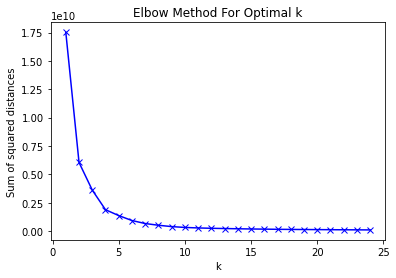

In [306]:
###plot the clusters
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [307]:
kmeans = KMeans(n_clusters=4, random_state=50).fit(dfPairsClusters.T)

In [308]:
clusters = {}
for l in np.unique(kmeans.labels_):
    clusters[l] = []

for i,l in enumerate(kmeans.predict(dfPairsClusters.T)):
    clusters[l].append(dfPairsClusters.columns[i])
for c in sorted(clusters):
    print('Cluster ' + str(c) + ': ', end='')
    for symbol in clusters[c]:
        print(symbol, end=' , ')
    print()
    print()

Cluster 0: ABMD , ACN , ADBE , APD , ALGN , AMT , AMGN , ANSS , ANTM , AON , ANET , ADSK , BDX , BIO , BIIB , BLK , BA , AVGO , CHTR , CI , CTAS , STZ , COO , COST , CMI , DHR , DE , DXCM , DPZ , ECL , EQIX , ESS , EL , RE , FB , FDX , FLT , GS , GWW , HD , HUM , HII , IDXX , ILMN , INTU , ISRG , KLAC , LHX , LH , LRCX , LIN , LMT , MKTX , MLM , MA , MCD , MSFT , MPWR , MCO , MSCI , NFLX , NSC , NOC , NVDA , ORLY , PH , PAYC , POOL , PSA , REGN , ROK , ROP , SPGI , CRM , SBAC , NOW , SHW , SYK , SIVB , SNPS , TDY , TFX , TSLA , TMO , TDG , TYL , ULTA , UNH , URI , VRSN , VRTX , V , WAT , WST , WLTW , ZBRA , 

Cluster 1: AMZN , NVR , 

Cluster 2: MMM , ABT , ABBV , ATVI , AMD , AAP , AES , AFL , A , AKAM , ALK , ALB , ARE , ALXN , ALLE , LNT , ALL , MO , AMCR , AEE , AAL , AEP , AXP , AIG , AWK , AMP , ABC , AME , APH , ADI , AOS , APA , AAPL , AMAT , APTV , ADM , AJG , AIZ , T , ATO , ADP , AVB , AVY , BKR , BLL , BAC , BK , BAX , BBY , BWA , BXP , BSX , BMY , BR , CHRW , COG , CDNS , 

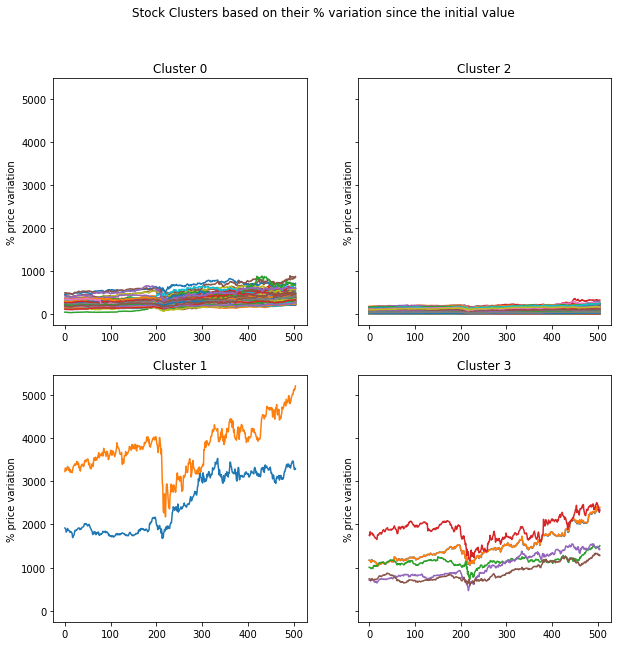

In [309]:
fig, axs = plt.subplots(2, 2,  sharey=True, figsize=(10, 10))
fig.suptitle('Stock Clusters based on their % variation since the initial value')
#plt.ylabel('Stock Price Variation')
axs[0, 0].plot(dfPairsClusters[clusters[0]])
axs[0, 0].set_title('Cluster 0')
axs[1, 0].plot(dfPairsClusters[clusters[1]])
axs[1, 0].set_title('Cluster 1')
axs[0, 1].plot(dfPairsClusters[clusters[2]])
axs[0, 1].set_title('Cluster 2')
axs[1, 1].plot(dfPairsClusters[clusters[3]])
axs[1, 1].set_title('Cluster 3')

for ax in axs.flat:
    ax.set(ylabel='% price variation')

plt.show()

In [348]:
## Create pairs dataframe [company cluster]
df = pd.DataFrame()
df['Symbol']= dfPairsClusters.columns
df['Cluster'] = kmeans.labels_

In [349]:
df

Symbol  Cluster
0      MMM        2
1      ABT        2
2     ABBV        2
3     ABMD        0
4      ACN        0
..     ...      ...
498    YUM        2
499   ZBRA        0
500    ZBH        2
501   ZION        2
502    ZTS        2

[503 rows x 2 columns]

In [350]:
dfSP = pd.read_csv('sp_data.csv')
# dfSP = dfSP[:-1]
dfSP = dfSP.replace('', np.NaN)
dfSP = dfSP.loc[:, dfSP.columns.notnull()]
print(dfSP.columns.unique())
print(dfSP.isnull().sum().sum())
dfSP.columns[dfSP.isnull().any()]
dfSP=dfSP.fillna(method ='ffill')
dfSP=dfSP.fillna(method ='bfill')
dfSP = dfSP.drop('BF.B', axis = 1)
dfSP = dfSP.drop('BRK.B', 1)
dfSP = dfSP.drop('Unnamed: 0', 1)
dfSP = dfSP.drop('Unnamed: 506', 1)
print(dfSP.isnull().sum().sum())
dfSP.columns

Index(['Unnamed: 0', 'MMM', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE',
       'AMD', 'AAP',
       ...
       'XEL', 'XLNX', 'XYL', 'YUM', 'ZBRA', 'ZBH', 'ZION', 'ZTS',
       'Unnamed: 506', 'Date'],
      dtype='object', length=508)
2619
0


Index(['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP',
       'AES',
       ...
       'WYNN', 'XEL', 'XLNX', 'XYL', 'YUM', 'ZBRA', 'ZBH', 'ZION', 'ZTS',
       'Date'],
      dtype='object', length=504)

In [365]:
##Check for cointegration
finalPairs = []
def checkCointegration(stockPairs):
    stocks = stockPairs['Symbol'].tolist()
#     stock2 = stockPairs['Symbol']
    for i in range(len(stocks)):
        for j in range(i+1, len(stocks)):
            X = dfSP[stocks[i]]
            Y = dfSP[stocks[j]]
            print(stocks[i], " ", stocks[j])
            score, pvalue, _ = coint(X, Y)
            if pvalue < 0.05:
                finalPairs.append((stocks[i], stocks[j]))

In [366]:
for i in range(0,4):
    stocksPairs = df.where(df['Cluster']==i)
    stocksPairs = stocksPairs.dropna()
    checkCointegration(stocksPairs)

ABMD   ACN
ABMD   ADBE
ABMD   APD
ABMD   ALGN
ABMD   AMT
ABMD   AMGN
ABMD   ANSS
ABMD   ANTM
ABMD   AON
ABMD   ANET
ABMD   ADSK
ABMD   BDX
ABMD   BIO
ABMD   BIIB
ABMD   BLK
ABMD   BA
ABMD   AVGO
ABMD   CHTR
ABMD   CI
ABMD   CTAS
ABMD   STZ
ABMD   COO
ABMD   COST
ABMD   CMI
ABMD   DHR
ABMD   DE
ABMD   DXCM
ABMD   DPZ
ABMD   ECL
ABMD   EQIX
ABMD   ESS
ABMD   EL
ABMD   RE
ABMD   FB
ABMD   FDX
ABMD   FLT
ABMD   GS
ABMD   GWW
ABMD   HD
ABMD   HUM
ABMD   HII
ABMD   IDXX
ABMD   ILMN
ABMD   INTU
ABMD   ISRG
ABMD   KLAC
ABMD   LHX
ABMD   LH
ABMD   LRCX
ABMD   LIN
ABMD   LMT
ABMD   MKTX
ABMD   MLM
ABMD   MA
ABMD   MCD
ABMD   MSFT
ABMD   MPWR
ABMD   MCO
ABMD   MSCI
ABMD   NFLX
ABMD   NSC
ABMD   NOC
ABMD   NVDA
ABMD   ORLY
ABMD   PH
ABMD   PAYC
ABMD   POOL
ABMD   PSA
ABMD   REGN
ABMD   ROK
ABMD   ROP
ABMD   SPGI
ABMD   CRM
ABMD   SBAC
ABMD   NOW
ABMD   SHW
ABMD   SYK
ABMD   SIVB
ABMD   SNPS
ABMD   TDY
ABMD   TFX
ABMD   TSLA
ABMD   TMO
ABMD   TDG
ABMD   TYL
ABMD   ULTA
ABMD   UNH
ABMD   URI
ABMD   

ANTM   FB
ANTM   FDX
ANTM   FLT
ANTM   GS
ANTM   GWW
ANTM   HD
ANTM   HUM
ANTM   HII
ANTM   IDXX
ANTM   ILMN
ANTM   INTU
ANTM   ISRG
ANTM   KLAC
ANTM   LHX
ANTM   LH
ANTM   LRCX
ANTM   LIN
ANTM   LMT
ANTM   MKTX
ANTM   MLM
ANTM   MA
ANTM   MCD
ANTM   MSFT
ANTM   MPWR
ANTM   MCO
ANTM   MSCI
ANTM   NFLX
ANTM   NSC
ANTM   NOC
ANTM   NVDA
ANTM   ORLY
ANTM   PH
ANTM   PAYC
ANTM   POOL
ANTM   PSA
ANTM   REGN
ANTM   ROK
ANTM   ROP
ANTM   SPGI
ANTM   CRM
ANTM   SBAC
ANTM   NOW
ANTM   SHW
ANTM   SYK
ANTM   SIVB
ANTM   SNPS
ANTM   TDY
ANTM   TFX
ANTM   TSLA
ANTM   TMO
ANTM   TDG
ANTM   TYL
ANTM   ULTA
ANTM   UNH
ANTM   URI
ANTM   VRSN
ANTM   VRTX
ANTM   V
ANTM   WAT
ANTM   WST
ANTM   WLTW
ANTM   ZBRA
AON   ANET
AON   ADSK
AON   BDX
AON   BIO
AON   BIIB
AON   BLK
AON   BA
AON   AVGO
AON   CHTR
AON   CI
AON   CTAS
AON   STZ
AON   COO
AON   COST
AON   CMI
AON   DHR
AON   DE
AON   DXCM
AON   DPZ
AON   ECL
AON   EQIX
AON   ESS
AON   EL
AON   RE
AON   FB
AON   FDX
AON   FLT
AON   GS
AON   GWW
AON   HD

AVGO   ROK
AVGO   ROP
AVGO   SPGI
AVGO   CRM
AVGO   SBAC
AVGO   NOW
AVGO   SHW
AVGO   SYK
AVGO   SIVB
AVGO   SNPS
AVGO   TDY
AVGO   TFX
AVGO   TSLA
AVGO   TMO
AVGO   TDG
AVGO   TYL
AVGO   ULTA
AVGO   UNH
AVGO   URI
AVGO   VRSN
AVGO   VRTX
AVGO   V
AVGO   WAT
AVGO   WST
AVGO   WLTW
AVGO   ZBRA
CHTR   CI
CHTR   CTAS
CHTR   STZ
CHTR   COO
CHTR   COST
CHTR   CMI
CHTR   DHR
CHTR   DE
CHTR   DXCM
CHTR   DPZ
CHTR   ECL
CHTR   EQIX
CHTR   ESS
CHTR   EL
CHTR   RE
CHTR   FB
CHTR   FDX
CHTR   FLT
CHTR   GS
CHTR   GWW
CHTR   HD
CHTR   HUM
CHTR   HII
CHTR   IDXX
CHTR   ILMN
CHTR   INTU
CHTR   ISRG
CHTR   KLAC
CHTR   LHX
CHTR   LH
CHTR   LRCX
CHTR   LIN
CHTR   LMT
CHTR   MKTX
CHTR   MLM
CHTR   MA
CHTR   MCD
CHTR   MSFT
CHTR   MPWR
CHTR   MCO
CHTR   MSCI
CHTR   NFLX
CHTR   NSC
CHTR   NOC
CHTR   NVDA
CHTR   ORLY
CHTR   PH
CHTR   PAYC
CHTR   POOL
CHTR   PSA
CHTR   REGN
CHTR   ROK
CHTR   ROP
CHTR   SPGI
CHTR   CRM
CHTR   SBAC
CHTR   NOW
CHTR   SHW
CHTR   SYK
CHTR   SIVB
CHTR   SNPS
CHTR   TDY
CHTR   TFX

DPZ   SBAC
DPZ   NOW
DPZ   SHW
DPZ   SYK
DPZ   SIVB
DPZ   SNPS
DPZ   TDY
DPZ   TFX
DPZ   TSLA
DPZ   TMO
DPZ   TDG
DPZ   TYL
DPZ   ULTA
DPZ   UNH
DPZ   URI
DPZ   VRSN
DPZ   VRTX
DPZ   V
DPZ   WAT
DPZ   WST
DPZ   WLTW
DPZ   ZBRA
ECL   EQIX
ECL   ESS
ECL   EL
ECL   RE
ECL   FB
ECL   FDX
ECL   FLT
ECL   GS
ECL   GWW
ECL   HD
ECL   HUM
ECL   HII
ECL   IDXX
ECL   ILMN
ECL   INTU
ECL   ISRG
ECL   KLAC
ECL   LHX
ECL   LH
ECL   LRCX
ECL   LIN
ECL   LMT
ECL   MKTX
ECL   MLM
ECL   MA
ECL   MCD
ECL   MSFT
ECL   MPWR
ECL   MCO
ECL   MSCI
ECL   NFLX
ECL   NSC
ECL   NOC
ECL   NVDA
ECL   ORLY
ECL   PH
ECL   PAYC
ECL   POOL
ECL   PSA
ECL   REGN
ECL   ROK
ECL   ROP
ECL   SPGI
ECL   CRM
ECL   SBAC
ECL   NOW
ECL   SHW
ECL   SYK
ECL   SIVB
ECL   SNPS
ECL   TDY
ECL   TFX
ECL   TSLA
ECL   TMO
ECL   TDG
ECL   TYL
ECL   ULTA
ECL   UNH
ECL   URI
ECL   VRSN
ECL   VRTX
ECL   V
ECL   WAT
ECL   WST
ECL   WLTW
ECL   ZBRA
EQIX   ESS
EQIX   EL
EQIX   RE
EQIX   FB
EQIX   FDX
EQIX   FLT
EQIX   GS
EQIX   GWW
EQIX   HD
EQ

IDXX   NVDA
IDXX   ORLY
IDXX   PH
IDXX   PAYC
IDXX   POOL
IDXX   PSA
IDXX   REGN
IDXX   ROK
IDXX   ROP
IDXX   SPGI
IDXX   CRM
IDXX   SBAC
IDXX   NOW
IDXX   SHW
IDXX   SYK
IDXX   SIVB
IDXX   SNPS
IDXX   TDY
IDXX   TFX
IDXX   TSLA
IDXX   TMO
IDXX   TDG
IDXX   TYL
IDXX   ULTA
IDXX   UNH
IDXX   URI
IDXX   VRSN
IDXX   VRTX
IDXX   V
IDXX   WAT
IDXX   WST
IDXX   WLTW
IDXX   ZBRA
ILMN   INTU
ILMN   ISRG
ILMN   KLAC
ILMN   LHX
ILMN   LH
ILMN   LRCX
ILMN   LIN
ILMN   LMT
ILMN   MKTX
ILMN   MLM
ILMN   MA
ILMN   MCD
ILMN   MSFT
ILMN   MPWR
ILMN   MCO
ILMN   MSCI
ILMN   NFLX
ILMN   NSC
ILMN   NOC
ILMN   NVDA
ILMN   ORLY
ILMN   PH
ILMN   PAYC
ILMN   POOL
ILMN   PSA
ILMN   REGN
ILMN   ROK
ILMN   ROP
ILMN   SPGI
ILMN   CRM
ILMN   SBAC
ILMN   NOW
ILMN   SHW
ILMN   SYK
ILMN   SIVB
ILMN   SNPS
ILMN   TDY
ILMN   TFX
ILMN   TSLA
ILMN   TMO
ILMN   TDG
ILMN   TYL
ILMN   ULTA
ILMN   UNH
ILMN   URI
ILMN   VRSN
ILMN   VRTX
ILMN   V
ILMN   WAT
ILMN   WST
ILMN   WLTW
ILMN   ZBRA
INTU   ISRG
INTU   KLAC
INTU   LHX

MSCI   TDY
MSCI   TFX
MSCI   TSLA
MSCI   TMO
MSCI   TDG
MSCI   TYL
MSCI   ULTA
MSCI   UNH
MSCI   URI
MSCI   VRSN
MSCI   VRTX
MSCI   V
MSCI   WAT
MSCI   WST
MSCI   WLTW
MSCI   ZBRA
NFLX   NSC
NFLX   NOC
NFLX   NVDA
NFLX   ORLY
NFLX   PH
NFLX   PAYC
NFLX   POOL
NFLX   PSA
NFLX   REGN
NFLX   ROK
NFLX   ROP
NFLX   SPGI
NFLX   CRM
NFLX   SBAC
NFLX   NOW
NFLX   SHW
NFLX   SYK
NFLX   SIVB
NFLX   SNPS
NFLX   TDY
NFLX   TFX
NFLX   TSLA
NFLX   TMO
NFLX   TDG
NFLX   TYL
NFLX   ULTA
NFLX   UNH
NFLX   URI
NFLX   VRSN
NFLX   VRTX
NFLX   V
NFLX   WAT
NFLX   WST
NFLX   WLTW
NFLX   ZBRA
NSC   NOC
NSC   NVDA
NSC   ORLY
NSC   PH
NSC   PAYC
NSC   POOL
NSC   PSA
NSC   REGN
NSC   ROK
NSC   ROP
NSC   SPGI
NSC   CRM
NSC   SBAC
NSC   NOW
NSC   SHW
NSC   SYK
NSC   SIVB
NSC   SNPS
NSC   TDY
NSC   TFX
NSC   TSLA
NSC   TMO
NSC   TDG
NSC   TYL
NSC   ULTA
NSC   UNH
NSC   URI
NSC   VRSN
NSC   VRTX
NSC   V
NSC   WAT
NSC   WST
NSC   WLTW
NSC   ZBRA
NOC   NVDA
NOC   ORLY
NOC   PH
NOC   PAYC
NOC   POOL
NOC   PSA
NOC   RE

MMM   ETSY
MMM   EVRG
MMM   ES
MMM   EXC
MMM   EXPE
MMM   EXPD
MMM   EXR
MMM   XOM
MMM   FFIV
MMM   FAST
MMM   FRT
MMM   FIS
MMM   FITB
MMM   FE
MMM   FRC
MMM   FISV
MMM   FLIR
MMM   FMC
MMM   F
MMM   FTNT
MMM   FTV
MMM   FBHS
MMM   FOXA
MMM   FOX
MMM   BEN
MMM   FCX
MMM   GPS
MMM   GRMN
MMM   IT
MMM   GNRC
MMM   GD
MMM   GE
MMM   GIS
MMM   GM
MMM   GPC
MMM   GILD
MMM   GL
MMM   GPN
MMM   HAL
MMM   HBI
MMM   HIG
MMM   HAS
MMM   HCA
MMM   PEAK
MMM   HSIC
MMM   HSY
MMM   HES
MMM   HPE
MMM   HLT
MMM   HFC
MMM   HOLX
MMM   HON
MMM   HRL
MMM   HST
MMM   HWM
MMM   HPQ
MMM   HBAN
MMM   IEX
MMM   INFO
MMM   ITW
MMM   INCY
MMM   IR
MMM   INTC
MMM   ICE
MMM   IBM
MMM   IP
MMM   IPG
MMM   IFF
MMM   IVZ
MMM   IPGP
MMM   IQV
MMM   IRM
MMM   JKHY
MMM   J
MMM   JBHT
MMM   SJM
MMM   JNJ
MMM   JCI
MMM   JPM
MMM   JNPR
MMM   KSU
MMM   K
MMM   KEY
MMM   KEYS
MMM   KMB
MMM   KIM
MMM   KMI
MMM   KHC
MMM   KR
MMM   LB
MMM   LW
MMM   LVS
MMM   LEG
MMM   LDOS
MMM   LEN
MMM   LLY
MMM   LNC
MMM   LYV
MMM   LKQ


ABBV   FITB
ABBV   FE
ABBV   FRC
ABBV   FISV
ABBV   FLIR
ABBV   FMC
ABBV   F
ABBV   FTNT
ABBV   FTV
ABBV   FBHS
ABBV   FOXA
ABBV   FOX
ABBV   BEN
ABBV   FCX
ABBV   GPS
ABBV   GRMN
ABBV   IT
ABBV   GNRC
ABBV   GD
ABBV   GE
ABBV   GIS
ABBV   GM
ABBV   GPC
ABBV   GILD
ABBV   GL
ABBV   GPN
ABBV   HAL
ABBV   HBI
ABBV   HIG
ABBV   HAS
ABBV   HCA
ABBV   PEAK
ABBV   HSIC
ABBV   HSY
ABBV   HES
ABBV   HPE
ABBV   HLT
ABBV   HFC
ABBV   HOLX
ABBV   HON
ABBV   HRL
ABBV   HST
ABBV   HWM
ABBV   HPQ
ABBV   HBAN
ABBV   IEX
ABBV   INFO
ABBV   ITW
ABBV   INCY
ABBV   IR
ABBV   INTC
ABBV   ICE
ABBV   IBM
ABBV   IP
ABBV   IPG
ABBV   IFF
ABBV   IVZ
ABBV   IPGP
ABBV   IQV
ABBV   IRM
ABBV   JKHY
ABBV   J
ABBV   JBHT
ABBV   SJM
ABBV   JNJ
ABBV   JCI
ABBV   JPM
ABBV   JNPR
ABBV   KSU
ABBV   K
ABBV   KEY
ABBV   KEYS
ABBV   KMB
ABBV   KIM
ABBV   KMI
ABBV   KHC
ABBV   KR
ABBV   LB
ABBV   LW
ABBV   LVS
ABBV   LEG
ABBV   LDOS
ABBV   LEN
ABBV   LLY
ABBV   LNC
ABBV   LYV
ABBV   LKQ
ABBV   L
ABBV   LOW
ABBV   LUMN
ABBV  

AMD   DISH
AMD   DG
AMD   DLTR
AMD   D
AMD   DOV
AMD   DOW
AMD   DTE
AMD   DUK
AMD   DRE
AMD   DD
AMD   DXC
AMD   EMN
AMD   ETN
AMD   EBAY
AMD   EIX
AMD   EW
AMD   EA
AMD   EMR
AMD   ENPH
AMD   ETR
AMD   EOG
AMD   EFX
AMD   EQR
AMD   ETSY
AMD   EVRG
AMD   ES
AMD   EXC
AMD   EXPE
AMD   EXPD
AMD   EXR
AMD   XOM
AMD   FFIV
AMD   FAST
AMD   FRT
AMD   FIS
AMD   FITB
AMD   FE
AMD   FRC
AMD   FISV
AMD   FLIR
AMD   FMC
AMD   F
AMD   FTNT
AMD   FTV
AMD   FBHS
AMD   FOXA
AMD   FOX
AMD   BEN
AMD   FCX
AMD   GPS
AMD   GRMN
AMD   IT
AMD   GNRC
AMD   GD
AMD   GE
AMD   GIS
AMD   GM
AMD   GPC
AMD   GILD
AMD   GL
AMD   GPN
AMD   HAL
AMD   HBI
AMD   HIG
AMD   HAS
AMD   HCA
AMD   PEAK
AMD   HSIC
AMD   HSY
AMD   HES
AMD   HPE
AMD   HLT
AMD   HFC
AMD   HOLX
AMD   HON
AMD   HRL
AMD   HST
AMD   HWM
AMD   HPQ
AMD   HBAN
AMD   IEX
AMD   INFO
AMD   ITW
AMD   INCY
AMD   IR
AMD   INTC
AMD   ICE
AMD   IBM
AMD   IP
AMD   IPG
AMD   IFF
AMD   IVZ
AMD   IPGP
AMD   IQV
AMD   IRM
AMD   JKHY
AMD   J
AMD   JBHT
AMD   SJM


AES   FISV
AES   FLIR
AES   FMC
AES   F
AES   FTNT
AES   FTV
AES   FBHS
AES   FOXA
AES   FOX
AES   BEN
AES   FCX
AES   GPS
AES   GRMN
AES   IT
AES   GNRC
AES   GD
AES   GE
AES   GIS
AES   GM
AES   GPC
AES   GILD
AES   GL
AES   GPN
AES   HAL
AES   HBI
AES   HIG
AES   HAS
AES   HCA
AES   PEAK
AES   HSIC
AES   HSY
AES   HES
AES   HPE
AES   HLT
AES   HFC
AES   HOLX
AES   HON
AES   HRL
AES   HST
AES   HWM
AES   HPQ
AES   HBAN
AES   IEX
AES   INFO
AES   ITW
AES   INCY
AES   IR
AES   INTC
AES   ICE
AES   IBM
AES   IP
AES   IPG
AES   IFF
AES   IVZ
AES   IPGP
AES   IQV
AES   IRM
AES   JKHY
AES   J
AES   JBHT
AES   SJM
AES   JNJ
AES   JCI
AES   JPM
AES   JNPR
AES   KSU
AES   K
AES   KEY
AES   KEYS
AES   KMB
AES   KIM
AES   KMI
AES   KHC
AES   KR
AES   LB
AES   LW
AES   LVS
AES   LEG
AES   LDOS
AES   LEN
AES   LLY
AES   LNC
AES   LYV
AES   LKQ
AES   L
AES   LOW
AES   LUMN
AES   LYB
AES   MTB
AES   MRO
AES   MPC
AES   MAR
AES   MMC
AES   MAS
AES   MKC
AES   MXIM
AES   MCK
AES   MDT
AES   MRK
AES  

A   LKQ
A   L
A   LOW
A   LUMN
A   LYB
A   MTB
A   MRO
A   MPC
A   MAR
A   MMC
A   MAS
A   MKC
A   MXIM
A   MCK
A   MDT
A   MRK
A   MET
A   MGM
A   MCHP
A   MU
A   MAA
A   MHK
A   TAP
A   MDLZ
A   MNST
A   MS
A   MOS
A   MSI
A   NDAQ
A   NTAP
A   NWL
A   NEM
A   NWSA
A   NWS
A   NEE
A   NLSN
A   NKE
A   NI
A   NTRS
A   NLOK
A   NCLH
A   NOV
A   NRG
A   NUE
A   NXPI
A   OXY
A   ODFL
A   OMC
A   OKE
A   ORCL
A   OTIS
A   PCAR
A   PKG
A   PAYX
A   PYPL
A   PENN
A   PNR
A   PBCT
A   PEP
A   PKI
A   PRGO
A   PFE
A   PM
A   PSX
A   PNW
A   PXD
A   PNC
A   PPG
A   PPL
A   PFG
A   PG
A   PGR
A   PLD
A   PRU
A   PTC
A   PEG
A   PHM
A   PVH
A   QRVO
A   PWR
A   QCOM
A   DGX
A   RL
A   RJF
A   RTX
A   O
A   REG
A   RF
A   RSG
A   RMD
A   RHI
A   ROL
A   ROST
A   RCL
A   SLB
A   STX
A   SEE
A   SRE
A   SPG
A   SWKS
A   SNA
A   SO
A   LUV
A   SWK
A   SBUX
A   STT
A   STE
A   SYF
A   SYY
A   TMUS
A   TROW
A   TTWO
A   TPR
A   TGT
A   TEL
A   TER
A   TXN
A   TXT
A   TJX
A   TSCO
A   TT
A   TRV
A   TR

ALK   NWL
ALK   NEM
ALK   NWSA
ALK   NWS
ALK   NEE
ALK   NLSN
ALK   NKE
ALK   NI
ALK   NTRS
ALK   NLOK
ALK   NCLH
ALK   NOV
ALK   NRG
ALK   NUE
ALK   NXPI
ALK   OXY
ALK   ODFL
ALK   OMC
ALK   OKE
ALK   ORCL
ALK   OTIS
ALK   PCAR
ALK   PKG
ALK   PAYX
ALK   PYPL
ALK   PENN
ALK   PNR
ALK   PBCT
ALK   PEP
ALK   PKI
ALK   PRGO
ALK   PFE
ALK   PM
ALK   PSX
ALK   PNW
ALK   PXD
ALK   PNC
ALK   PPG
ALK   PPL
ALK   PFG
ALK   PG
ALK   PGR
ALK   PLD
ALK   PRU
ALK   PTC
ALK   PEG
ALK   PHM
ALK   PVH
ALK   QRVO
ALK   PWR
ALK   QCOM
ALK   DGX
ALK   RL
ALK   RJF
ALK   RTX
ALK   O
ALK   REG
ALK   RF
ALK   RSG
ALK   RMD
ALK   RHI
ALK   ROL
ALK   ROST
ALK   RCL
ALK   SLB
ALK   STX
ALK   SEE
ALK   SRE
ALK   SPG
ALK   SWKS
ALK   SNA
ALK   SO
ALK   LUV
ALK   SWK
ALK   SBUX
ALK   STT
ALK   STE
ALK   SYF
ALK   SYY
ALK   TMUS
ALK   TROW
ALK   TTWO
ALK   TPR
ALK   TGT
ALK   TEL
ALK   TER
ALK   TXN
ALK   TXT
ALK   TJX
ALK   TSCO
ALK   TT
ALK   TRV
ALK   TRMB
ALK   TFC
ALK   TWTR
ALK   TSN
ALK   UDR
ALK   USB
ALK

ARE   QRVO
ARE   PWR
ARE   QCOM
ARE   DGX
ARE   RL
ARE   RJF
ARE   RTX
ARE   O
ARE   REG
ARE   RF
ARE   RSG
ARE   RMD
ARE   RHI
ARE   ROL
ARE   ROST
ARE   RCL
ARE   SLB
ARE   STX
ARE   SEE
ARE   SRE
ARE   SPG
ARE   SWKS
ARE   SNA
ARE   SO
ARE   LUV
ARE   SWK
ARE   SBUX
ARE   STT
ARE   STE
ARE   SYF
ARE   SYY
ARE   TMUS
ARE   TROW
ARE   TTWO
ARE   TPR
ARE   TGT
ARE   TEL
ARE   TER
ARE   TXN
ARE   TXT
ARE   TJX
ARE   TSCO
ARE   TT
ARE   TRV
ARE   TRMB
ARE   TFC
ARE   TWTR
ARE   TSN
ARE   UDR
ARE   USB
ARE   UAA
ARE   UA
ARE   UNP
ARE   UAL
ARE   UPS
ARE   UHS
ARE   UNM
ARE   VLO
ARE   VTR
ARE   VRSK
ARE   VZ
ARE   VFC
ARE   VIAC
ARE   VTRS
ARE   VNO
ARE   VMC
ARE   WRB
ARE   WAB
ARE   WMT
ARE   WBA
ARE   DIS
ARE   WM
ARE   WEC
ARE   WFC
ARE   WELL
ARE   WDC
ARE   WU
ARE   WRK
ARE   WY
ARE   WHR
ARE   WMB
ARE   WYNN
ARE   XEL
ARE   XLNX
ARE   XYL
ARE   YUM
ARE   ZBH
ARE   ZION
ARE   ZTS
ALXN   ALLE
ALXN   LNT
ALXN   ALL
ALXN   MO
ALXN   AMCR
ALXN   AEE
ALXN   AAL
ALXN   AEP
ALXN   AXP
ALX

ALLE   PBCT
ALLE   PEP
ALLE   PKI
ALLE   PRGO
ALLE   PFE
ALLE   PM
ALLE   PSX
ALLE   PNW
ALLE   PXD
ALLE   PNC
ALLE   PPG
ALLE   PPL
ALLE   PFG
ALLE   PG
ALLE   PGR
ALLE   PLD
ALLE   PRU
ALLE   PTC
ALLE   PEG
ALLE   PHM
ALLE   PVH
ALLE   QRVO
ALLE   PWR
ALLE   QCOM
ALLE   DGX
ALLE   RL
ALLE   RJF
ALLE   RTX
ALLE   O
ALLE   REG
ALLE   RF
ALLE   RSG
ALLE   RMD
ALLE   RHI
ALLE   ROL
ALLE   ROST
ALLE   RCL
ALLE   SLB
ALLE   STX
ALLE   SEE
ALLE   SRE
ALLE   SPG
ALLE   SWKS
ALLE   SNA
ALLE   SO
ALLE   LUV
ALLE   SWK
ALLE   SBUX
ALLE   STT
ALLE   STE
ALLE   SYF
ALLE   SYY
ALLE   TMUS
ALLE   TROW
ALLE   TTWO
ALLE   TPR
ALLE   TGT
ALLE   TEL
ALLE   TER
ALLE   TXN
ALLE   TXT
ALLE   TJX
ALLE   TSCO
ALLE   TT
ALLE   TRV
ALLE   TRMB
ALLE   TFC
ALLE   TWTR
ALLE   TSN
ALLE   UDR
ALLE   USB
ALLE   UAA
ALLE   UA
ALLE   UNP
ALLE   UAL
ALLE   UPS
ALLE   UHS
ALLE   UNM
ALLE   VLO
ALLE   VTR
ALLE   VRSK
ALLE   VZ
ALLE   VFC
ALLE   VIAC
ALLE   VTRS
ALLE   VNO
ALLE   VMC
ALLE   WRB
ALLE   WAB
ALLE   WMT
ALLE

ALL   LUV
ALL   SWK
ALL   SBUX
ALL   STT
ALL   STE
ALL   SYF
ALL   SYY
ALL   TMUS
ALL   TROW
ALL   TTWO
ALL   TPR
ALL   TGT
ALL   TEL
ALL   TER
ALL   TXN
ALL   TXT
ALL   TJX
ALL   TSCO
ALL   TT
ALL   TRV
ALL   TRMB
ALL   TFC
ALL   TWTR
ALL   TSN
ALL   UDR
ALL   USB
ALL   UAA
ALL   UA
ALL   UNP
ALL   UAL
ALL   UPS
ALL   UHS
ALL   UNM
ALL   VLO
ALL   VTR
ALL   VRSK
ALL   VZ
ALL   VFC
ALL   VIAC
ALL   VTRS
ALL   VNO
ALL   VMC
ALL   WRB
ALL   WAB
ALL   WMT
ALL   WBA
ALL   DIS
ALL   WM
ALL   WEC
ALL   WFC
ALL   WELL
ALL   WDC
ALL   WU
ALL   WRK
ALL   WY
ALL   WHR
ALL   WMB
ALL   WYNN
ALL   XEL
ALL   XLNX
ALL   XYL
ALL   YUM
ALL   ZBH
ALL   ZION
ALL   ZTS
MO   AMCR
MO   AEE
MO   AAL
MO   AEP
MO   AXP
MO   AIG
MO   AWK
MO   AMP
MO   ABC
MO   AME
MO   APH
MO   ADI
MO   AOS
MO   APA
MO   AAPL
MO   AMAT
MO   APTV
MO   ADM
MO   AJG
MO   AIZ
MO   T
MO   ATO
MO   ADP
MO   AVB
MO   AVY
MO   BKR
MO   BLL
MO   BAC
MO   BK
MO   BAX
MO   BBY
MO   BWA
MO   BXP
MO   BSX
MO   BMY
MO   BR
MO   CHRW
MO   COG

AMCR   WY
AMCR   WHR
AMCR   WMB
AMCR   WYNN
AMCR   XEL
AMCR   XLNX
AMCR   XYL
AMCR   YUM
AMCR   ZBH
AMCR   ZION
AMCR   ZTS
AEE   AAL
AEE   AEP
AEE   AXP
AEE   AIG
AEE   AWK
AEE   AMP
AEE   ABC
AEE   AME
AEE   APH
AEE   ADI
AEE   AOS
AEE   APA
AEE   AAPL
AEE   AMAT
AEE   APTV
AEE   ADM
AEE   AJG
AEE   AIZ
AEE   T
AEE   ATO
AEE   ADP
AEE   AVB
AEE   AVY
AEE   BKR
AEE   BLL
AEE   BAC
AEE   BK
AEE   BAX
AEE   BBY
AEE   BWA
AEE   BXP
AEE   BSX
AEE   BMY
AEE   BR
AEE   CHRW
AEE   COG
AEE   CDNS
AEE   CZR
AEE   CPB
AEE   COF
AEE   CAH
AEE   KMX
AEE   CCL
AEE   CARR
AEE   CTLT
AEE   CAT
AEE   CBOE
AEE   CBRE
AEE   CDW
AEE   CE
AEE   CNC
AEE   CNP
AEE   CERN
AEE   CF
AEE   SCHW
AEE   CVX
AEE   CB
AEE   CHD
AEE   CINF
AEE   CSCO
AEE   C
AEE   CFG
AEE   CTXS
AEE   CLX
AEE   CME
AEE   CMS
AEE   KO
AEE   CTSH
AEE   CL
AEE   CMCSA
AEE   CMA
AEE   CAG
AEE   COP
AEE   ED
AEE   CPRT
AEE   GLW
AEE   CTVA
AEE   CCI
AEE   CSX
AEE   CVS
AEE   DHI
AEE   DRI
AEE   DVA
AEE   DAL
AEE   XRAY
AEE   DVN
AEE   FAN

AEP   CNP
AEP   CERN
AEP   CF
AEP   SCHW
AEP   CVX
AEP   CB
AEP   CHD
AEP   CINF
AEP   CSCO
AEP   C
AEP   CFG
AEP   CTXS
AEP   CLX
AEP   CME
AEP   CMS
AEP   KO
AEP   CTSH
AEP   CL
AEP   CMCSA
AEP   CMA
AEP   CAG
AEP   COP
AEP   ED
AEP   CPRT
AEP   GLW
AEP   CTVA
AEP   CCI
AEP   CSX
AEP   CVS
AEP   DHI
AEP   DRI
AEP   DVA
AEP   DAL
AEP   XRAY
AEP   DVN
AEP   FANG
AEP   DLR
AEP   DFS
AEP   DISCA
AEP   DISCK
AEP   DISH
AEP   DG
AEP   DLTR
AEP   D
AEP   DOV
AEP   DOW
AEP   DTE
AEP   DUK
AEP   DRE
AEP   DD
AEP   DXC
AEP   EMN
AEP   ETN
AEP   EBAY
AEP   EIX
AEP   EW
AEP   EA
AEP   EMR
AEP   ENPH
AEP   ETR
AEP   EOG
AEP   EFX
AEP   EQR
AEP   ETSY
AEP   EVRG
AEP   ES
AEP   EXC
AEP   EXPE
AEP   EXPD
AEP   EXR
AEP   XOM
AEP   FFIV
AEP   FAST
AEP   FRT
AEP   FIS
AEP   FITB
AEP   FE
AEP   FRC
AEP   FISV
AEP   FLIR
AEP   FMC
AEP   F
AEP   FTNT
AEP   FTV
AEP   FBHS
AEP   FOXA
AEP   FOX
AEP   BEN
AEP   FCX
AEP   GPS
AEP   GRMN
AEP   IT
AEP   GNRC
AEP   GD
AEP   GE
AEP   GIS
AEP   GM
AEP   GPC
AEP   G

AIG   FFIV
AIG   FAST
AIG   FRT
AIG   FIS
AIG   FITB
AIG   FE
AIG   FRC
AIG   FISV
AIG   FLIR
AIG   FMC
AIG   F
AIG   FTNT
AIG   FTV
AIG   FBHS
AIG   FOXA
AIG   FOX
AIG   BEN
AIG   FCX
AIG   GPS
AIG   GRMN
AIG   IT
AIG   GNRC
AIG   GD
AIG   GE
AIG   GIS
AIG   GM
AIG   GPC
AIG   GILD
AIG   GL
AIG   GPN
AIG   HAL
AIG   HBI
AIG   HIG
AIG   HAS
AIG   HCA
AIG   PEAK
AIG   HSIC
AIG   HSY
AIG   HES
AIG   HPE
AIG   HLT
AIG   HFC
AIG   HOLX
AIG   HON
AIG   HRL
AIG   HST
AIG   HWM
AIG   HPQ
AIG   HBAN
AIG   IEX
AIG   INFO
AIG   ITW
AIG   INCY
AIG   IR
AIG   INTC
AIG   ICE
AIG   IBM
AIG   IP
AIG   IPG
AIG   IFF
AIG   IVZ
AIG   IPGP
AIG   IQV
AIG   IRM
AIG   JKHY
AIG   J
AIG   JBHT
AIG   SJM
AIG   JNJ
AIG   JCI
AIG   JPM
AIG   JNPR
AIG   KSU
AIG   K
AIG   KEY
AIG   KEYS
AIG   KMB
AIG   KIM
AIG   KMI
AIG   KHC
AIG   KR
AIG   LB
AIG   LW
AIG   LVS
AIG   LEG
AIG   LDOS
AIG   LEN
AIG   LLY
AIG   LNC
AIG   LYV
AIG   LKQ
AIG   L
AIG   LOW
AIG   LUMN
AIG   LYB
AIG   MTB
AIG   MRO
AIG   MPC
AIG   MAR
AIG 

AMP   KEYS
AMP   KMB
AMP   KIM
AMP   KMI
AMP   KHC
AMP   KR
AMP   LB
AMP   LW
AMP   LVS
AMP   LEG
AMP   LDOS
AMP   LEN
AMP   LLY
AMP   LNC
AMP   LYV
AMP   LKQ
AMP   L
AMP   LOW
AMP   LUMN
AMP   LYB
AMP   MTB
AMP   MRO
AMP   MPC
AMP   MAR
AMP   MMC
AMP   MAS
AMP   MKC
AMP   MXIM
AMP   MCK
AMP   MDT
AMP   MRK
AMP   MET
AMP   MGM
AMP   MCHP
AMP   MU
AMP   MAA
AMP   MHK
AMP   TAP
AMP   MDLZ
AMP   MNST
AMP   MS
AMP   MOS
AMP   MSI
AMP   NDAQ
AMP   NTAP
AMP   NWL
AMP   NEM
AMP   NWSA
AMP   NWS
AMP   NEE
AMP   NLSN
AMP   NKE
AMP   NI
AMP   NTRS
AMP   NLOK
AMP   NCLH
AMP   NOV
AMP   NRG
AMP   NUE
AMP   NXPI
AMP   OXY
AMP   ODFL
AMP   OMC
AMP   OKE
AMP   ORCL
AMP   OTIS
AMP   PCAR
AMP   PKG
AMP   PAYX
AMP   PYPL
AMP   PENN
AMP   PNR
AMP   PBCT
AMP   PEP
AMP   PKI
AMP   PRGO
AMP   PFE
AMP   PM
AMP   PSX
AMP   PNW
AMP   PXD
AMP   PNC
AMP   PPG
AMP   PPL
AMP   PFG
AMP   PG
AMP   PGR
AMP   PLD
AMP   PRU
AMP   PTC
AMP   PEG
AMP   PHM
AMP   PVH
AMP   QRVO
AMP   PWR
AMP   QCOM
AMP   DGX
AMP   RL
AMP  

AME   PKI
AME   PRGO
AME   PFE
AME   PM
AME   PSX
AME   PNW
AME   PXD
AME   PNC
AME   PPG
AME   PPL
AME   PFG
AME   PG
AME   PGR
AME   PLD
AME   PRU
AME   PTC
AME   PEG
AME   PHM
AME   PVH
AME   QRVO
AME   PWR
AME   QCOM
AME   DGX
AME   RL
AME   RJF
AME   RTX
AME   O
AME   REG
AME   RF
AME   RSG
AME   RMD
AME   RHI
AME   ROL
AME   ROST
AME   RCL
AME   SLB
AME   STX
AME   SEE
AME   SRE
AME   SPG
AME   SWKS
AME   SNA
AME   SO
AME   LUV
AME   SWK
AME   SBUX
AME   STT
AME   STE
AME   SYF
AME   SYY
AME   TMUS
AME   TROW
AME   TTWO
AME   TPR
AME   TGT
AME   TEL
AME   TER
AME   TXN
AME   TXT
AME   TJX
AME   TSCO
AME   TT
AME   TRV
AME   TRMB
AME   TFC
AME   TWTR
AME   TSN
AME   UDR
AME   USB
AME   UAA
AME   UA
AME   UNP
AME   UAL
AME   UPS
AME   UHS
AME   UNM
AME   VLO
AME   VTR
AME   VRSK
AME   VZ
AME   VFC
AME   VIAC
AME   VTRS
AME   VNO
AME   VMC
AME   WRB
AME   WAB
AME   WMT
AME   WBA
AME   DIS
AME   WM
AME   WEC
AME   WFC
AME   WELL
AME   WDC
AME   WU
AME   WRK
AME   WY
AME   WHR
AME   W

ADI   VFC
ADI   VIAC
ADI   VTRS
ADI   VNO
ADI   VMC
ADI   WRB
ADI   WAB
ADI   WMT
ADI   WBA
ADI   DIS
ADI   WM
ADI   WEC
ADI   WFC
ADI   WELL
ADI   WDC
ADI   WU
ADI   WRK
ADI   WY
ADI   WHR
ADI   WMB
ADI   WYNN
ADI   XEL
ADI   XLNX
ADI   XYL
ADI   YUM
ADI   ZBH
ADI   ZION
ADI   ZTS
AOS   APA
AOS   AAPL
AOS   AMAT
AOS   APTV
AOS   ADM
AOS   AJG
AOS   AIZ
AOS   T
AOS   ATO
AOS   ADP
AOS   AVB
AOS   AVY
AOS   BKR
AOS   BLL
AOS   BAC
AOS   BK
AOS   BAX
AOS   BBY
AOS   BWA
AOS   BXP
AOS   BSX
AOS   BMY
AOS   BR
AOS   CHRW
AOS   COG
AOS   CDNS
AOS   CZR
AOS   CPB
AOS   COF
AOS   CAH
AOS   KMX
AOS   CCL
AOS   CARR
AOS   CTLT
AOS   CAT
AOS   CBOE
AOS   CBRE
AOS   CDW
AOS   CE
AOS   CNC
AOS   CNP
AOS   CERN
AOS   CF
AOS   SCHW
AOS   CVX
AOS   CB
AOS   CHD
AOS   CINF
AOS   CSCO
AOS   C
AOS   CFG
AOS   CTXS
AOS   CLX
AOS   CME
AOS   CMS
AOS   KO
AOS   CTSH
AOS   CL
AOS   CMCSA
AOS   CMA
AOS   CAG
AOS   COP
AOS   ED
AOS   CPRT
AOS   GLW
AOS   CTVA
AOS   CCI
AOS   CSX
AOS   CVS
AOS   DHI
AOS   DRI


AAPL   CLX
AAPL   CME
AAPL   CMS
AAPL   KO
AAPL   CTSH
AAPL   CL
AAPL   CMCSA
AAPL   CMA
AAPL   CAG
AAPL   COP
AAPL   ED
AAPL   CPRT
AAPL   GLW
AAPL   CTVA
AAPL   CCI
AAPL   CSX
AAPL   CVS
AAPL   DHI
AAPL   DRI
AAPL   DVA
AAPL   DAL
AAPL   XRAY
AAPL   DVN
AAPL   FANG
AAPL   DLR
AAPL   DFS
AAPL   DISCA
AAPL   DISCK
AAPL   DISH
AAPL   DG
AAPL   DLTR
AAPL   D
AAPL   DOV
AAPL   DOW
AAPL   DTE
AAPL   DUK
AAPL   DRE
AAPL   DD
AAPL   DXC
AAPL   EMN
AAPL   ETN
AAPL   EBAY
AAPL   EIX
AAPL   EW
AAPL   EA
AAPL   EMR
AAPL   ENPH
AAPL   ETR
AAPL   EOG
AAPL   EFX
AAPL   EQR
AAPL   ETSY
AAPL   EVRG
AAPL   ES
AAPL   EXC
AAPL   EXPE
AAPL   EXPD
AAPL   EXR
AAPL   XOM
AAPL   FFIV
AAPL   FAST
AAPL   FRT
AAPL   FIS
AAPL   FITB
AAPL   FE
AAPL   FRC
AAPL   FISV
AAPL   FLIR
AAPL   FMC
AAPL   F
AAPL   FTNT
AAPL   FTV
AAPL   FBHS
AAPL   FOXA
AAPL   FOX
AAPL   BEN
AAPL   FCX
AAPL   GPS
AAPL   GRMN
AAPL   IT
AAPL   GNRC
AAPL   GD
AAPL   GE
AAPL   GIS
AAPL   GM
AAPL   GPC
AAPL   GILD
AAPL   GL
AAPL   GPN
AAPL   HA

APTV   DRI
APTV   DVA
APTV   DAL
APTV   XRAY
APTV   DVN
APTV   FANG
APTV   DLR
APTV   DFS
APTV   DISCA
APTV   DISCK
APTV   DISH
APTV   DG
APTV   DLTR
APTV   D
APTV   DOV
APTV   DOW
APTV   DTE
APTV   DUK
APTV   DRE
APTV   DD
APTV   DXC
APTV   EMN
APTV   ETN
APTV   EBAY
APTV   EIX
APTV   EW
APTV   EA
APTV   EMR
APTV   ENPH
APTV   ETR
APTV   EOG
APTV   EFX
APTV   EQR
APTV   ETSY
APTV   EVRG
APTV   ES
APTV   EXC
APTV   EXPE
APTV   EXPD
APTV   EXR
APTV   XOM
APTV   FFIV
APTV   FAST
APTV   FRT
APTV   FIS
APTV   FITB
APTV   FE
APTV   FRC
APTV   FISV
APTV   FLIR
APTV   FMC
APTV   F
APTV   FTNT
APTV   FTV
APTV   FBHS
APTV   FOXA
APTV   FOX
APTV   BEN
APTV   FCX
APTV   GPS
APTV   GRMN
APTV   IT
APTV   GNRC
APTV   GD
APTV   GE
APTV   GIS
APTV   GM
APTV   GPC
APTV   GILD
APTV   GL
APTV   GPN
APTV   HAL
APTV   HBI
APTV   HIG
APTV   HAS
APTV   HCA
APTV   PEAK
APTV   HSIC
APTV   HSY
APTV   HES
APTV   HPE
APTV   HLT
APTV   HFC
APTV   HOLX
APTV   HON
APTV   HRL
APTV   HST
APTV   HWM
APTV   HPQ
APTV   H

AJG   FCX
AJG   GPS
AJG   GRMN
AJG   IT
AJG   GNRC
AJG   GD
AJG   GE
AJG   GIS
AJG   GM
AJG   GPC
AJG   GILD
AJG   GL
AJG   GPN
AJG   HAL
AJG   HBI
AJG   HIG
AJG   HAS
AJG   HCA
AJG   PEAK
AJG   HSIC
AJG   HSY
AJG   HES
AJG   HPE
AJG   HLT
AJG   HFC
AJG   HOLX
AJG   HON
AJG   HRL
AJG   HST
AJG   HWM
AJG   HPQ
AJG   HBAN
AJG   IEX
AJG   INFO
AJG   ITW
AJG   INCY
AJG   IR
AJG   INTC
AJG   ICE
AJG   IBM
AJG   IP
AJG   IPG
AJG   IFF
AJG   IVZ
AJG   IPGP
AJG   IQV
AJG   IRM
AJG   JKHY
AJG   J
AJG   JBHT
AJG   SJM
AJG   JNJ
AJG   JCI
AJG   JPM
AJG   JNPR
AJG   KSU
AJG   K
AJG   KEY
AJG   KEYS
AJG   KMB
AJG   KIM
AJG   KMI
AJG   KHC
AJG   KR
AJG   LB
AJG   LW
AJG   LVS
AJG   LEG
AJG   LDOS
AJG   LEN
AJG   LLY
AJG   LNC
AJG   LYV
AJG   LKQ
AJG   L
AJG   LOW
AJG   LUMN
AJG   LYB
AJG   MTB
AJG   MRO
AJG   MPC
AJG   MAR
AJG   MMC
AJG   MAS
AJG   MKC
AJG   MXIM
AJG   MCK
AJG   MDT
AJG   MRK
AJG   MET
AJG   MGM
AJG   MCHP
AJG   MU
AJG   MAA
AJG   MHK
AJG   TAP
AJG   MDLZ
AJG   MNST
AJG   MS
AJG   M

T   PLD
T   PRU
T   PTC
T   PEG
T   PHM
T   PVH
T   QRVO
T   PWR
T   QCOM
T   DGX
T   RL
T   RJF
T   RTX
T   O
T   REG
T   RF
T   RSG
T   RMD
T   RHI
T   ROL
T   ROST
T   RCL
T   SLB
T   STX
T   SEE
T   SRE
T   SPG
T   SWKS
T   SNA
T   SO
T   LUV
T   SWK
T   SBUX
T   STT
T   STE
T   SYF
T   SYY
T   TMUS
T   TROW
T   TTWO
T   TPR
T   TGT
T   TEL
T   TER
T   TXN
T   TXT
T   TJX
T   TSCO
T   TT
T   TRV
T   TRMB
T   TFC
T   TWTR
T   TSN
T   UDR
T   USB
T   UAA
T   UA
T   UNP
T   UAL
T   UPS
T   UHS
T   UNM
T   VLO
T   VTR
T   VRSK
T   VZ
T   VFC
T   VIAC
T   VTRS
T   VNO
T   VMC
T   WRB
T   WAB
T   WMT
T   WBA
T   DIS
T   WM
T   WEC
T   WFC
T   WELL
T   WDC
T   WU
T   WRK
T   WY
T   WHR
T   WMB
T   WYNN
T   XEL
T   XLNX
T   XYL
T   YUM
T   ZBH
T   ZION
T   ZTS
ATO   ADP
ATO   AVB
ATO   AVY
ATO   BKR
ATO   BLL
ATO   BAC
ATO   BK
ATO   BAX
ATO   BBY
ATO   BWA
ATO   BXP
ATO   BSX
ATO   BMY
ATO   BR
ATO   CHRW
ATO   COG
ATO   CDNS
ATO   CZR
ATO   CPB
ATO   COF
ATO   CAH
ATO   KMX
ATO   CCL
ATO

AVB   CAT
AVB   CBOE
AVB   CBRE
AVB   CDW
AVB   CE
AVB   CNC
AVB   CNP
AVB   CERN
AVB   CF
AVB   SCHW
AVB   CVX
AVB   CB
AVB   CHD
AVB   CINF
AVB   CSCO
AVB   C
AVB   CFG
AVB   CTXS
AVB   CLX
AVB   CME
AVB   CMS
AVB   KO
AVB   CTSH
AVB   CL
AVB   CMCSA
AVB   CMA
AVB   CAG
AVB   COP
AVB   ED
AVB   CPRT
AVB   GLW
AVB   CTVA
AVB   CCI
AVB   CSX
AVB   CVS
AVB   DHI
AVB   DRI
AVB   DVA
AVB   DAL
AVB   XRAY
AVB   DVN
AVB   FANG
AVB   DLR
AVB   DFS
AVB   DISCA
AVB   DISCK
AVB   DISH
AVB   DG
AVB   DLTR
AVB   D
AVB   DOV
AVB   DOW
AVB   DTE
AVB   DUK
AVB   DRE
AVB   DD
AVB   DXC
AVB   EMN
AVB   ETN
AVB   EBAY
AVB   EIX
AVB   EW
AVB   EA
AVB   EMR
AVB   ENPH
AVB   ETR
AVB   EOG
AVB   EFX
AVB   EQR
AVB   ETSY
AVB   EVRG
AVB   ES
AVB   EXC
AVB   EXPE
AVB   EXPD
AVB   EXR
AVB   XOM
AVB   FFIV
AVB   FAST
AVB   FRT
AVB   FIS
AVB   FITB
AVB   FE
AVB   FRC
AVB   FISV
AVB   FLIR
AVB   FMC
AVB   F
AVB   FTNT
AVB   FTV
AVB   FBHS
AVB   FOXA
AVB   FOX
AVB   BEN
AVB   FCX
AVB   GPS
AVB   GRMN
AVB   IT
AVB 

BKR   HIG
BKR   HAS
BKR   HCA
BKR   PEAK
BKR   HSIC
BKR   HSY
BKR   HES
BKR   HPE
BKR   HLT
BKR   HFC
BKR   HOLX
BKR   HON
BKR   HRL
BKR   HST
BKR   HWM
BKR   HPQ
BKR   HBAN
BKR   IEX
BKR   INFO
BKR   ITW
BKR   INCY
BKR   IR
BKR   INTC
BKR   ICE
BKR   IBM
BKR   IP
BKR   IPG
BKR   IFF
BKR   IVZ
BKR   IPGP
BKR   IQV
BKR   IRM
BKR   JKHY
BKR   J
BKR   JBHT
BKR   SJM
BKR   JNJ
BKR   JCI
BKR   JPM
BKR   JNPR
BKR   KSU
BKR   K
BKR   KEY
BKR   KEYS
BKR   KMB
BKR   KIM
BKR   KMI
BKR   KHC
BKR   KR
BKR   LB
BKR   LW
BKR   LVS
BKR   LEG
BKR   LDOS
BKR   LEN
BKR   LLY
BKR   LNC
BKR   LYV
BKR   LKQ
BKR   L
BKR   LOW
BKR   LUMN
BKR   LYB
BKR   MTB
BKR   MRO
BKR   MPC
BKR   MAR
BKR   MMC
BKR   MAS
BKR   MKC
BKR   MXIM
BKR   MCK
BKR   MDT
BKR   MRK
BKR   MET
BKR   MGM
BKR   MCHP
BKR   MU
BKR   MAA
BKR   MHK
BKR   TAP
BKR   MDLZ
BKR   MNST
BKR   MS
BKR   MOS
BKR   MSI
BKR   NDAQ
BKR   NTAP
BKR   NWL
BKR   NEM
BKR   NWSA
BKR   NWS
BKR   NEE
BKR   NLSN
BKR   NKE
BKR   NI
BKR   NTRS
BKR   NLOK
BKR   NCLH

BAC   OMC
BAC   OKE
BAC   ORCL
BAC   OTIS
BAC   PCAR
BAC   PKG
BAC   PAYX
BAC   PYPL
BAC   PENN
BAC   PNR
BAC   PBCT
BAC   PEP
BAC   PKI
BAC   PRGO
BAC   PFE
BAC   PM
BAC   PSX
BAC   PNW
BAC   PXD
BAC   PNC
BAC   PPG
BAC   PPL
BAC   PFG
BAC   PG
BAC   PGR
BAC   PLD
BAC   PRU
BAC   PTC
BAC   PEG
BAC   PHM
BAC   PVH
BAC   QRVO
BAC   PWR
BAC   QCOM
BAC   DGX
BAC   RL
BAC   RJF
BAC   RTX
BAC   O
BAC   REG
BAC   RF
BAC   RSG
BAC   RMD
BAC   RHI
BAC   ROL
BAC   ROST
BAC   RCL
BAC   SLB
BAC   STX
BAC   SEE
BAC   SRE
BAC   SPG
BAC   SWKS
BAC   SNA
BAC   SO
BAC   LUV
BAC   SWK
BAC   SBUX
BAC   STT
BAC   STE
BAC   SYF
BAC   SYY
BAC   TMUS
BAC   TROW
BAC   TTWO
BAC   TPR
BAC   TGT
BAC   TEL
BAC   TER
BAC   TXN
BAC   TXT
BAC   TJX
BAC   TSCO
BAC   TT
BAC   TRV
BAC   TRMB
BAC   TFC
BAC   TWTR
BAC   TSN
BAC   UDR
BAC   USB
BAC   UAA
BAC   UA
BAC   UNP
BAC   UAL
BAC   UPS
BAC   UHS
BAC   UNM
BAC   VLO
BAC   VTR
BAC   VRSK
BAC   VZ
BAC   VFC
BAC   VIAC
BAC   VTRS
BAC   VNO
BAC   VMC
BAC   WRB
BAC   WA

BBY   C
BBY   CFG
BBY   CTXS
BBY   CLX
BBY   CME
BBY   CMS
BBY   KO
BBY   CTSH
BBY   CL
BBY   CMCSA
BBY   CMA
BBY   CAG
BBY   COP
BBY   ED
BBY   CPRT
BBY   GLW
BBY   CTVA
BBY   CCI
BBY   CSX
BBY   CVS
BBY   DHI
BBY   DRI
BBY   DVA
BBY   DAL
BBY   XRAY
BBY   DVN
BBY   FANG
BBY   DLR
BBY   DFS
BBY   DISCA
BBY   DISCK
BBY   DISH
BBY   DG
BBY   DLTR
BBY   D
BBY   DOV
BBY   DOW
BBY   DTE
BBY   DUK
BBY   DRE
BBY   DD
BBY   DXC
BBY   EMN
BBY   ETN
BBY   EBAY
BBY   EIX
BBY   EW
BBY   EA
BBY   EMR
BBY   ENPH
BBY   ETR
BBY   EOG
BBY   EFX
BBY   EQR
BBY   ETSY
BBY   EVRG
BBY   ES
BBY   EXC
BBY   EXPE
BBY   EXPD
BBY   EXR
BBY   XOM
BBY   FFIV
BBY   FAST
BBY   FRT
BBY   FIS
BBY   FITB
BBY   FE
BBY   FRC
BBY   FISV
BBY   FLIR
BBY   FMC
BBY   F
BBY   FTNT
BBY   FTV
BBY   FBHS
BBY   FOXA
BBY   FOX
BBY   BEN
BBY   FCX
BBY   GPS
BBY   GRMN
BBY   IT
BBY   GNRC
BBY   GD
BBY   GE
BBY   GIS
BBY   GM
BBY   GPC
BBY   GILD
BBY   GL
BBY   GPN
BBY   HAL
BBY   HBI
BBY   HIG
BBY   HAS
BBY   HCA
BBY   PEAK
BBY   HS

BXP   ITW
BXP   INCY
BXP   IR
BXP   INTC
BXP   ICE
BXP   IBM
BXP   IP
BXP   IPG
BXP   IFF
BXP   IVZ
BXP   IPGP
BXP   IQV
BXP   IRM
BXP   JKHY
BXP   J
BXP   JBHT
BXP   SJM
BXP   JNJ
BXP   JCI
BXP   JPM
BXP   JNPR
BXP   KSU
BXP   K
BXP   KEY
BXP   KEYS
BXP   KMB
BXP   KIM
BXP   KMI
BXP   KHC
BXP   KR
BXP   LB
BXP   LW
BXP   LVS
BXP   LEG
BXP   LDOS
BXP   LEN
BXP   LLY
BXP   LNC
BXP   LYV
BXP   LKQ
BXP   L
BXP   LOW
BXP   LUMN
BXP   LYB
BXP   MTB
BXP   MRO
BXP   MPC
BXP   MAR
BXP   MMC
BXP   MAS
BXP   MKC
BXP   MXIM
BXP   MCK
BXP   MDT
BXP   MRK
BXP   MET
BXP   MGM
BXP   MCHP
BXP   MU
BXP   MAA
BXP   MHK
BXP   TAP
BXP   MDLZ
BXP   MNST
BXP   MS
BXP   MOS
BXP   MSI
BXP   NDAQ
BXP   NTAP
BXP   NWL
BXP   NEM
BXP   NWSA
BXP   NWS
BXP   NEE
BXP   NLSN
BXP   NKE
BXP   NI
BXP   NTRS
BXP   NLOK
BXP   NCLH
BXP   NOV
BXP   NRG
BXP   NUE
BXP   NXPI
BXP   OXY
BXP   ODFL
BXP   OMC
BXP   OKE
BXP   ORCL
BXP   OTIS
BXP   PCAR
BXP   PKG
BXP   PAYX
BXP   PYPL
BXP   PENN
BXP   PNR
BXP   PBCT
BXP   PEP
BXP  

BMY   QRVO
BMY   PWR
BMY   QCOM
BMY   DGX
BMY   RL
BMY   RJF
BMY   RTX
BMY   O
BMY   REG
BMY   RF
BMY   RSG
BMY   RMD
BMY   RHI
BMY   ROL
BMY   ROST
BMY   RCL
BMY   SLB
BMY   STX
BMY   SEE
BMY   SRE
BMY   SPG
BMY   SWKS
BMY   SNA
BMY   SO
BMY   LUV
BMY   SWK
BMY   SBUX
BMY   STT
BMY   STE
BMY   SYF
BMY   SYY
BMY   TMUS
BMY   TROW
BMY   TTWO
BMY   TPR
BMY   TGT
BMY   TEL
BMY   TER
BMY   TXN
BMY   TXT
BMY   TJX
BMY   TSCO
BMY   TT
BMY   TRV
BMY   TRMB
BMY   TFC
BMY   TWTR
BMY   TSN
BMY   UDR
BMY   USB
BMY   UAA
BMY   UA
BMY   UNP
BMY   UAL
BMY   UPS
BMY   UHS
BMY   UNM
BMY   VLO
BMY   VTR
BMY   VRSK
BMY   VZ
BMY   VFC
BMY   VIAC
BMY   VTRS
BMY   VNO
BMY   VMC
BMY   WRB
BMY   WAB
BMY   WMT
BMY   WBA
BMY   DIS
BMY   WM
BMY   WEC
BMY   WFC
BMY   WELL
BMY   WDC
BMY   WU
BMY   WRK
BMY   WY
BMY   WHR
BMY   WMB
BMY   WYNN
BMY   XEL
BMY   XLNX
BMY   XYL
BMY   YUM
BMY   ZBH
BMY   ZION
BMY   ZTS
BR   CHRW
BR   COG
BR   CDNS
BR   CZR
BR   CPB
BR   COF
BR   CAH
BR   KMX
BR   CCL
BR   CARR
BR   CTLT


COG   CMCSA
COG   CMA
COG   CAG
COG   COP
COG   ED
COG   CPRT
COG   GLW
COG   CTVA
COG   CCI
COG   CSX
COG   CVS
COG   DHI
COG   DRI
COG   DVA
COG   DAL
COG   XRAY
COG   DVN
COG   FANG
COG   DLR
COG   DFS
COG   DISCA
COG   DISCK
COG   DISH
COG   DG
COG   DLTR
COG   D
COG   DOV
COG   DOW
COG   DTE
COG   DUK
COG   DRE
COG   DD
COG   DXC
COG   EMN
COG   ETN
COG   EBAY
COG   EIX
COG   EW
COG   EA
COG   EMR
COG   ENPH
COG   ETR
COG   EOG
COG   EFX
COG   EQR
COG   ETSY
COG   EVRG
COG   ES
COG   EXC
COG   EXPE
COG   EXPD
COG   EXR
COG   XOM
COG   FFIV
COG   FAST
COG   FRT
COG   FIS
COG   FITB
COG   FE
COG   FRC
COG   FISV
COG   FLIR
COG   FMC
COG   F
COG   FTNT
COG   FTV
COG   FBHS
COG   FOXA
COG   FOX
COG   BEN
COG   FCX
COG   GPS
COG   GRMN
COG   IT
COG   GNRC
COG   GD
COG   GE
COG   GIS
COG   GM
COG   GPC
COG   GILD
COG   GL
COG   GPN
COG   HAL
COG   HBI
COG   HIG
COG   HAS
COG   HCA
COG   PEAK
COG   HSIC
COG   HSY
COG   HES
COG   HPE
COG   HLT
COG   HFC
COG   HOLX
COG   HON
COG   HRL
COG 

CZR   HLT
CZR   HFC
CZR   HOLX
CZR   HON
CZR   HRL
CZR   HST
CZR   HWM
CZR   HPQ
CZR   HBAN
CZR   IEX
CZR   INFO
CZR   ITW
CZR   INCY
CZR   IR
CZR   INTC
CZR   ICE
CZR   IBM
CZR   IP
CZR   IPG
CZR   IFF
CZR   IVZ
CZR   IPGP
CZR   IQV
CZR   IRM
CZR   JKHY
CZR   J
CZR   JBHT
CZR   SJM
CZR   JNJ
CZR   JCI
CZR   JPM
CZR   JNPR
CZR   KSU
CZR   K
CZR   KEY
CZR   KEYS
CZR   KMB
CZR   KIM
CZR   KMI
CZR   KHC
CZR   KR
CZR   LB
CZR   LW
CZR   LVS
CZR   LEG
CZR   LDOS
CZR   LEN
CZR   LLY
CZR   LNC
CZR   LYV
CZR   LKQ
CZR   L
CZR   LOW
CZR   LUMN
CZR   LYB
CZR   MTB
CZR   MRO
CZR   MPC
CZR   MAR
CZR   MMC
CZR   MAS
CZR   MKC
CZR   MXIM
CZR   MCK
CZR   MDT
CZR   MRK
CZR   MET
CZR   MGM
CZR   MCHP
CZR   MU
CZR   MAA
CZR   MHK
CZR   TAP
CZR   MDLZ
CZR   MNST
CZR   MS
CZR   MOS
CZR   MSI
CZR   NDAQ
CZR   NTAP
CZR   NWL
CZR   NEM
CZR   NWSA
CZR   NWS
CZR   NEE
CZR   NLSN
CZR   NKE
CZR   NI
CZR   NTRS
CZR   NLOK
CZR   NCLH
CZR   NOV
CZR   NRG
CZR   NUE
CZR   NXPI
CZR   OXY
CZR   ODFL
CZR   OMC
CZR   OKE

COF   RL
COF   RJF
COF   RTX
COF   O
COF   REG
COF   RF
COF   RSG
COF   RMD
COF   RHI
COF   ROL
COF   ROST
COF   RCL
COF   SLB
COF   STX
COF   SEE
COF   SRE
COF   SPG
COF   SWKS
COF   SNA
COF   SO
COF   LUV
COF   SWK
COF   SBUX
COF   STT
COF   STE
COF   SYF
COF   SYY
COF   TMUS
COF   TROW
COF   TTWO
COF   TPR
COF   TGT
COF   TEL
COF   TER
COF   TXN
COF   TXT
COF   TJX
COF   TSCO
COF   TT
COF   TRV
COF   TRMB
COF   TFC
COF   TWTR
COF   TSN
COF   UDR
COF   USB
COF   UAA
COF   UA
COF   UNP
COF   UAL
COF   UPS
COF   UHS
COF   UNM
COF   VLO
COF   VTR
COF   VRSK
COF   VZ
COF   VFC
COF   VIAC
COF   VTRS
COF   VNO
COF   VMC
COF   WRB
COF   WAB
COF   WMT
COF   WBA
COF   DIS
COF   WM
COF   WEC
COF   WFC
COF   WELL
COF   WDC
COF   WU
COF   WRK
COF   WY
COF   WHR
COF   WMB
COF   WYNN
COF   XEL
COF   XLNX
COF   XYL
COF   YUM
COF   ZBH
COF   ZION
COF   ZTS
CAH   KMX
CAH   CCL
CAH   CARR
CAH   CTLT
CAH   CAT
CAH   CBOE
CAH   CBRE
CAH   CDW
CAH   CE
CAH   CNC
CAH   CNP
CAH   CERN
CAH   CF
CAH   SCHW
C

CCL   EMN
CCL   ETN
CCL   EBAY
CCL   EIX
CCL   EW
CCL   EA
CCL   EMR
CCL   ENPH
CCL   ETR
CCL   EOG
CCL   EFX
CCL   EQR
CCL   ETSY
CCL   EVRG
CCL   ES
CCL   EXC
CCL   EXPE
CCL   EXPD
CCL   EXR
CCL   XOM
CCL   FFIV
CCL   FAST
CCL   FRT
CCL   FIS
CCL   FITB
CCL   FE
CCL   FRC
CCL   FISV
CCL   FLIR
CCL   FMC
CCL   F
CCL   FTNT
CCL   FTV
CCL   FBHS
CCL   FOXA
CCL   FOX
CCL   BEN
CCL   FCX
CCL   GPS
CCL   GRMN
CCL   IT
CCL   GNRC
CCL   GD
CCL   GE
CCL   GIS
CCL   GM
CCL   GPC
CCL   GILD
CCL   GL
CCL   GPN
CCL   HAL
CCL   HBI
CCL   HIG
CCL   HAS
CCL   HCA
CCL   PEAK
CCL   HSIC
CCL   HSY
CCL   HES
CCL   HPE
CCL   HLT
CCL   HFC
CCL   HOLX
CCL   HON
CCL   HRL
CCL   HST
CCL   HWM
CCL   HPQ
CCL   HBAN
CCL   IEX
CCL   INFO
CCL   ITW
CCL   INCY
CCL   IR
CCL   INTC
CCL   ICE
CCL   IBM
CCL   IP
CCL   IPG
CCL   IFF
CCL   IVZ
CCL   IPGP
CCL   IQV
CCL   IRM
CCL   JKHY
CCL   J
CCL   JBHT
CCL   SJM
CCL   JNJ
CCL   JCI
CCL   JPM
CCL   JNPR
CCL   KSU
CCL   K
CCL   KEY
CCL   KEYS
CCL   KMB
CCL   KIM
CCL   KM

CTLT   K
CTLT   KEY
CTLT   KEYS
CTLT   KMB
CTLT   KIM
CTLT   KMI
CTLT   KHC
CTLT   KR
CTLT   LB
CTLT   LW
CTLT   LVS
CTLT   LEG
CTLT   LDOS
CTLT   LEN
CTLT   LLY
CTLT   LNC
CTLT   LYV
CTLT   LKQ
CTLT   L
CTLT   LOW
CTLT   LUMN
CTLT   LYB
CTLT   MTB
CTLT   MRO
CTLT   MPC
CTLT   MAR
CTLT   MMC
CTLT   MAS
CTLT   MKC
CTLT   MXIM
CTLT   MCK
CTLT   MDT
CTLT   MRK
CTLT   MET
CTLT   MGM
CTLT   MCHP
CTLT   MU
CTLT   MAA
CTLT   MHK
CTLT   TAP
CTLT   MDLZ
CTLT   MNST
CTLT   MS
CTLT   MOS
CTLT   MSI
CTLT   NDAQ
CTLT   NTAP
CTLT   NWL
CTLT   NEM
CTLT   NWSA
CTLT   NWS
CTLT   NEE
CTLT   NLSN
CTLT   NKE
CTLT   NI
CTLT   NTRS
CTLT   NLOK
CTLT   NCLH
CTLT   NOV
CTLT   NRG
CTLT   NUE
CTLT   NXPI
CTLT   OXY
CTLT   ODFL
CTLT   OMC
CTLT   OKE
CTLT   ORCL
CTLT   OTIS
CTLT   PCAR
CTLT   PKG
CTLT   PAYX
CTLT   PYPL
CTLT   PENN
CTLT   PNR
CTLT   PBCT
CTLT   PEP
CTLT   PKI
CTLT   PRGO
CTLT   PFE
CTLT   PM
CTLT   PSX
CTLT   PNW
CTLT   PXD
CTLT   PNC
CTLT   PPG
CTLT   PPL
CTLT   PFG
CTLT   PG
CTLT   PGR
CTLT   PL

CBOE   RMD
CBOE   RHI
CBOE   ROL
CBOE   ROST
CBOE   RCL
CBOE   SLB
CBOE   STX
CBOE   SEE
CBOE   SRE
CBOE   SPG
CBOE   SWKS
CBOE   SNA
CBOE   SO
CBOE   LUV
CBOE   SWK
CBOE   SBUX
CBOE   STT
CBOE   STE
CBOE   SYF
CBOE   SYY
CBOE   TMUS
CBOE   TROW
CBOE   TTWO
CBOE   TPR
CBOE   TGT
CBOE   TEL
CBOE   TER
CBOE   TXN
CBOE   TXT
CBOE   TJX
CBOE   TSCO
CBOE   TT
CBOE   TRV
CBOE   TRMB
CBOE   TFC
CBOE   TWTR
CBOE   TSN
CBOE   UDR
CBOE   USB
CBOE   UAA
CBOE   UA
CBOE   UNP
CBOE   UAL
CBOE   UPS
CBOE   UHS
CBOE   UNM
CBOE   VLO
CBOE   VTR
CBOE   VRSK
CBOE   VZ
CBOE   VFC
CBOE   VIAC
CBOE   VTRS
CBOE   VNO
CBOE   VMC
CBOE   WRB
CBOE   WAB
CBOE   WMT
CBOE   WBA
CBOE   DIS
CBOE   WM
CBOE   WEC
CBOE   WFC
CBOE   WELL
CBOE   WDC
CBOE   WU
CBOE   WRK
CBOE   WY
CBOE   WHR
CBOE   WMB
CBOE   WYNN
CBOE   XEL
CBOE   XLNX
CBOE   XYL
CBOE   YUM
CBOE   ZBH
CBOE   ZION
CBOE   ZTS
CBRE   CDW
CBRE   CE
CBRE   CNC
CBRE   CNP
CBRE   CERN
CBRE   CF
CBRE   SCHW
CBRE   CVX
CBRE   CB
CBRE   CHD
CBRE   CINF
CBRE   CSCO


CE   DISCK
CE   DISH
CE   DG
CE   DLTR
CE   D
CE   DOV
CE   DOW
CE   DTE
CE   DUK
CE   DRE
CE   DD
CE   DXC
CE   EMN
CE   ETN
CE   EBAY
CE   EIX
CE   EW
CE   EA
CE   EMR
CE   ENPH
CE   ETR
CE   EOG
CE   EFX
CE   EQR
CE   ETSY
CE   EVRG
CE   ES
CE   EXC
CE   EXPE
CE   EXPD
CE   EXR
CE   XOM
CE   FFIV
CE   FAST
CE   FRT
CE   FIS
CE   FITB
CE   FE
CE   FRC
CE   FISV
CE   FLIR
CE   FMC
CE   F
CE   FTNT
CE   FTV
CE   FBHS
CE   FOXA
CE   FOX
CE   BEN
CE   FCX
CE   GPS
CE   GRMN
CE   IT
CE   GNRC
CE   GD
CE   GE
CE   GIS
CE   GM
CE   GPC
CE   GILD
CE   GL
CE   GPN
CE   HAL
CE   HBI
CE   HIG
CE   HAS
CE   HCA
CE   PEAK
CE   HSIC
CE   HSY
CE   HES
CE   HPE
CE   HLT
CE   HFC
CE   HOLX
CE   HON
CE   HRL
CE   HST
CE   HWM
CE   HPQ
CE   HBAN
CE   IEX
CE   INFO
CE   ITW
CE   INCY
CE   IR
CE   INTC
CE   ICE
CE   IBM
CE   IP
CE   IPG
CE   IFF
CE   IVZ
CE   IPGP
CE   IQV
CE   IRM
CE   JKHY
CE   J
CE   JBHT
CE   SJM
CE   JNJ
CE   JCI
CE   JPM
CE   JNPR
CE   KSU
CE   K
CE   KEY
CE   KEYS
CE   KMB
CE   KI

CNP   PRU
CNP   PTC
CNP   PEG
CNP   PHM
CNP   PVH
CNP   QRVO
CNP   PWR
CNP   QCOM
CNP   DGX
CNP   RL
CNP   RJF
CNP   RTX
CNP   O
CNP   REG
CNP   RF
CNP   RSG
CNP   RMD
CNP   RHI
CNP   ROL
CNP   ROST
CNP   RCL
CNP   SLB
CNP   STX
CNP   SEE
CNP   SRE
CNP   SPG
CNP   SWKS
CNP   SNA
CNP   SO
CNP   LUV
CNP   SWK
CNP   SBUX
CNP   STT
CNP   STE
CNP   SYF
CNP   SYY
CNP   TMUS
CNP   TROW
CNP   TTWO
CNP   TPR
CNP   TGT
CNP   TEL
CNP   TER
CNP   TXN
CNP   TXT
CNP   TJX
CNP   TSCO
CNP   TT
CNP   TRV
CNP   TRMB
CNP   TFC
CNP   TWTR
CNP   TSN
CNP   UDR
CNP   USB
CNP   UAA
CNP   UA
CNP   UNP
CNP   UAL
CNP   UPS
CNP   UHS
CNP   UNM
CNP   VLO
CNP   VTR
CNP   VRSK
CNP   VZ
CNP   VFC
CNP   VIAC
CNP   VTRS
CNP   VNO
CNP   VMC
CNP   WRB
CNP   WAB
CNP   WMT
CNP   WBA
CNP   DIS
CNP   WM
CNP   WEC
CNP   WFC
CNP   WELL
CNP   WDC
CNP   WU
CNP   WRK
CNP   WY
CNP   WHR
CNP   WMB
CNP   WYNN
CNP   XEL
CNP   XLNX
CNP   XYL
CNP   YUM
CNP   ZBH
CNP   ZION
CNP   ZTS
CERN   CF
CERN   SCHW
CERN   CVX
CERN   CB
CERN   CHD

SCHW   FIS
SCHW   FITB
SCHW   FE
SCHW   FRC
SCHW   FISV
SCHW   FLIR
SCHW   FMC
SCHW   F
SCHW   FTNT
SCHW   FTV
SCHW   FBHS
SCHW   FOXA
SCHW   FOX
SCHW   BEN
SCHW   FCX
SCHW   GPS
SCHW   GRMN
SCHW   IT
SCHW   GNRC
SCHW   GD
SCHW   GE
SCHW   GIS
SCHW   GM
SCHW   GPC
SCHW   GILD
SCHW   GL
SCHW   GPN
SCHW   HAL
SCHW   HBI
SCHW   HIG
SCHW   HAS
SCHW   HCA
SCHW   PEAK
SCHW   HSIC
SCHW   HSY
SCHW   HES
SCHW   HPE
SCHW   HLT
SCHW   HFC
SCHW   HOLX
SCHW   HON
SCHW   HRL
SCHW   HST
SCHW   HWM
SCHW   HPQ
SCHW   HBAN
SCHW   IEX
SCHW   INFO
SCHW   ITW
SCHW   INCY
SCHW   IR
SCHW   INTC
SCHW   ICE
SCHW   IBM
SCHW   IP
SCHW   IPG
SCHW   IFF
SCHW   IVZ
SCHW   IPGP
SCHW   IQV
SCHW   IRM
SCHW   JKHY
SCHW   J
SCHW   JBHT
SCHW   SJM
SCHW   JNJ
SCHW   JCI
SCHW   JPM
SCHW   JNPR
SCHW   KSU
SCHW   K
SCHW   KEY
SCHW   KEYS
SCHW   KMB
SCHW   KIM
SCHW   KMI
SCHW   KHC
SCHW   KR
SCHW   LB
SCHW   LW
SCHW   LVS
SCHW   LEG
SCHW   LDOS
SCHW   LEN
SCHW   LLY
SCHW   LNC
SCHW   LYV
SCHW   LKQ
SCHW   L
SCHW   LOW
SCHW   

CB   RJF
CB   RTX
CB   O
CB   REG
CB   RF
CB   RSG
CB   RMD
CB   RHI
CB   ROL
CB   ROST
CB   RCL
CB   SLB
CB   STX
CB   SEE
CB   SRE
CB   SPG
CB   SWKS
CB   SNA
CB   SO
CB   LUV
CB   SWK
CB   SBUX
CB   STT
CB   STE
CB   SYF
CB   SYY
CB   TMUS
CB   TROW
CB   TTWO
CB   TPR
CB   TGT
CB   TEL
CB   TER
CB   TXN
CB   TXT
CB   TJX
CB   TSCO
CB   TT
CB   TRV
CB   TRMB
CB   TFC
CB   TWTR
CB   TSN
CB   UDR
CB   USB
CB   UAA
CB   UA
CB   UNP
CB   UAL
CB   UPS
CB   UHS
CB   UNM
CB   VLO
CB   VTR
CB   VRSK
CB   VZ
CB   VFC
CB   VIAC
CB   VTRS
CB   VNO
CB   VMC
CB   WRB
CB   WAB
CB   WMT
CB   WBA
CB   DIS
CB   WM
CB   WEC
CB   WFC
CB   WELL
CB   WDC
CB   WU
CB   WRK
CB   WY
CB   WHR
CB   WMB
CB   WYNN
CB   XEL
CB   XLNX
CB   XYL
CB   YUM
CB   ZBH
CB   ZION
CB   ZTS
CHD   CINF
CHD   CSCO
CHD   C
CHD   CFG
CHD   CTXS
CHD   CLX
CHD   CME
CHD   CMS
CHD   KO
CHD   CTSH
CHD   CL
CHD   CMCSA
CHD   CMA
CHD   CAG
CHD   COP
CHD   ED
CHD   CPRT
CHD   GLW
CHD   CTVA
CHD   CCI
CHD   CSX
CHD   CVS
CHD   DHI
CHD  

CSCO   FE
CSCO   FRC
CSCO   FISV
CSCO   FLIR
CSCO   FMC
CSCO   F
CSCO   FTNT
CSCO   FTV
CSCO   FBHS
CSCO   FOXA
CSCO   FOX
CSCO   BEN
CSCO   FCX
CSCO   GPS
CSCO   GRMN
CSCO   IT
CSCO   GNRC
CSCO   GD
CSCO   GE
CSCO   GIS
CSCO   GM
CSCO   GPC
CSCO   GILD
CSCO   GL
CSCO   GPN
CSCO   HAL
CSCO   HBI
CSCO   HIG
CSCO   HAS
CSCO   HCA
CSCO   PEAK
CSCO   HSIC
CSCO   HSY
CSCO   HES
CSCO   HPE
CSCO   HLT
CSCO   HFC
CSCO   HOLX
CSCO   HON
CSCO   HRL
CSCO   HST
CSCO   HWM
CSCO   HPQ
CSCO   HBAN
CSCO   IEX
CSCO   INFO
CSCO   ITW
CSCO   INCY
CSCO   IR
CSCO   INTC
CSCO   ICE
CSCO   IBM
CSCO   IP
CSCO   IPG
CSCO   IFF
CSCO   IVZ
CSCO   IPGP
CSCO   IQV
CSCO   IRM
CSCO   JKHY
CSCO   J
CSCO   JBHT
CSCO   SJM
CSCO   JNJ
CSCO   JCI
CSCO   JPM
CSCO   JNPR
CSCO   KSU
CSCO   K
CSCO   KEY
CSCO   KEYS
CSCO   KMB
CSCO   KIM
CSCO   KMI
CSCO   KHC
CSCO   KR
CSCO   LB
CSCO   LW
CSCO   LVS
CSCO   LEG
CSCO   LDOS
CSCO   LEN
CSCO   LLY
CSCO   LNC
CSCO   LYV
CSCO   LKQ
CSCO   L
CSCO   LOW
CSCO   LUMN
CSCO   LYB
CSCO   

CFG   UAA
CFG   UA
CFG   UNP
CFG   UAL
CFG   UPS
CFG   UHS
CFG   UNM
CFG   VLO
CFG   VTR
CFG   VRSK
CFG   VZ
CFG   VFC
CFG   VIAC
CFG   VTRS
CFG   VNO
CFG   VMC
CFG   WRB
CFG   WAB
CFG   WMT
CFG   WBA
CFG   DIS
CFG   WM
CFG   WEC
CFG   WFC
CFG   WELL
CFG   WDC
CFG   WU
CFG   WRK
CFG   WY
CFG   WHR
CFG   WMB
CFG   WYNN
CFG   XEL
CFG   XLNX
CFG   XYL
CFG   YUM
CFG   ZBH
CFG   ZION
CFG   ZTS
CTXS   CLX
CTXS   CME
CTXS   CMS
CTXS   KO
CTXS   CTSH
CTXS   CL
CTXS   CMCSA
CTXS   CMA
CTXS   CAG
CTXS   COP
CTXS   ED
CTXS   CPRT
CTXS   GLW
CTXS   CTVA
CTXS   CCI
CTXS   CSX
CTXS   CVS
CTXS   DHI
CTXS   DRI
CTXS   DVA
CTXS   DAL
CTXS   XRAY
CTXS   DVN
CTXS   FANG
CTXS   DLR
CTXS   DFS
CTXS   DISCA
CTXS   DISCK
CTXS   DISH
CTXS   DG
CTXS   DLTR
CTXS   D
CTXS   DOV
CTXS   DOW
CTXS   DTE
CTXS   DUK
CTXS   DRE
CTXS   DD
CTXS   DXC
CTXS   EMN
CTXS   ETN
CTXS   EBAY
CTXS   EIX
CTXS   EW
CTXS   EA
CTXS   EMR
CTXS   ENPH
CTXS   ETR
CTXS   EOG
CTXS   EFX
CTXS   EQR
CTXS   ETSY
CTXS   EVRG
CTXS   ES
CTXS   

CME   IP
CME   IPG
CME   IFF
CME   IVZ
CME   IPGP
CME   IQV
CME   IRM
CME   JKHY
CME   J
CME   JBHT
CME   SJM
CME   JNJ
CME   JCI
CME   JPM
CME   JNPR
CME   KSU
CME   K
CME   KEY
CME   KEYS
CME   KMB
CME   KIM
CME   KMI
CME   KHC
CME   KR
CME   LB
CME   LW
CME   LVS
CME   LEG
CME   LDOS
CME   LEN
CME   LLY
CME   LNC
CME   LYV
CME   LKQ
CME   L
CME   LOW
CME   LUMN
CME   LYB
CME   MTB
CME   MRO
CME   MPC
CME   MAR
CME   MMC
CME   MAS
CME   MKC
CME   MXIM
CME   MCK
CME   MDT
CME   MRK
CME   MET
CME   MGM
CME   MCHP
CME   MU
CME   MAA
CME   MHK
CME   TAP
CME   MDLZ
CME   MNST
CME   MS
CME   MOS
CME   MSI
CME   NDAQ
CME   NTAP
CME   NWL
CME   NEM
CME   NWSA
CME   NWS
CME   NEE
CME   NLSN
CME   NKE
CME   NI
CME   NTRS
CME   NLOK
CME   NCLH
CME   NOV
CME   NRG
CME   NUE
CME   NXPI
CME   OXY
CME   ODFL
CME   OMC
CME   OKE
CME   ORCL
CME   OTIS
CME   PCAR
CME   PKG
CME   PAYX
CME   PYPL
CME   PENN
CME   PNR
CME   PBCT
CME   PEP
CME   PKI
CME   PRGO
CME   PFE
CME   PM
CME   PSX
CME   PNW
CME   

CTSH   DISH
CTSH   DG
CTSH   DLTR
CTSH   D
CTSH   DOV
CTSH   DOW
CTSH   DTE
CTSH   DUK
CTSH   DRE
CTSH   DD
CTSH   DXC
CTSH   EMN
CTSH   ETN
CTSH   EBAY
CTSH   EIX
CTSH   EW
CTSH   EA
CTSH   EMR
CTSH   ENPH
CTSH   ETR
CTSH   EOG
CTSH   EFX
CTSH   EQR
CTSH   ETSY
CTSH   EVRG
CTSH   ES
CTSH   EXC
CTSH   EXPE
CTSH   EXPD
CTSH   EXR
CTSH   XOM
CTSH   FFIV
CTSH   FAST
CTSH   FRT
CTSH   FIS
CTSH   FITB
CTSH   FE
CTSH   FRC
CTSH   FISV
CTSH   FLIR
CTSH   FMC
CTSH   F
CTSH   FTNT
CTSH   FTV
CTSH   FBHS
CTSH   FOXA
CTSH   FOX
CTSH   BEN
CTSH   FCX
CTSH   GPS
CTSH   GRMN
CTSH   IT
CTSH   GNRC
CTSH   GD
CTSH   GE
CTSH   GIS
CTSH   GM
CTSH   GPC
CTSH   GILD
CTSH   GL
CTSH   GPN
CTSH   HAL
CTSH   HBI
CTSH   HIG
CTSH   HAS
CTSH   HCA
CTSH   PEAK
CTSH   HSIC
CTSH   HSY
CTSH   HES
CTSH   HPE
CTSH   HLT
CTSH   HFC
CTSH   HOLX
CTSH   HON
CTSH   HRL
CTSH   HST
CTSH   HWM
CTSH   HPQ
CTSH   HBAN
CTSH   IEX
CTSH   INFO
CTSH   ITW
CTSH   INCY
CTSH   IR
CTSH   INTC
CTSH   ICE
CTSH   IBM
CTSH   IP
CTSH   IPG
C

CMCSA   NRG
CMCSA   NUE
CMCSA   NXPI
CMCSA   OXY
CMCSA   ODFL
CMCSA   OMC
CMCSA   OKE
CMCSA   ORCL
CMCSA   OTIS
CMCSA   PCAR
CMCSA   PKG
CMCSA   PAYX
CMCSA   PYPL
CMCSA   PENN
CMCSA   PNR
CMCSA   PBCT
CMCSA   PEP
CMCSA   PKI
CMCSA   PRGO
CMCSA   PFE
CMCSA   PM
CMCSA   PSX
CMCSA   PNW
CMCSA   PXD
CMCSA   PNC
CMCSA   PPG
CMCSA   PPL
CMCSA   PFG
CMCSA   PG
CMCSA   PGR
CMCSA   PLD
CMCSA   PRU
CMCSA   PTC
CMCSA   PEG
CMCSA   PHM
CMCSA   PVH
CMCSA   QRVO
CMCSA   PWR
CMCSA   QCOM
CMCSA   DGX
CMCSA   RL
CMCSA   RJF
CMCSA   RTX
CMCSA   O
CMCSA   REG
CMCSA   RF
CMCSA   RSG
CMCSA   RMD
CMCSA   RHI
CMCSA   ROL
CMCSA   ROST
CMCSA   RCL
CMCSA   SLB
CMCSA   STX
CMCSA   SEE
CMCSA   SRE
CMCSA   SPG
CMCSA   SWKS
CMCSA   SNA
CMCSA   SO
CMCSA   LUV
CMCSA   SWK
CMCSA   SBUX
CMCSA   STT
CMCSA   STE
CMCSA   SYF
CMCSA   SYY
CMCSA   TMUS
CMCSA   TROW
CMCSA   TTWO
CMCSA   TPR
CMCSA   TGT
CMCSA   TEL
CMCSA   TER
CMCSA   TXN
CMCSA   TXT
CMCSA   TJX
CMCSA   TSCO
CMCSA   TT
CMCSA   TRV
CMCSA   TRMB
CMCSA   TFC
CMCS

COP   FFIV
COP   FAST
COP   FRT
COP   FIS
COP   FITB
COP   FE
COP   FRC
COP   FISV
COP   FLIR
COP   FMC
COP   F
COP   FTNT
COP   FTV
COP   FBHS
COP   FOXA
COP   FOX
COP   BEN
COP   FCX
COP   GPS
COP   GRMN
COP   IT
COP   GNRC
COP   GD
COP   GE
COP   GIS
COP   GM
COP   GPC
COP   GILD
COP   GL
COP   GPN
COP   HAL
COP   HBI
COP   HIG
COP   HAS
COP   HCA
COP   PEAK
COP   HSIC
COP   HSY
COP   HES
COP   HPE
COP   HLT
COP   HFC
COP   HOLX
COP   HON
COP   HRL
COP   HST
COP   HWM
COP   HPQ
COP   HBAN
COP   IEX
COP   INFO
COP   ITW
COP   INCY
COP   IR
COP   INTC
COP   ICE
COP   IBM
COP   IP
COP   IPG
COP   IFF
COP   IVZ
COP   IPGP
COP   IQV
COP   IRM
COP   JKHY
COP   J
COP   JBHT
COP   SJM
COP   JNJ
COP   JCI
COP   JPM
COP   JNPR
COP   KSU
COP   K
COP   KEY
COP   KEYS
COP   KMB
COP   KIM
COP   KMI
COP   KHC
COP   KR
COP   LB
COP   LW
COP   LVS
COP   LEG
COP   LDOS
COP   LEN
COP   LLY
COP   LNC
COP   LYV
COP   LKQ
COP   L
COP   LOW
COP   LUMN
COP   LYB
COP   MTB
COP   MRO
COP   MPC
COP   MAR
COP 

CPRT   TJX
CPRT   TSCO
CPRT   TT
CPRT   TRV
CPRT   TRMB
CPRT   TFC
CPRT   TWTR
CPRT   TSN
CPRT   UDR
CPRT   USB
CPRT   UAA
CPRT   UA
CPRT   UNP
CPRT   UAL
CPRT   UPS
CPRT   UHS
CPRT   UNM
CPRT   VLO
CPRT   VTR
CPRT   VRSK
CPRT   VZ
CPRT   VFC
CPRT   VIAC
CPRT   VTRS
CPRT   VNO
CPRT   VMC
CPRT   WRB
CPRT   WAB
CPRT   WMT
CPRT   WBA
CPRT   DIS
CPRT   WM
CPRT   WEC
CPRT   WFC
CPRT   WELL
CPRT   WDC
CPRT   WU
CPRT   WRK
CPRT   WY
CPRT   WHR
CPRT   WMB
CPRT   WYNN
CPRT   XEL
CPRT   XLNX
CPRT   XYL
CPRT   YUM
CPRT   ZBH
CPRT   ZION
CPRT   ZTS
GLW   CTVA
GLW   CCI
GLW   CSX
GLW   CVS
GLW   DHI
GLW   DRI
GLW   DVA
GLW   DAL
GLW   XRAY
GLW   DVN
GLW   FANG
GLW   DLR
GLW   DFS
GLW   DISCA
GLW   DISCK
GLW   DISH
GLW   DG
GLW   DLTR
GLW   D
GLW   DOV
GLW   DOW
GLW   DTE
GLW   DUK
GLW   DRE
GLW   DD
GLW   DXC
GLW   EMN
GLW   ETN
GLW   EBAY
GLW   EIX
GLW   EW
GLW   EA
GLW   EMR
GLW   ENPH
GLW   ETR
GLW   EOG
GLW   EFX
GLW   EQR
GLW   ETSY
GLW   EVRG
GLW   ES
GLW   EXC
GLW   EXPE
GLW   EXPD
GLW   EXR

CCI   KR
CCI   LB
CCI   LW
CCI   LVS
CCI   LEG
CCI   LDOS
CCI   LEN
CCI   LLY
CCI   LNC
CCI   LYV
CCI   LKQ
CCI   L
CCI   LOW
CCI   LUMN
CCI   LYB
CCI   MTB
CCI   MRO
CCI   MPC
CCI   MAR
CCI   MMC
CCI   MAS
CCI   MKC
CCI   MXIM
CCI   MCK
CCI   MDT
CCI   MRK
CCI   MET
CCI   MGM
CCI   MCHP
CCI   MU
CCI   MAA
CCI   MHK
CCI   TAP
CCI   MDLZ
CCI   MNST
CCI   MS
CCI   MOS
CCI   MSI
CCI   NDAQ
CCI   NTAP
CCI   NWL
CCI   NEM
CCI   NWSA
CCI   NWS
CCI   NEE
CCI   NLSN
CCI   NKE
CCI   NI
CCI   NTRS
CCI   NLOK
CCI   NCLH
CCI   NOV
CCI   NRG
CCI   NUE
CCI   NXPI
CCI   OXY
CCI   ODFL
CCI   OMC
CCI   OKE
CCI   ORCL
CCI   OTIS
CCI   PCAR
CCI   PKG
CCI   PAYX
CCI   PYPL
CCI   PENN
CCI   PNR
CCI   PBCT
CCI   PEP
CCI   PKI
CCI   PRGO
CCI   PFE
CCI   PM
CCI   PSX
CCI   PNW
CCI   PXD
CCI   PNC
CCI   PPG
CCI   PPL
CCI   PFG
CCI   PG
CCI   PGR
CCI   PLD
CCI   PRU
CCI   PTC
CCI   PEG
CCI   PHM
CCI   PVH
CCI   QRVO
CCI   PWR
CCI   QCOM
CCI   DGX
CCI   RL
CCI   RJF
CCI   RTX
CCI   O
CCI   REG
CCI   RF
CCI   RSG

DHI   ES
DHI   EXC
DHI   EXPE
DHI   EXPD
DHI   EXR
DHI   XOM
DHI   FFIV
DHI   FAST
DHI   FRT
DHI   FIS
DHI   FITB
DHI   FE
DHI   FRC
DHI   FISV
DHI   FLIR
DHI   FMC
DHI   F
DHI   FTNT
DHI   FTV
DHI   FBHS
DHI   FOXA
DHI   FOX
DHI   BEN
DHI   FCX
DHI   GPS
DHI   GRMN
DHI   IT
DHI   GNRC
DHI   GD
DHI   GE
DHI   GIS
DHI   GM
DHI   GPC
DHI   GILD
DHI   GL
DHI   GPN
DHI   HAL
DHI   HBI
DHI   HIG
DHI   HAS
DHI   HCA
DHI   PEAK
DHI   HSIC
DHI   HSY
DHI   HES
DHI   HPE
DHI   HLT
DHI   HFC
DHI   HOLX
DHI   HON
DHI   HRL
DHI   HST
DHI   HWM
DHI   HPQ
DHI   HBAN
DHI   IEX
DHI   INFO
DHI   ITW
DHI   INCY
DHI   IR
DHI   INTC
DHI   ICE
DHI   IBM
DHI   IP
DHI   IPG
DHI   IFF
DHI   IVZ
DHI   IPGP
DHI   IQV
DHI   IRM
DHI   JKHY
DHI   J
DHI   JBHT
DHI   SJM
DHI   JNJ
DHI   JCI
DHI   JPM
DHI   JNPR
DHI   KSU
DHI   K
DHI   KEY
DHI   KEYS
DHI   KMB
DHI   KIM
DHI   KMI
DHI   KHC
DHI   KR
DHI   LB
DHI   LW
DHI   LVS
DHI   LEG
DHI   LDOS
DHI   LEN
DHI   LLY
DHI   LNC
DHI   LYV
DHI   LKQ
DHI   L
DHI   LOW
DHI 

DVA   TRMB
DVA   TFC
DVA   TWTR
DVA   TSN
DVA   UDR
DVA   USB
DVA   UAA
DVA   UA
DVA   UNP
DVA   UAL
DVA   UPS
DVA   UHS
DVA   UNM
DVA   VLO
DVA   VTR
DVA   VRSK
DVA   VZ
DVA   VFC
DVA   VIAC
DVA   VTRS
DVA   VNO
DVA   VMC
DVA   WRB
DVA   WAB
DVA   WMT
DVA   WBA
DVA   DIS
DVA   WM
DVA   WEC
DVA   WFC
DVA   WELL
DVA   WDC
DVA   WU
DVA   WRK
DVA   WY
DVA   WHR
DVA   WMB
DVA   WYNN
DVA   XEL
DVA   XLNX
DVA   XYL
DVA   YUM
DVA   ZBH
DVA   ZION
DVA   ZTS
DAL   XRAY
DAL   DVN
DAL   FANG
DAL   DLR
DAL   DFS
DAL   DISCA
DAL   DISCK
DAL   DISH
DAL   DG
DAL   DLTR
DAL   D
DAL   DOV
DAL   DOW
DAL   DTE
DAL   DUK
DAL   DRE
DAL   DD
DAL   DXC
DAL   EMN
DAL   ETN
DAL   EBAY
DAL   EIX
DAL   EW
DAL   EA
DAL   EMR
DAL   ENPH
DAL   ETR
DAL   EOG
DAL   EFX
DAL   EQR
DAL   ETSY
DAL   EVRG
DAL   ES
DAL   EXC
DAL   EXPE
DAL   EXPD
DAL   EXR
DAL   XOM
DAL   FFIV
DAL   FAST
DAL   FRT
DAL   FIS
DAL   FITB
DAL   FE
DAL   FRC
DAL   FISV
DAL   FLIR
DAL   FMC
DAL   F
DAL   FTNT
DAL   FTV
DAL   FBHS
DAL   FOXA
DAL 

DVN   NWSA
DVN   NWS
DVN   NEE
DVN   NLSN
DVN   NKE
DVN   NI
DVN   NTRS
DVN   NLOK
DVN   NCLH
DVN   NOV
DVN   NRG
DVN   NUE
DVN   NXPI
DVN   OXY
DVN   ODFL
DVN   OMC
DVN   OKE
DVN   ORCL
DVN   OTIS
DVN   PCAR
DVN   PKG
DVN   PAYX
DVN   PYPL
DVN   PENN
DVN   PNR
DVN   PBCT
DVN   PEP
DVN   PKI
DVN   PRGO
DVN   PFE
DVN   PM
DVN   PSX
DVN   PNW
DVN   PXD
DVN   PNC
DVN   PPG
DVN   PPL
DVN   PFG
DVN   PG
DVN   PGR
DVN   PLD
DVN   PRU
DVN   PTC
DVN   PEG
DVN   PHM
DVN   PVH
DVN   QRVO
DVN   PWR
DVN   QCOM
DVN   DGX
DVN   RL
DVN   RJF
DVN   RTX
DVN   O
DVN   REG
DVN   RF
DVN   RSG
DVN   RMD
DVN   RHI
DVN   ROL
DVN   ROST
DVN   RCL
DVN   SLB
DVN   STX
DVN   SEE
DVN   SRE
DVN   SPG
DVN   SWKS
DVN   SNA
DVN   SO
DVN   LUV
DVN   SWK
DVN   SBUX
DVN   STT
DVN   STE
DVN   SYF
DVN   SYY
DVN   TMUS
DVN   TROW
DVN   TTWO
DVN   TPR
DVN   TGT
DVN   TEL
DVN   TER
DVN   TXN
DVN   TXT
DVN   TJX
DVN   TSCO
DVN   TT
DVN   TRV
DVN   TRMB
DVN   TFC
DVN   TWTR
DVN   TSN
DVN   UDR
DVN   USB
DVN   UAA
DVN   UA
DVN 

DFS   HOLX
DFS   HON
DFS   HRL
DFS   HST
DFS   HWM
DFS   HPQ
DFS   HBAN
DFS   IEX
DFS   INFO
DFS   ITW
DFS   INCY
DFS   IR
DFS   INTC
DFS   ICE
DFS   IBM
DFS   IP
DFS   IPG
DFS   IFF
DFS   IVZ
DFS   IPGP
DFS   IQV
DFS   IRM
DFS   JKHY
DFS   J
DFS   JBHT
DFS   SJM
DFS   JNJ
DFS   JCI
DFS   JPM
DFS   JNPR
DFS   KSU
DFS   K
DFS   KEY
DFS   KEYS
DFS   KMB
DFS   KIM
DFS   KMI
DFS   KHC
DFS   KR
DFS   LB
DFS   LW
DFS   LVS
DFS   LEG
DFS   LDOS
DFS   LEN
DFS   LLY
DFS   LNC
DFS   LYV
DFS   LKQ
DFS   L
DFS   LOW
DFS   LUMN
DFS   LYB
DFS   MTB
DFS   MRO
DFS   MPC
DFS   MAR
DFS   MMC
DFS   MAS
DFS   MKC
DFS   MXIM
DFS   MCK
DFS   MDT
DFS   MRK
DFS   MET
DFS   MGM
DFS   MCHP
DFS   MU
DFS   MAA
DFS   MHK
DFS   TAP
DFS   MDLZ
DFS   MNST
DFS   MS
DFS   MOS
DFS   MSI
DFS   NDAQ
DFS   NTAP
DFS   NWL
DFS   NEM
DFS   NWSA
DFS   NWS
DFS   NEE
DFS   NLSN
DFS   NKE
DFS   NI
DFS   NTRS
DFS   NLOK
DFS   NCLH
DFS   NOV
DFS   NRG
DFS   NUE
DFS   NXPI
DFS   OXY
DFS   ODFL
DFS   OMC
DFS   OKE
DFS   ORCL
DFS   OT

DISCK   STX
DISCK   SEE
DISCK   SRE
DISCK   SPG
DISCK   SWKS
DISCK   SNA
DISCK   SO
DISCK   LUV
DISCK   SWK
DISCK   SBUX
DISCK   STT
DISCK   STE
DISCK   SYF
DISCK   SYY
DISCK   TMUS
DISCK   TROW
DISCK   TTWO
DISCK   TPR
DISCK   TGT
DISCK   TEL
DISCK   TER
DISCK   TXN
DISCK   TXT
DISCK   TJX
DISCK   TSCO
DISCK   TT
DISCK   TRV
DISCK   TRMB
DISCK   TFC
DISCK   TWTR
DISCK   TSN
DISCK   UDR
DISCK   USB
DISCK   UAA
DISCK   UA
DISCK   UNP
DISCK   UAL
DISCK   UPS
DISCK   UHS
DISCK   UNM
DISCK   VLO
DISCK   VTR
DISCK   VRSK
DISCK   VZ
DISCK   VFC
DISCK   VIAC
DISCK   VTRS
DISCK   VNO
DISCK   VMC
DISCK   WRB
DISCK   WAB
DISCK   WMT
DISCK   WBA
DISCK   DIS
DISCK   WM
DISCK   WEC
DISCK   WFC
DISCK   WELL
DISCK   WDC
DISCK   WU
DISCK   WRK
DISCK   WY
DISCK   WHR
DISCK   WMB
DISCK   WYNN
DISCK   XEL
DISCK   XLNX
DISCK   XYL
DISCK   YUM
DISCK   ZBH
DISCK   ZION
DISCK   ZTS
DISH   DG
DISH   DLTR
DISH   D
DISH   DOV
DISH   DOW
DISH   DTE
DISH   DUK
DISH   DRE
DISH   DD
DISH   DXC
DISH   EMN
DISH   ETN

DLTR   MHK
DLTR   TAP
DLTR   MDLZ
DLTR   MNST
DLTR   MS
DLTR   MOS
DLTR   MSI
DLTR   NDAQ
DLTR   NTAP
DLTR   NWL
DLTR   NEM
DLTR   NWSA
DLTR   NWS
DLTR   NEE
DLTR   NLSN
DLTR   NKE
DLTR   NI
DLTR   NTRS
DLTR   NLOK
DLTR   NCLH
DLTR   NOV
DLTR   NRG
DLTR   NUE
DLTR   NXPI
DLTR   OXY
DLTR   ODFL
DLTR   OMC
DLTR   OKE
DLTR   ORCL
DLTR   OTIS
DLTR   PCAR
DLTR   PKG
DLTR   PAYX
DLTR   PYPL
DLTR   PENN
DLTR   PNR
DLTR   PBCT
DLTR   PEP
DLTR   PKI
DLTR   PRGO
DLTR   PFE
DLTR   PM
DLTR   PSX
DLTR   PNW
DLTR   PXD
DLTR   PNC
DLTR   PPG
DLTR   PPL
DLTR   PFG
DLTR   PG
DLTR   PGR
DLTR   PLD
DLTR   PRU
DLTR   PTC
DLTR   PEG
DLTR   PHM
DLTR   PVH
DLTR   QRVO
DLTR   PWR
DLTR   QCOM
DLTR   DGX
DLTR   RL
DLTR   RJF
DLTR   RTX
DLTR   O
DLTR   REG
DLTR   RF
DLTR   RSG
DLTR   RMD
DLTR   RHI
DLTR   ROL
DLTR   ROST
DLTR   RCL
DLTR   SLB
DLTR   STX
DLTR   SEE
DLTR   SRE
DLTR   SPG
DLTR   SWKS
DLTR   SNA
DLTR   SO
DLTR   LUV
DLTR   SWK
DLTR   SBUX
DLTR   STT
DLTR   STE
DLTR   SYF
DLTR   SYY
DLTR   TMUS
DLTR 

DOW   NWL
DOW   NEM
DOW   NWSA
DOW   NWS
DOW   NEE
DOW   NLSN
DOW   NKE
DOW   NI
DOW   NTRS
DOW   NLOK
DOW   NCLH
DOW   NOV
DOW   NRG
DOW   NUE
DOW   NXPI
DOW   OXY
DOW   ODFL
DOW   OMC
DOW   OKE
DOW   ORCL
DOW   OTIS
DOW   PCAR
DOW   PKG
DOW   PAYX
DOW   PYPL
DOW   PENN
DOW   PNR
DOW   PBCT
DOW   PEP
DOW   PKI
DOW   PRGO
DOW   PFE
DOW   PM
DOW   PSX
DOW   PNW
DOW   PXD
DOW   PNC
DOW   PPG
DOW   PPL
DOW   PFG
DOW   PG
DOW   PGR
DOW   PLD
DOW   PRU
DOW   PTC
DOW   PEG
DOW   PHM
DOW   PVH
DOW   QRVO
DOW   PWR
DOW   QCOM
DOW   DGX
DOW   RL
DOW   RJF
DOW   RTX
DOW   O
DOW   REG
DOW   RF
DOW   RSG
DOW   RMD
DOW   RHI
DOW   ROL
DOW   ROST
DOW   RCL
DOW   SLB
DOW   STX
DOW   SEE
DOW   SRE
DOW   SPG
DOW   SWKS
DOW   SNA
DOW   SO
DOW   LUV
DOW   SWK
DOW   SBUX
DOW   STT
DOW   STE
DOW   SYF
DOW   SYY
DOW   TMUS
DOW   TROW
DOW   TTWO
DOW   TPR
DOW   TGT
DOW   TEL
DOW   TER
DOW   TXN
DOW   TXT
DOW   TJX
DOW   TSCO
DOW   TT
DOW   TRV
DOW   TRMB
DOW   TFC
DOW   TWTR
DOW   TSN
DOW   UDR
DOW   USB
DOW

DRE   MRO
DRE   MPC
DRE   MAR
DRE   MMC
DRE   MAS
DRE   MKC
DRE   MXIM
DRE   MCK
DRE   MDT
DRE   MRK
DRE   MET
DRE   MGM
DRE   MCHP
DRE   MU
DRE   MAA
DRE   MHK
DRE   TAP
DRE   MDLZ
DRE   MNST
DRE   MS
DRE   MOS
DRE   MSI
DRE   NDAQ
DRE   NTAP
DRE   NWL
DRE   NEM
DRE   NWSA
DRE   NWS
DRE   NEE
DRE   NLSN
DRE   NKE
DRE   NI
DRE   NTRS
DRE   NLOK
DRE   NCLH
DRE   NOV
DRE   NRG
DRE   NUE
DRE   NXPI
DRE   OXY
DRE   ODFL
DRE   OMC
DRE   OKE
DRE   ORCL
DRE   OTIS
DRE   PCAR
DRE   PKG
DRE   PAYX
DRE   PYPL
DRE   PENN
DRE   PNR
DRE   PBCT
DRE   PEP
DRE   PKI
DRE   PRGO
DRE   PFE
DRE   PM
DRE   PSX
DRE   PNW
DRE   PXD
DRE   PNC
DRE   PPG
DRE   PPL
DRE   PFG
DRE   PG
DRE   PGR
DRE   PLD
DRE   PRU
DRE   PTC
DRE   PEG
DRE   PHM
DRE   PVH
DRE   QRVO
DRE   PWR
DRE   QCOM
DRE   DGX
DRE   RL
DRE   RJF
DRE   RTX
DRE   O
DRE   REG
DRE   RF
DRE   RSG
DRE   RMD
DRE   RHI
DRE   ROL
DRE   ROST
DRE   RCL
DRE   SLB
DRE   STX
DRE   SEE
DRE   SRE
DRE   SPG
DRE   SWKS
DRE   SNA
DRE   SO
DRE   LUV
DRE   SWK
DRE  

EMN   MET
EMN   MGM
EMN   MCHP
EMN   MU
EMN   MAA
EMN   MHK
EMN   TAP
EMN   MDLZ
EMN   MNST
EMN   MS
EMN   MOS
EMN   MSI
EMN   NDAQ
EMN   NTAP
EMN   NWL
EMN   NEM
EMN   NWSA
EMN   NWS
EMN   NEE
EMN   NLSN
EMN   NKE
EMN   NI
EMN   NTRS
EMN   NLOK
EMN   NCLH
EMN   NOV
EMN   NRG
EMN   NUE
EMN   NXPI
EMN   OXY
EMN   ODFL
EMN   OMC
EMN   OKE
EMN   ORCL
EMN   OTIS
EMN   PCAR
EMN   PKG
EMN   PAYX
EMN   PYPL
EMN   PENN
EMN   PNR
EMN   PBCT
EMN   PEP
EMN   PKI
EMN   PRGO
EMN   PFE
EMN   PM
EMN   PSX
EMN   PNW
EMN   PXD
EMN   PNC
EMN   PPG
EMN   PPL
EMN   PFG
EMN   PG
EMN   PGR
EMN   PLD
EMN   PRU
EMN   PTC
EMN   PEG
EMN   PHM
EMN   PVH
EMN   QRVO
EMN   PWR
EMN   QCOM
EMN   DGX
EMN   RL
EMN   RJF
EMN   RTX
EMN   O
EMN   REG
EMN   RF
EMN   RSG
EMN   RMD
EMN   RHI
EMN   ROL
EMN   ROST
EMN   RCL
EMN   SLB
EMN   STX
EMN   SEE
EMN   SRE
EMN   SPG
EMN   SWKS
EMN   SNA
EMN   SO
EMN   LUV
EMN   SWK
EMN   SBUX
EMN   STT
EMN   STE
EMN   SYF
EMN   SYY
EMN   TMUS
EMN   TROW
EMN   TTWO
EMN   TPR
EMN   TGT
EM

EIX   KMB
EIX   KIM
EIX   KMI
EIX   KHC
EIX   KR
EIX   LB
EIX   LW
EIX   LVS
EIX   LEG
EIX   LDOS
EIX   LEN
EIX   LLY
EIX   LNC
EIX   LYV
EIX   LKQ
EIX   L
EIX   LOW
EIX   LUMN
EIX   LYB
EIX   MTB
EIX   MRO
EIX   MPC
EIX   MAR
EIX   MMC
EIX   MAS
EIX   MKC
EIX   MXIM
EIX   MCK
EIX   MDT
EIX   MRK
EIX   MET
EIX   MGM
EIX   MCHP
EIX   MU
EIX   MAA
EIX   MHK
EIX   TAP
EIX   MDLZ
EIX   MNST
EIX   MS
EIX   MOS
EIX   MSI
EIX   NDAQ
EIX   NTAP
EIX   NWL
EIX   NEM
EIX   NWSA
EIX   NWS
EIX   NEE
EIX   NLSN
EIX   NKE
EIX   NI
EIX   NTRS
EIX   NLOK
EIX   NCLH
EIX   NOV
EIX   NRG
EIX   NUE
EIX   NXPI
EIX   OXY
EIX   ODFL
EIX   OMC
EIX   OKE
EIX   ORCL
EIX   OTIS
EIX   PCAR
EIX   PKG
EIX   PAYX
EIX   PYPL
EIX   PENN
EIX   PNR
EIX   PBCT
EIX   PEP
EIX   PKI
EIX   PRGO
EIX   PFE
EIX   PM
EIX   PSX
EIX   PNW
EIX   PXD
EIX   PNC
EIX   PPG
EIX   PPL
EIX   PFG
EIX   PG
EIX   PGR
EIX   PLD
EIX   PRU
EIX   PTC
EIX   PEG
EIX   PHM
EIX   PVH
EIX   QRVO
EIX   PWR
EIX   QCOM
EIX   DGX
EIX   RL
EIX   RJF
EIX   

EMR   ODFL
EMR   OMC
EMR   OKE
EMR   ORCL
EMR   OTIS
EMR   PCAR
EMR   PKG
EMR   PAYX
EMR   PYPL
EMR   PENN
EMR   PNR
EMR   PBCT
EMR   PEP
EMR   PKI
EMR   PRGO
EMR   PFE
EMR   PM
EMR   PSX
EMR   PNW
EMR   PXD
EMR   PNC
EMR   PPG
EMR   PPL
EMR   PFG
EMR   PG
EMR   PGR
EMR   PLD
EMR   PRU
EMR   PTC
EMR   PEG
EMR   PHM
EMR   PVH
EMR   QRVO
EMR   PWR
EMR   QCOM
EMR   DGX
EMR   RL
EMR   RJF
EMR   RTX
EMR   O
EMR   REG
EMR   RF
EMR   RSG
EMR   RMD
EMR   RHI
EMR   ROL
EMR   ROST
EMR   RCL
EMR   SLB
EMR   STX
EMR   SEE
EMR   SRE
EMR   SPG
EMR   SWKS
EMR   SNA
EMR   SO
EMR   LUV
EMR   SWK
EMR   SBUX
EMR   STT
EMR   STE
EMR   SYF
EMR   SYY
EMR   TMUS
EMR   TROW
EMR   TTWO
EMR   TPR
EMR   TGT
EMR   TEL
EMR   TER
EMR   TXN
EMR   TXT
EMR   TJX
EMR   TSCO
EMR   TT
EMR   TRV
EMR   TRMB
EMR   TFC
EMR   TWTR
EMR   TSN
EMR   UDR
EMR   USB
EMR   UAA
EMR   UA
EMR   UNP
EMR   UAL
EMR   UPS
EMR   UHS
EMR   UNM
EMR   VLO
EMR   VTR
EMR   VRSK
EMR   VZ
EMR   VFC
EMR   VIAC
EMR   VTRS
EMR   VNO
EMR   VMC
EMR   W

EOG   NDAQ
EOG   NTAP
EOG   NWL
EOG   NEM
EOG   NWSA
EOG   NWS
EOG   NEE
EOG   NLSN
EOG   NKE
EOG   NI
EOG   NTRS
EOG   NLOK
EOG   NCLH
EOG   NOV
EOG   NRG
EOG   NUE
EOG   NXPI
EOG   OXY
EOG   ODFL
EOG   OMC
EOG   OKE
EOG   ORCL
EOG   OTIS
EOG   PCAR
EOG   PKG
EOG   PAYX
EOG   PYPL
EOG   PENN
EOG   PNR
EOG   PBCT
EOG   PEP
EOG   PKI
EOG   PRGO
EOG   PFE
EOG   PM
EOG   PSX
EOG   PNW
EOG   PXD
EOG   PNC
EOG   PPG
EOG   PPL
EOG   PFG
EOG   PG
EOG   PGR
EOG   PLD
EOG   PRU
EOG   PTC
EOG   PEG
EOG   PHM
EOG   PVH
EOG   QRVO
EOG   PWR
EOG   QCOM
EOG   DGX
EOG   RL
EOG   RJF
EOG   RTX
EOG   O
EOG   REG
EOG   RF
EOG   RSG
EOG   RMD
EOG   RHI
EOG   ROL
EOG   ROST
EOG   RCL
EOG   SLB
EOG   STX
EOG   SEE
EOG   SRE
EOG   SPG
EOG   SWKS
EOG   SNA
EOG   SO
EOG   LUV
EOG   SWK
EOG   SBUX
EOG   STT
EOG   STE
EOG   SYF
EOG   SYY
EOG   TMUS
EOG   TROW
EOG   TTWO
EOG   TPR
EOG   TGT
EOG   TEL
EOG   TER
EOG   TXN
EOG   TXT
EOG   TJX
EOG   TSCO
EOG   TT
EOG   TRV
EOG   TRMB
EOG   TFC
EOG   TWTR
EOG   TSN
E

ETSY   NWS
ETSY   NEE
ETSY   NLSN
ETSY   NKE
ETSY   NI
ETSY   NTRS
ETSY   NLOK
ETSY   NCLH
ETSY   NOV
ETSY   NRG
ETSY   NUE
ETSY   NXPI
ETSY   OXY
ETSY   ODFL
ETSY   OMC
ETSY   OKE
ETSY   ORCL
ETSY   OTIS
ETSY   PCAR
ETSY   PKG
ETSY   PAYX
ETSY   PYPL
ETSY   PENN
ETSY   PNR
ETSY   PBCT
ETSY   PEP
ETSY   PKI
ETSY   PRGO
ETSY   PFE
ETSY   PM
ETSY   PSX
ETSY   PNW
ETSY   PXD
ETSY   PNC
ETSY   PPG
ETSY   PPL
ETSY   PFG
ETSY   PG
ETSY   PGR
ETSY   PLD
ETSY   PRU
ETSY   PTC
ETSY   PEG
ETSY   PHM
ETSY   PVH
ETSY   QRVO
ETSY   PWR
ETSY   QCOM
ETSY   DGX
ETSY   RL
ETSY   RJF
ETSY   RTX
ETSY   O
ETSY   REG
ETSY   RF
ETSY   RSG
ETSY   RMD
ETSY   RHI
ETSY   ROL
ETSY   ROST
ETSY   RCL
ETSY   SLB
ETSY   STX
ETSY   SEE
ETSY   SRE
ETSY   SPG
ETSY   SWKS
ETSY   SNA
ETSY   SO
ETSY   LUV
ETSY   SWK
ETSY   SBUX
ETSY   STT
ETSY   STE
ETSY   SYF
ETSY   SYY
ETSY   TMUS
ETSY   TROW
ETSY   TTWO
ETSY   TPR
ETSY   TGT
ETSY   TEL
ETSY   TER
ETSY   TXN
ETSY   TXT
ETSY   TJX
ETSY   TSCO
ETSY   TT
ETSY   TRV
ETSY   

EXC   PKG
EXC   PAYX
EXC   PYPL
EXC   PENN
EXC   PNR
EXC   PBCT
EXC   PEP
EXC   PKI
EXC   PRGO
EXC   PFE
EXC   PM
EXC   PSX
EXC   PNW
EXC   PXD
EXC   PNC
EXC   PPG
EXC   PPL
EXC   PFG
EXC   PG
EXC   PGR
EXC   PLD
EXC   PRU
EXC   PTC
EXC   PEG
EXC   PHM
EXC   PVH
EXC   QRVO
EXC   PWR
EXC   QCOM
EXC   DGX
EXC   RL
EXC   RJF
EXC   RTX
EXC   O
EXC   REG
EXC   RF
EXC   RSG
EXC   RMD
EXC   RHI
EXC   ROL
EXC   ROST
EXC   RCL
EXC   SLB
EXC   STX
EXC   SEE
EXC   SRE
EXC   SPG
EXC   SWKS
EXC   SNA
EXC   SO
EXC   LUV
EXC   SWK
EXC   SBUX
EXC   STT
EXC   STE
EXC   SYF
EXC   SYY
EXC   TMUS
EXC   TROW
EXC   TTWO
EXC   TPR
EXC   TGT
EXC   TEL
EXC   TER
EXC   TXN
EXC   TXT
EXC   TJX
EXC   TSCO
EXC   TT
EXC   TRV
EXC   TRMB
EXC   TFC
EXC   TWTR
EXC   TSN
EXC   UDR
EXC   USB
EXC   UAA
EXC   UA
EXC   UNP
EXC   UAL
EXC   UPS
EXC   UHS
EXC   UNM
EXC   VLO
EXC   VTR
EXC   VRSK
EXC   VZ
EXC   VFC
EXC   VIAC
EXC   VTRS
EXC   VNO
EXC   VMC
EXC   WRB
EXC   WAB
EXC   WMT
EXC   WBA
EXC   DIS
EXC   WM
EXC   WEC
EX

EXR   ODFL
EXR   OMC
EXR   OKE
EXR   ORCL
EXR   OTIS
EXR   PCAR
EXR   PKG
EXR   PAYX
EXR   PYPL
EXR   PENN
EXR   PNR
EXR   PBCT
EXR   PEP
EXR   PKI
EXR   PRGO
EXR   PFE
EXR   PM
EXR   PSX
EXR   PNW
EXR   PXD
EXR   PNC
EXR   PPG
EXR   PPL
EXR   PFG
EXR   PG
EXR   PGR
EXR   PLD
EXR   PRU
EXR   PTC
EXR   PEG
EXR   PHM
EXR   PVH
EXR   QRVO
EXR   PWR
EXR   QCOM
EXR   DGX
EXR   RL
EXR   RJF
EXR   RTX
EXR   O
EXR   REG
EXR   RF
EXR   RSG
EXR   RMD
EXR   RHI
EXR   ROL
EXR   ROST
EXR   RCL
EXR   SLB
EXR   STX
EXR   SEE
EXR   SRE
EXR   SPG
EXR   SWKS
EXR   SNA
EXR   SO
EXR   LUV
EXR   SWK
EXR   SBUX
EXR   STT
EXR   STE
EXR   SYF
EXR   SYY
EXR   TMUS
EXR   TROW
EXR   TTWO
EXR   TPR
EXR   TGT
EXR   TEL
EXR   TER
EXR   TXN
EXR   TXT
EXR   TJX
EXR   TSCO
EXR   TT
EXR   TRV
EXR   TRMB
EXR   TFC
EXR   TWTR
EXR   TSN
EXR   UDR
EXR   USB
EXR   UAA
EXR   UA
EXR   UNP
EXR   UAL
EXR   UPS
EXR   UHS
EXR   UNM
EXR   VLO
EXR   VTR
EXR   VRSK
EXR   VZ
EXR   VFC
EXR   VIAC
EXR   VTRS
EXR   VNO
EXR   VMC
EXR   W

FAST   PNR
FAST   PBCT
FAST   PEP
FAST   PKI
FAST   PRGO
FAST   PFE
FAST   PM
FAST   PSX
FAST   PNW
FAST   PXD
FAST   PNC
FAST   PPG
FAST   PPL
FAST   PFG
FAST   PG
FAST   PGR
FAST   PLD
FAST   PRU
FAST   PTC
FAST   PEG
FAST   PHM
FAST   PVH
FAST   QRVO
FAST   PWR
FAST   QCOM
FAST   DGX
FAST   RL
FAST   RJF
FAST   RTX
FAST   O
FAST   REG
FAST   RF
FAST   RSG
FAST   RMD
FAST   RHI
FAST   ROL
FAST   ROST
FAST   RCL
FAST   SLB
FAST   STX
FAST   SEE
FAST   SRE
FAST   SPG
FAST   SWKS
FAST   SNA
FAST   SO
FAST   LUV
FAST   SWK
FAST   SBUX
FAST   STT
FAST   STE
FAST   SYF
FAST   SYY
FAST   TMUS
FAST   TROW
FAST   TTWO
FAST   TPR
FAST   TGT
FAST   TEL
FAST   TER
FAST   TXN
FAST   TXT
FAST   TJX
FAST   TSCO
FAST   TT
FAST   TRV
FAST   TRMB
FAST   TFC
FAST   TWTR
FAST   TSN
FAST   UDR
FAST   USB
FAST   UAA
FAST   UA
FAST   UNP
FAST   UAL
FAST   UPS
FAST   UHS
FAST   UNM
FAST   VLO
FAST   VTR
FAST   VRSK
FAST   VZ
FAST   VFC
FAST   VIAC
FAST   VTRS
FAST   VNO
FAST   VMC
FAST   WRB
FAST   WAB
FAST

FITB   RF
FITB   RSG
FITB   RMD
FITB   RHI
FITB   ROL
FITB   ROST
FITB   RCL
FITB   SLB
FITB   STX
FITB   SEE
FITB   SRE
FITB   SPG
FITB   SWKS
FITB   SNA
FITB   SO
FITB   LUV
FITB   SWK
FITB   SBUX
FITB   STT
FITB   STE
FITB   SYF
FITB   SYY
FITB   TMUS
FITB   TROW
FITB   TTWO
FITB   TPR
FITB   TGT
FITB   TEL
FITB   TER
FITB   TXN
FITB   TXT
FITB   TJX
FITB   TSCO
FITB   TT
FITB   TRV
FITB   TRMB
FITB   TFC
FITB   TWTR
FITB   TSN
FITB   UDR
FITB   USB
FITB   UAA
FITB   UA
FITB   UNP
FITB   UAL
FITB   UPS
FITB   UHS
FITB   UNM
FITB   VLO
FITB   VTR
FITB   VRSK
FITB   VZ
FITB   VFC
FITB   VIAC
FITB   VTRS
FITB   VNO
FITB   VMC
FITB   WRB
FITB   WAB
FITB   WMT
FITB   WBA
FITB   DIS
FITB   WM
FITB   WEC
FITB   WFC
FITB   WELL
FITB   WDC
FITB   WU
FITB   WRK
FITB   WY
FITB   WHR
FITB   WMB
FITB   WYNN
FITB   XEL
FITB   XLNX
FITB   XYL
FITB   YUM
FITB   ZBH
FITB   ZION
FITB   ZTS
FE   FRC
FE   FISV
FE   FLIR
FE   FMC
FE   F
FE   FTNT
FE   FTV
FE   FBHS
FE   FOXA
FE   FOX
FE   BEN
FE   FCX
F

FISV   WMT
FISV   WBA
FISV   DIS
FISV   WM
FISV   WEC
FISV   WFC
FISV   WELL
FISV   WDC
FISV   WU
FISV   WRK
FISV   WY
FISV   WHR
FISV   WMB
FISV   WYNN
FISV   XEL
FISV   XLNX
FISV   XYL
FISV   YUM
FISV   ZBH
FISV   ZION
FISV   ZTS
FLIR   FMC
FLIR   F
FLIR   FTNT
FLIR   FTV
FLIR   FBHS
FLIR   FOXA
FLIR   FOX
FLIR   BEN
FLIR   FCX
FLIR   GPS
FLIR   GRMN
FLIR   IT
FLIR   GNRC
FLIR   GD
FLIR   GE
FLIR   GIS
FLIR   GM
FLIR   GPC
FLIR   GILD
FLIR   GL
FLIR   GPN
FLIR   HAL
FLIR   HBI
FLIR   HIG
FLIR   HAS
FLIR   HCA
FLIR   PEAK
FLIR   HSIC
FLIR   HSY
FLIR   HES
FLIR   HPE
FLIR   HLT
FLIR   HFC
FLIR   HOLX
FLIR   HON
FLIR   HRL
FLIR   HST
FLIR   HWM
FLIR   HPQ
FLIR   HBAN
FLIR   IEX
FLIR   INFO
FLIR   ITW
FLIR   INCY
FLIR   IR
FLIR   INTC
FLIR   ICE
FLIR   IBM
FLIR   IP
FLIR   IPG
FLIR   IFF
FLIR   IVZ
FLIR   IPGP
FLIR   IQV
FLIR   IRM
FLIR   JKHY
FLIR   J
FLIR   JBHT
FLIR   SJM
FLIR   JNJ
FLIR   JCI
FLIR   JPM
FLIR   JNPR
FLIR   KSU
FLIR   K
FLIR   KEY
FLIR   KEYS
FLIR   KMB
FLIR   KIM
FLIR

FTNT   LVS
FTNT   LEG
FTNT   LDOS
FTNT   LEN
FTNT   LLY
FTNT   LNC
FTNT   LYV
FTNT   LKQ
FTNT   L
FTNT   LOW
FTNT   LUMN
FTNT   LYB
FTNT   MTB
FTNT   MRO
FTNT   MPC
FTNT   MAR
FTNT   MMC
FTNT   MAS
FTNT   MKC
FTNT   MXIM
FTNT   MCK
FTNT   MDT
FTNT   MRK
FTNT   MET
FTNT   MGM
FTNT   MCHP
FTNT   MU
FTNT   MAA
FTNT   MHK
FTNT   TAP
FTNT   MDLZ
FTNT   MNST
FTNT   MS
FTNT   MOS
FTNT   MSI
FTNT   NDAQ
FTNT   NTAP
FTNT   NWL
FTNT   NEM
FTNT   NWSA
FTNT   NWS
FTNT   NEE
FTNT   NLSN
FTNT   NKE
FTNT   NI
FTNT   NTRS
FTNT   NLOK
FTNT   NCLH
FTNT   NOV
FTNT   NRG
FTNT   NUE
FTNT   NXPI
FTNT   OXY
FTNT   ODFL
FTNT   OMC
FTNT   OKE
FTNT   ORCL
FTNT   OTIS
FTNT   PCAR
FTNT   PKG
FTNT   PAYX
FTNT   PYPL
FTNT   PENN
FTNT   PNR
FTNT   PBCT
FTNT   PEP
FTNT   PKI
FTNT   PRGO
FTNT   PFE
FTNT   PM
FTNT   PSX
FTNT   PNW
FTNT   PXD
FTNT   PNC
FTNT   PPG
FTNT   PPL
FTNT   PFG
FTNT   PG
FTNT   PGR
FTNT   PLD
FTNT   PRU
FTNT   PTC
FTNT   PEG
FTNT   PHM
FTNT   PVH
FTNT   QRVO
FTNT   PWR
FTNT   QCOM
FTNT   DGX
FTN

FOXA   NEM
FOXA   NWSA
FOXA   NWS
FOXA   NEE
FOXA   NLSN
FOXA   NKE
FOXA   NI
FOXA   NTRS
FOXA   NLOK
FOXA   NCLH
FOXA   NOV
FOXA   NRG
FOXA   NUE
FOXA   NXPI
FOXA   OXY
FOXA   ODFL
FOXA   OMC
FOXA   OKE
FOXA   ORCL
FOXA   OTIS
FOXA   PCAR
FOXA   PKG
FOXA   PAYX
FOXA   PYPL
FOXA   PENN
FOXA   PNR
FOXA   PBCT
FOXA   PEP
FOXA   PKI
FOXA   PRGO
FOXA   PFE
FOXA   PM
FOXA   PSX
FOXA   PNW
FOXA   PXD
FOXA   PNC
FOXA   PPG
FOXA   PPL
FOXA   PFG
FOXA   PG
FOXA   PGR
FOXA   PLD
FOXA   PRU
FOXA   PTC
FOXA   PEG
FOXA   PHM
FOXA   PVH
FOXA   QRVO
FOXA   PWR
FOXA   QCOM
FOXA   DGX
FOXA   RL
FOXA   RJF
FOXA   RTX
FOXA   O
FOXA   REG
FOXA   RF
FOXA   RSG
FOXA   RMD
FOXA   RHI
FOXA   ROL
FOXA   ROST
FOXA   RCL
FOXA   SLB
FOXA   STX
FOXA   SEE
FOXA   SRE
FOXA   SPG
FOXA   SWKS
FOXA   SNA
FOXA   SO
FOXA   LUV
FOXA   SWK
FOXA   SBUX
FOXA   STT
FOXA   STE
FOXA   SYF
FOXA   SYY
FOXA   TMUS
FOXA   TROW
FOXA   TTWO
FOXA   TPR
FOXA   TGT
FOXA   TEL
FOXA   TER
FOXA   TXN
FOXA   TXT
FOXA   TJX
FOXA   TSCO
FOXA 

FCX   TJX
FCX   TSCO
FCX   TT
FCX   TRV
FCX   TRMB
FCX   TFC
FCX   TWTR
FCX   TSN
FCX   UDR
FCX   USB
FCX   UAA
FCX   UA
FCX   UNP
FCX   UAL
FCX   UPS
FCX   UHS
FCX   UNM
FCX   VLO
FCX   VTR
FCX   VRSK
FCX   VZ
FCX   VFC
FCX   VIAC
FCX   VTRS
FCX   VNO
FCX   VMC
FCX   WRB
FCX   WAB
FCX   WMT
FCX   WBA
FCX   DIS
FCX   WM
FCX   WEC
FCX   WFC
FCX   WELL
FCX   WDC
FCX   WU
FCX   WRK
FCX   WY
FCX   WHR
FCX   WMB
FCX   WYNN
FCX   XEL
FCX   XLNX
FCX   XYL
FCX   YUM
FCX   ZBH
FCX   ZION
FCX   ZTS
GPS   GRMN
GPS   IT
GPS   GNRC
GPS   GD
GPS   GE
GPS   GIS
GPS   GM
GPS   GPC
GPS   GILD
GPS   GL
GPS   GPN
GPS   HAL
GPS   HBI
GPS   HIG
GPS   HAS
GPS   HCA
GPS   PEAK
GPS   HSIC
GPS   HSY
GPS   HES
GPS   HPE
GPS   HLT
GPS   HFC
GPS   HOLX
GPS   HON
GPS   HRL
GPS   HST
GPS   HWM
GPS   HPQ
GPS   HBAN
GPS   IEX
GPS   INFO
GPS   ITW
GPS   INCY
GPS   IR
GPS   INTC
GPS   ICE
GPS   IBM
GPS   IP
GPS   IPG
GPS   IFF
GPS   IVZ
GPS   IPGP
GPS   IQV
GPS   IRM
GPS   JKHY
GPS   J
GPS   JBHT
GPS   SJM
GPS   JNJ
GP

GNRC   KEYS
GNRC   KMB
GNRC   KIM
GNRC   KMI
GNRC   KHC
GNRC   KR
GNRC   LB
GNRC   LW
GNRC   LVS
GNRC   LEG
GNRC   LDOS
GNRC   LEN
GNRC   LLY
GNRC   LNC
GNRC   LYV
GNRC   LKQ
GNRC   L
GNRC   LOW
GNRC   LUMN
GNRC   LYB
GNRC   MTB
GNRC   MRO
GNRC   MPC
GNRC   MAR
GNRC   MMC
GNRC   MAS
GNRC   MKC
GNRC   MXIM
GNRC   MCK
GNRC   MDT
GNRC   MRK
GNRC   MET
GNRC   MGM
GNRC   MCHP
GNRC   MU
GNRC   MAA
GNRC   MHK
GNRC   TAP
GNRC   MDLZ
GNRC   MNST
GNRC   MS
GNRC   MOS
GNRC   MSI
GNRC   NDAQ
GNRC   NTAP
GNRC   NWL
GNRC   NEM
GNRC   NWSA
GNRC   NWS
GNRC   NEE
GNRC   NLSN
GNRC   NKE
GNRC   NI
GNRC   NTRS
GNRC   NLOK
GNRC   NCLH
GNRC   NOV
GNRC   NRG
GNRC   NUE
GNRC   NXPI
GNRC   OXY
GNRC   ODFL
GNRC   OMC
GNRC   OKE
GNRC   ORCL
GNRC   OTIS
GNRC   PCAR
GNRC   PKG
GNRC   PAYX
GNRC   PYPL
GNRC   PENN
GNRC   PNR
GNRC   PBCT
GNRC   PEP
GNRC   PKI
GNRC   PRGO
GNRC   PFE
GNRC   PM
GNRC   PSX
GNRC   PNW
GNRC   PXD
GNRC   PNC
GNRC   PPG
GNRC   PPL
GNRC   PFG
GNRC   PG
GNRC   PGR
GNRC   PLD
GNRC   PRU
GNRC   

GIS   UNM
GIS   VLO
GIS   VTR
GIS   VRSK
GIS   VZ
GIS   VFC
GIS   VIAC
GIS   VTRS
GIS   VNO
GIS   VMC
GIS   WRB
GIS   WAB
GIS   WMT
GIS   WBA
GIS   DIS
GIS   WM
GIS   WEC
GIS   WFC
GIS   WELL
GIS   WDC
GIS   WU
GIS   WRK
GIS   WY
GIS   WHR
GIS   WMB
GIS   WYNN
GIS   XEL
GIS   XLNX
GIS   XYL
GIS   YUM
GIS   ZBH
GIS   ZION
GIS   ZTS
GM   GPC
GM   GILD
GM   GL
GM   GPN
GM   HAL
GM   HBI
GM   HIG
GM   HAS
GM   HCA
GM   PEAK
GM   HSIC
GM   HSY
GM   HES
GM   HPE
GM   HLT
GM   HFC
GM   HOLX
GM   HON
GM   HRL
GM   HST
GM   HWM
GM   HPQ
GM   HBAN
GM   IEX
GM   INFO
GM   ITW
GM   INCY
GM   IR
GM   INTC
GM   ICE
GM   IBM
GM   IP
GM   IPG
GM   IFF
GM   IVZ
GM   IPGP
GM   IQV
GM   IRM
GM   JKHY
GM   J
GM   JBHT
GM   SJM
GM   JNJ
GM   JCI
GM   JPM
GM   JNPR
GM   KSU
GM   K
GM   KEY
GM   KEYS
GM   KMB
GM   KIM
GM   KMI
GM   KHC
GM   KR
GM   LB
GM   LW
GM   LVS
GM   LEG
GM   LDOS
GM   LEN
GM   LLY
GM   LNC
GM   LYV
GM   LKQ
GM   L
GM   LOW
GM   LUMN
GM   LYB
GM   MTB
GM   MRO
GM   MPC
GM   MAR
GM   MM

GL   NI
GL   NTRS
GL   NLOK
GL   NCLH
GL   NOV
GL   NRG
GL   NUE
GL   NXPI
GL   OXY
GL   ODFL
GL   OMC
GL   OKE
GL   ORCL
GL   OTIS
GL   PCAR
GL   PKG
GL   PAYX
GL   PYPL
GL   PENN
GL   PNR
GL   PBCT
GL   PEP
GL   PKI
GL   PRGO
GL   PFE
GL   PM
GL   PSX
GL   PNW
GL   PXD
GL   PNC
GL   PPG
GL   PPL
GL   PFG
GL   PG
GL   PGR
GL   PLD
GL   PRU
GL   PTC
GL   PEG
GL   PHM
GL   PVH
GL   QRVO
GL   PWR
GL   QCOM
GL   DGX
GL   RL
GL   RJF
GL   RTX
GL   O
GL   REG
GL   RF
GL   RSG
GL   RMD
GL   RHI
GL   ROL
GL   ROST
GL   RCL
GL   SLB
GL   STX
GL   SEE
GL   SRE
GL   SPG
GL   SWKS
GL   SNA
GL   SO
GL   LUV
GL   SWK
GL   SBUX
GL   STT
GL   STE
GL   SYF
GL   SYY
GL   TMUS
GL   TROW
GL   TTWO
GL   TPR
GL   TGT
GL   TEL
GL   TER
GL   TXN
GL   TXT
GL   TJX
GL   TSCO
GL   TT
GL   TRV
GL   TRMB
GL   TFC
GL   TWTR
GL   TSN
GL   UDR
GL   USB
GL   UAA
GL   UA
GL   UNP
GL   UAL
GL   UPS
GL   UHS
GL   UNM
GL   VLO
GL   VTR
GL   VRSK
GL   VZ
GL   VFC
GL   VIAC
GL   VTRS
GL   VNO
GL   VMC
GL   WRB
GL   WAB
GL 

HIG   IEX
HIG   INFO
HIG   ITW
HIG   INCY
HIG   IR
HIG   INTC
HIG   ICE
HIG   IBM
HIG   IP
HIG   IPG
HIG   IFF
HIG   IVZ
HIG   IPGP
HIG   IQV
HIG   IRM
HIG   JKHY
HIG   J
HIG   JBHT
HIG   SJM
HIG   JNJ
HIG   JCI
HIG   JPM
HIG   JNPR
HIG   KSU
HIG   K
HIG   KEY
HIG   KEYS
HIG   KMB
HIG   KIM
HIG   KMI
HIG   KHC
HIG   KR
HIG   LB
HIG   LW
HIG   LVS
HIG   LEG
HIG   LDOS
HIG   LEN
HIG   LLY
HIG   LNC
HIG   LYV
HIG   LKQ
HIG   L
HIG   LOW
HIG   LUMN
HIG   LYB
HIG   MTB
HIG   MRO
HIG   MPC
HIG   MAR
HIG   MMC
HIG   MAS
HIG   MKC
HIG   MXIM
HIG   MCK
HIG   MDT
HIG   MRK
HIG   MET
HIG   MGM
HIG   MCHP
HIG   MU
HIG   MAA
HIG   MHK
HIG   TAP
HIG   MDLZ
HIG   MNST
HIG   MS
HIG   MOS
HIG   MSI
HIG   NDAQ
HIG   NTAP
HIG   NWL
HIG   NEM
HIG   NWSA
HIG   NWS
HIG   NEE
HIG   NLSN
HIG   NKE
HIG   NI
HIG   NTRS
HIG   NLOK
HIG   NCLH
HIG   NOV
HIG   NRG
HIG   NUE
HIG   NXPI
HIG   OXY
HIG   ODFL
HIG   OMC
HIG   OKE
HIG   ORCL
HIG   OTIS
HIG   PCAR
HIG   PKG
HIG   PAYX
HIG   PYPL
HIG   PENN
HIG   PNR
HIG  

PEAK   SEE
PEAK   SRE
PEAK   SPG
PEAK   SWKS
PEAK   SNA
PEAK   SO
PEAK   LUV
PEAK   SWK
PEAK   SBUX
PEAK   STT
PEAK   STE
PEAK   SYF
PEAK   SYY
PEAK   TMUS
PEAK   TROW
PEAK   TTWO
PEAK   TPR
PEAK   TGT
PEAK   TEL
PEAK   TER
PEAK   TXN
PEAK   TXT
PEAK   TJX
PEAK   TSCO
PEAK   TT
PEAK   TRV
PEAK   TRMB
PEAK   TFC
PEAK   TWTR
PEAK   TSN
PEAK   UDR
PEAK   USB
PEAK   UAA
PEAK   UA
PEAK   UNP
PEAK   UAL
PEAK   UPS
PEAK   UHS
PEAK   UNM
PEAK   VLO
PEAK   VTR
PEAK   VRSK
PEAK   VZ
PEAK   VFC
PEAK   VIAC
PEAK   VTRS
PEAK   VNO
PEAK   VMC
PEAK   WRB
PEAK   WAB
PEAK   WMT
PEAK   WBA
PEAK   DIS
PEAK   WM
PEAK   WEC
PEAK   WFC
PEAK   WELL
PEAK   WDC
PEAK   WU
PEAK   WRK
PEAK   WY
PEAK   WHR
PEAK   WMB
PEAK   WYNN
PEAK   XEL
PEAK   XLNX
PEAK   XYL
PEAK   YUM
PEAK   ZBH
PEAK   ZION
PEAK   ZTS
HSIC   HSY
HSIC   HES
HSIC   HPE
HSIC   HLT
HSIC   HFC
HSIC   HOLX
HSIC   HON
HSIC   HRL
HSIC   HST
HSIC   HWM
HSIC   HPQ
HSIC   HBAN
HSIC   IEX
HSIC   INFO
HSIC   ITW
HSIC   INCY
HSIC   IR
HSIC   INTC
HSIC   IC

HPE   MPC
HPE   MAR
HPE   MMC
HPE   MAS
HPE   MKC
HPE   MXIM
HPE   MCK
HPE   MDT
HPE   MRK
HPE   MET
HPE   MGM
HPE   MCHP
HPE   MU
HPE   MAA
HPE   MHK
HPE   TAP
HPE   MDLZ
HPE   MNST
HPE   MS
HPE   MOS
HPE   MSI
HPE   NDAQ
HPE   NTAP
HPE   NWL
HPE   NEM
HPE   NWSA
HPE   NWS
HPE   NEE
HPE   NLSN
HPE   NKE
HPE   NI
HPE   NTRS
HPE   NLOK
HPE   NCLH
HPE   NOV
HPE   NRG
HPE   NUE
HPE   NXPI
HPE   OXY
HPE   ODFL
HPE   OMC
HPE   OKE
HPE   ORCL
HPE   OTIS
HPE   PCAR
HPE   PKG
HPE   PAYX
HPE   PYPL
HPE   PENN
HPE   PNR
HPE   PBCT
HPE   PEP
HPE   PKI
HPE   PRGO
HPE   PFE
HPE   PM
HPE   PSX
HPE   PNW
HPE   PXD
HPE   PNC
HPE   PPG
HPE   PPL
HPE   PFG
HPE   PG
HPE   PGR
HPE   PLD
HPE   PRU
HPE   PTC
HPE   PEG
HPE   PHM
HPE   PVH
HPE   QRVO
HPE   PWR
HPE   QCOM
HPE   DGX
HPE   RL
HPE   RJF
HPE   RTX
HPE   O
HPE   REG
HPE   RF
HPE   RSG
HPE   RMD
HPE   RHI
HPE   ROL
HPE   ROST
HPE   RCL
HPE   SLB
HPE   STX
HPE   SEE
HPE   SRE
HPE   SPG
HPE   SWKS
HPE   SNA
HPE   SO
HPE   LUV
HPE   SWK
HPE   SBUX
HPE 

HOLX   WRK
HOLX   WY
HOLX   WHR
HOLX   WMB
HOLX   WYNN
HOLX   XEL
HOLX   XLNX
HOLX   XYL
HOLX   YUM
HOLX   ZBH
HOLX   ZION
HOLX   ZTS
HON   HRL
HON   HST
HON   HWM
HON   HPQ
HON   HBAN
HON   IEX
HON   INFO
HON   ITW
HON   INCY
HON   IR
HON   INTC
HON   ICE
HON   IBM
HON   IP
HON   IPG
HON   IFF
HON   IVZ
HON   IPGP
HON   IQV
HON   IRM
HON   JKHY
HON   J
HON   JBHT
HON   SJM
HON   JNJ
HON   JCI
HON   JPM
HON   JNPR
HON   KSU
HON   K
HON   KEY
HON   KEYS
HON   KMB
HON   KIM
HON   KMI
HON   KHC
HON   KR
HON   LB
HON   LW
HON   LVS
HON   LEG
HON   LDOS
HON   LEN
HON   LLY
HON   LNC
HON   LYV
HON   LKQ
HON   L
HON   LOW
HON   LUMN
HON   LYB
HON   MTB
HON   MRO
HON   MPC
HON   MAR
HON   MMC
HON   MAS
HON   MKC
HON   MXIM
HON   MCK
HON   MDT
HON   MRK
HON   MET
HON   MGM
HON   MCHP
HON   MU
HON   MAA
HON   MHK
HON   TAP
HON   MDLZ
HON   MNST
HON   MS
HON   MOS
HON   MSI
HON   NDAQ
HON   NTAP
HON   NWL
HON   NEM
HON   NWSA
HON   NWS
HON   NEE
HON   NLSN
HON   NKE
HON   NI
HON   NTRS
HON   NLOK

HWM   UA
HWM   UNP
HWM   UAL
HWM   UPS
HWM   UHS
HWM   UNM
HWM   VLO
HWM   VTR
HWM   VRSK
HWM   VZ
HWM   VFC
HWM   VIAC
HWM   VTRS
HWM   VNO
HWM   VMC
HWM   WRB
HWM   WAB
HWM   WMT
HWM   WBA
HWM   DIS
HWM   WM
HWM   WEC
HWM   WFC
HWM   WELL
HWM   WDC
HWM   WU
HWM   WRK
HWM   WY
HWM   WHR
HWM   WMB
HWM   WYNN
HWM   XEL
HWM   XLNX
HWM   XYL
HWM   YUM
HWM   ZBH
HWM   ZION
HWM   ZTS
HPQ   HBAN
HPQ   IEX
HPQ   INFO
HPQ   ITW
HPQ   INCY
HPQ   IR
HPQ   INTC
HPQ   ICE
HPQ   IBM
HPQ   IP
HPQ   IPG
HPQ   IFF
HPQ   IVZ
HPQ   IPGP
HPQ   IQV
HPQ   IRM
HPQ   JKHY
HPQ   J
HPQ   JBHT
HPQ   SJM
HPQ   JNJ
HPQ   JCI
HPQ   JPM
HPQ   JNPR
HPQ   KSU
HPQ   K
HPQ   KEY
HPQ   KEYS
HPQ   KMB
HPQ   KIM
HPQ   KMI
HPQ   KHC
HPQ   KR
HPQ   LB
HPQ   LW
HPQ   LVS
HPQ   LEG
HPQ   LDOS
HPQ   LEN
HPQ   LLY
HPQ   LNC
HPQ   LYV
HPQ   LKQ
HPQ   L
HPQ   LOW
HPQ   LUMN
HPQ   LYB
HPQ   MTB
HPQ   MRO
HPQ   MPC
HPQ   MAR
HPQ   MMC
HPQ   MAS
HPQ   MKC
HPQ   MXIM
HPQ   MCK
HPQ   MDT
HPQ   MRK
HPQ   MET
HPQ   MGM
HPQ   MCHP
HPQ   

INFO   QRVO
INFO   PWR
INFO   QCOM
INFO   DGX
INFO   RL
INFO   RJF
INFO   RTX
INFO   O
INFO   REG
INFO   RF
INFO   RSG
INFO   RMD
INFO   RHI
INFO   ROL
INFO   ROST
INFO   RCL
INFO   SLB
INFO   STX
INFO   SEE
INFO   SRE
INFO   SPG
INFO   SWKS
INFO   SNA
INFO   SO
INFO   LUV
INFO   SWK
INFO   SBUX
INFO   STT
INFO   STE
INFO   SYF
INFO   SYY
INFO   TMUS
INFO   TROW
INFO   TTWO
INFO   TPR
INFO   TGT
INFO   TEL
INFO   TER
INFO   TXN
INFO   TXT
INFO   TJX
INFO   TSCO
INFO   TT
INFO   TRV
INFO   TRMB
INFO   TFC
INFO   TWTR
INFO   TSN
INFO   UDR
INFO   USB
INFO   UAA
INFO   UA
INFO   UNP
INFO   UAL
INFO   UPS
INFO   UHS
INFO   UNM
INFO   VLO
INFO   VTR
INFO   VRSK
INFO   VZ
INFO   VFC
INFO   VIAC
INFO   VTRS
INFO   VNO
INFO   VMC
INFO   WRB
INFO   WAB
INFO   WMT
INFO   WBA
INFO   DIS
INFO   WM
INFO   WEC
INFO   WFC
INFO   WELL
INFO   WDC
INFO   WU
INFO   WRK
INFO   WY
INFO   WHR
INFO   WMB
INFO   WYNN
INFO   XEL
INFO   XLNX
INFO   XYL
INFO   YUM
INFO   ZBH
INFO   ZION
INFO   ZTS
ITW   INCY
ITW

INTC   PBCT
INTC   PEP
INTC   PKI
INTC   PRGO
INTC   PFE
INTC   PM
INTC   PSX
INTC   PNW
INTC   PXD
INTC   PNC
INTC   PPG
INTC   PPL
INTC   PFG
INTC   PG
INTC   PGR
INTC   PLD
INTC   PRU
INTC   PTC
INTC   PEG
INTC   PHM
INTC   PVH
INTC   QRVO
INTC   PWR
INTC   QCOM
INTC   DGX
INTC   RL
INTC   RJF
INTC   RTX
INTC   O
INTC   REG
INTC   RF
INTC   RSG
INTC   RMD
INTC   RHI
INTC   ROL
INTC   ROST
INTC   RCL
INTC   SLB
INTC   STX
INTC   SEE
INTC   SRE
INTC   SPG
INTC   SWKS
INTC   SNA
INTC   SO
INTC   LUV
INTC   SWK
INTC   SBUX
INTC   STT
INTC   STE
INTC   SYF
INTC   SYY
INTC   TMUS
INTC   TROW
INTC   TTWO
INTC   TPR
INTC   TGT
INTC   TEL
INTC   TER
INTC   TXN
INTC   TXT
INTC   TJX
INTC   TSCO
INTC   TT
INTC   TRV
INTC   TRMB
INTC   TFC
INTC   TWTR
INTC   TSN
INTC   UDR
INTC   USB
INTC   UAA
INTC   UA
INTC   UNP
INTC   UAL
INTC   UPS
INTC   UHS
INTC   UNM
INTC   VLO
INTC   VTR
INTC   VRSK
INTC   VZ
INTC   VFC
INTC   VIAC
INTC   VTRS
INTC   VNO
INTC   VMC
INTC   WRB
INTC   WAB
INTC   WMT
INTC

IPG   RSG
IPG   RMD
IPG   RHI
IPG   ROL
IPG   ROST
IPG   RCL
IPG   SLB
IPG   STX
IPG   SEE
IPG   SRE
IPG   SPG
IPG   SWKS
IPG   SNA
IPG   SO
IPG   LUV
IPG   SWK
IPG   SBUX
IPG   STT
IPG   STE
IPG   SYF
IPG   SYY
IPG   TMUS
IPG   TROW
IPG   TTWO
IPG   TPR
IPG   TGT
IPG   TEL
IPG   TER
IPG   TXN
IPG   TXT
IPG   TJX
IPG   TSCO
IPG   TT
IPG   TRV
IPG   TRMB
IPG   TFC
IPG   TWTR
IPG   TSN
IPG   UDR
IPG   USB
IPG   UAA
IPG   UA
IPG   UNP
IPG   UAL
IPG   UPS
IPG   UHS
IPG   UNM
IPG   VLO
IPG   VTR
IPG   VRSK
IPG   VZ
IPG   VFC
IPG   VIAC
IPG   VTRS
IPG   VNO
IPG   VMC
IPG   WRB
IPG   WAB
IPG   WMT
IPG   WBA
IPG   DIS
IPG   WM
IPG   WEC
IPG   WFC
IPG   WELL
IPG   WDC
IPG   WU
IPG   WRK
IPG   WY
IPG   WHR
IPG   WMB
IPG   WYNN
IPG   XEL
IPG   XLNX
IPG   XYL
IPG   YUM
IPG   ZBH
IPG   ZION
IPG   ZTS
IFF   IVZ
IFF   IPGP
IFF   IQV
IFF   IRM
IFF   JKHY
IFF   J
IFF   JBHT
IFF   SJM
IFF   JNJ
IFF   JCI
IFF   JPM
IFF   JNPR
IFF   KSU
IFF   K
IFF   KEY
IFF   KEYS
IFF   KMB
IFF   KIM
IFF   KMI
IFF   KHC


IQV   SPG
IQV   SWKS
IQV   SNA
IQV   SO
IQV   LUV
IQV   SWK
IQV   SBUX
IQV   STT
IQV   STE
IQV   SYF
IQV   SYY
IQV   TMUS
IQV   TROW
IQV   TTWO
IQV   TPR
IQV   TGT
IQV   TEL
IQV   TER
IQV   TXN
IQV   TXT
IQV   TJX
IQV   TSCO
IQV   TT
IQV   TRV
IQV   TRMB
IQV   TFC
IQV   TWTR
IQV   TSN
IQV   UDR
IQV   USB
IQV   UAA
IQV   UA
IQV   UNP
IQV   UAL
IQV   UPS
IQV   UHS
IQV   UNM
IQV   VLO
IQV   VTR
IQV   VRSK
IQV   VZ
IQV   VFC
IQV   VIAC
IQV   VTRS
IQV   VNO
IQV   VMC
IQV   WRB
IQV   WAB
IQV   WMT
IQV   WBA
IQV   DIS
IQV   WM
IQV   WEC
IQV   WFC
IQV   WELL
IQV   WDC
IQV   WU
IQV   WRK
IQV   WY
IQV   WHR
IQV   WMB
IQV   WYNN
IQV   XEL
IQV   XLNX
IQV   XYL
IQV   YUM
IQV   ZBH
IQV   ZION
IQV   ZTS
IRM   JKHY
IRM   J
IRM   JBHT
IRM   SJM
IRM   JNJ
IRM   JCI
IRM   JPM
IRM   JNPR
IRM   KSU
IRM   K
IRM   KEY
IRM   KEYS
IRM   KMB
IRM   KIM
IRM   KMI
IRM   KHC
IRM   KR
IRM   LB
IRM   LW
IRM   LVS
IRM   LEG
IRM   LDOS
IRM   LEN
IRM   LLY
IRM   LNC
IRM   LYV
IRM   LKQ
IRM   L
IRM   LOW
IRM   LUMN
IRM  

JBHT   WM
JBHT   WEC
JBHT   WFC
JBHT   WELL
JBHT   WDC
JBHT   WU
JBHT   WRK
JBHT   WY
JBHT   WHR
JBHT   WMB
JBHT   WYNN
JBHT   XEL
JBHT   XLNX
JBHT   XYL
JBHT   YUM
JBHT   ZBH
JBHT   ZION
JBHT   ZTS
SJM   JNJ
SJM   JCI
SJM   JPM
SJM   JNPR
SJM   KSU
SJM   K
SJM   KEY
SJM   KEYS
SJM   KMB
SJM   KIM
SJM   KMI
SJM   KHC
SJM   KR
SJM   LB
SJM   LW
SJM   LVS
SJM   LEG
SJM   LDOS
SJM   LEN
SJM   LLY
SJM   LNC
SJM   LYV
SJM   LKQ
SJM   L
SJM   LOW
SJM   LUMN
SJM   LYB
SJM   MTB
SJM   MRO
SJM   MPC
SJM   MAR
SJM   MMC
SJM   MAS
SJM   MKC
SJM   MXIM
SJM   MCK
SJM   MDT
SJM   MRK
SJM   MET
SJM   MGM
SJM   MCHP
SJM   MU
SJM   MAA
SJM   MHK
SJM   TAP
SJM   MDLZ
SJM   MNST
SJM   MS
SJM   MOS
SJM   MSI
SJM   NDAQ
SJM   NTAP
SJM   NWL
SJM   NEM
SJM   NWSA
SJM   NWS
SJM   NEE
SJM   NLSN
SJM   NKE
SJM   NI
SJM   NTRS
SJM   NLOK
SJM   NCLH
SJM   NOV
SJM   NRG
SJM   NUE
SJM   NXPI
SJM   OXY
SJM   ODFL
SJM   OMC
SJM   OKE
SJM   ORCL
SJM   OTIS
SJM   PCAR
SJM   PKG
SJM   PAYX
SJM   PYPL
SJM   PENN
SJM   PN

JNPR   NWSA
JNPR   NWS
JNPR   NEE
JNPR   NLSN
JNPR   NKE
JNPR   NI
JNPR   NTRS
JNPR   NLOK
JNPR   NCLH
JNPR   NOV
JNPR   NRG
JNPR   NUE
JNPR   NXPI
JNPR   OXY
JNPR   ODFL
JNPR   OMC
JNPR   OKE
JNPR   ORCL
JNPR   OTIS
JNPR   PCAR
JNPR   PKG
JNPR   PAYX
JNPR   PYPL
JNPR   PENN
JNPR   PNR
JNPR   PBCT
JNPR   PEP
JNPR   PKI
JNPR   PRGO
JNPR   PFE
JNPR   PM
JNPR   PSX
JNPR   PNW
JNPR   PXD
JNPR   PNC
JNPR   PPG
JNPR   PPL
JNPR   PFG
JNPR   PG
JNPR   PGR
JNPR   PLD
JNPR   PRU
JNPR   PTC
JNPR   PEG
JNPR   PHM
JNPR   PVH
JNPR   QRVO
JNPR   PWR
JNPR   QCOM
JNPR   DGX
JNPR   RL
JNPR   RJF
JNPR   RTX
JNPR   O
JNPR   REG
JNPR   RF
JNPR   RSG
JNPR   RMD
JNPR   RHI
JNPR   ROL
JNPR   ROST
JNPR   RCL
JNPR   SLB
JNPR   STX
JNPR   SEE
JNPR   SRE
JNPR   SPG
JNPR   SWKS
JNPR   SNA
JNPR   SO
JNPR   LUV
JNPR   SWK
JNPR   SBUX
JNPR   STT
JNPR   STE
JNPR   SYF
JNPR   SYY
JNPR   TMUS
JNPR   TROW
JNPR   TTWO
JNPR   TPR
JNPR   TGT
JNPR   TEL
JNPR   TER
JNPR   TXN
JNPR   TXT
JNPR   TJX
JNPR   TSCO
JNPR   TT
JNPR  

KEYS   UNP
KEYS   UAL
KEYS   UPS
KEYS   UHS
KEYS   UNM
KEYS   VLO
KEYS   VTR
KEYS   VRSK
KEYS   VZ
KEYS   VFC
KEYS   VIAC
KEYS   VTRS
KEYS   VNO
KEYS   VMC
KEYS   WRB
KEYS   WAB
KEYS   WMT
KEYS   WBA
KEYS   DIS
KEYS   WM
KEYS   WEC
KEYS   WFC
KEYS   WELL
KEYS   WDC
KEYS   WU
KEYS   WRK
KEYS   WY
KEYS   WHR
KEYS   WMB
KEYS   WYNN
KEYS   XEL
KEYS   XLNX
KEYS   XYL
KEYS   YUM
KEYS   ZBH
KEYS   ZION
KEYS   ZTS
KMB   KIM
KMB   KMI
KMB   KHC
KMB   KR
KMB   LB
KMB   LW
KMB   LVS
KMB   LEG
KMB   LDOS
KMB   LEN
KMB   LLY
KMB   LNC
KMB   LYV
KMB   LKQ
KMB   L
KMB   LOW
KMB   LUMN
KMB   LYB
KMB   MTB
KMB   MRO
KMB   MPC
KMB   MAR
KMB   MMC
KMB   MAS
KMB   MKC
KMB   MXIM
KMB   MCK
KMB   MDT
KMB   MRK
KMB   MET
KMB   MGM
KMB   MCHP
KMB   MU
KMB   MAA
KMB   MHK
KMB   TAP
KMB   MDLZ
KMB   MNST
KMB   MS
KMB   MOS
KMB   MSI
KMB   NDAQ
KMB   NTAP
KMB   NWL
KMB   NEM
KMB   NWSA
KMB   NWS
KMB   NEE
KMB   NLSN
KMB   NKE
KMB   NI
KMB   NTRS
KMB   NLOK
KMB   NCLH
KMB   NOV
KMB   NRG
KMB   NUE
KMB   NXPI
KMB 

KR   PRGO
KR   PFE
KR   PM
KR   PSX
KR   PNW
KR   PXD
KR   PNC
KR   PPG
KR   PPL
KR   PFG
KR   PG
KR   PGR
KR   PLD
KR   PRU
KR   PTC
KR   PEG
KR   PHM
KR   PVH
KR   QRVO
KR   PWR
KR   QCOM
KR   DGX
KR   RL
KR   RJF
KR   RTX
KR   O
KR   REG
KR   RF
KR   RSG
KR   RMD
KR   RHI
KR   ROL
KR   ROST
KR   RCL
KR   SLB
KR   STX
KR   SEE
KR   SRE
KR   SPG
KR   SWKS
KR   SNA
KR   SO
KR   LUV
KR   SWK
KR   SBUX
KR   STT
KR   STE
KR   SYF
KR   SYY
KR   TMUS
KR   TROW
KR   TTWO
KR   TPR
KR   TGT
KR   TEL
KR   TER
KR   TXN
KR   TXT
KR   TJX
KR   TSCO
KR   TT
KR   TRV
KR   TRMB
KR   TFC
KR   TWTR
KR   TSN
KR   UDR
KR   USB
KR   UAA
KR   UA
KR   UNP
KR   UAL
KR   UPS
KR   UHS
KR   UNM
KR   VLO
KR   VTR
KR   VRSK
KR   VZ
KR   VFC
KR   VIAC
KR   VTRS
KR   VNO
KR   VMC
KR   WRB
KR   WAB
KR   WMT
KR   WBA
KR   DIS
KR   WM
KR   WEC
KR   WFC
KR   WELL
KR   WDC
KR   WU
KR   WRK
KR   WY
KR   WHR
KR   WMB
KR   WYNN
KR   XEL
KR   XLNX
KR   XYL
KR   YUM
KR   ZBH
KR   ZION
KR   ZTS
LB   LW
LB   LVS
LB   LEG
LB   

LDOS   PENN
LDOS   PNR
LDOS   PBCT
LDOS   PEP
LDOS   PKI
LDOS   PRGO
LDOS   PFE
LDOS   PM
LDOS   PSX
LDOS   PNW
LDOS   PXD
LDOS   PNC
LDOS   PPG
LDOS   PPL
LDOS   PFG
LDOS   PG
LDOS   PGR
LDOS   PLD
LDOS   PRU
LDOS   PTC
LDOS   PEG
LDOS   PHM
LDOS   PVH
LDOS   QRVO
LDOS   PWR
LDOS   QCOM
LDOS   DGX
LDOS   RL
LDOS   RJF
LDOS   RTX
LDOS   O
LDOS   REG
LDOS   RF
LDOS   RSG
LDOS   RMD
LDOS   RHI
LDOS   ROL
LDOS   ROST
LDOS   RCL
LDOS   SLB
LDOS   STX
LDOS   SEE
LDOS   SRE
LDOS   SPG
LDOS   SWKS
LDOS   SNA
LDOS   SO
LDOS   LUV
LDOS   SWK
LDOS   SBUX
LDOS   STT
LDOS   STE
LDOS   SYF
LDOS   SYY
LDOS   TMUS
LDOS   TROW
LDOS   TTWO
LDOS   TPR
LDOS   TGT
LDOS   TEL
LDOS   TER
LDOS   TXN
LDOS   TXT
LDOS   TJX
LDOS   TSCO
LDOS   TT
LDOS   TRV
LDOS   TRMB
LDOS   TFC
LDOS   TWTR
LDOS   TSN
LDOS   UDR
LDOS   USB
LDOS   UAA
LDOS   UA
LDOS   UNP
LDOS   UAL
LDOS   UPS
LDOS   UHS
LDOS   UNM
LDOS   VLO
LDOS   VTR
LDOS   VRSK
LDOS   VZ
LDOS   VFC
LDOS   VIAC
LDOS   VTRS
LDOS   VNO
LDOS   VMC
LDOS   WRB
LDO

LKQ   MAA
LKQ   MHK
LKQ   TAP
LKQ   MDLZ
LKQ   MNST
LKQ   MS
LKQ   MOS
LKQ   MSI
LKQ   NDAQ
LKQ   NTAP
LKQ   NWL
LKQ   NEM
LKQ   NWSA
LKQ   NWS
LKQ   NEE
LKQ   NLSN
LKQ   NKE
LKQ   NI
LKQ   NTRS
LKQ   NLOK
LKQ   NCLH
LKQ   NOV
LKQ   NRG
LKQ   NUE
LKQ   NXPI
LKQ   OXY
LKQ   ODFL
LKQ   OMC
LKQ   OKE
LKQ   ORCL
LKQ   OTIS
LKQ   PCAR
LKQ   PKG
LKQ   PAYX
LKQ   PYPL
LKQ   PENN
LKQ   PNR
LKQ   PBCT
LKQ   PEP
LKQ   PKI
LKQ   PRGO
LKQ   PFE
LKQ   PM
LKQ   PSX
LKQ   PNW
LKQ   PXD
LKQ   PNC
LKQ   PPG
LKQ   PPL
LKQ   PFG
LKQ   PG
LKQ   PGR
LKQ   PLD
LKQ   PRU
LKQ   PTC
LKQ   PEG
LKQ   PHM
LKQ   PVH
LKQ   QRVO
LKQ   PWR
LKQ   QCOM
LKQ   DGX
LKQ   RL
LKQ   RJF
LKQ   RTX
LKQ   O
LKQ   REG
LKQ   RF
LKQ   RSG
LKQ   RMD
LKQ   RHI
LKQ   ROL
LKQ   ROST
LKQ   RCL
LKQ   SLB
LKQ   STX
LKQ   SEE
LKQ   SRE
LKQ   SPG
LKQ   SWKS
LKQ   SNA
LKQ   SO
LKQ   LUV
LKQ   SWK
LKQ   SBUX
LKQ   STT
LKQ   STE
LKQ   SYF
LKQ   SYY
LKQ   TMUS
LKQ   TROW
LKQ   TTWO
LKQ   TPR
LKQ   TGT
LKQ   TEL
LKQ   TER
LKQ   TXN
LKQ   TXT
LK

MTB   NLSN
MTB   NKE
MTB   NI
MTB   NTRS
MTB   NLOK
MTB   NCLH
MTB   NOV
MTB   NRG
MTB   NUE
MTB   NXPI
MTB   OXY
MTB   ODFL
MTB   OMC
MTB   OKE
MTB   ORCL
MTB   OTIS
MTB   PCAR
MTB   PKG
MTB   PAYX
MTB   PYPL
MTB   PENN
MTB   PNR
MTB   PBCT
MTB   PEP
MTB   PKI
MTB   PRGO
MTB   PFE
MTB   PM
MTB   PSX
MTB   PNW
MTB   PXD
MTB   PNC
MTB   PPG
MTB   PPL
MTB   PFG
MTB   PG
MTB   PGR
MTB   PLD
MTB   PRU
MTB   PTC
MTB   PEG
MTB   PHM
MTB   PVH
MTB   QRVO
MTB   PWR
MTB   QCOM
MTB   DGX
MTB   RL
MTB   RJF
MTB   RTX
MTB   O
MTB   REG
MTB   RF
MTB   RSG
MTB   RMD
MTB   RHI
MTB   ROL
MTB   ROST
MTB   RCL
MTB   SLB
MTB   STX
MTB   SEE
MTB   SRE
MTB   SPG
MTB   SWKS
MTB   SNA
MTB   SO
MTB   LUV
MTB   SWK
MTB   SBUX
MTB   STT
MTB   STE
MTB   SYF
MTB   SYY
MTB   TMUS
MTB   TROW
MTB   TTWO
MTB   TPR
MTB   TGT
MTB   TEL
MTB   TER
MTB   TXN
MTB   TXT
MTB   TJX
MTB   TSCO
MTB   TT
MTB   TRV
MTB   TRMB
MTB   TFC
MTB   TWTR
MTB   TSN
MTB   UDR
MTB   USB
MTB   UAA
MTB   UA
MTB   UNP
MTB   UAL
MTB   UPS
MTB  

MAS   PBCT
MAS   PEP
MAS   PKI
MAS   PRGO
MAS   PFE
MAS   PM
MAS   PSX
MAS   PNW
MAS   PXD
MAS   PNC
MAS   PPG
MAS   PPL
MAS   PFG
MAS   PG
MAS   PGR
MAS   PLD
MAS   PRU
MAS   PTC
MAS   PEG
MAS   PHM
MAS   PVH
MAS   QRVO
MAS   PWR
MAS   QCOM
MAS   DGX
MAS   RL
MAS   RJF
MAS   RTX
MAS   O
MAS   REG
MAS   RF
MAS   RSG
MAS   RMD
MAS   RHI
MAS   ROL
MAS   ROST
MAS   RCL
MAS   SLB
MAS   STX
MAS   SEE
MAS   SRE
MAS   SPG
MAS   SWKS
MAS   SNA
MAS   SO
MAS   LUV
MAS   SWK
MAS   SBUX
MAS   STT
MAS   STE
MAS   SYF
MAS   SYY
MAS   TMUS
MAS   TROW
MAS   TTWO
MAS   TPR
MAS   TGT
MAS   TEL
MAS   TER
MAS   TXN
MAS   TXT
MAS   TJX
MAS   TSCO
MAS   TT
MAS   TRV
MAS   TRMB
MAS   TFC
MAS   TWTR
MAS   TSN
MAS   UDR
MAS   USB
MAS   UAA
MAS   UA
MAS   UNP
MAS   UAL
MAS   UPS
MAS   UHS
MAS   UNM
MAS   VLO
MAS   VTR
MAS   VRSK
MAS   VZ
MAS   VFC
MAS   VIAC
MAS   VTRS
MAS   VNO
MAS   VMC
MAS   WRB
MAS   WAB
MAS   WMT
MAS   WBA
MAS   DIS
MAS   WM
MAS   WEC
MAS   WFC
MAS   WELL
MAS   WDC
MAS   WU
MAS   WRK
MAS  

MRK   SRE
MRK   SPG
MRK   SWKS
MRK   SNA
MRK   SO
MRK   LUV
MRK   SWK
MRK   SBUX
MRK   STT
MRK   STE
MRK   SYF
MRK   SYY
MRK   TMUS
MRK   TROW
MRK   TTWO
MRK   TPR
MRK   TGT
MRK   TEL
MRK   TER
MRK   TXN
MRK   TXT
MRK   TJX
MRK   TSCO
MRK   TT
MRK   TRV
MRK   TRMB
MRK   TFC
MRK   TWTR
MRK   TSN
MRK   UDR
MRK   USB
MRK   UAA
MRK   UA
MRK   UNP
MRK   UAL
MRK   UPS
MRK   UHS
MRK   UNM
MRK   VLO
MRK   VTR
MRK   VRSK
MRK   VZ
MRK   VFC
MRK   VIAC
MRK   VTRS
MRK   VNO
MRK   VMC
MRK   WRB
MRK   WAB
MRK   WMT
MRK   WBA
MRK   DIS
MRK   WM
MRK   WEC
MRK   WFC
MRK   WELL
MRK   WDC
MRK   WU
MRK   WRK
MRK   WY
MRK   WHR
MRK   WMB
MRK   WYNN
MRK   XEL
MRK   XLNX
MRK   XYL
MRK   YUM
MRK   ZBH
MRK   ZION
MRK   ZTS
MET   MGM
MET   MCHP
MET   MU
MET   MAA
MET   MHK
MET   TAP
MET   MDLZ
MET   MNST
MET   MS
MET   MOS
MET   MSI
MET   NDAQ
MET   NTAP
MET   NWL
MET   NEM
MET   NWSA
MET   NWS
MET   NEE
MET   NLSN
MET   NKE
MET   NI
MET   NTRS
MET   NLOK
MET   NCLH
MET   NOV
MET   NRG
MET   NUE
MET   NXPI
MET 

MHK   MDLZ
MHK   MNST
MHK   MS
MHK   MOS
MHK   MSI
MHK   NDAQ
MHK   NTAP
MHK   NWL
MHK   NEM
MHK   NWSA
MHK   NWS
MHK   NEE
MHK   NLSN
MHK   NKE
MHK   NI
MHK   NTRS
MHK   NLOK
MHK   NCLH
MHK   NOV
MHK   NRG
MHK   NUE
MHK   NXPI
MHK   OXY
MHK   ODFL
MHK   OMC
MHK   OKE
MHK   ORCL
MHK   OTIS
MHK   PCAR
MHK   PKG
MHK   PAYX
MHK   PYPL
MHK   PENN
MHK   PNR
MHK   PBCT
MHK   PEP
MHK   PKI
MHK   PRGO
MHK   PFE
MHK   PM
MHK   PSX
MHK   PNW
MHK   PXD
MHK   PNC
MHK   PPG
MHK   PPL
MHK   PFG
MHK   PG
MHK   PGR
MHK   PLD
MHK   PRU
MHK   PTC
MHK   PEG
MHK   PHM
MHK   PVH
MHK   QRVO
MHK   PWR
MHK   QCOM
MHK   DGX
MHK   RL
MHK   RJF
MHK   RTX
MHK   O
MHK   REG
MHK   RF
MHK   RSG
MHK   RMD
MHK   RHI
MHK   ROL
MHK   ROST
MHK   RCL
MHK   SLB
MHK   STX
MHK   SEE
MHK   SRE
MHK   SPG
MHK   SWKS
MHK   SNA
MHK   SO
MHK   LUV
MHK   SWK
MHK   SBUX
MHK   STT
MHK   STE
MHK   SYF
MHK   SYY
MHK   TMUS
MHK   TROW
MHK   TTWO
MHK   TPR
MHK   TGT
MHK   TEL
MHK   TER
MHK   TXN
MHK   TXT
MHK   TJX
MHK   TSCO
MHK   TT
MH

MOS   TXN
MOS   TXT
MOS   TJX
MOS   TSCO
MOS   TT
MOS   TRV
MOS   TRMB
MOS   TFC
MOS   TWTR
MOS   TSN
MOS   UDR
MOS   USB
MOS   UAA
MOS   UA
MOS   UNP
MOS   UAL
MOS   UPS
MOS   UHS
MOS   UNM
MOS   VLO
MOS   VTR
MOS   VRSK
MOS   VZ
MOS   VFC
MOS   VIAC
MOS   VTRS
MOS   VNO
MOS   VMC
MOS   WRB
MOS   WAB
MOS   WMT
MOS   WBA
MOS   DIS
MOS   WM
MOS   WEC
MOS   WFC
MOS   WELL
MOS   WDC
MOS   WU
MOS   WRK
MOS   WY
MOS   WHR
MOS   WMB
MOS   WYNN
MOS   XEL
MOS   XLNX
MOS   XYL
MOS   YUM
MOS   ZBH
MOS   ZION
MOS   ZTS
MSI   NDAQ
MSI   NTAP
MSI   NWL
MSI   NEM
MSI   NWSA
MSI   NWS
MSI   NEE
MSI   NLSN
MSI   NKE
MSI   NI
MSI   NTRS
MSI   NLOK
MSI   NCLH
MSI   NOV
MSI   NRG
MSI   NUE
MSI   NXPI
MSI   OXY
MSI   ODFL
MSI   OMC
MSI   OKE
MSI   ORCL
MSI   OTIS
MSI   PCAR
MSI   PKG
MSI   PAYX
MSI   PYPL
MSI   PENN
MSI   PNR
MSI   PBCT
MSI   PEP
MSI   PKI
MSI   PRGO
MSI   PFE
MSI   PM
MSI   PSX
MSI   PNW
MSI   PXD
MSI   PNC
MSI   PPG
MSI   PPL
MSI   PFG
MSI   PG
MSI   PGR
MSI   PLD
MSI   PRU
MSI   PTC
MS

NWSA   RL
NWSA   RJF
NWSA   RTX
NWSA   O
NWSA   REG
NWSA   RF
NWSA   RSG
NWSA   RMD
NWSA   RHI
NWSA   ROL
NWSA   ROST
NWSA   RCL
NWSA   SLB
NWSA   STX
NWSA   SEE
NWSA   SRE
NWSA   SPG
NWSA   SWKS
NWSA   SNA
NWSA   SO
NWSA   LUV
NWSA   SWK
NWSA   SBUX
NWSA   STT
NWSA   STE
NWSA   SYF
NWSA   SYY
NWSA   TMUS
NWSA   TROW
NWSA   TTWO
NWSA   TPR
NWSA   TGT
NWSA   TEL
NWSA   TER
NWSA   TXN
NWSA   TXT
NWSA   TJX
NWSA   TSCO
NWSA   TT
NWSA   TRV
NWSA   TRMB
NWSA   TFC
NWSA   TWTR
NWSA   TSN
NWSA   UDR
NWSA   USB
NWSA   UAA
NWSA   UA
NWSA   UNP
NWSA   UAL
NWSA   UPS
NWSA   UHS
NWSA   UNM
NWSA   VLO
NWSA   VTR
NWSA   VRSK
NWSA   VZ
NWSA   VFC
NWSA   VIAC
NWSA   VTRS
NWSA   VNO
NWSA   VMC
NWSA   WRB
NWSA   WAB
NWSA   WMT
NWSA   WBA
NWSA   DIS
NWSA   WM
NWSA   WEC
NWSA   WFC
NWSA   WELL
NWSA   WDC
NWSA   WU
NWSA   WRK
NWSA   WY
NWSA   WHR
NWSA   WMB
NWSA   WYNN
NWSA   XEL
NWSA   XLNX
NWSA   XYL
NWSA   YUM
NWSA   ZBH
NWSA   ZION
NWSA   ZTS
NWS   NEE
NWS   NLSN
NWS   NKE
NWS   NI
NWS   NTRS
NWS   NLO

NTRS   SLB
NTRS   STX
NTRS   SEE
NTRS   SRE
NTRS   SPG
NTRS   SWKS
NTRS   SNA
NTRS   SO
NTRS   LUV
NTRS   SWK
NTRS   SBUX
NTRS   STT
NTRS   STE
NTRS   SYF
NTRS   SYY
NTRS   TMUS
NTRS   TROW
NTRS   TTWO
NTRS   TPR
NTRS   TGT
NTRS   TEL
NTRS   TER
NTRS   TXN
NTRS   TXT
NTRS   TJX
NTRS   TSCO
NTRS   TT
NTRS   TRV
NTRS   TRMB
NTRS   TFC
NTRS   TWTR
NTRS   TSN
NTRS   UDR
NTRS   USB
NTRS   UAA
NTRS   UA
NTRS   UNP
NTRS   UAL
NTRS   UPS
NTRS   UHS
NTRS   UNM
NTRS   VLO
NTRS   VTR
NTRS   VRSK
NTRS   VZ
NTRS   VFC
NTRS   VIAC
NTRS   VTRS
NTRS   VNO
NTRS   VMC
NTRS   WRB
NTRS   WAB
NTRS   WMT
NTRS   WBA
NTRS   DIS
NTRS   WM
NTRS   WEC
NTRS   WFC
NTRS   WELL
NTRS   WDC
NTRS   WU
NTRS   WRK
NTRS   WY
NTRS   WHR
NTRS   WMB
NTRS   WYNN
NTRS   XEL
NTRS   XLNX
NTRS   XYL
NTRS   YUM
NTRS   ZBH
NTRS   ZION
NTRS   ZTS
NLOK   NCLH
NLOK   NOV
NLOK   NRG
NLOK   NUE
NLOK   NXPI
NLOK   OXY
NLOK   ODFL
NLOK   OMC
NLOK   OKE
NLOK   ORCL
NLOK   OTIS
NLOK   PCAR
NLOK   PKG
NLOK   PAYX
NLOK   PYPL
NLOK   PENN
NLOK

NXPI   UA
NXPI   UNP
NXPI   UAL
NXPI   UPS
NXPI   UHS
NXPI   UNM
NXPI   VLO
NXPI   VTR
NXPI   VRSK
NXPI   VZ
NXPI   VFC
NXPI   VIAC
NXPI   VTRS
NXPI   VNO
NXPI   VMC
NXPI   WRB
NXPI   WAB
NXPI   WMT
NXPI   WBA
NXPI   DIS
NXPI   WM
NXPI   WEC
NXPI   WFC
NXPI   WELL
NXPI   WDC
NXPI   WU
NXPI   WRK
NXPI   WY
NXPI   WHR
NXPI   WMB
NXPI   WYNN
NXPI   XEL
NXPI   XLNX
NXPI   XYL
NXPI   YUM
NXPI   ZBH
NXPI   ZION
NXPI   ZTS
OXY   ODFL
OXY   OMC
OXY   OKE
OXY   ORCL
OXY   OTIS
OXY   PCAR
OXY   PKG
OXY   PAYX
OXY   PYPL
OXY   PENN
OXY   PNR
OXY   PBCT
OXY   PEP
OXY   PKI
OXY   PRGO
OXY   PFE
OXY   PM
OXY   PSX
OXY   PNW
OXY   PXD
OXY   PNC
OXY   PPG
OXY   PPL
OXY   PFG
OXY   PG
OXY   PGR
OXY   PLD
OXY   PRU
OXY   PTC
OXY   PEG
OXY   PHM
OXY   PVH
OXY   QRVO
OXY   PWR
OXY   QCOM
OXY   DGX
OXY   RL
OXY   RJF
OXY   RTX
OXY   O
OXY   REG
OXY   RF
OXY   RSG
OXY   RMD
OXY   RHI
OXY   ROL
OXY   ROST
OXY   RCL
OXY   SLB
OXY   STX
OXY   SEE
OXY   SRE
OXY   SPG
OXY   SWKS
OXY   SNA
OXY   SO
OXY   LUV
OXY 

PCAR   DGX
PCAR   RL
PCAR   RJF
PCAR   RTX
PCAR   O
PCAR   REG
PCAR   RF
PCAR   RSG
PCAR   RMD
PCAR   RHI
PCAR   ROL
PCAR   ROST
PCAR   RCL
PCAR   SLB
PCAR   STX
PCAR   SEE
PCAR   SRE
PCAR   SPG
PCAR   SWKS
PCAR   SNA
PCAR   SO
PCAR   LUV
PCAR   SWK
PCAR   SBUX
PCAR   STT
PCAR   STE
PCAR   SYF
PCAR   SYY
PCAR   TMUS
PCAR   TROW
PCAR   TTWO
PCAR   TPR
PCAR   TGT
PCAR   TEL
PCAR   TER
PCAR   TXN
PCAR   TXT
PCAR   TJX
PCAR   TSCO
PCAR   TT
PCAR   TRV
PCAR   TRMB
PCAR   TFC
PCAR   TWTR
PCAR   TSN
PCAR   UDR
PCAR   USB
PCAR   UAA
PCAR   UA
PCAR   UNP
PCAR   UAL
PCAR   UPS
PCAR   UHS
PCAR   UNM
PCAR   VLO
PCAR   VTR
PCAR   VRSK
PCAR   VZ
PCAR   VFC
PCAR   VIAC
PCAR   VTRS
PCAR   VNO
PCAR   VMC
PCAR   WRB
PCAR   WAB
PCAR   WMT
PCAR   WBA
PCAR   DIS
PCAR   WM
PCAR   WEC
PCAR   WFC
PCAR   WELL
PCAR   WDC
PCAR   WU
PCAR   WRK
PCAR   WY
PCAR   WHR
PCAR   WMB
PCAR   WYNN
PCAR   XEL
PCAR   XLNX
PCAR   XYL
PCAR   YUM
PCAR   ZBH
PCAR   ZION
PCAR   ZTS
PKG   PAYX
PKG   PYPL
PKG   PENN
PKG   PNR
PKG   

PEP   PPL
PEP   PFG
PEP   PG
PEP   PGR
PEP   PLD
PEP   PRU
PEP   PTC
PEP   PEG
PEP   PHM
PEP   PVH
PEP   QRVO
PEP   PWR
PEP   QCOM
PEP   DGX
PEP   RL
PEP   RJF
PEP   RTX
PEP   O
PEP   REG
PEP   RF
PEP   RSG
PEP   RMD
PEP   RHI
PEP   ROL
PEP   ROST
PEP   RCL
PEP   SLB
PEP   STX
PEP   SEE
PEP   SRE
PEP   SPG
PEP   SWKS
PEP   SNA
PEP   SO
PEP   LUV
PEP   SWK
PEP   SBUX
PEP   STT
PEP   STE
PEP   SYF
PEP   SYY
PEP   TMUS
PEP   TROW
PEP   TTWO
PEP   TPR
PEP   TGT
PEP   TEL
PEP   TER
PEP   TXN
PEP   TXT
PEP   TJX
PEP   TSCO
PEP   TT
PEP   TRV
PEP   TRMB
PEP   TFC
PEP   TWTR
PEP   TSN
PEP   UDR
PEP   USB
PEP   UAA
PEP   UA
PEP   UNP
PEP   UAL
PEP   UPS
PEP   UHS
PEP   UNM
PEP   VLO
PEP   VTR
PEP   VRSK
PEP   VZ
PEP   VFC
PEP   VIAC
PEP   VTRS
PEP   VNO
PEP   VMC
PEP   WRB
PEP   WAB
PEP   WMT
PEP   WBA
PEP   DIS
PEP   WM
PEP   WEC
PEP   WFC
PEP   WELL
PEP   WDC
PEP   WU
PEP   WRK
PEP   WY
PEP   WHR
PEP   WMB
PEP   WYNN
PEP   XEL
PEP   XLNX
PEP   XYL
PEP   YUM
PEP   ZBH
PEP   ZION
PEP   ZTS
PKI 

PXD   XYL
PXD   YUM
PXD   ZBH
PXD   ZION
PXD   ZTS
PNC   PPG
PNC   PPL
PNC   PFG
PNC   PG
PNC   PGR
PNC   PLD
PNC   PRU
PNC   PTC
PNC   PEG
PNC   PHM
PNC   PVH
PNC   QRVO
PNC   PWR
PNC   QCOM
PNC   DGX
PNC   RL
PNC   RJF
PNC   RTX
PNC   O
PNC   REG
PNC   RF
PNC   RSG
PNC   RMD
PNC   RHI
PNC   ROL
PNC   ROST
PNC   RCL
PNC   SLB
PNC   STX
PNC   SEE
PNC   SRE
PNC   SPG
PNC   SWKS
PNC   SNA
PNC   SO
PNC   LUV
PNC   SWK
PNC   SBUX
PNC   STT
PNC   STE
PNC   SYF
PNC   SYY
PNC   TMUS
PNC   TROW
PNC   TTWO
PNC   TPR
PNC   TGT
PNC   TEL
PNC   TER
PNC   TXN
PNC   TXT
PNC   TJX
PNC   TSCO
PNC   TT
PNC   TRV
PNC   TRMB
PNC   TFC
PNC   TWTR
PNC   TSN
PNC   UDR
PNC   USB
PNC   UAA
PNC   UA
PNC   UNP
PNC   UAL
PNC   UPS
PNC   UHS
PNC   UNM
PNC   VLO
PNC   VTR
PNC   VRSK
PNC   VZ
PNC   VFC
PNC   VIAC
PNC   VTRS
PNC   VNO
PNC   VMC
PNC   WRB
PNC   WAB
PNC   WMT
PNC   WBA
PNC   DIS
PNC   WM
PNC   WEC
PNC   WFC
PNC   WELL
PNC   WDC
PNC   WU
PNC   WRK
PNC   WY
PNC   WHR
PNC   WMB
PNC   WYNN
PNC   XEL
PNC  

PTC   UHS
PTC   UNM
PTC   VLO
PTC   VTR
PTC   VRSK
PTC   VZ
PTC   VFC
PTC   VIAC
PTC   VTRS
PTC   VNO
PTC   VMC
PTC   WRB
PTC   WAB
PTC   WMT
PTC   WBA
PTC   DIS
PTC   WM
PTC   WEC
PTC   WFC
PTC   WELL
PTC   WDC
PTC   WU
PTC   WRK
PTC   WY
PTC   WHR
PTC   WMB
PTC   WYNN
PTC   XEL
PTC   XLNX
PTC   XYL
PTC   YUM
PTC   ZBH
PTC   ZION
PTC   ZTS
PEG   PHM
PEG   PVH
PEG   QRVO
PEG   PWR
PEG   QCOM
PEG   DGX
PEG   RL
PEG   RJF
PEG   RTX
PEG   O
PEG   REG
PEG   RF
PEG   RSG
PEG   RMD
PEG   RHI
PEG   ROL
PEG   ROST
PEG   RCL
PEG   SLB
PEG   STX
PEG   SEE
PEG   SRE
PEG   SPG
PEG   SWKS
PEG   SNA
PEG   SO
PEG   LUV
PEG   SWK
PEG   SBUX
PEG   STT
PEG   STE
PEG   SYF
PEG   SYY
PEG   TMUS
PEG   TROW
PEG   TTWO
PEG   TPR
PEG   TGT
PEG   TEL
PEG   TER
PEG   TXN
PEG   TXT
PEG   TJX
PEG   TSCO
PEG   TT
PEG   TRV
PEG   TRMB
PEG   TFC
PEG   TWTR
PEG   TSN
PEG   UDR
PEG   USB
PEG   UAA
PEG   UA
PEG   UNP
PEG   UAL
PEG   UPS
PEG   UHS
PEG   UNM
PEG   VLO
PEG   VTR
PEG   VRSK
PEG   VZ
PEG   VFC
PEG   VIAC
PE

RJF   XLNX
RJF   XYL
RJF   YUM
RJF   ZBH
RJF   ZION
RJF   ZTS
RTX   O
RTX   REG
RTX   RF
RTX   RSG
RTX   RMD
RTX   RHI
RTX   ROL
RTX   ROST
RTX   RCL
RTX   SLB
RTX   STX
RTX   SEE
RTX   SRE
RTX   SPG
RTX   SWKS
RTX   SNA
RTX   SO
RTX   LUV
RTX   SWK
RTX   SBUX
RTX   STT
RTX   STE
RTX   SYF
RTX   SYY
RTX   TMUS
RTX   TROW
RTX   TTWO
RTX   TPR
RTX   TGT
RTX   TEL
RTX   TER
RTX   TXN
RTX   TXT
RTX   TJX
RTX   TSCO
RTX   TT
RTX   TRV
RTX   TRMB
RTX   TFC
RTX   TWTR
RTX   TSN
RTX   UDR
RTX   USB
RTX   UAA
RTX   UA
RTX   UNP
RTX   UAL
RTX   UPS
RTX   UHS
RTX   UNM
RTX   VLO
RTX   VTR
RTX   VRSK
RTX   VZ
RTX   VFC
RTX   VIAC
RTX   VTRS
RTX   VNO
RTX   VMC
RTX   WRB
RTX   WAB
RTX   WMT
RTX   WBA
RTX   DIS
RTX   WM
RTX   WEC
RTX   WFC
RTX   WELL
RTX   WDC
RTX   WU
RTX   WRK
RTX   WY
RTX   WHR
RTX   WMB
RTX   WYNN
RTX   XEL
RTX   XLNX
RTX   XYL
RTX   YUM
RTX   ZBH
RTX   ZION
RTX   ZTS
O   REG
O   RF
O   RSG
O   RMD
O   RHI
O   ROL
O   ROST
O   RCL
O   SLB
O   STX
O   SEE
O   SRE
O   SPG
O   SWKS

SLB   VNO
SLB   VMC
SLB   WRB
SLB   WAB
SLB   WMT
SLB   WBA
SLB   DIS
SLB   WM
SLB   WEC
SLB   WFC
SLB   WELL
SLB   WDC
SLB   WU
SLB   WRK
SLB   WY
SLB   WHR
SLB   WMB
SLB   WYNN
SLB   XEL
SLB   XLNX
SLB   XYL
SLB   YUM
SLB   ZBH
SLB   ZION
SLB   ZTS
STX   SEE
STX   SRE
STX   SPG
STX   SWKS
STX   SNA
STX   SO
STX   LUV
STX   SWK
STX   SBUX
STX   STT
STX   STE
STX   SYF
STX   SYY
STX   TMUS
STX   TROW
STX   TTWO
STX   TPR
STX   TGT
STX   TEL
STX   TER
STX   TXN
STX   TXT
STX   TJX
STX   TSCO
STX   TT
STX   TRV
STX   TRMB
STX   TFC
STX   TWTR
STX   TSN
STX   UDR
STX   USB
STX   UAA
STX   UA
STX   UNP
STX   UAL
STX   UPS
STX   UHS
STX   UNM
STX   VLO
STX   VTR
STX   VRSK
STX   VZ
STX   VFC
STX   VIAC
STX   VTRS
STX   VNO
STX   VMC
STX   WRB
STX   WAB
STX   WMT
STX   WBA
STX   DIS
STX   WM
STX   WEC
STX   WFC
STX   WELL
STX   WDC
STX   WU
STX   WRK
STX   WY
STX   WHR
STX   WMB
STX   WYNN
STX   XEL
STX   XLNX
STX   XYL
STX   YUM
STX   ZBH
STX   ZION
STX   ZTS
SEE   SRE
SEE   SPG
SEE   SWKS


STE   XYL
STE   YUM
STE   ZBH
STE   ZION
STE   ZTS
SYF   SYY
SYF   TMUS
SYF   TROW
SYF   TTWO
SYF   TPR
SYF   TGT
SYF   TEL
SYF   TER
SYF   TXN
SYF   TXT
SYF   TJX
SYF   TSCO
SYF   TT
SYF   TRV
SYF   TRMB
SYF   TFC
SYF   TWTR
SYF   TSN
SYF   UDR
SYF   USB
SYF   UAA
SYF   UA
SYF   UNP
SYF   UAL
SYF   UPS
SYF   UHS
SYF   UNM
SYF   VLO
SYF   VTR
SYF   VRSK
SYF   VZ
SYF   VFC
SYF   VIAC
SYF   VTRS
SYF   VNO
SYF   VMC
SYF   WRB
SYF   WAB
SYF   WMT
SYF   WBA
SYF   DIS
SYF   WM
SYF   WEC
SYF   WFC
SYF   WELL
SYF   WDC
SYF   WU
SYF   WRK
SYF   WY
SYF   WHR
SYF   WMB
SYF   WYNN
SYF   XEL
SYF   XLNX
SYF   XYL
SYF   YUM
SYF   ZBH
SYF   ZION
SYF   ZTS
SYY   TMUS
SYY   TROW
SYY   TTWO
SYY   TPR
SYY   TGT
SYY   TEL
SYY   TER
SYY   TXN
SYY   TXT
SYY   TJX
SYY   TSCO
SYY   TT
SYY   TRV
SYY   TRMB
SYY   TFC
SYY   TWTR
SYY   TSN
SYY   UDR
SYY   USB
SYY   UAA
SYY   UA
SYY   UNP
SYY   UAL
SYY   UPS
SYY   UHS
SYY   UNM
SYY   VLO
SYY   VTR
SYY   VRSK
SYY   VZ
SYY   VFC
SYY   VIAC
SYY   VTRS
SYY   VNO
SYY   

TRMB   UHS
TRMB   UNM
TRMB   VLO
TRMB   VTR
TRMB   VRSK
TRMB   VZ
TRMB   VFC
TRMB   VIAC
TRMB   VTRS
TRMB   VNO
TRMB   VMC
TRMB   WRB
TRMB   WAB
TRMB   WMT
TRMB   WBA
TRMB   DIS
TRMB   WM
TRMB   WEC
TRMB   WFC
TRMB   WELL
TRMB   WDC
TRMB   WU
TRMB   WRK
TRMB   WY
TRMB   WHR
TRMB   WMB
TRMB   WYNN
TRMB   XEL
TRMB   XLNX
TRMB   XYL
TRMB   YUM
TRMB   ZBH
TRMB   ZION
TRMB   ZTS
TFC   TWTR
TFC   TSN
TFC   UDR
TFC   USB
TFC   UAA
TFC   UA
TFC   UNP
TFC   UAL
TFC   UPS
TFC   UHS
TFC   UNM
TFC   VLO
TFC   VTR
TFC   VRSK
TFC   VZ
TFC   VFC
TFC   VIAC
TFC   VTRS
TFC   VNO
TFC   VMC
TFC   WRB
TFC   WAB
TFC   WMT
TFC   WBA
TFC   DIS
TFC   WM
TFC   WEC
TFC   WFC
TFC   WELL
TFC   WDC
TFC   WU
TFC   WRK
TFC   WY
TFC   WHR
TFC   WMB
TFC   WYNN
TFC   XEL
TFC   XLNX
TFC   XYL
TFC   YUM
TFC   ZBH
TFC   ZION
TFC   ZTS
TWTR   TSN
TWTR   UDR
TWTR   USB
TWTR   UAA
TWTR   UA
TWTR   UNP
TWTR   UAL
TWTR   UPS
TWTR   UHS
TWTR   UNM
TWTR   VLO
TWTR   VTR
TWTR   VRSK
TWTR   VZ
TWTR   VFC
TWTR   VIAC
TWTR   VTRS
TW

DIS   WU
DIS   WRK
DIS   WY
DIS   WHR
DIS   WMB
DIS   WYNN
DIS   XEL
DIS   XLNX
DIS   XYL
DIS   YUM
DIS   ZBH
DIS   ZION
DIS   ZTS
WM   WEC
WM   WFC
WM   WELL
WM   WDC
WM   WU
WM   WRK
WM   WY
WM   WHR
WM   WMB
WM   WYNN
WM   XEL
WM   XLNX
WM   XYL
WM   YUM
WM   ZBH
WM   ZION
WM   ZTS
WEC   WFC
WEC   WELL
WEC   WDC
WEC   WU
WEC   WRK
WEC   WY
WEC   WHR
WEC   WMB
WEC   WYNN
WEC   XEL
WEC   XLNX
WEC   XYL
WEC   YUM
WEC   ZBH
WEC   ZION
WEC   ZTS
WFC   WELL
WFC   WDC
WFC   WU
WFC   WRK
WFC   WY
WFC   WHR
WFC   WMB
WFC   WYNN
WFC   XEL
WFC   XLNX
WFC   XYL
WFC   YUM
WFC   ZBH
WFC   ZION
WFC   ZTS
WELL   WDC
WELL   WU
WELL   WRK
WELL   WY
WELL   WHR
WELL   WMB
WELL   WYNN
WELL   XEL
WELL   XLNX
WELL   XYL
WELL   YUM
WELL   ZBH
WELL   ZION
WELL   ZTS
WDC   WU
WDC   WRK
WDC   WY
WDC   WHR
WDC   WMB
WDC   WYNN
WDC   XEL
WDC   XLNX
WDC   XYL
WDC   YUM
WDC   ZBH
WDC   ZION
WDC   ZTS
WU   WRK
WU   WY
WU   WHR
WU   WMB
WU   WYNN
WU   XEL
WU   XLNX
WU   XYL
WU   YUM
WU   ZBH
WU   ZION
WU   ZTS
WRK 

In [367]:
finalPairs

[('ABMD', 'ILMN'),
 ('ACN', 'BLK'),
 ('ACN', 'CMI'),
 ('ACN', 'INTU'),
 ('ACN', 'ISRG'),
 ('ACN', 'LH'),
 ('ACN', 'LIN'),
 ('ACN', 'MA'),
 ('ACN', 'WLTW'),
 ('ADBE', 'APD'),
 ('ADBE', 'CHTR'),
 ('ADBE', 'HUM'),
 ('ADBE', 'WST'),
 ('APD', 'BIO'),
 ('APD', 'DHR'),
 ('APD', 'FB'),
 ('APD', 'NFLX'),
 ('APD', 'NVDA'),
 ('APD', 'ROP'),
 ('APD', 'CRM'),
 ('ALGN', 'NSC'),
 ('ALGN', 'URI'),
 ('ALGN', 'ZBRA'),
 ('AMT', 'AMGN'),
 ('AMT', 'BA'),
 ('AMT', 'DXCM'),
 ('AMT', 'ESS'),
 ('AMT', 'FLT'),
 ('AMT', 'HUM'),
 ('AMT', 'REGN'),
 ('AMT', 'VRTX'),
 ('AMGN', 'HUM'),
 ('AMGN', 'MA'),
 ('AMGN', 'MCO'),
 ('ANSS', 'BIO'),
 ('ANSS', 'CHTR'),
 ('ANSS', 'ROK'),
 ('ANSS', 'TMO'),
 ('ANSS', 'TYL'),
 ('ANTM', 'AON'),
 ('ANTM', 'DE'),
 ('ANTM', 'EL'),
 ('ANTM', 'GS'),
 ('ANTM', 'LH'),
 ('ANTM', 'NSC'),
 ('ANTM', 'SIVB'),
 ('ANTM', 'URI'),
 ('ANTM', 'WAT'),
 ('ANTM', 'WLTW'),
 ('AON', 'DE'),
 ('AON', 'EL'),
 ('AON', 'GS'),
 ('AON', 'KLAC'),
 ('AON', 'LH'),
 ('AON', 'LRCX'),
 ('AON', 'NSC'),
 ('AON', 'PH'),
 (

In [368]:
len(finalPairs)

5233